<a href="https://colab.research.google.com/github/bguan2020/guan-lab/blob/main/tensil_tracking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

READ ME:
# **Tensil Video Analysis for Guan Lab Research Project**

This takes a MOV file with two clear block dots and generates a CSV file with frame number (time) in one column and distance (in pixels) in the other. It also spits out a simple graph of your data. 

NOTE: It's not going to be perfect and there may be some outliers in the results, but they should be pretty obvious and you can just remove them (this is usually do to the dot detection picking up some other dot that it shouldn't).

-Brian Guan


# PRE-REQUISITES

First, make sure your MOV file is trimmed to just the important parts(actual stretching). Also make sure there's no other dark/black spots in the video(like get rid of the wire on the left, etc.)
It would be a good idea to keep the relative position and zoom of the camera consistent, but it doesn't have to be perfect.

# INSTRUCTIONS
You are ready to run actual code now.

Run the first cell(right below).

You'll see a link show up below, click it and sign into the account who's google Drive has your data.

It will take you to a new tab with a random ID, copy that ID and paste it into the auth input, then press enter. If everything goes well, it should say it has connected.
Double check by clicking the file icon on the left navbar, and making sure you see a drive folder with all the files on your drive.

In [7]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


**num_data_points**: 

the number of Data Points you want in the graph. This will tell the program what frames to skip. Example: if there are 1,000 frames total, and you only want 100 data points, it will only analyze 1 in every 10.

Initially it is set to **100**. Replace this with whatever number you want. The final number of data points may end up being slightly different due to variable in the image recognition and with rounding down numbers.


**file_name**:

Go to your file in the drive folder, click the three dots(or right click) and click "Copy Path". Paste that into file_name quotes.

**csv_name**:

Name of the csv file that's going to be created. This can be anything, just depends what you want the name of the file to be. To download the file, click the file icon on the left nav bar

In [3]:
# num_data_points = INSERT_YOUR_NUMBER_HERE
num_data_points = 100

# file_name = "INSERT_FILE_NAME_HERE.mov"
file_name = "/content/drive/MyDrive/MVI_0978.MOV"

# csv_name = "INSERT_CSV_FILE_NAME_HERE.csv"
csv_name = "example.csv"

Now run this code, DO NOT CHANGE ANY OF THIS UNLESS YOU KNOW WHAT YOU'RE DOING. You should see some black and white images show up with red circles around the dots you marked (if it's working lmao).

2


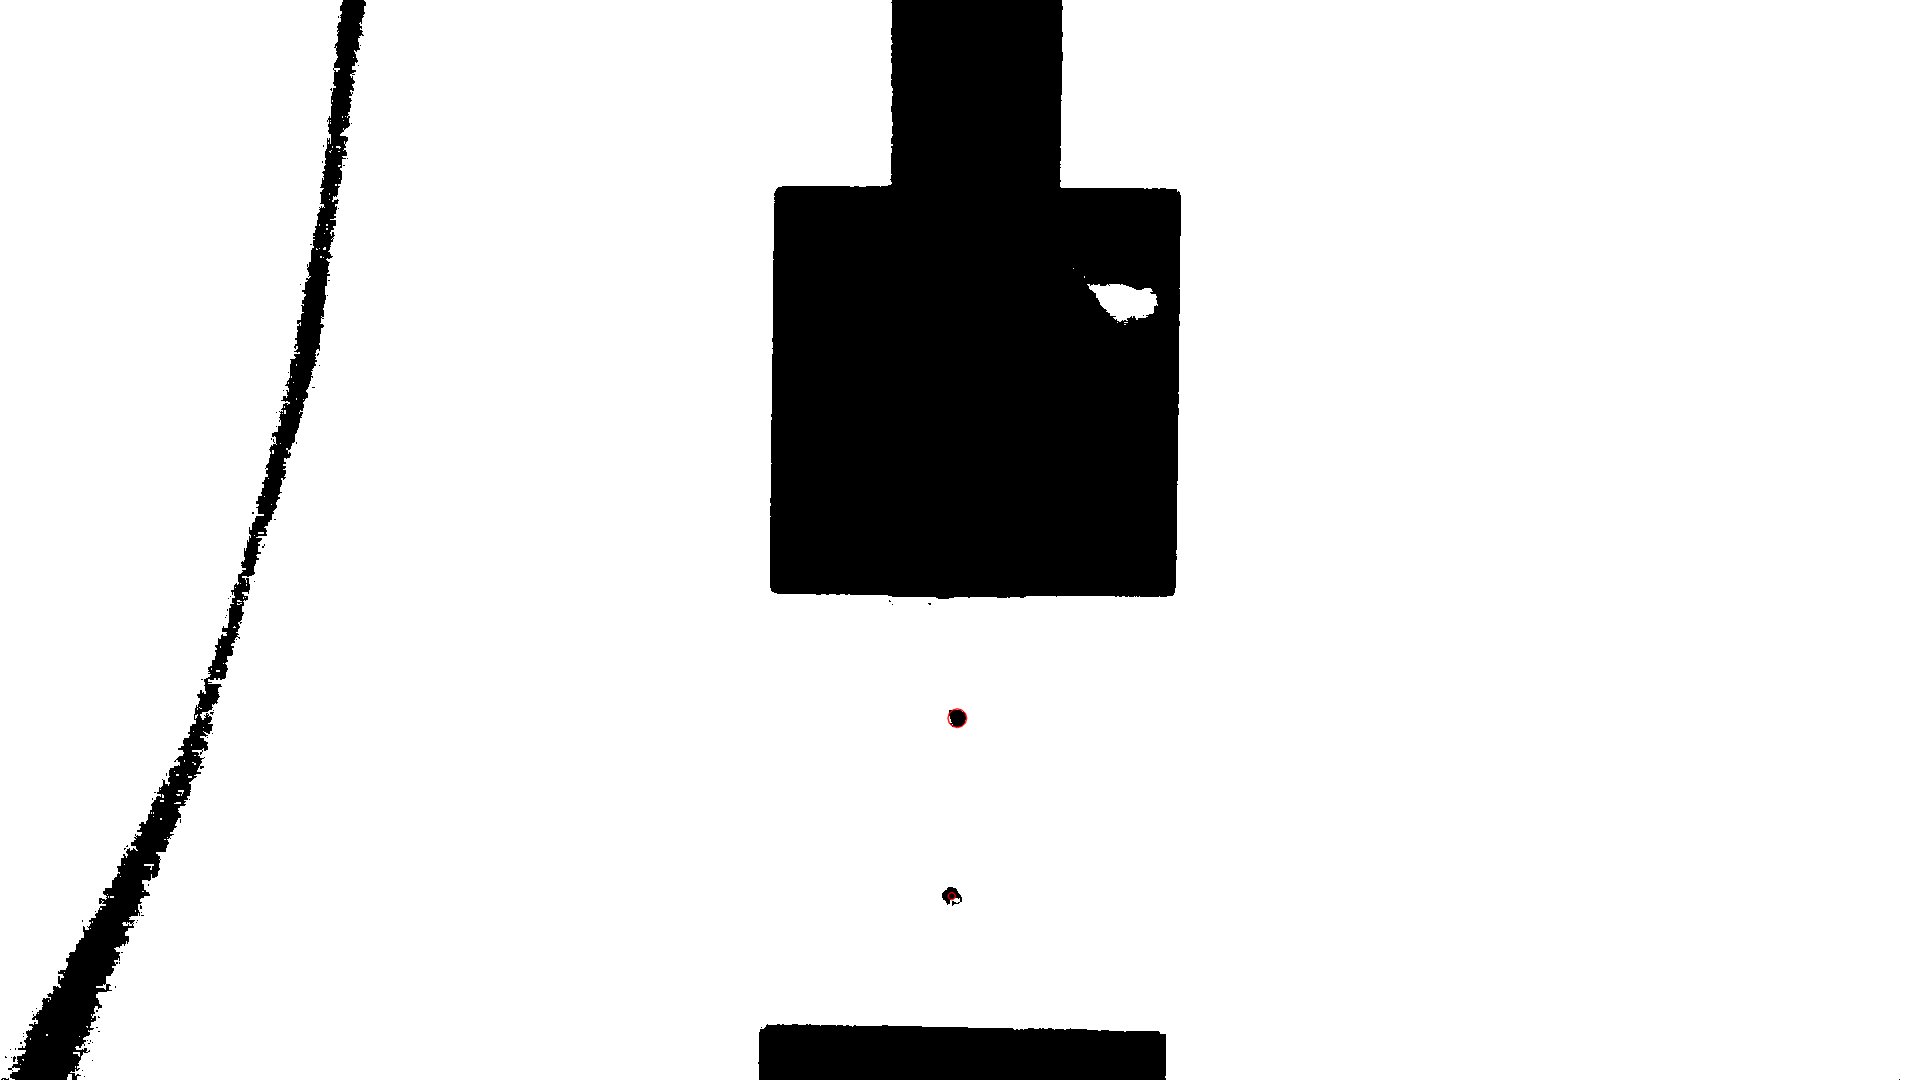

Read a new frame:  True
2


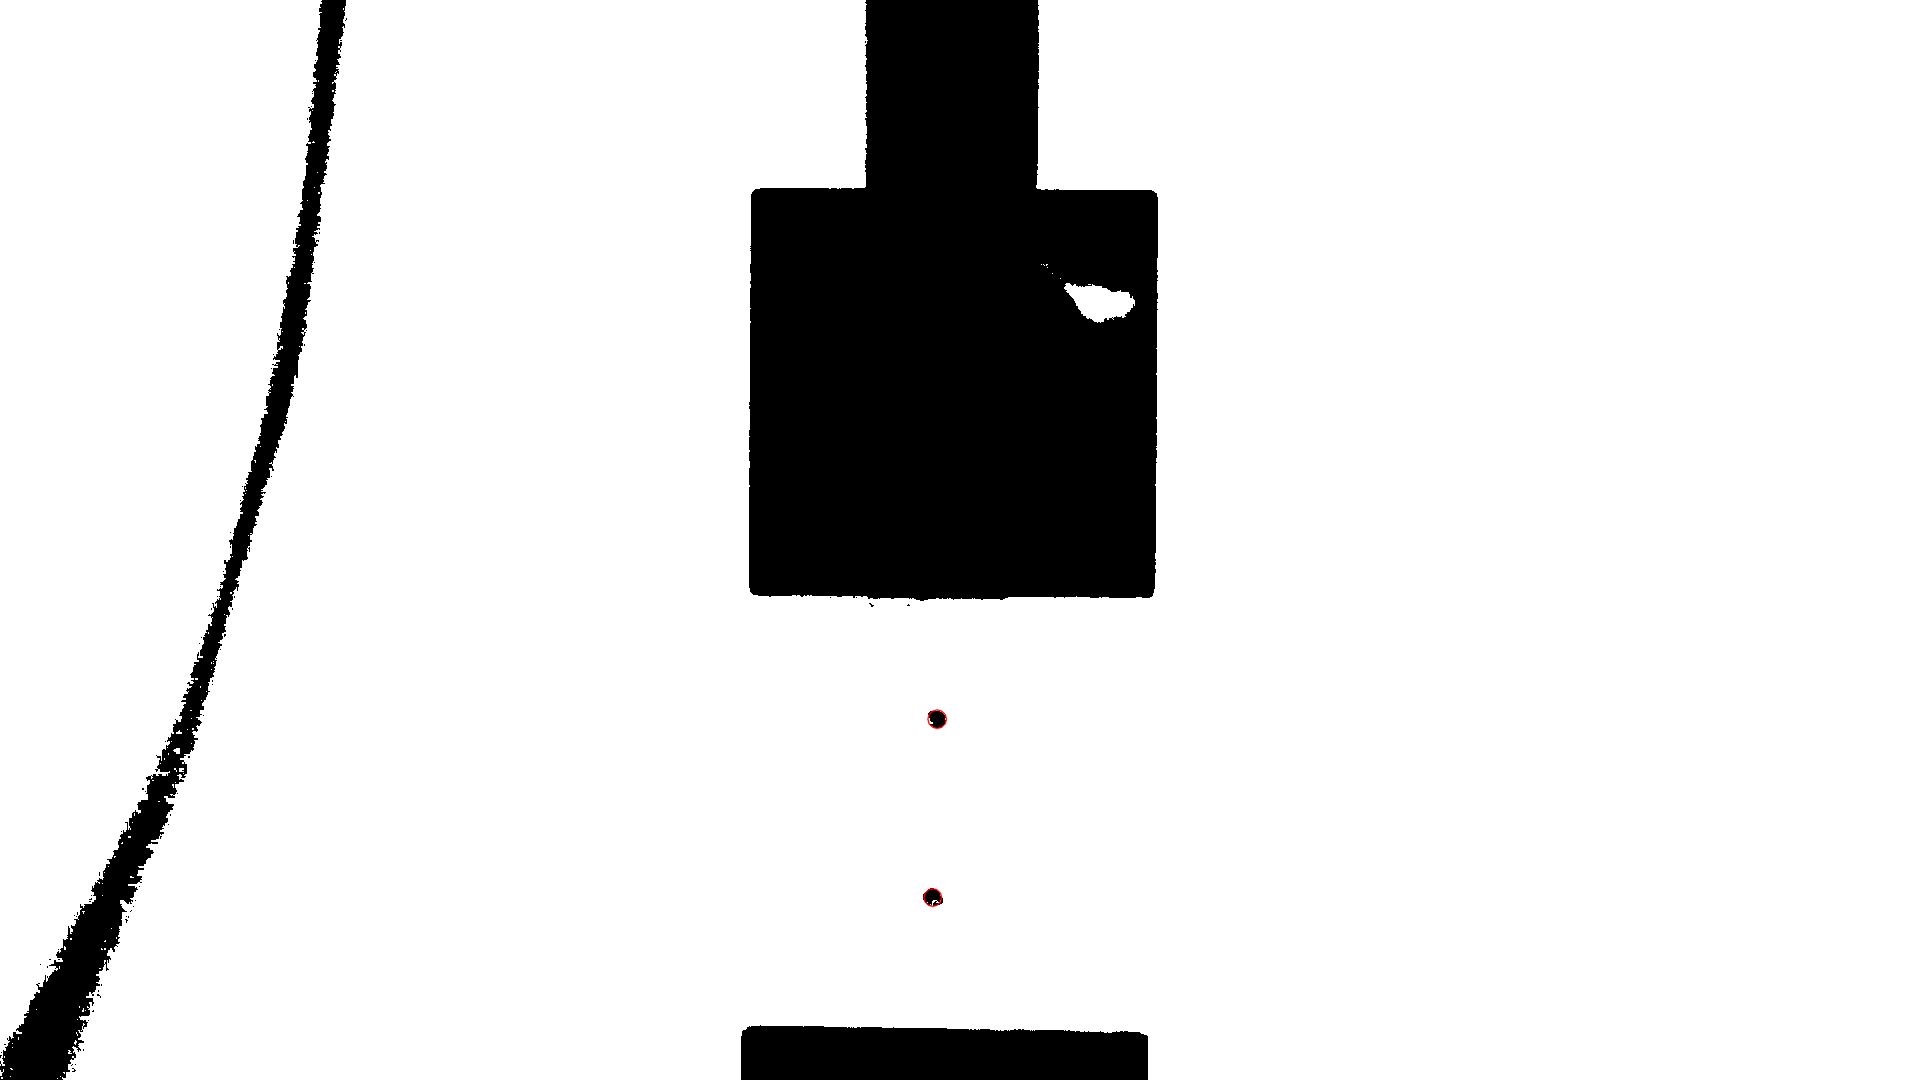

Read a new frame:  True
3


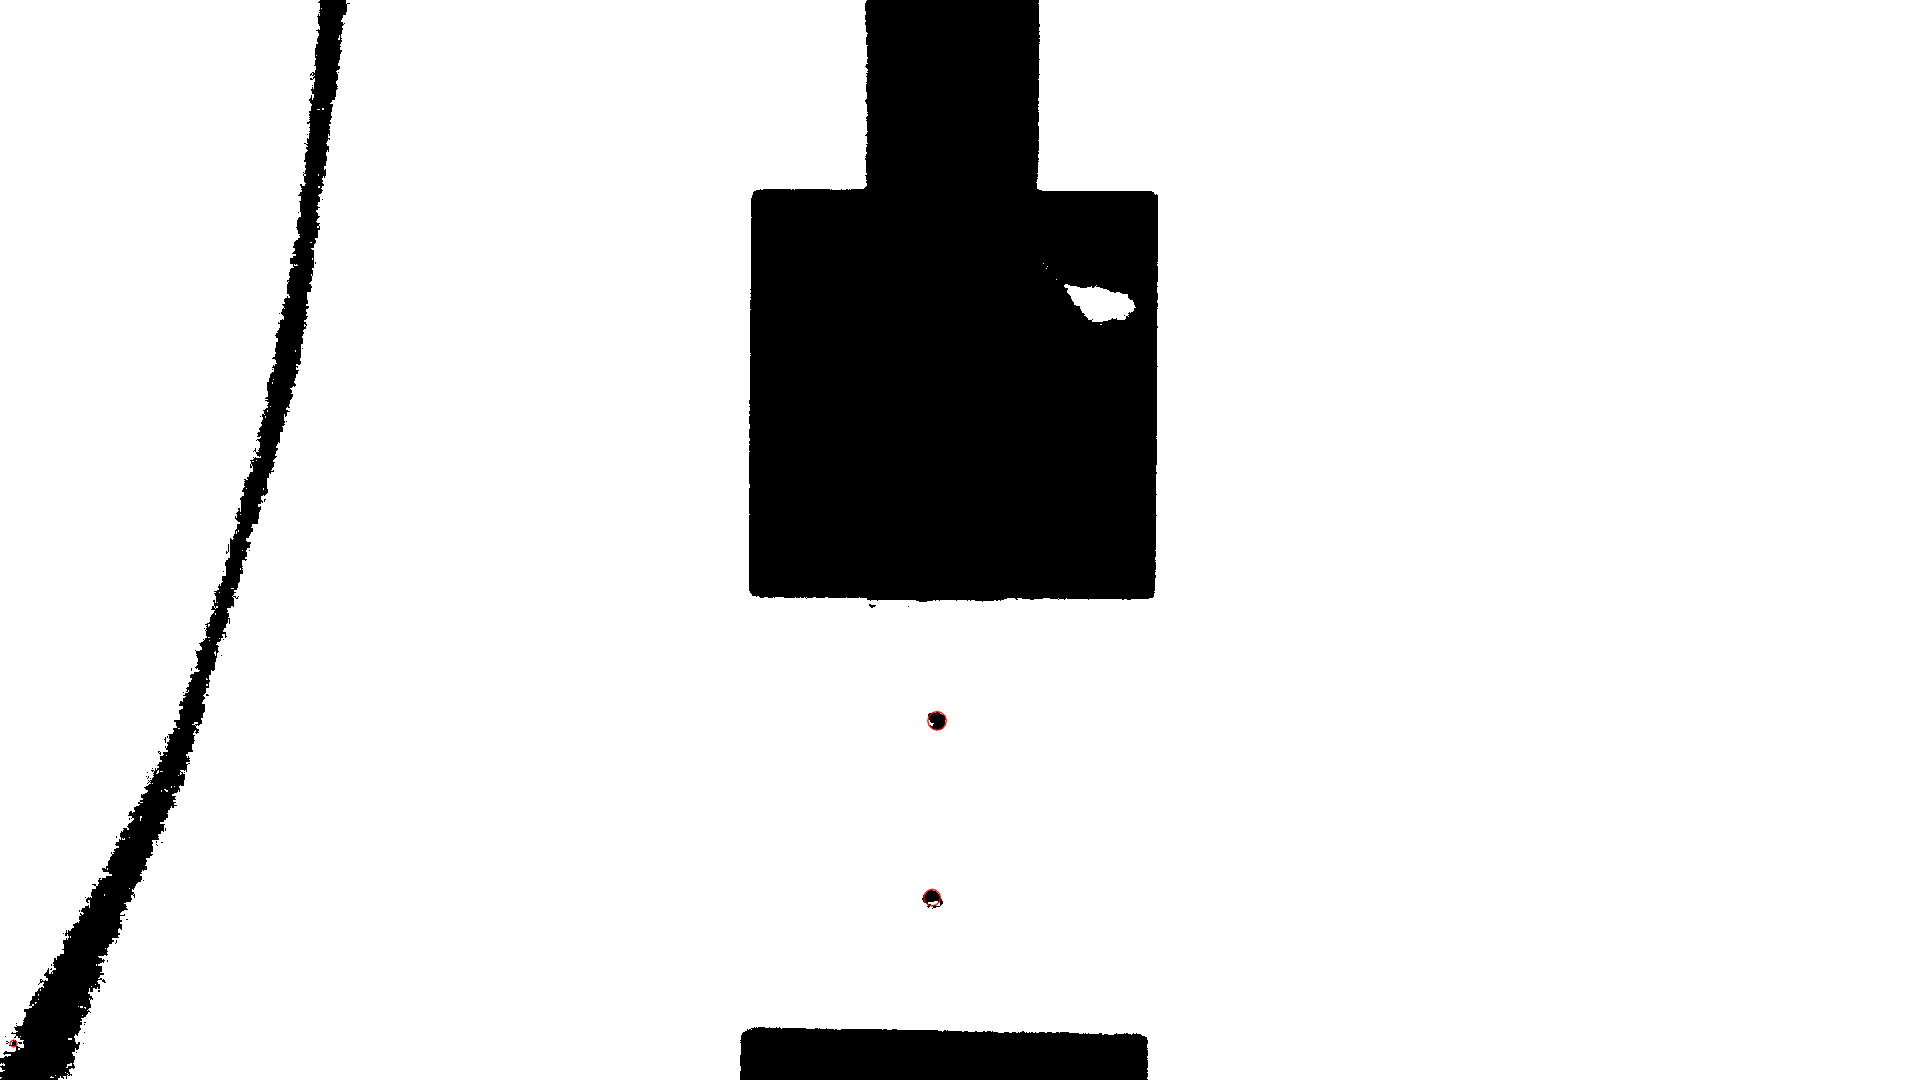

Read a new frame:  True
2


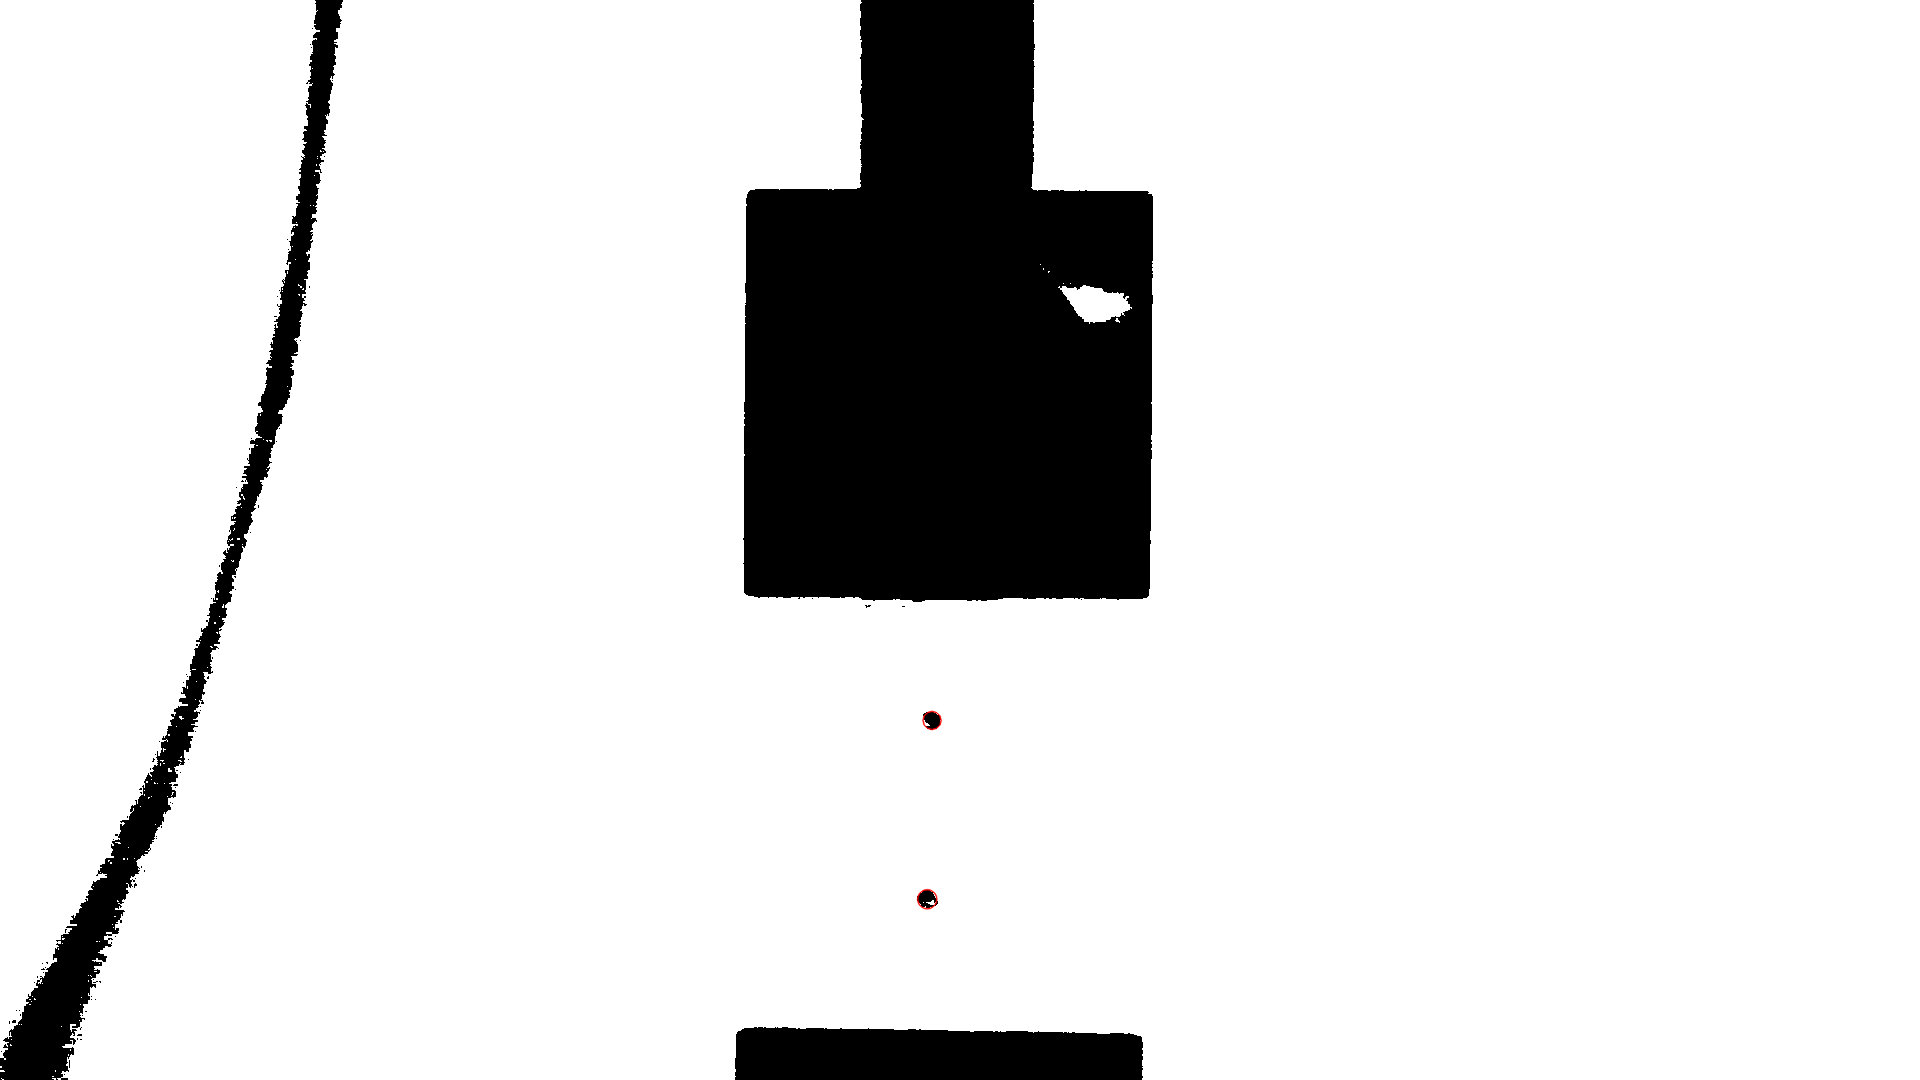

Read a new frame:  True
2


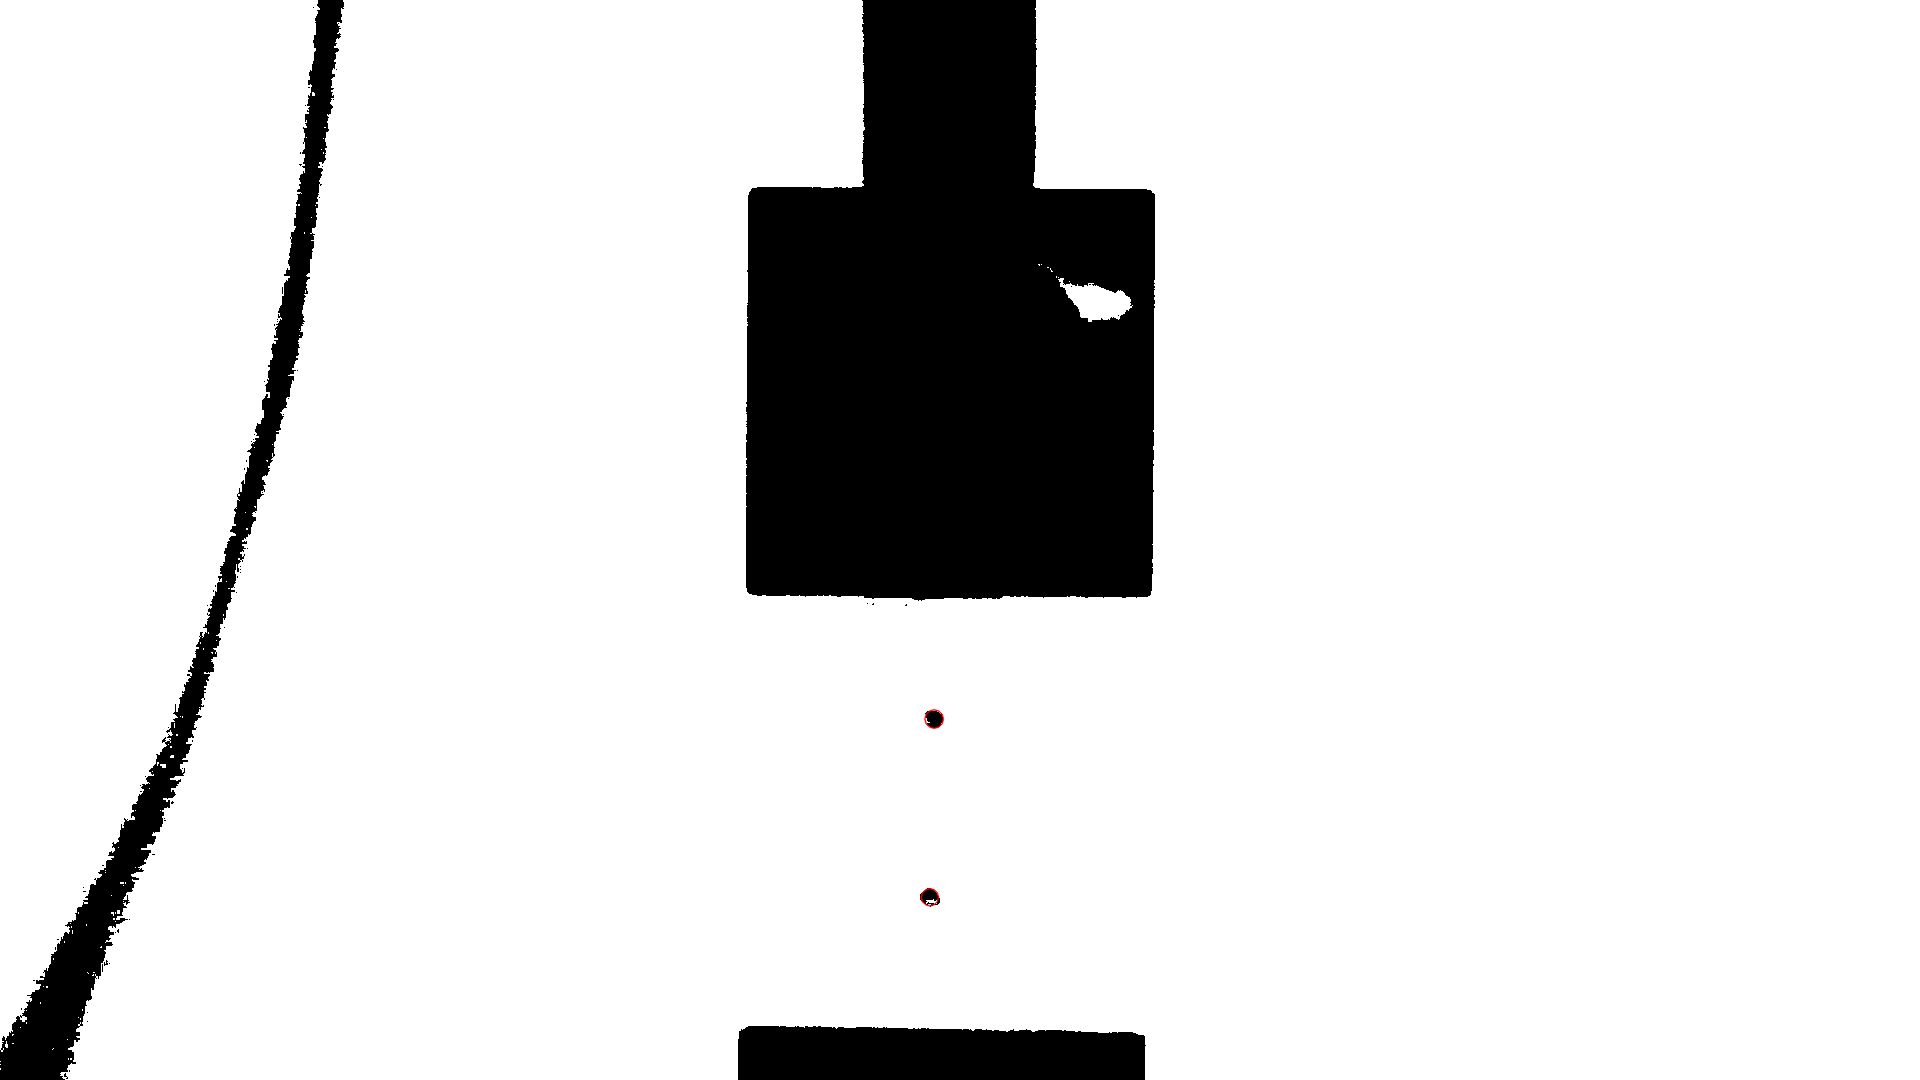

Read a new frame:  True
2


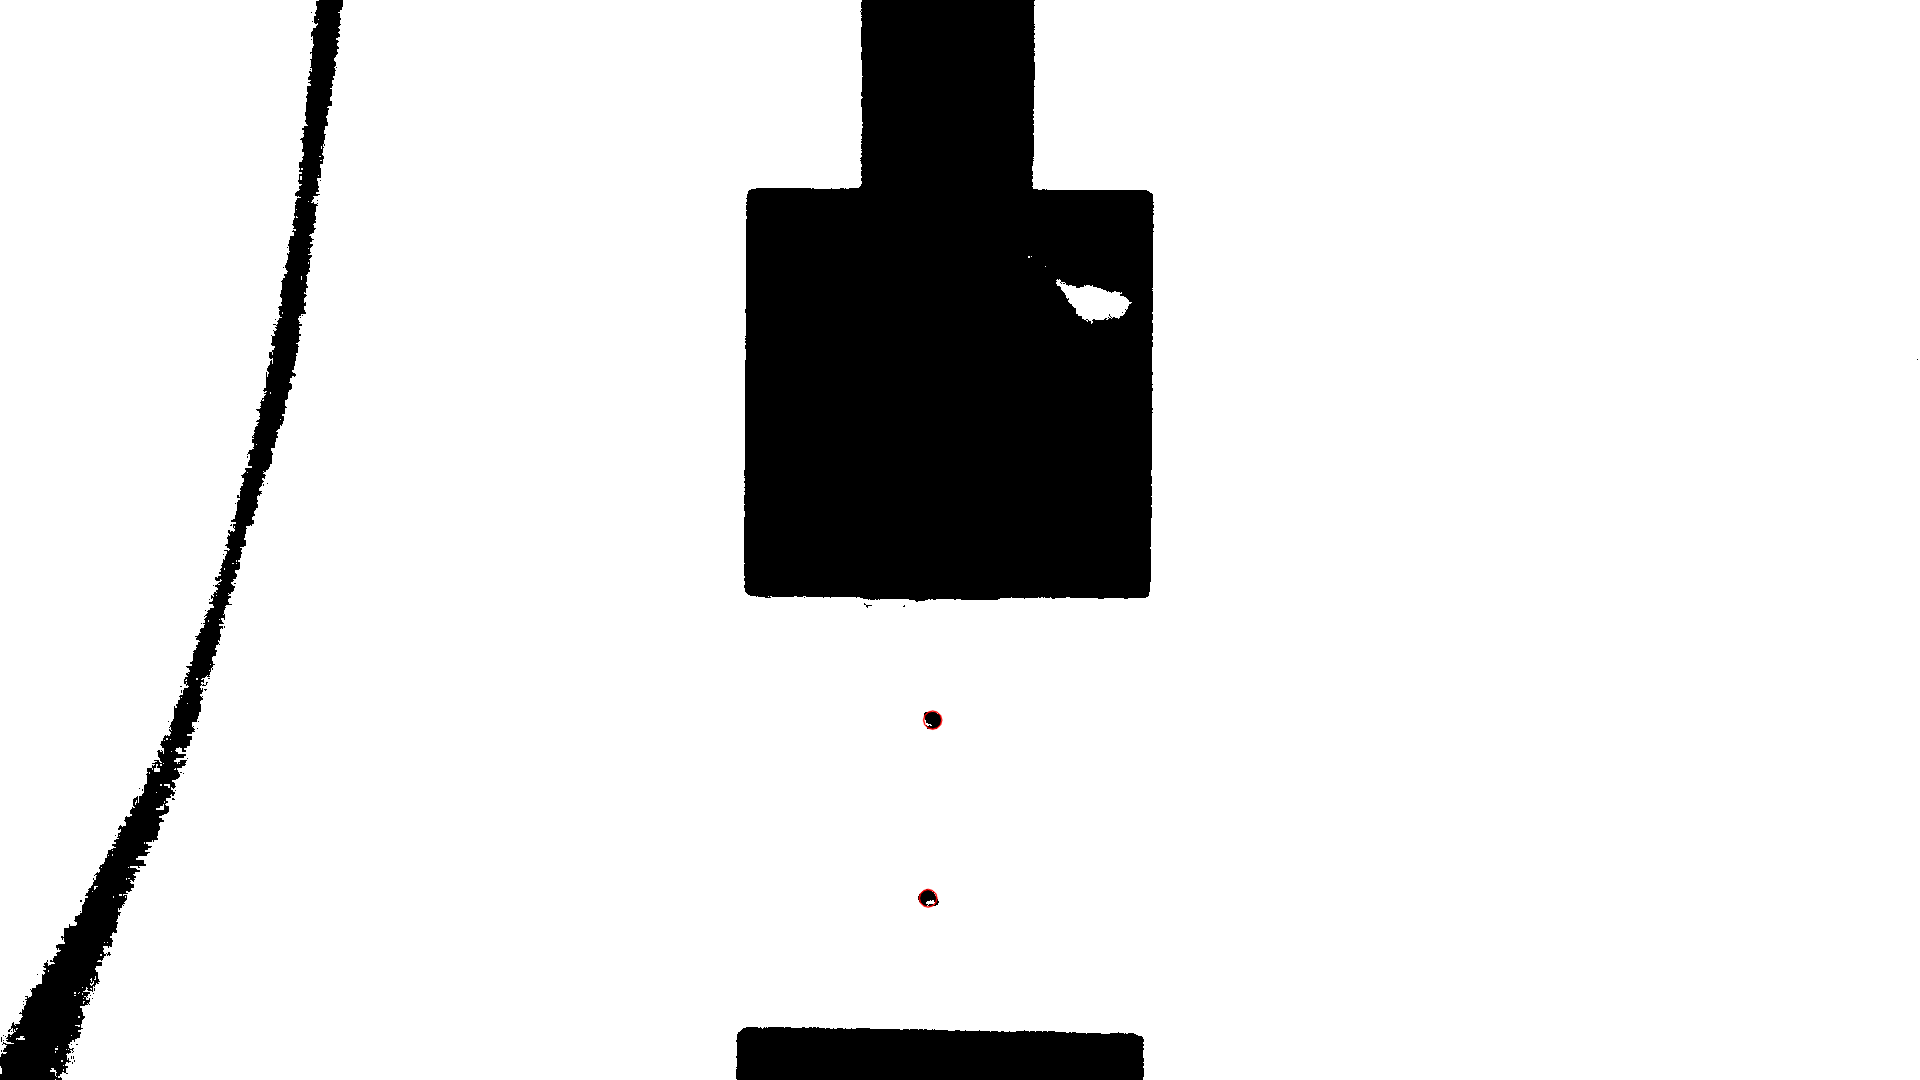

Read a new frame:  True
2


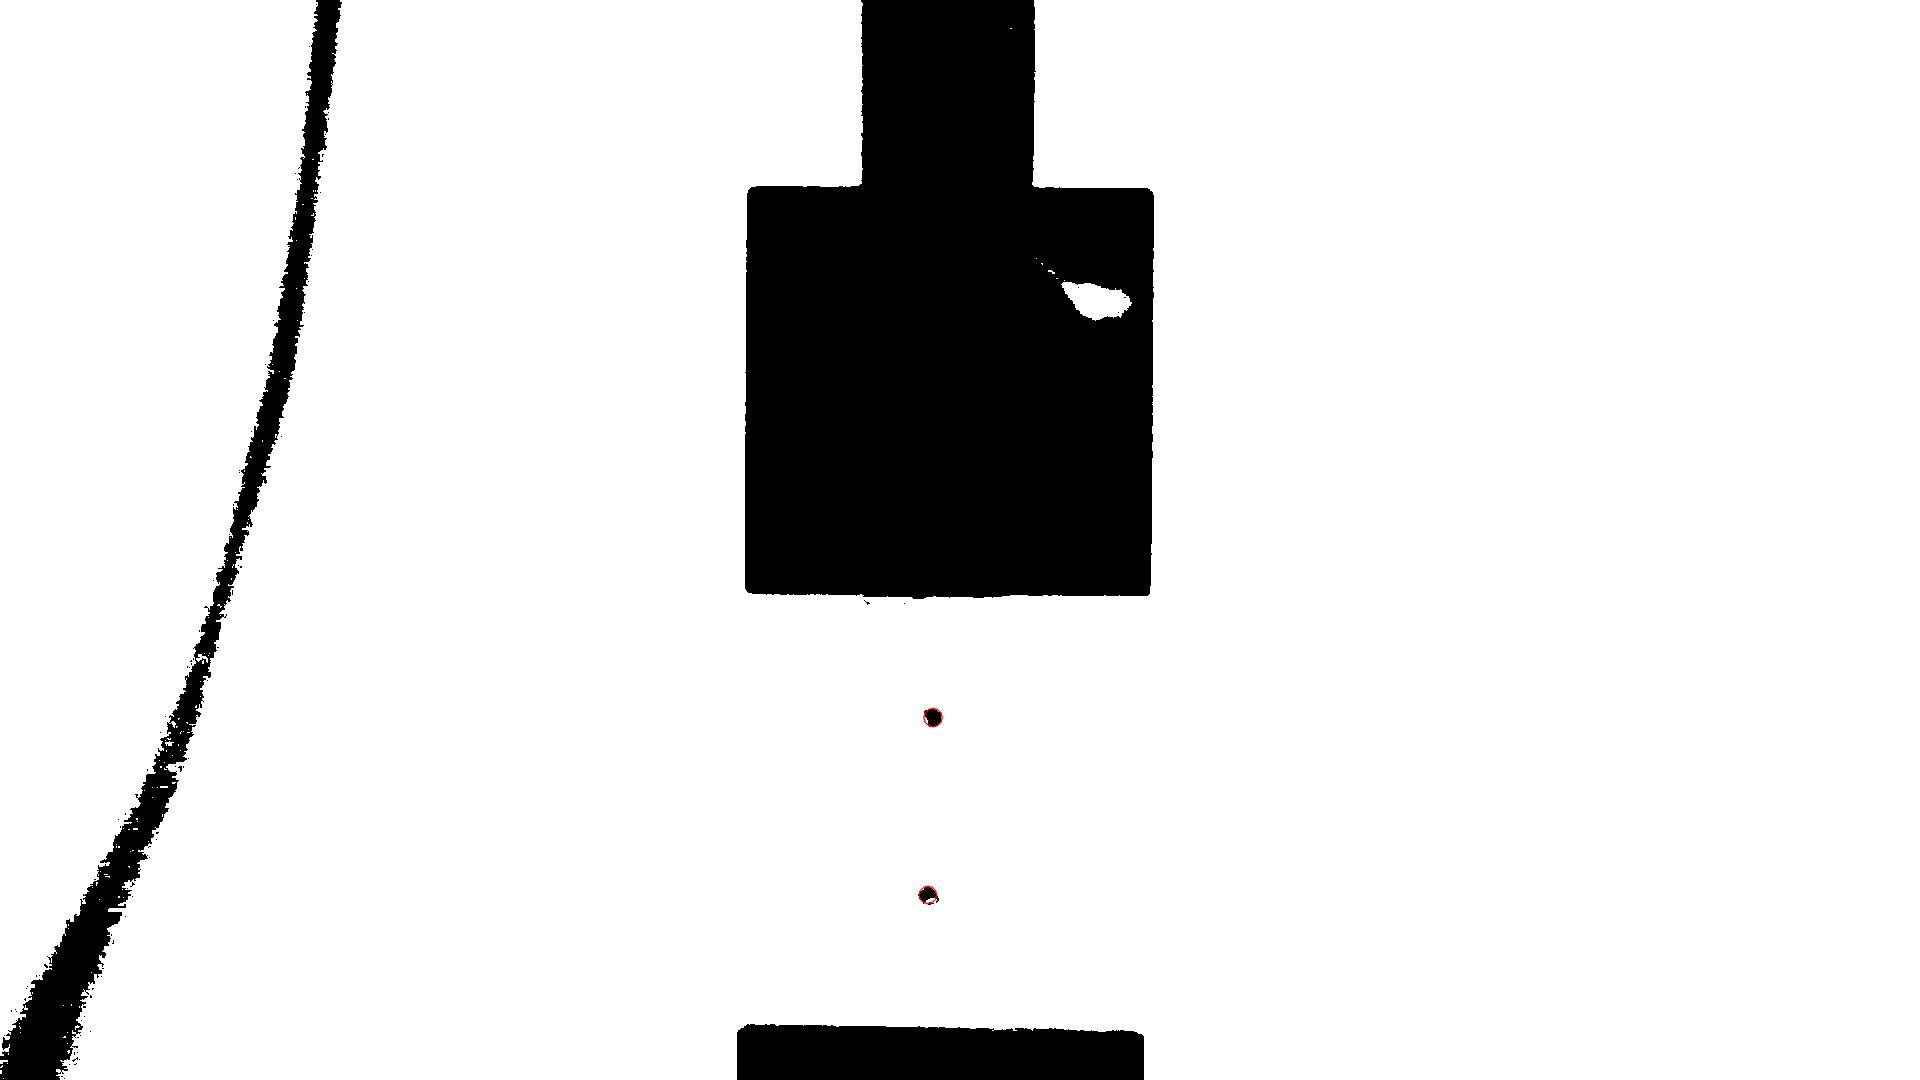

Read a new frame:  True
2


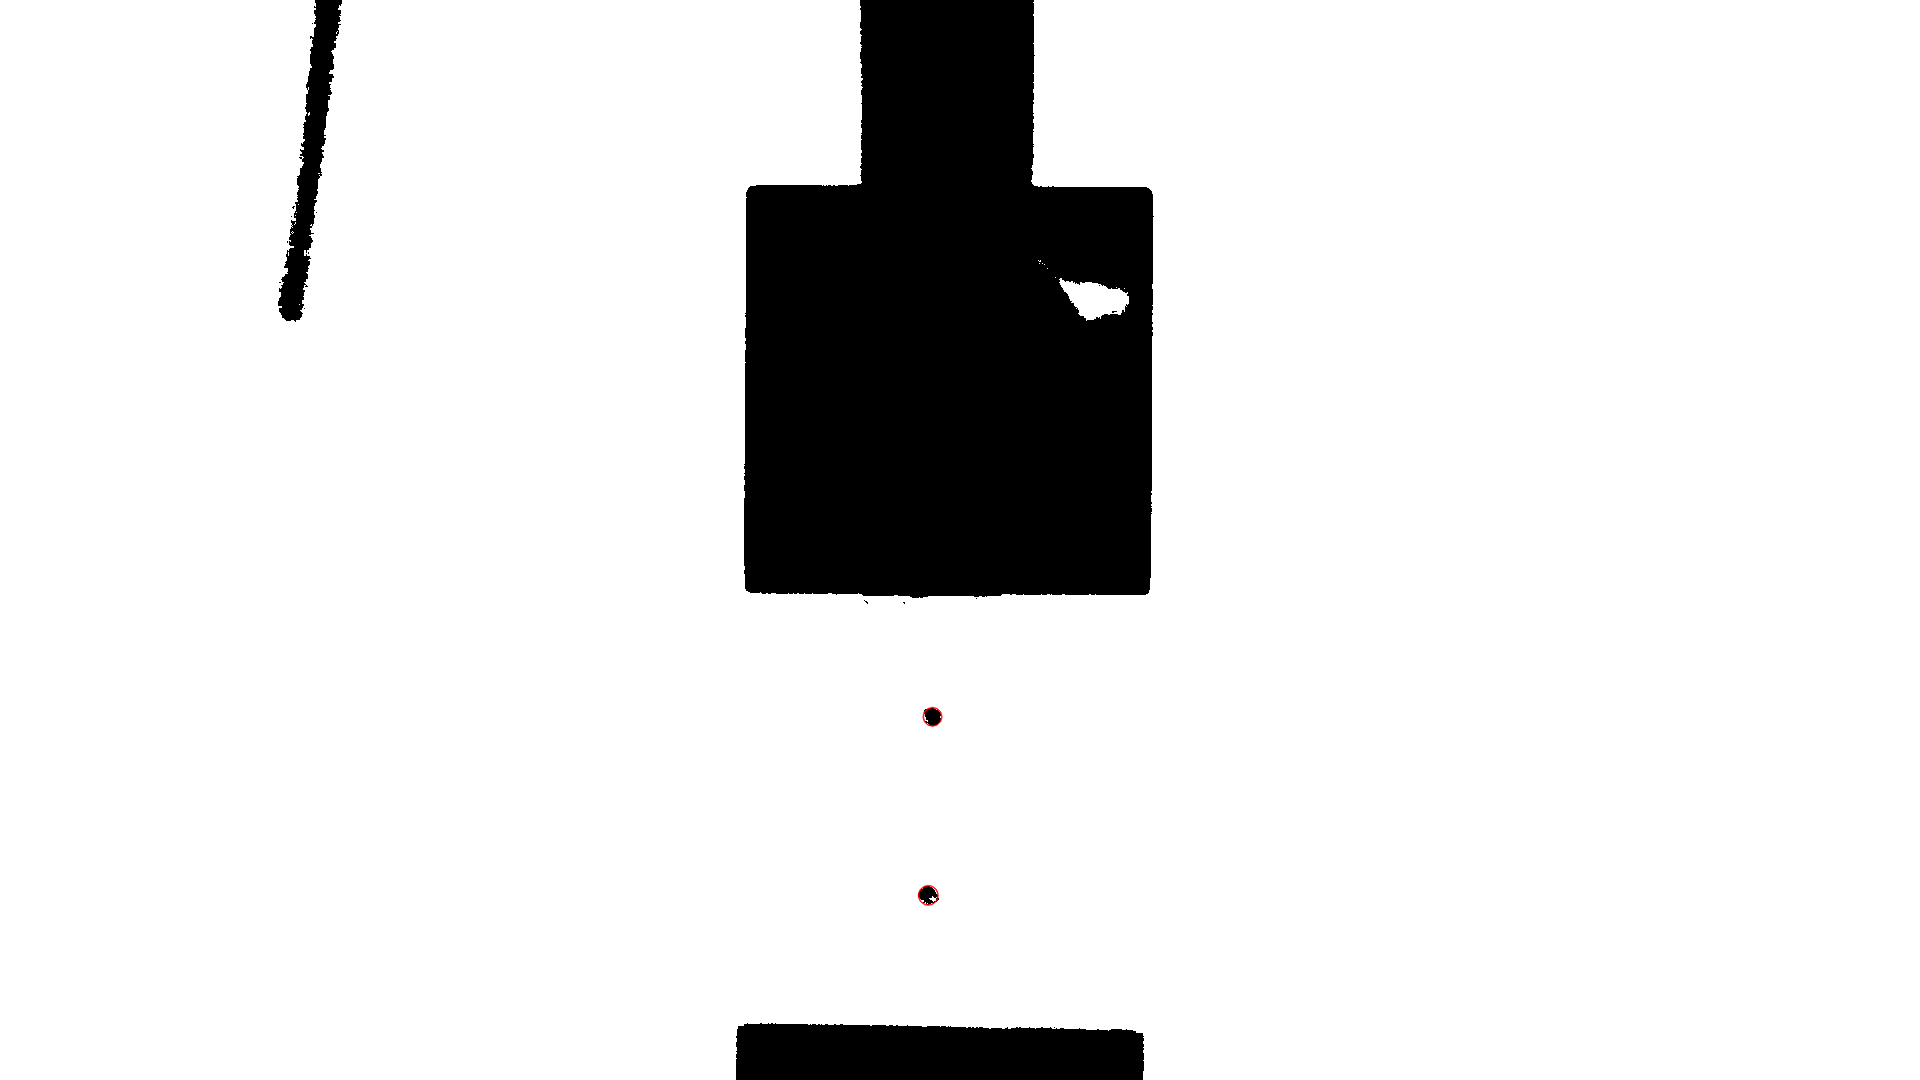

Read a new frame:  True
4


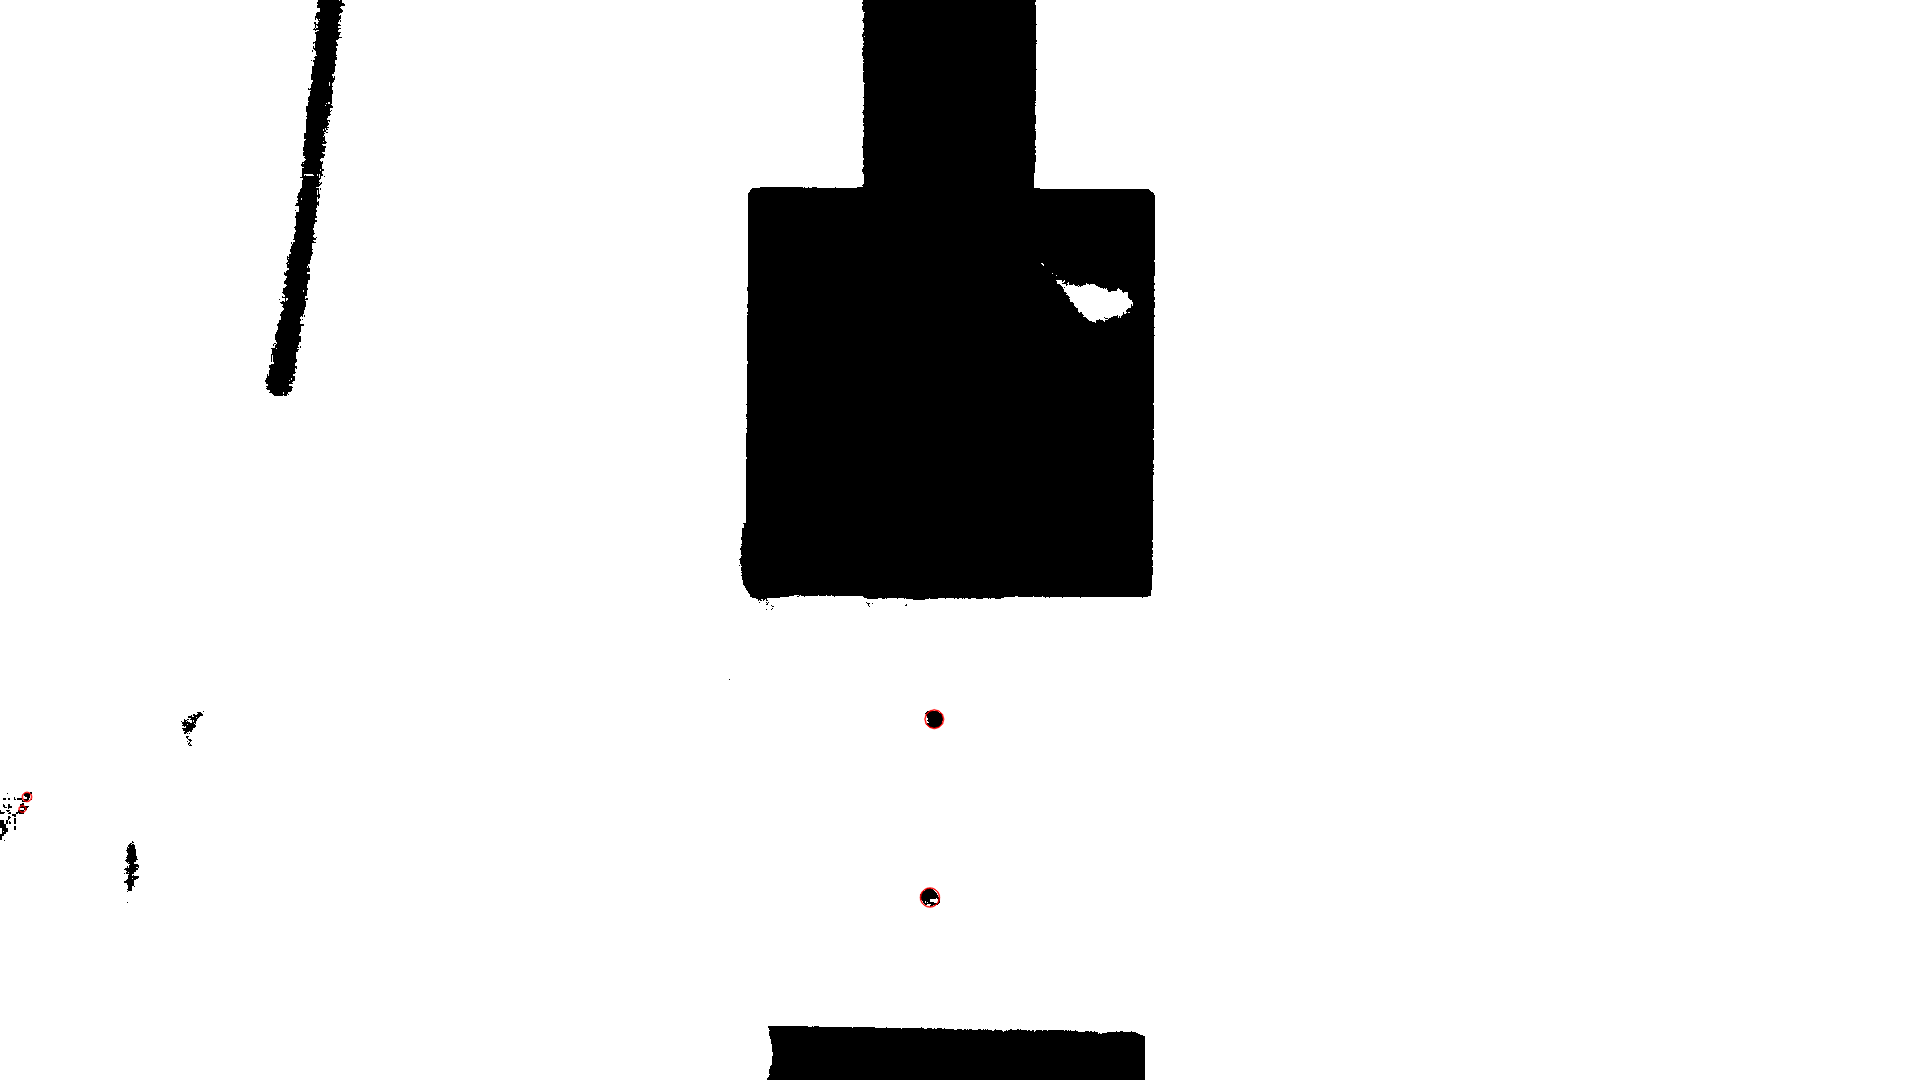

Read a new frame:  True
2


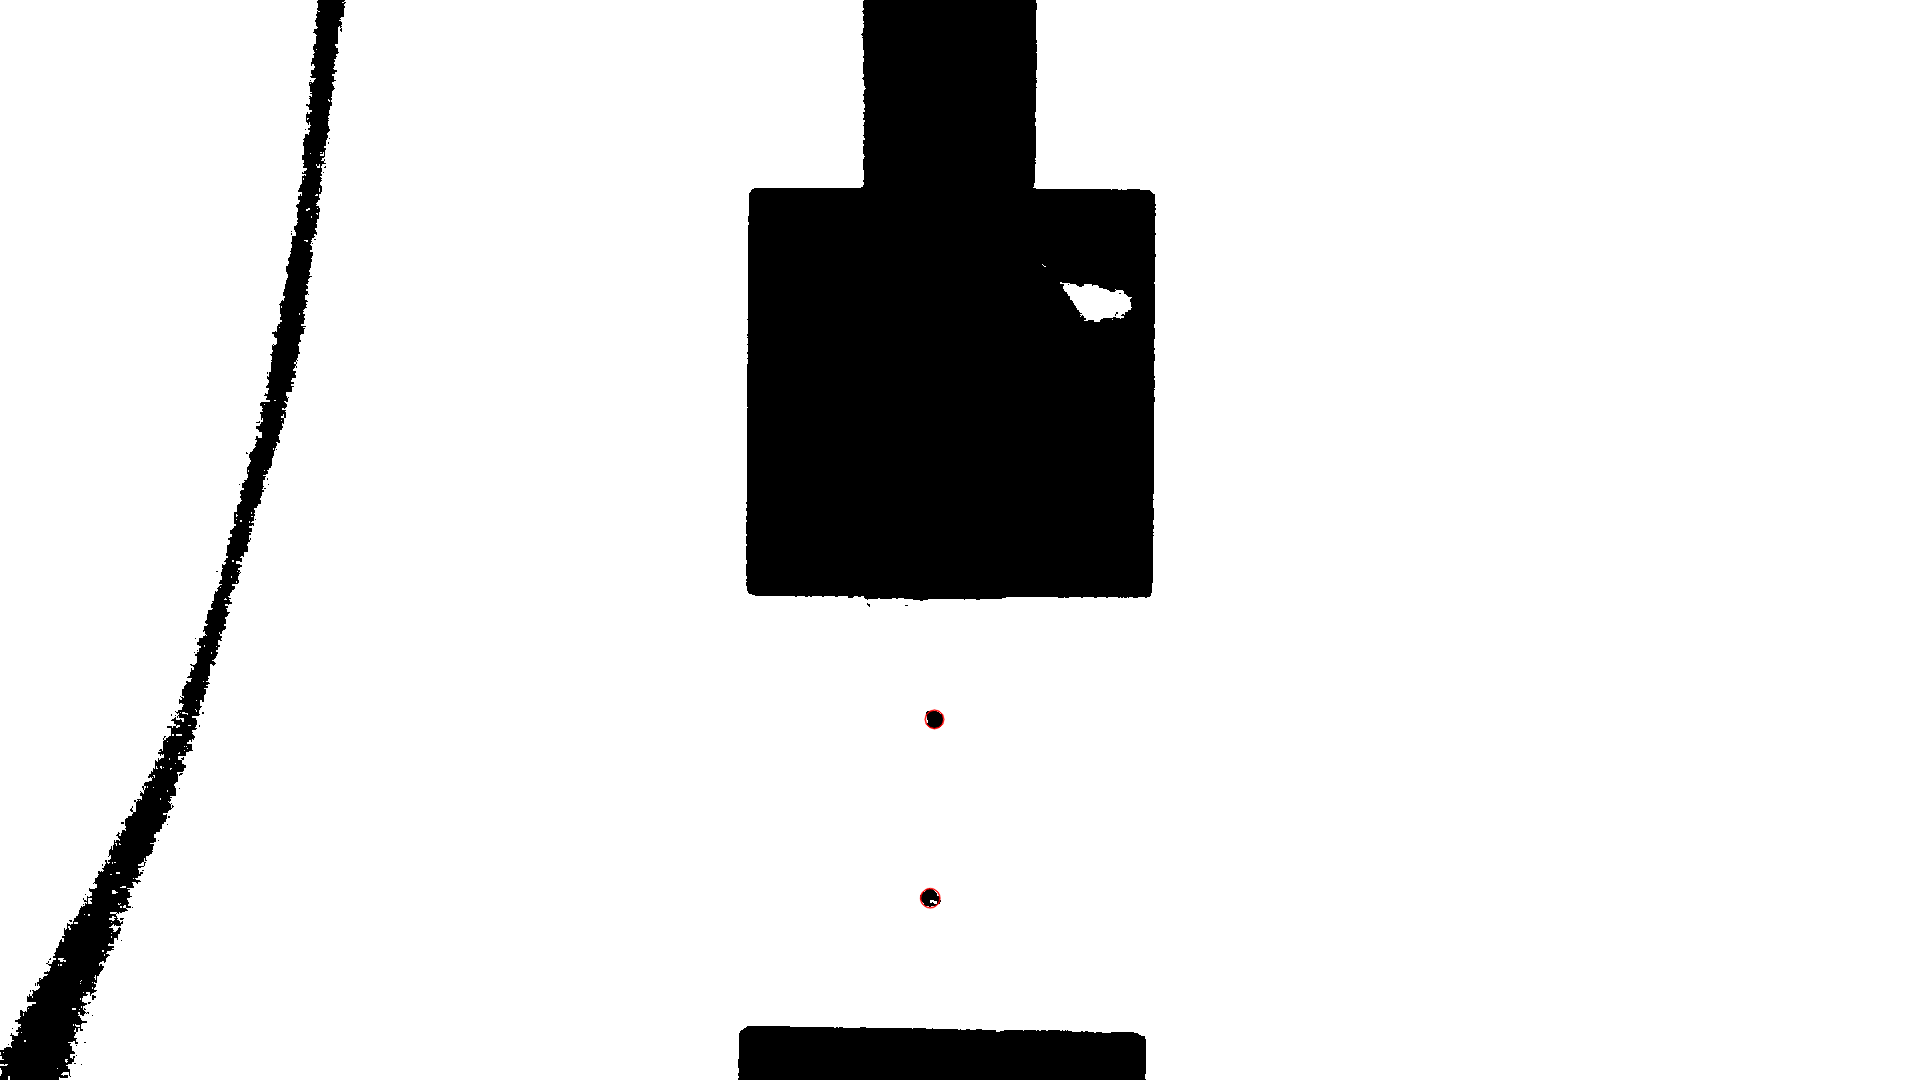

Read a new frame:  True
2


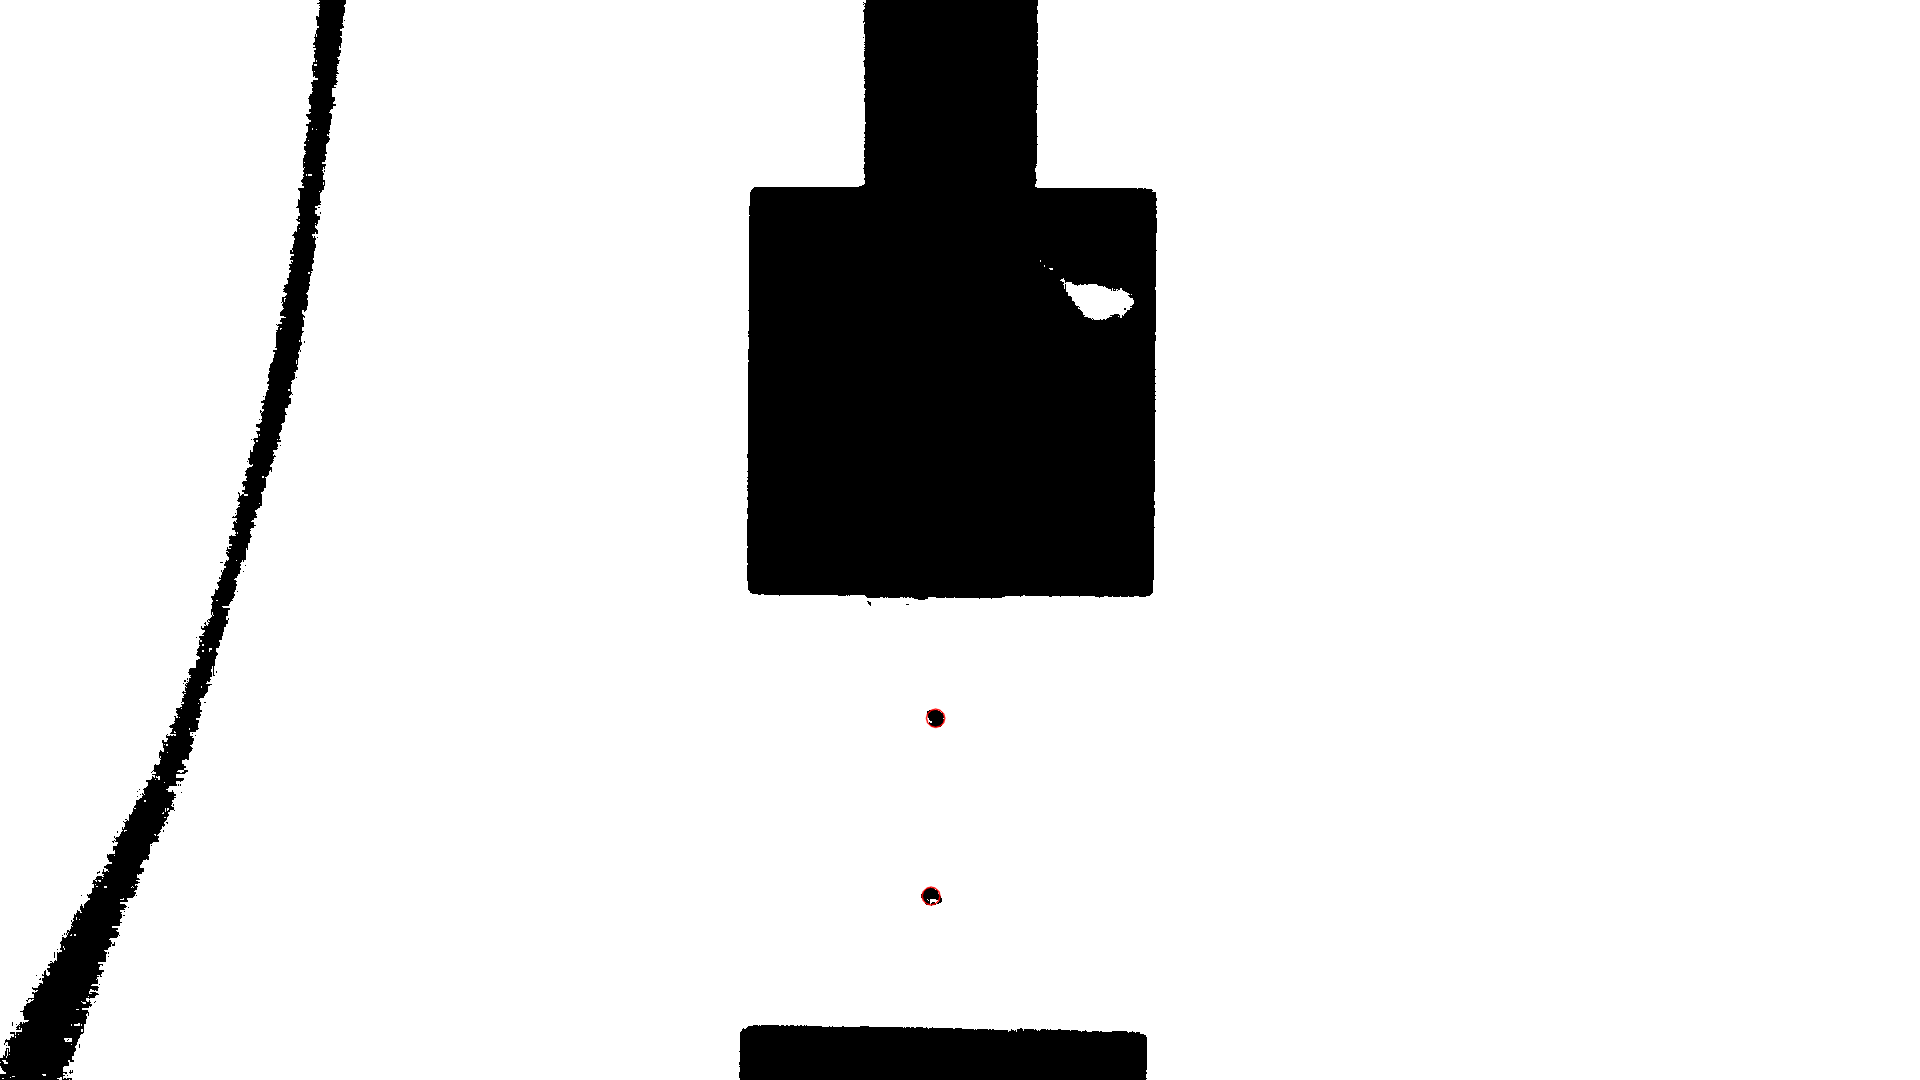

Read a new frame:  True
3


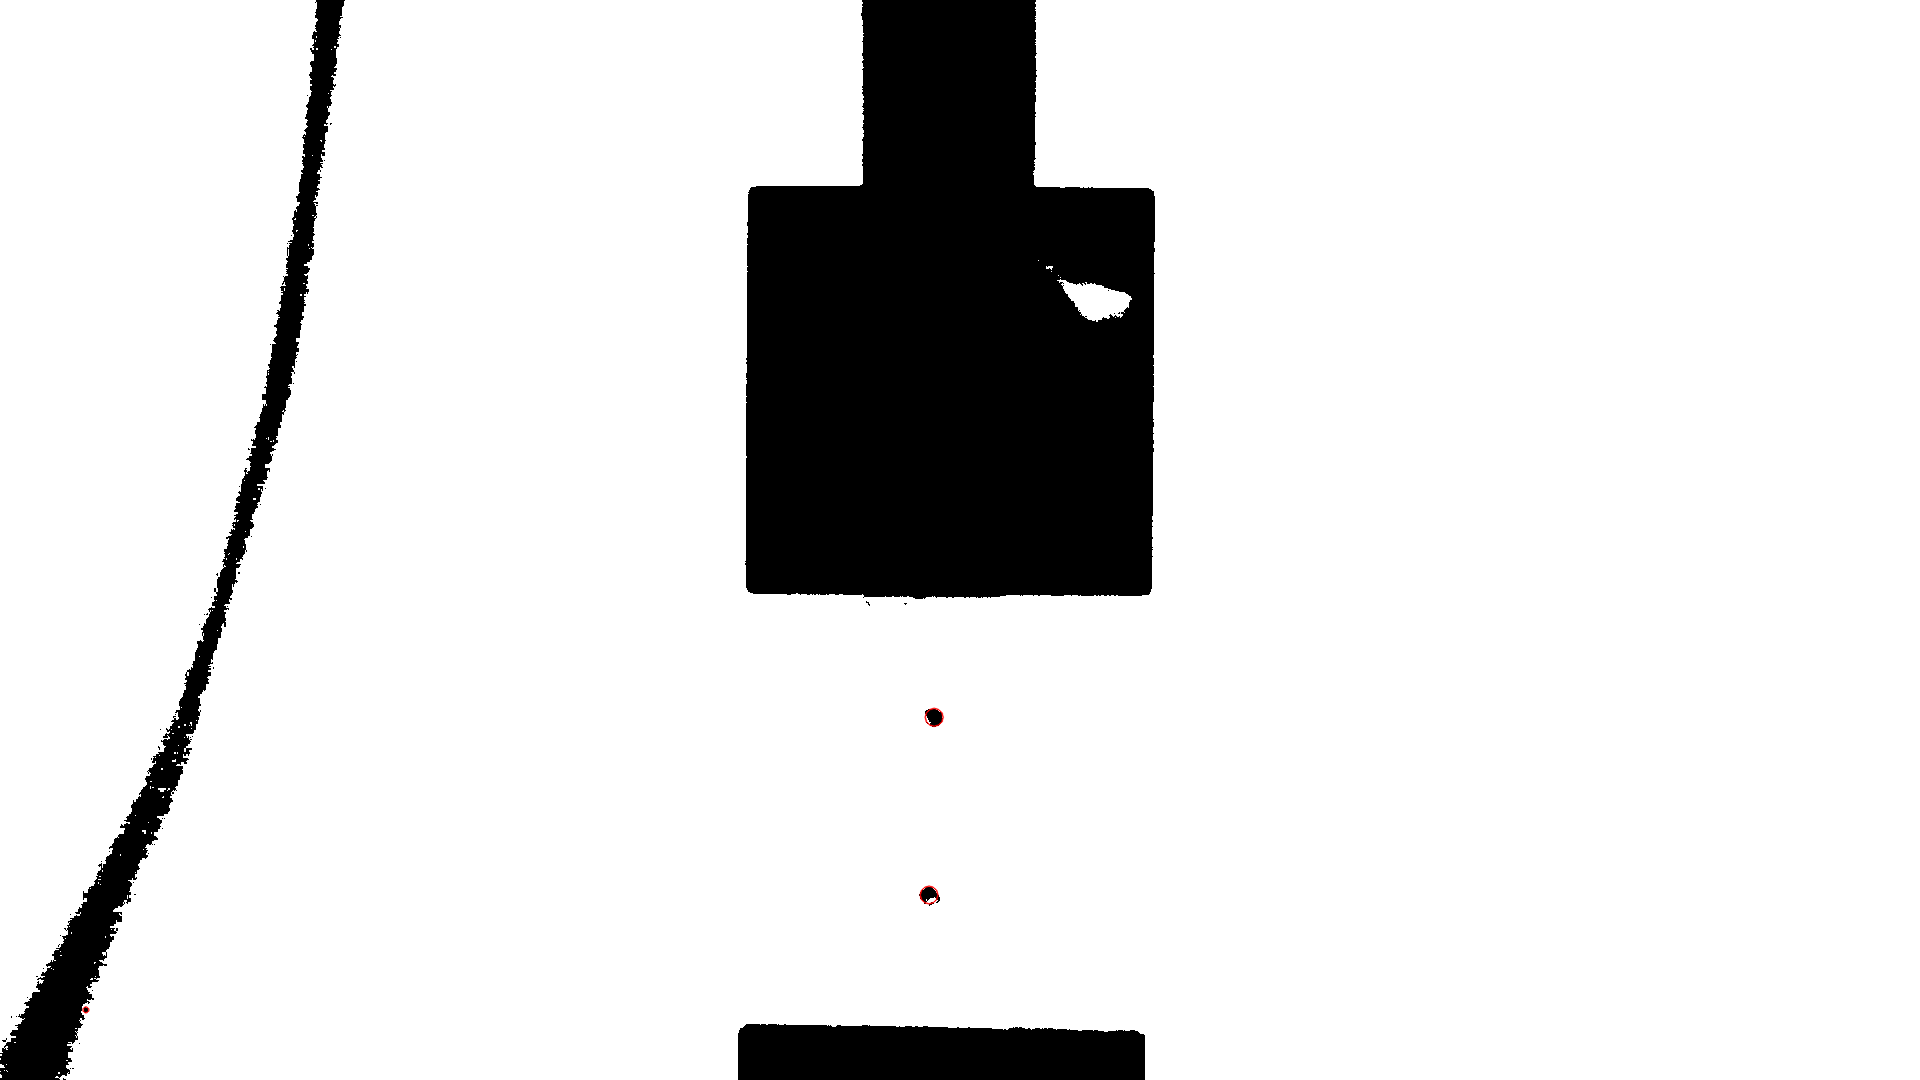

Read a new frame:  True
2


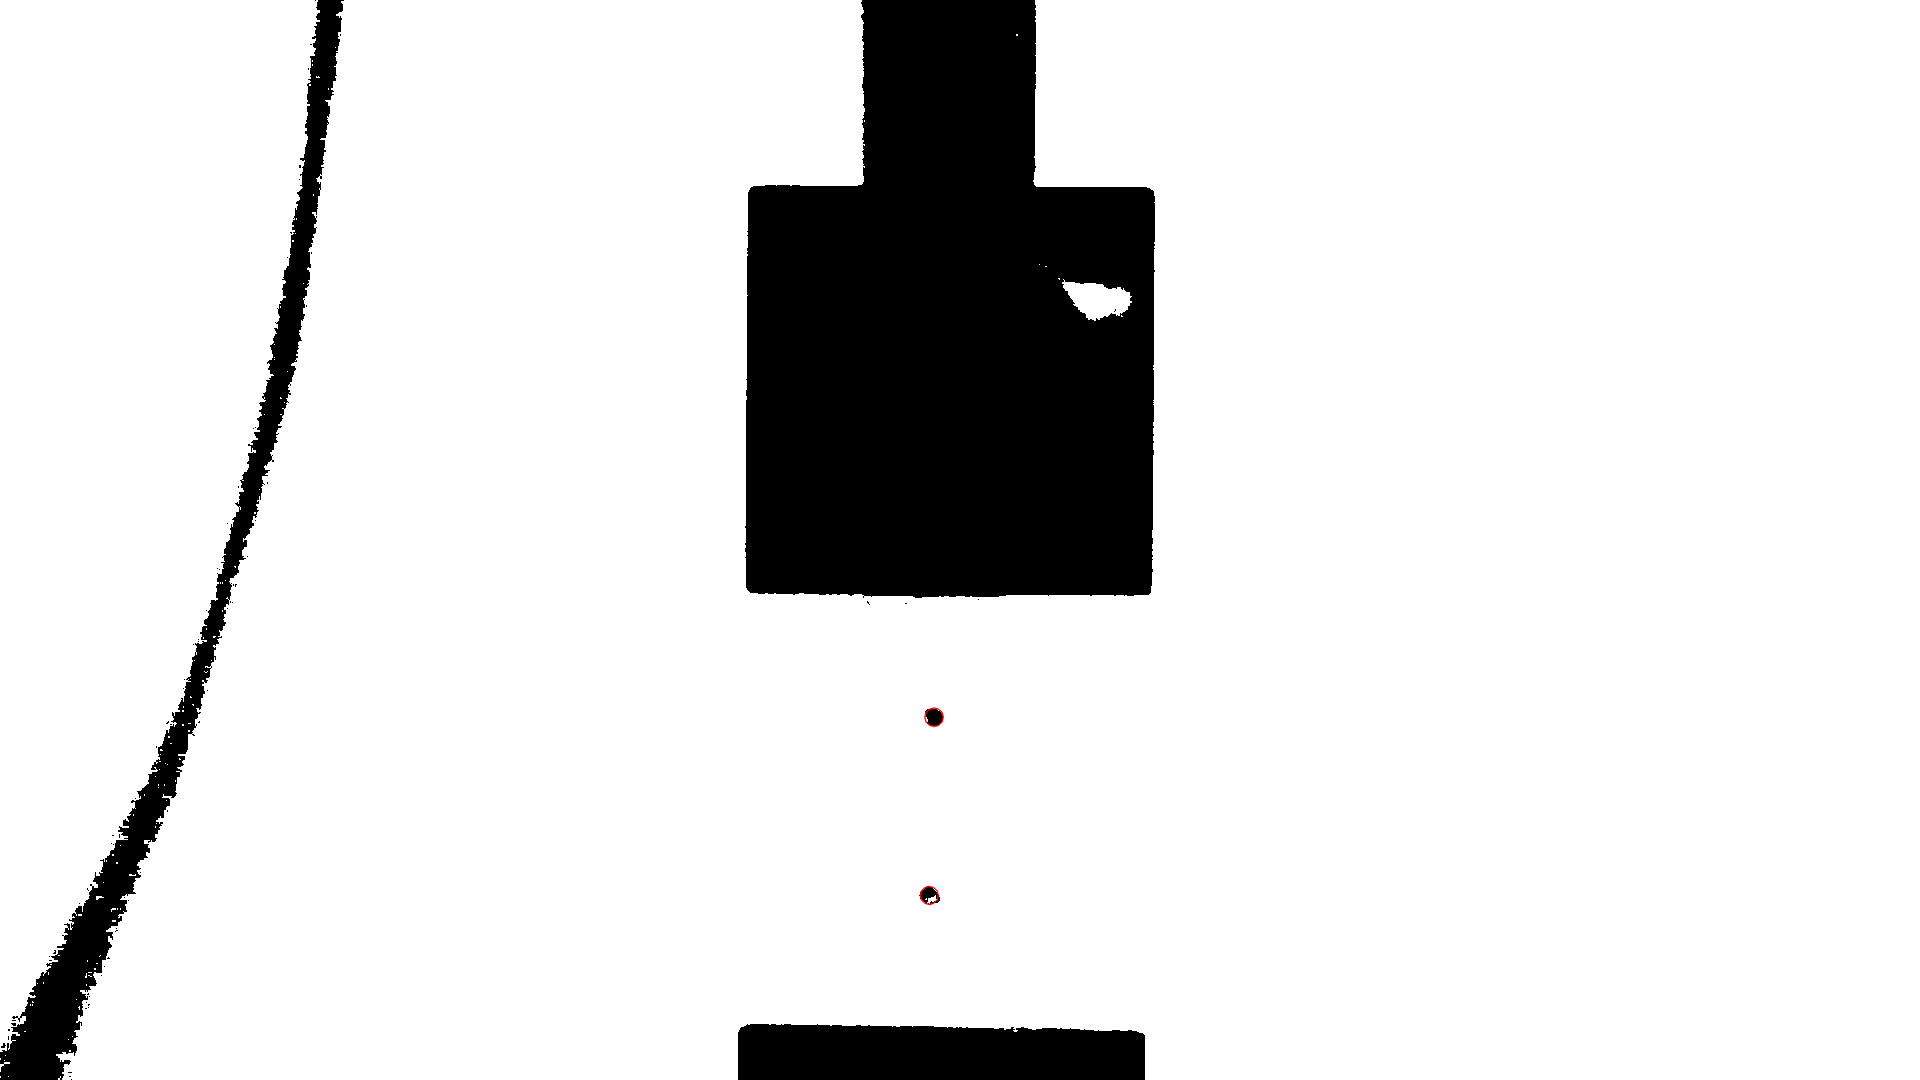

Read a new frame:  True
3


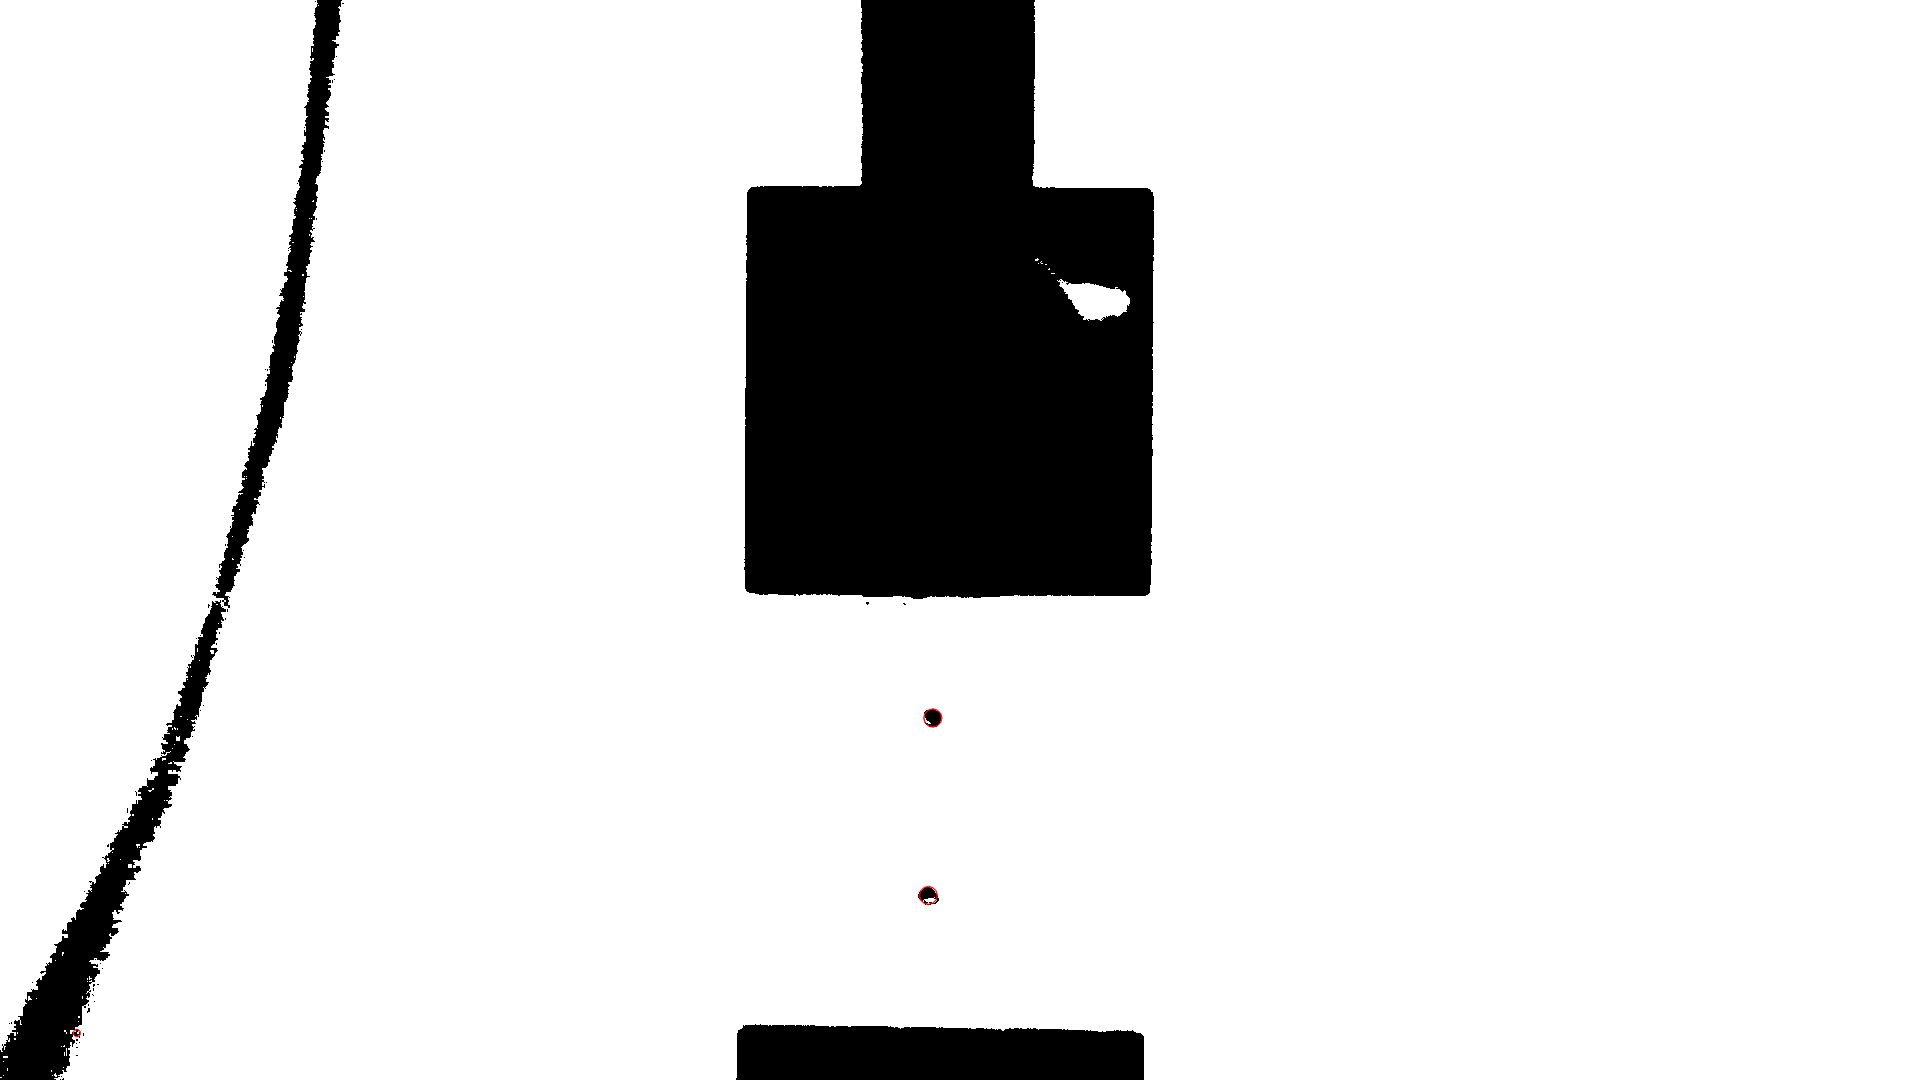

Read a new frame:  True
3


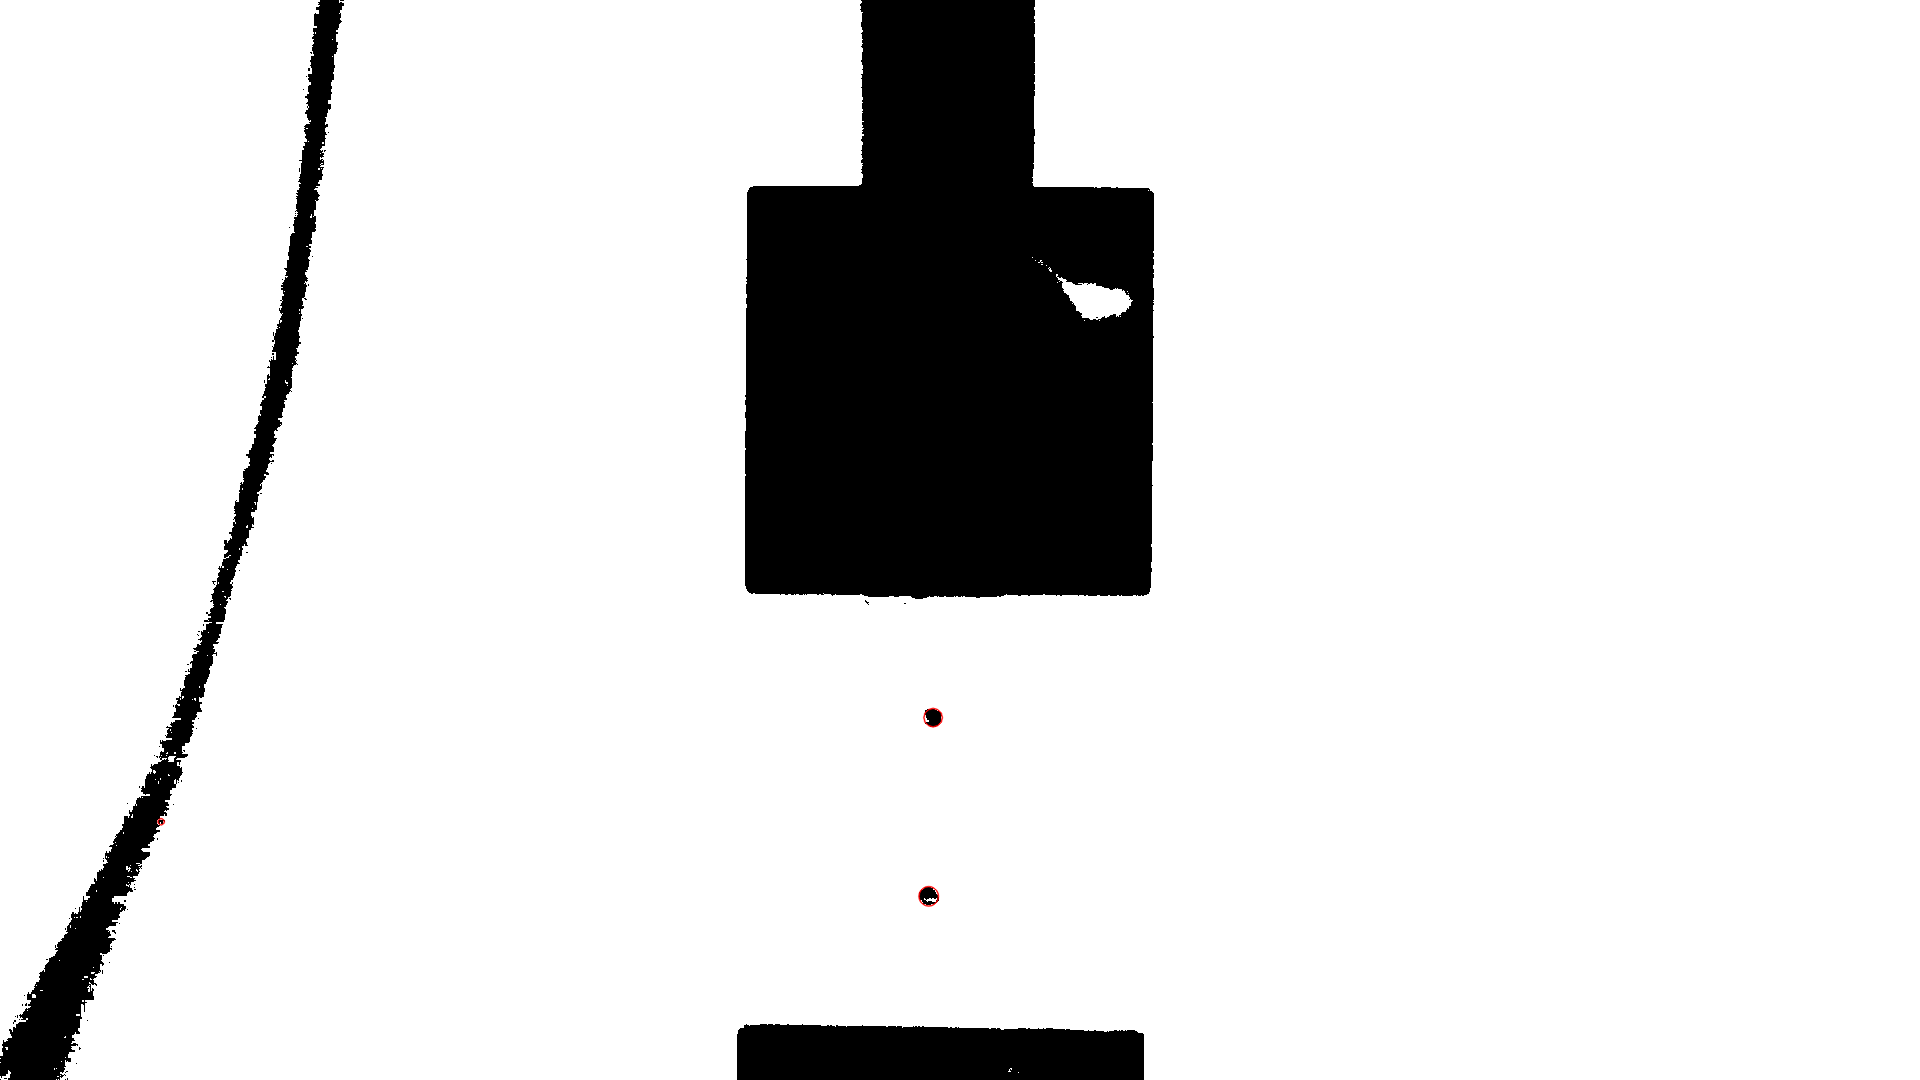

Read a new frame:  True
2


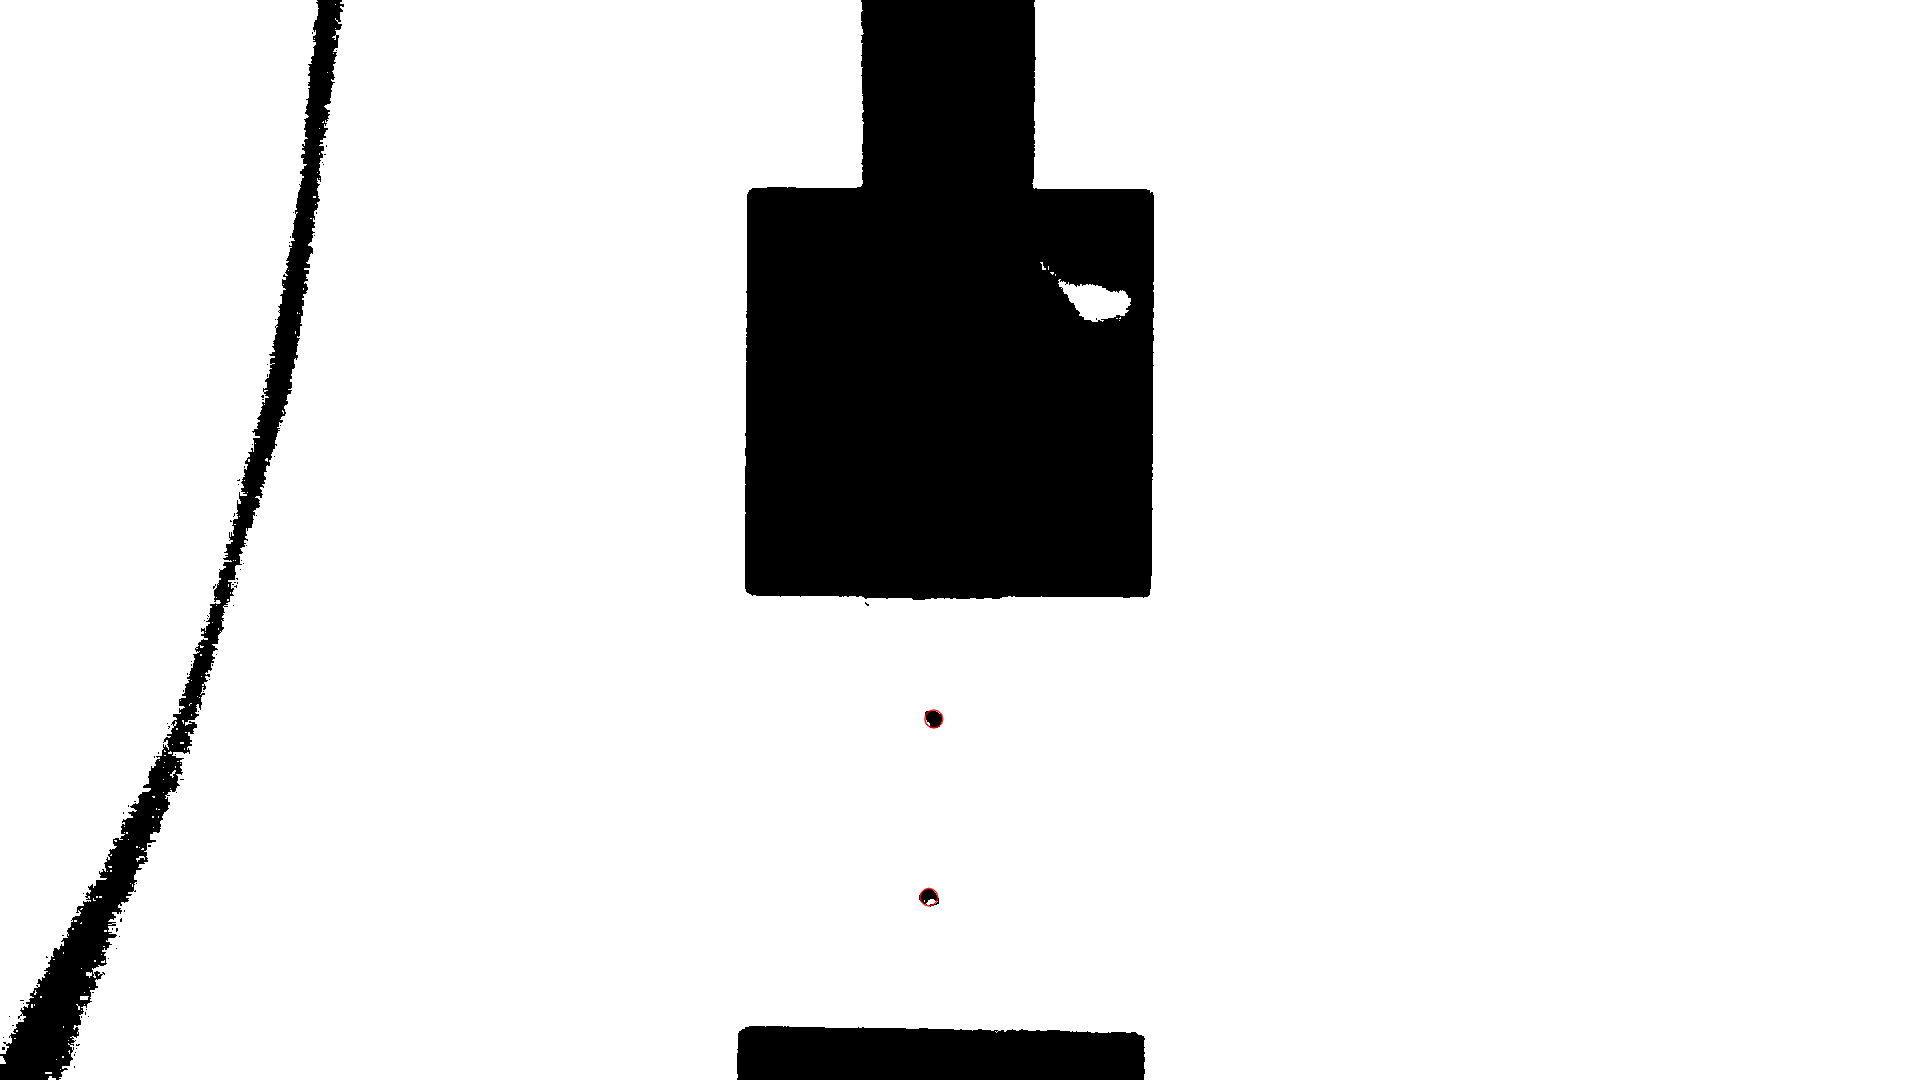

Read a new frame:  True
2


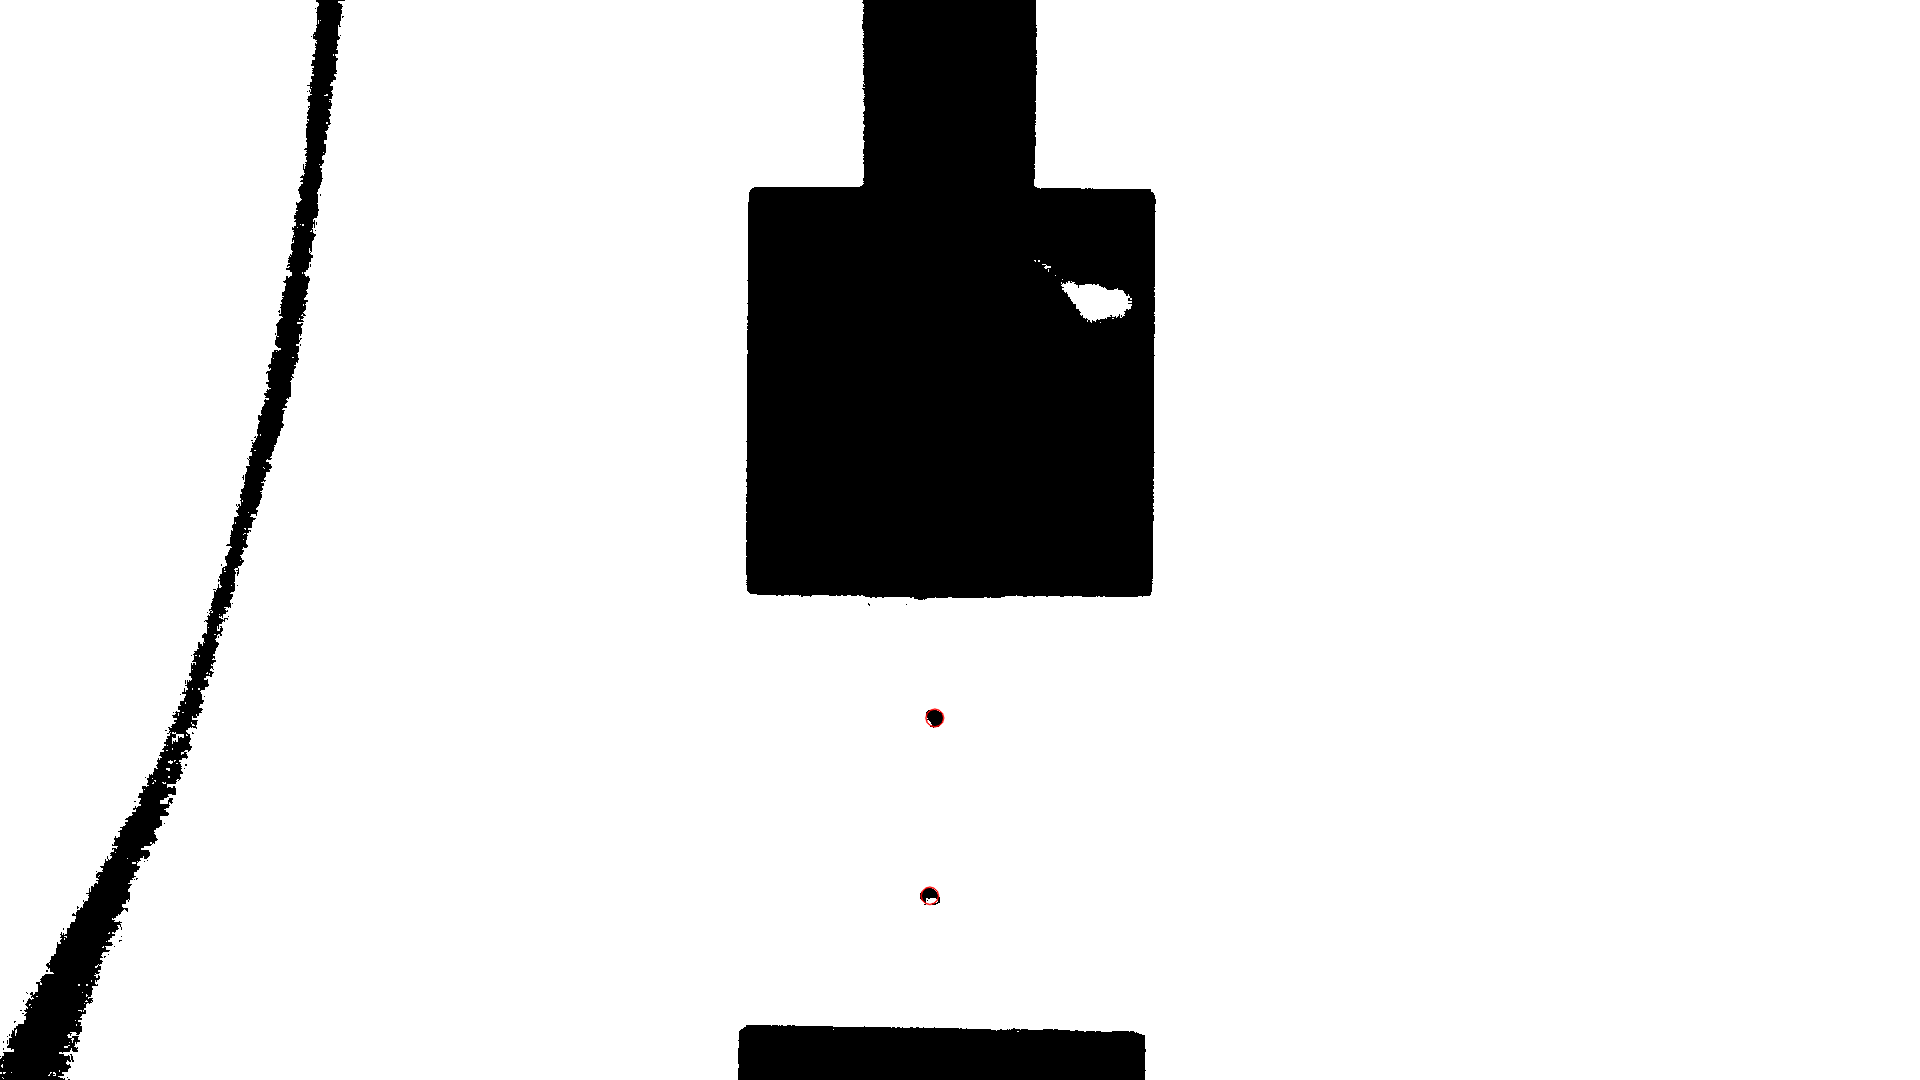

Read a new frame:  True
9


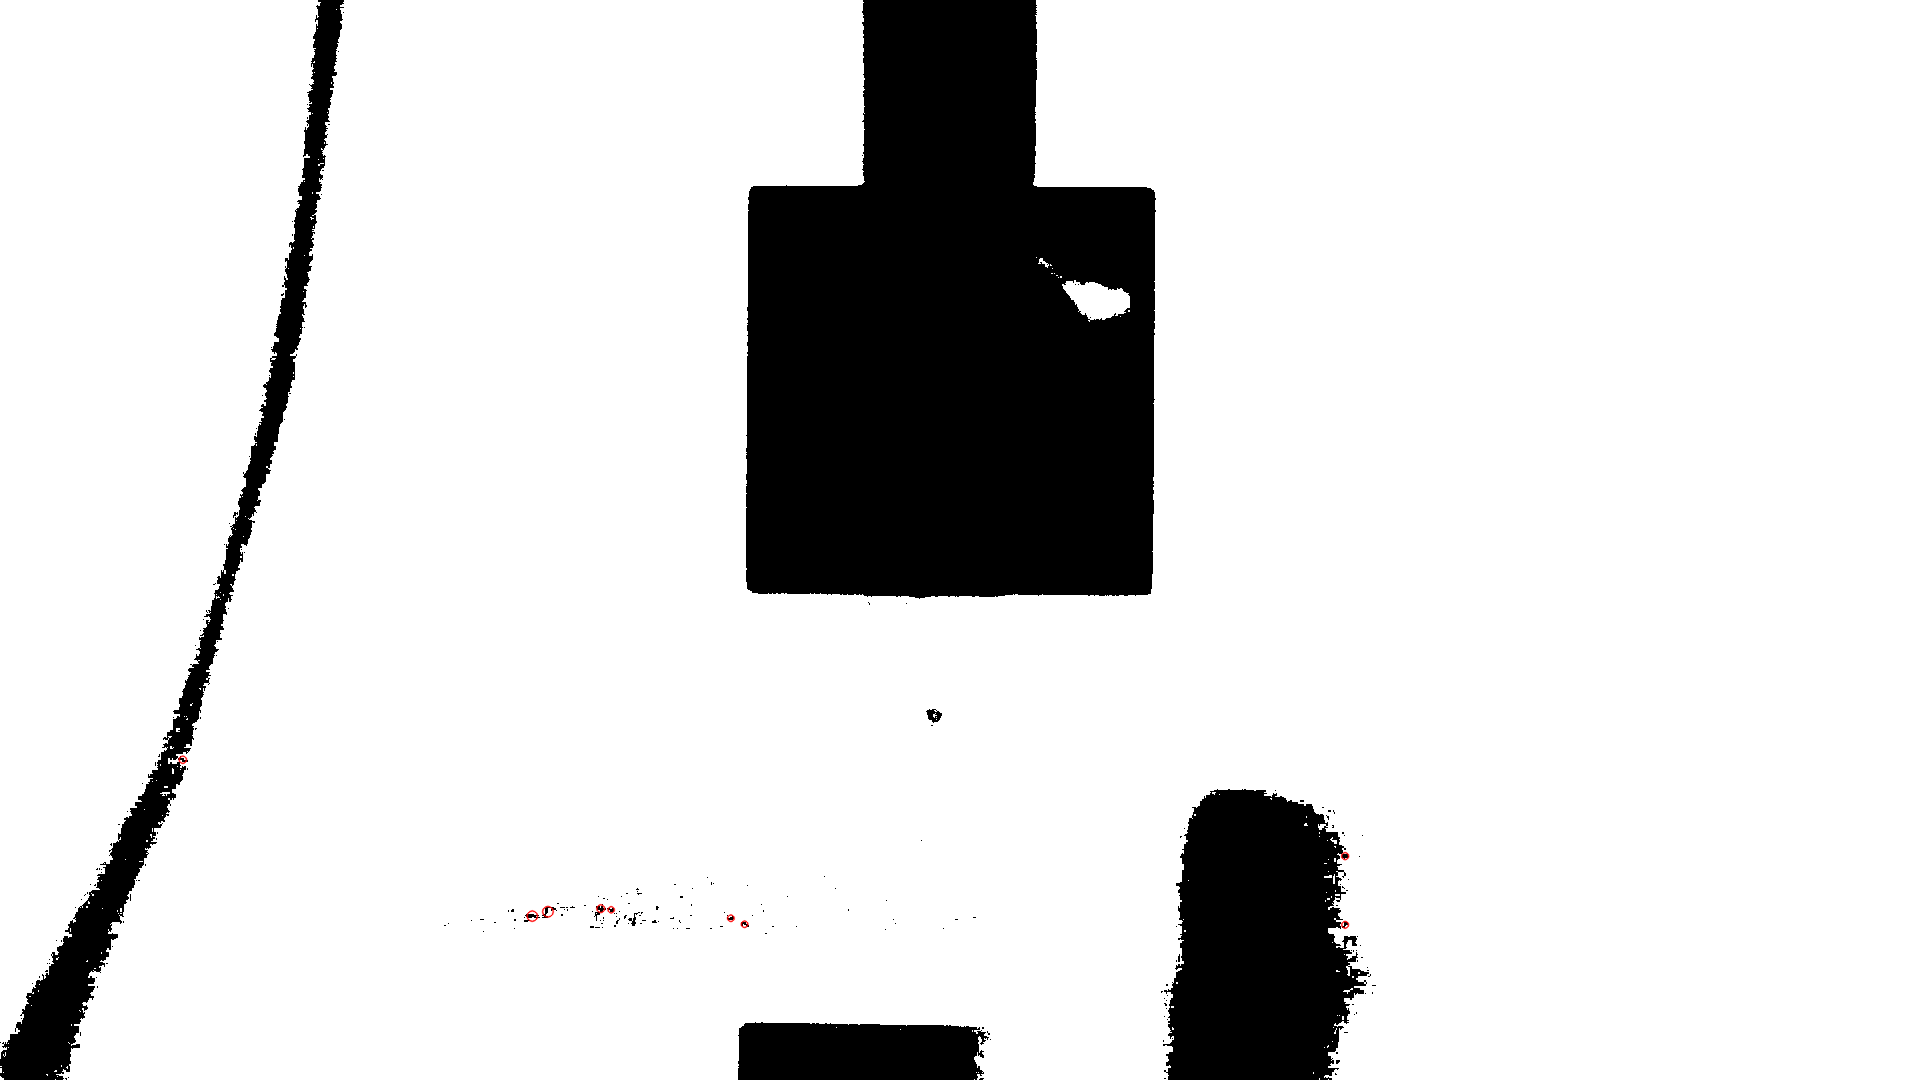

Read a new frame:  True
21


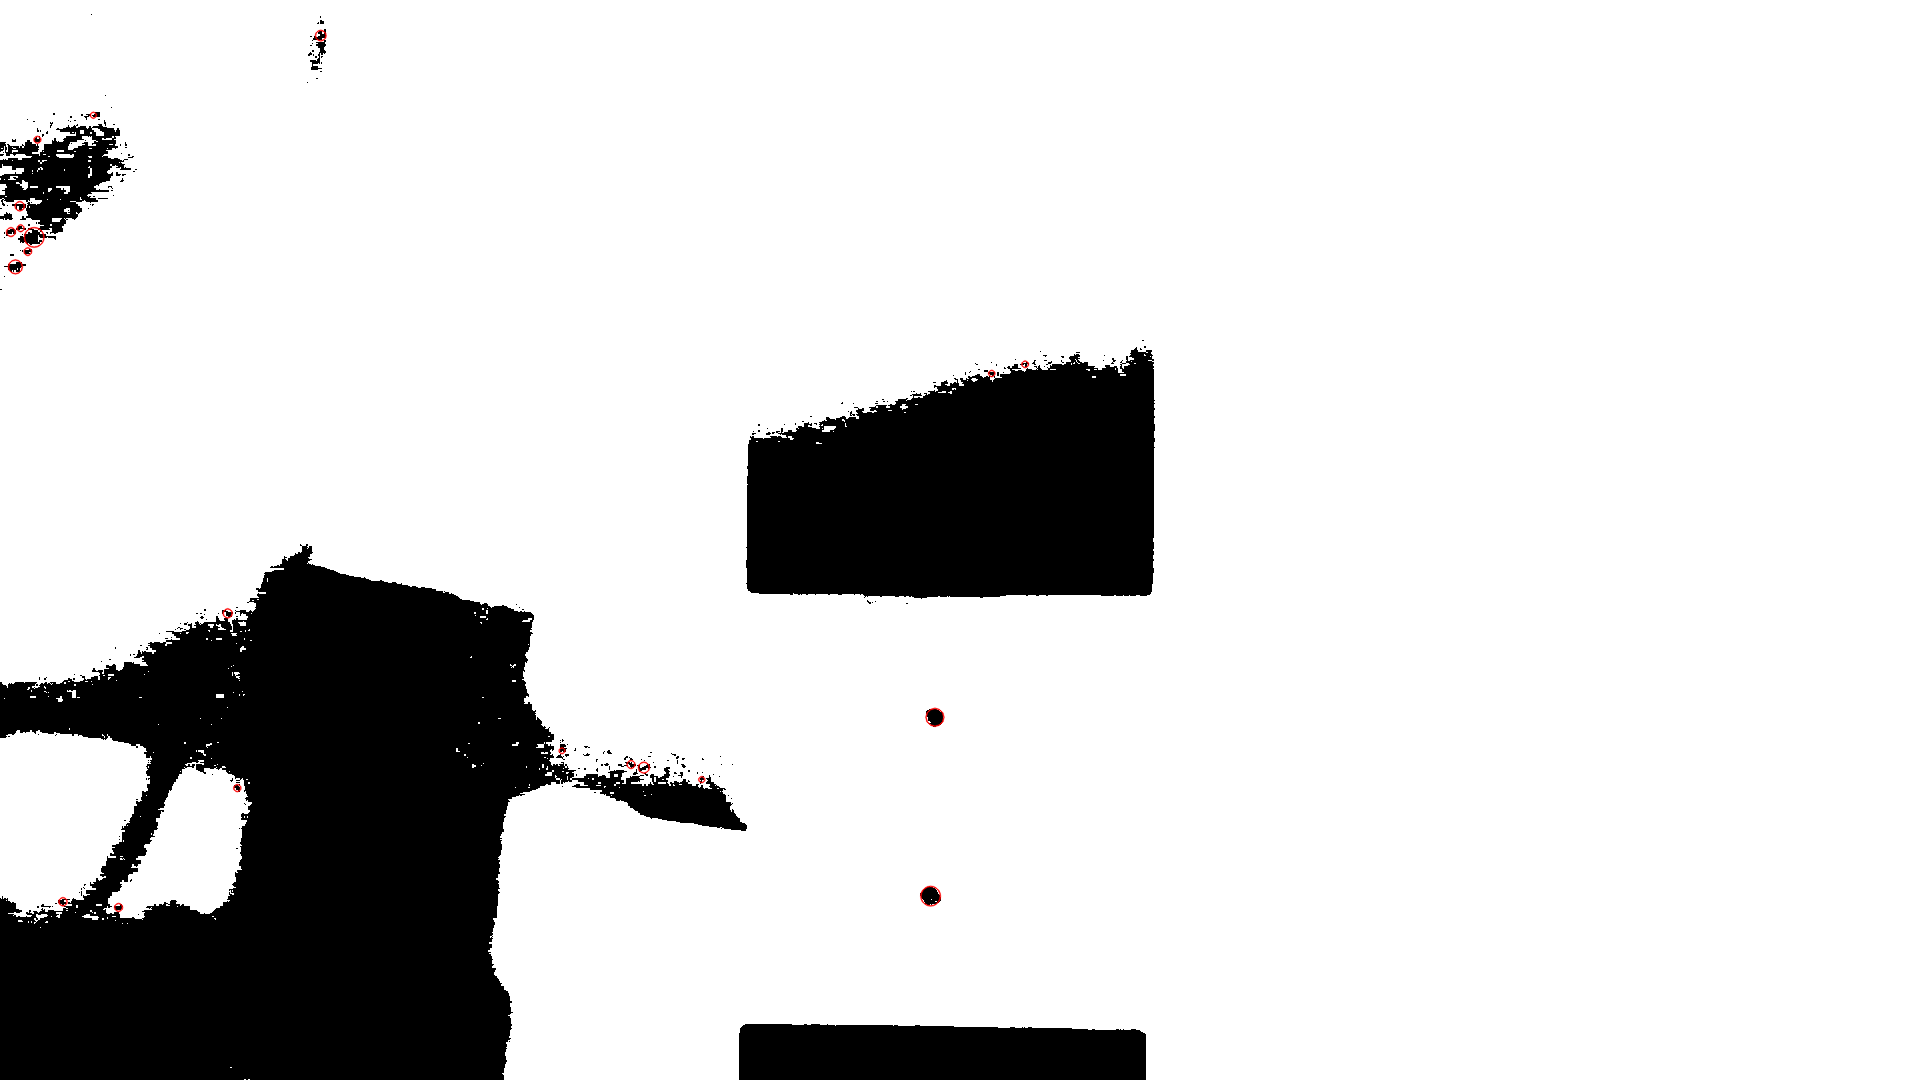

Read a new frame:  True
14


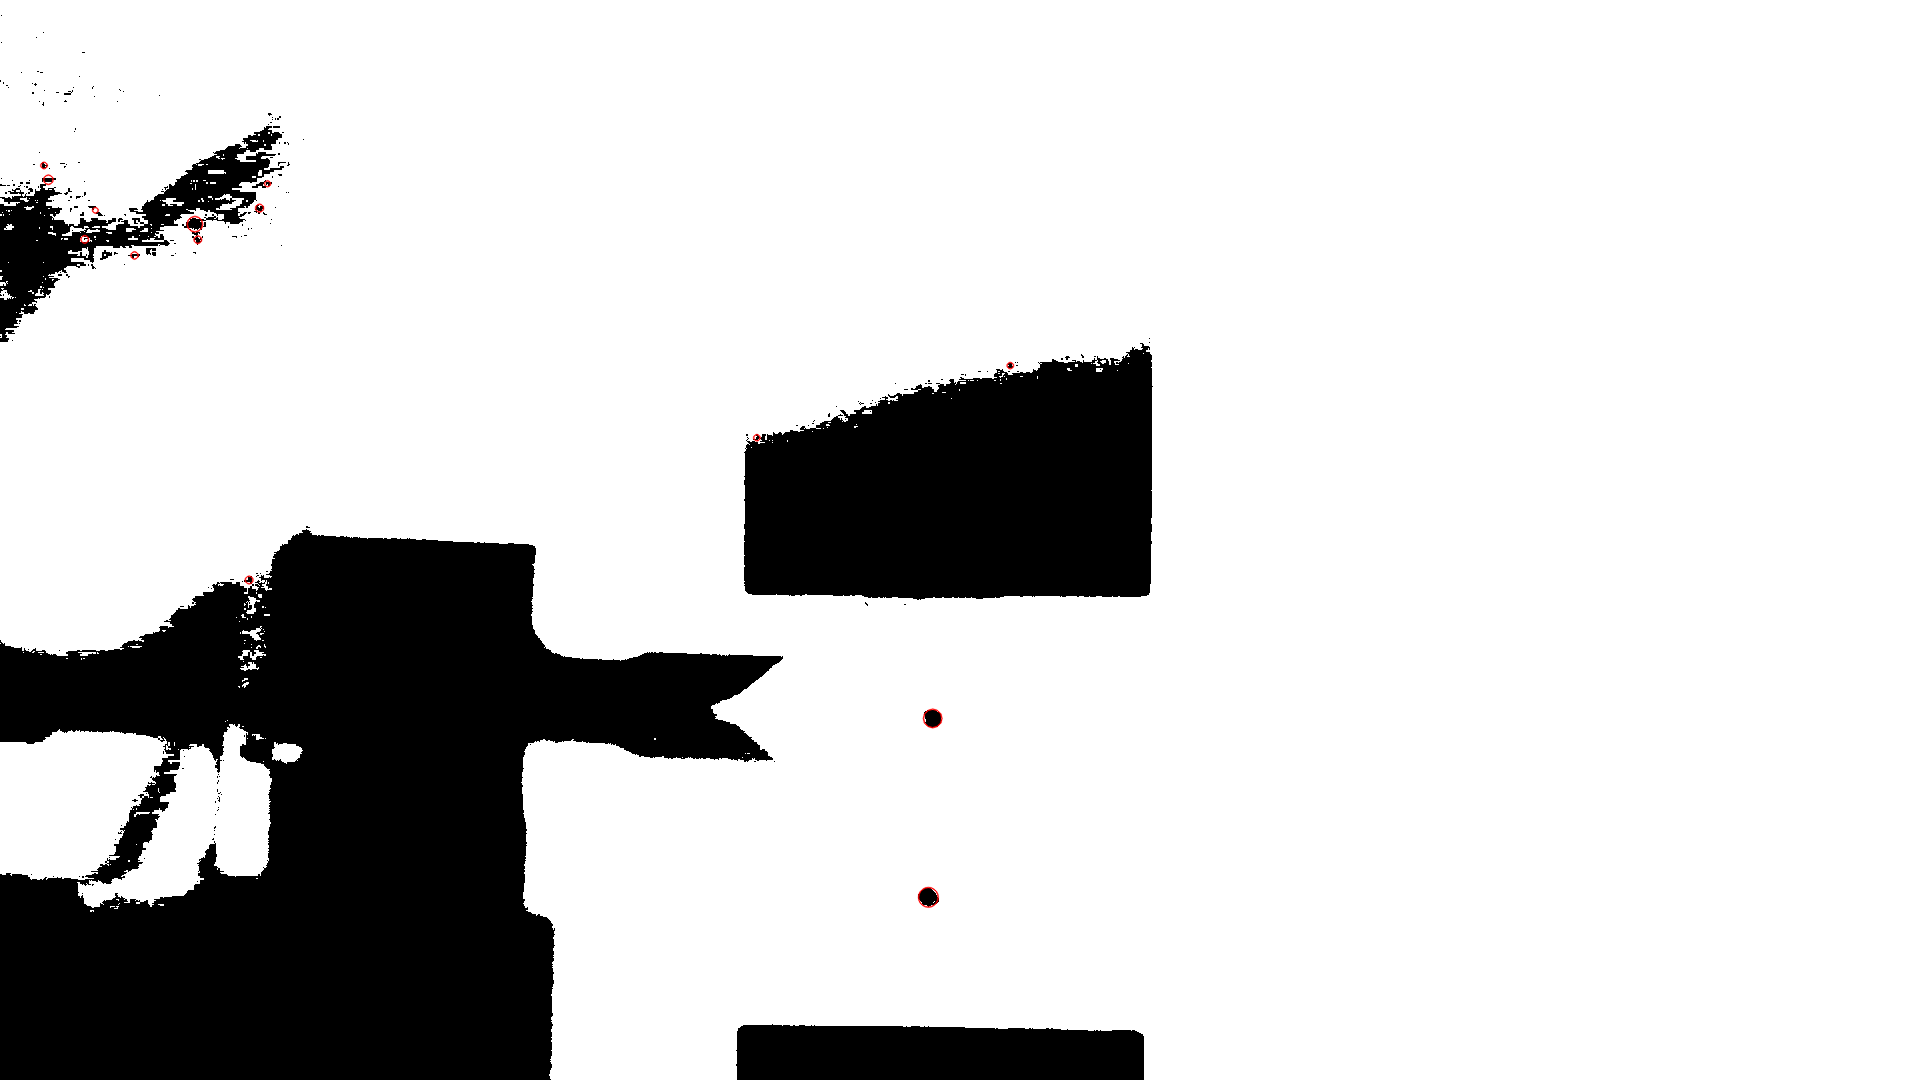

Read a new frame:  True
21


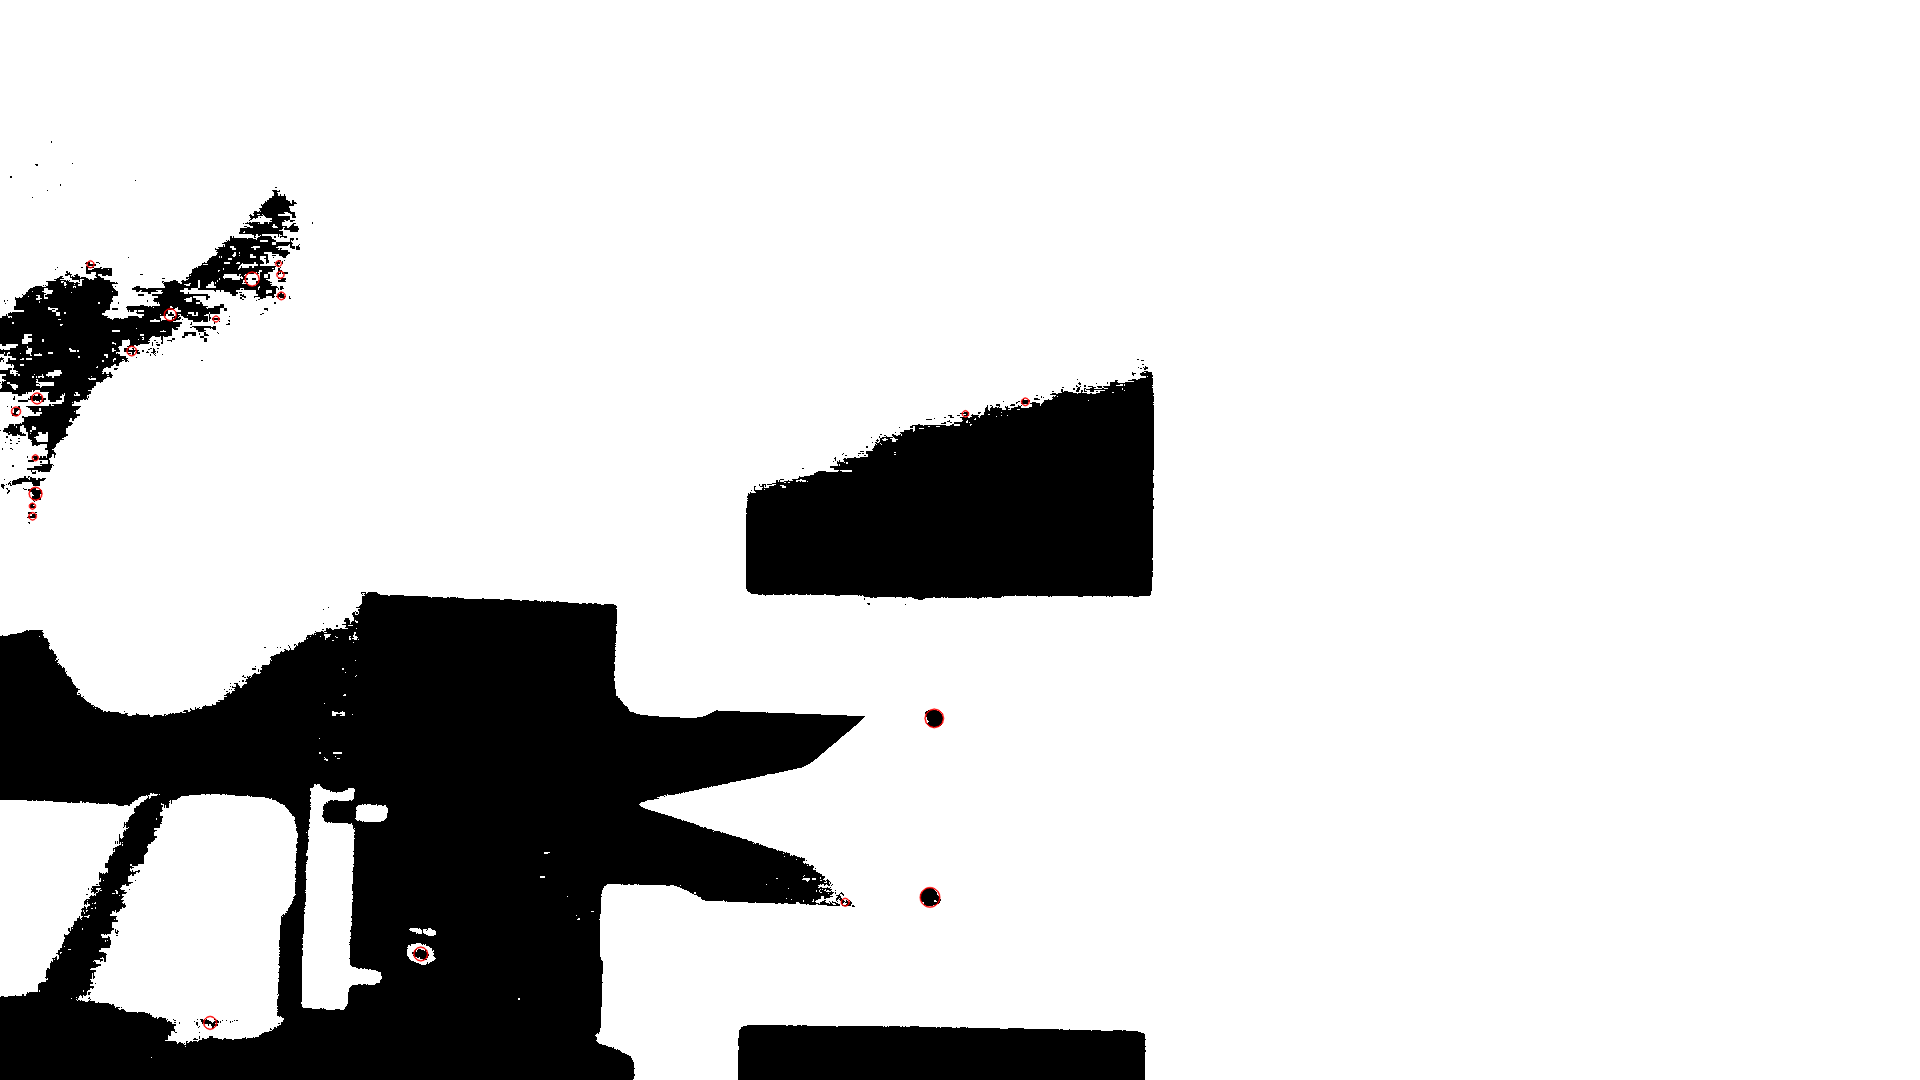

Read a new frame:  True
21


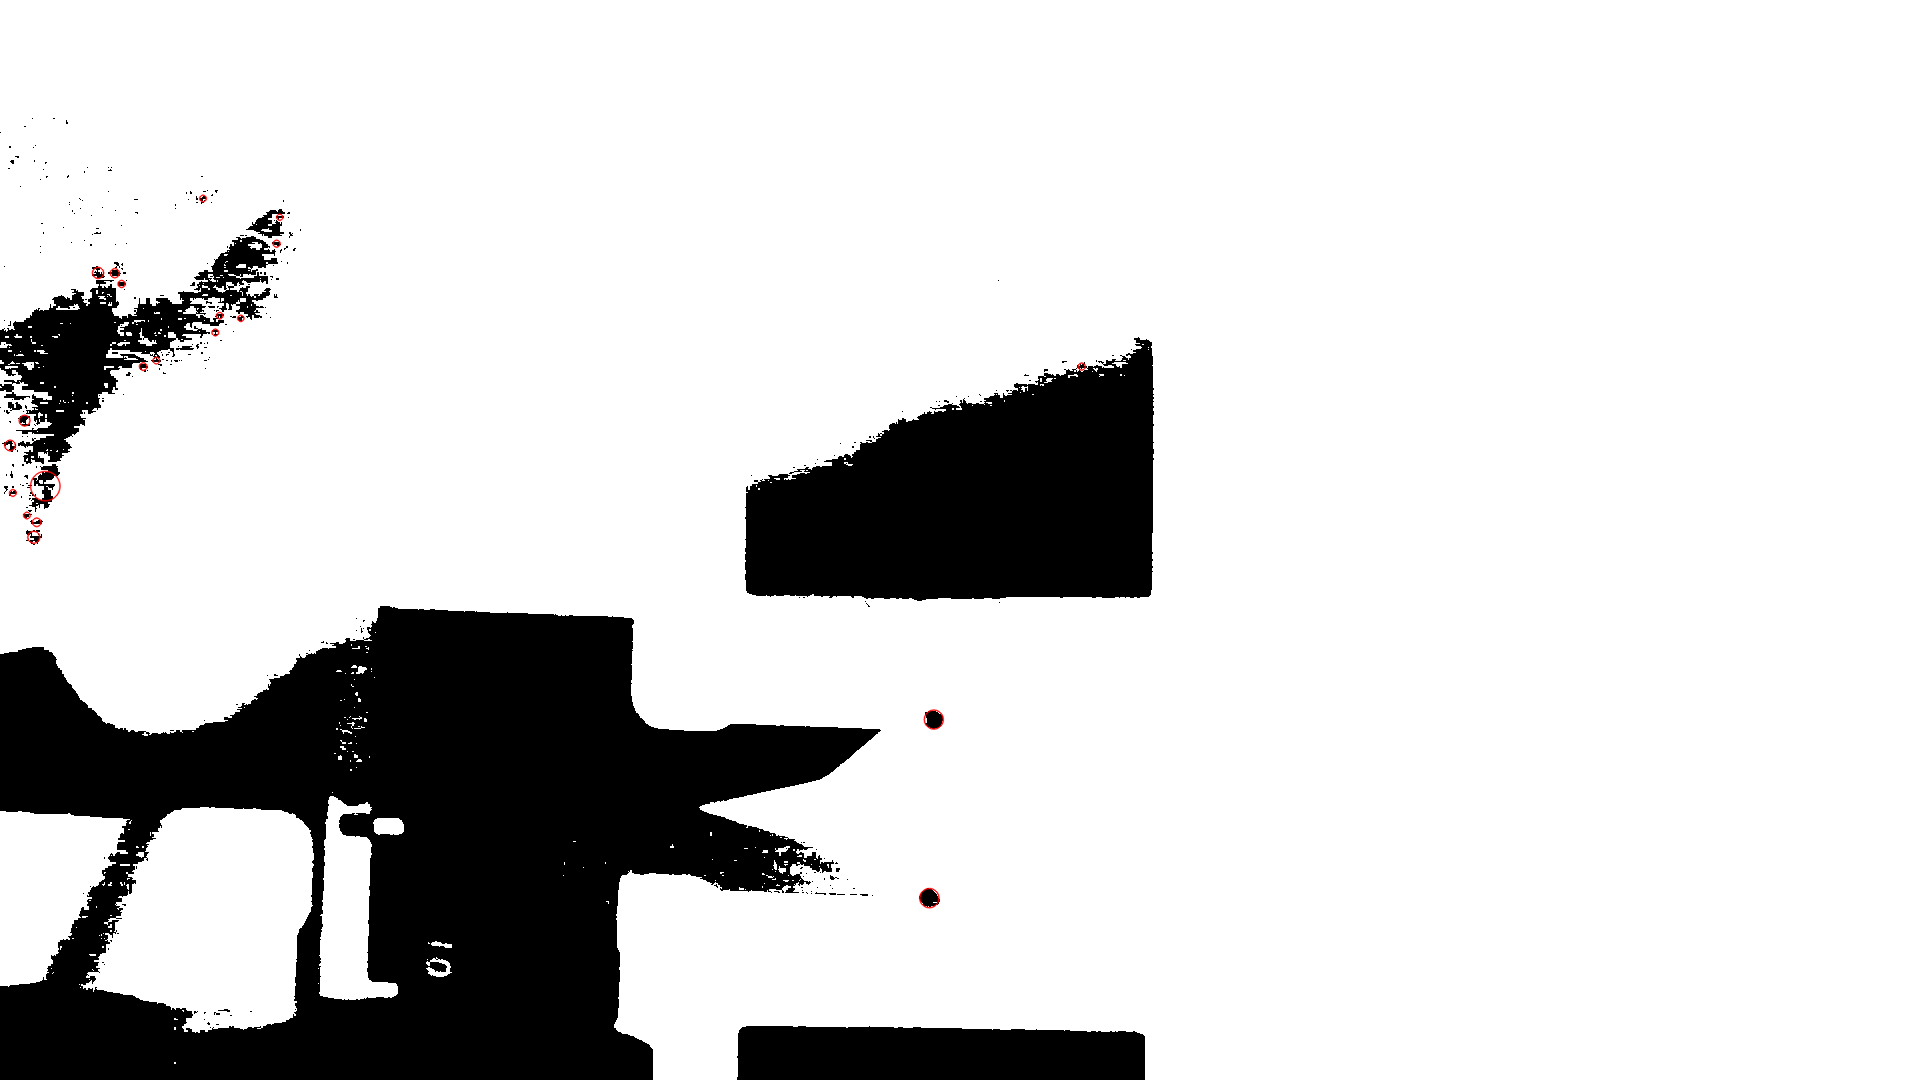

Read a new frame:  True
31


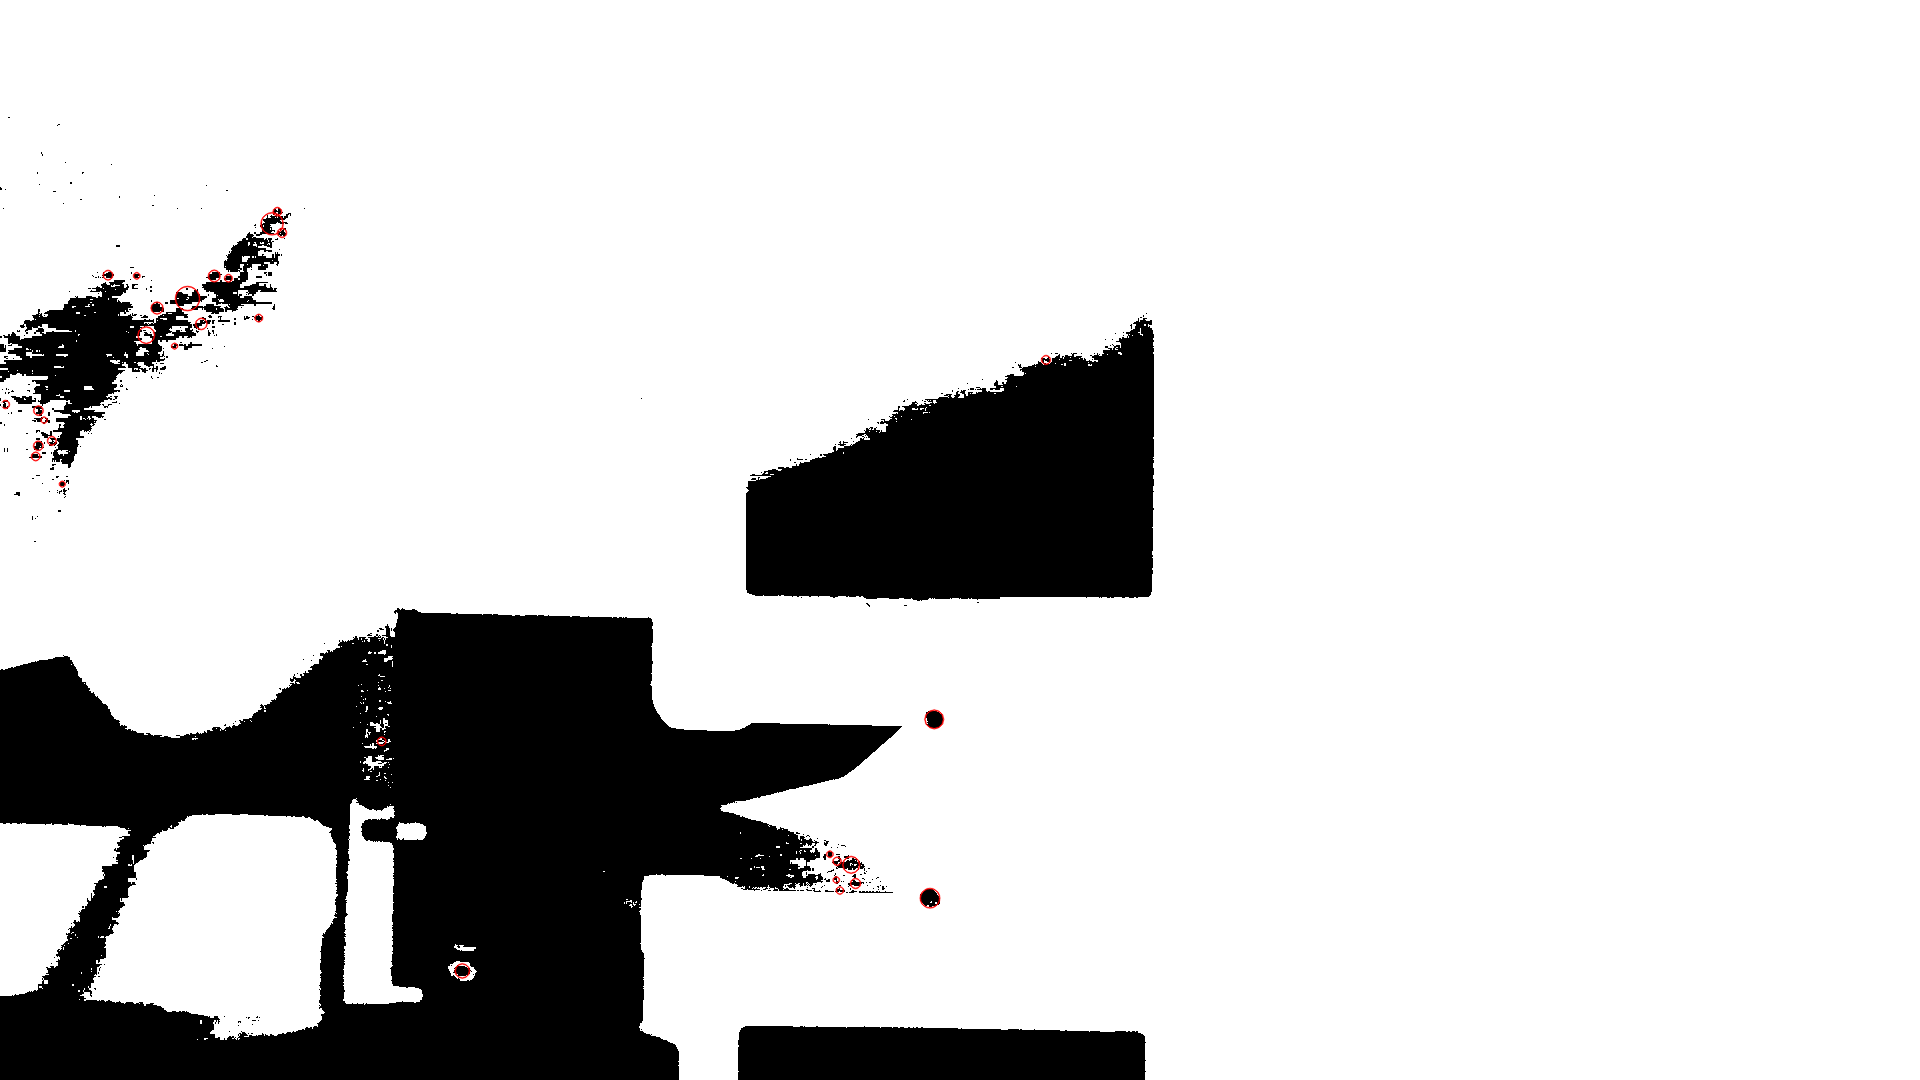

Read a new frame:  True
20


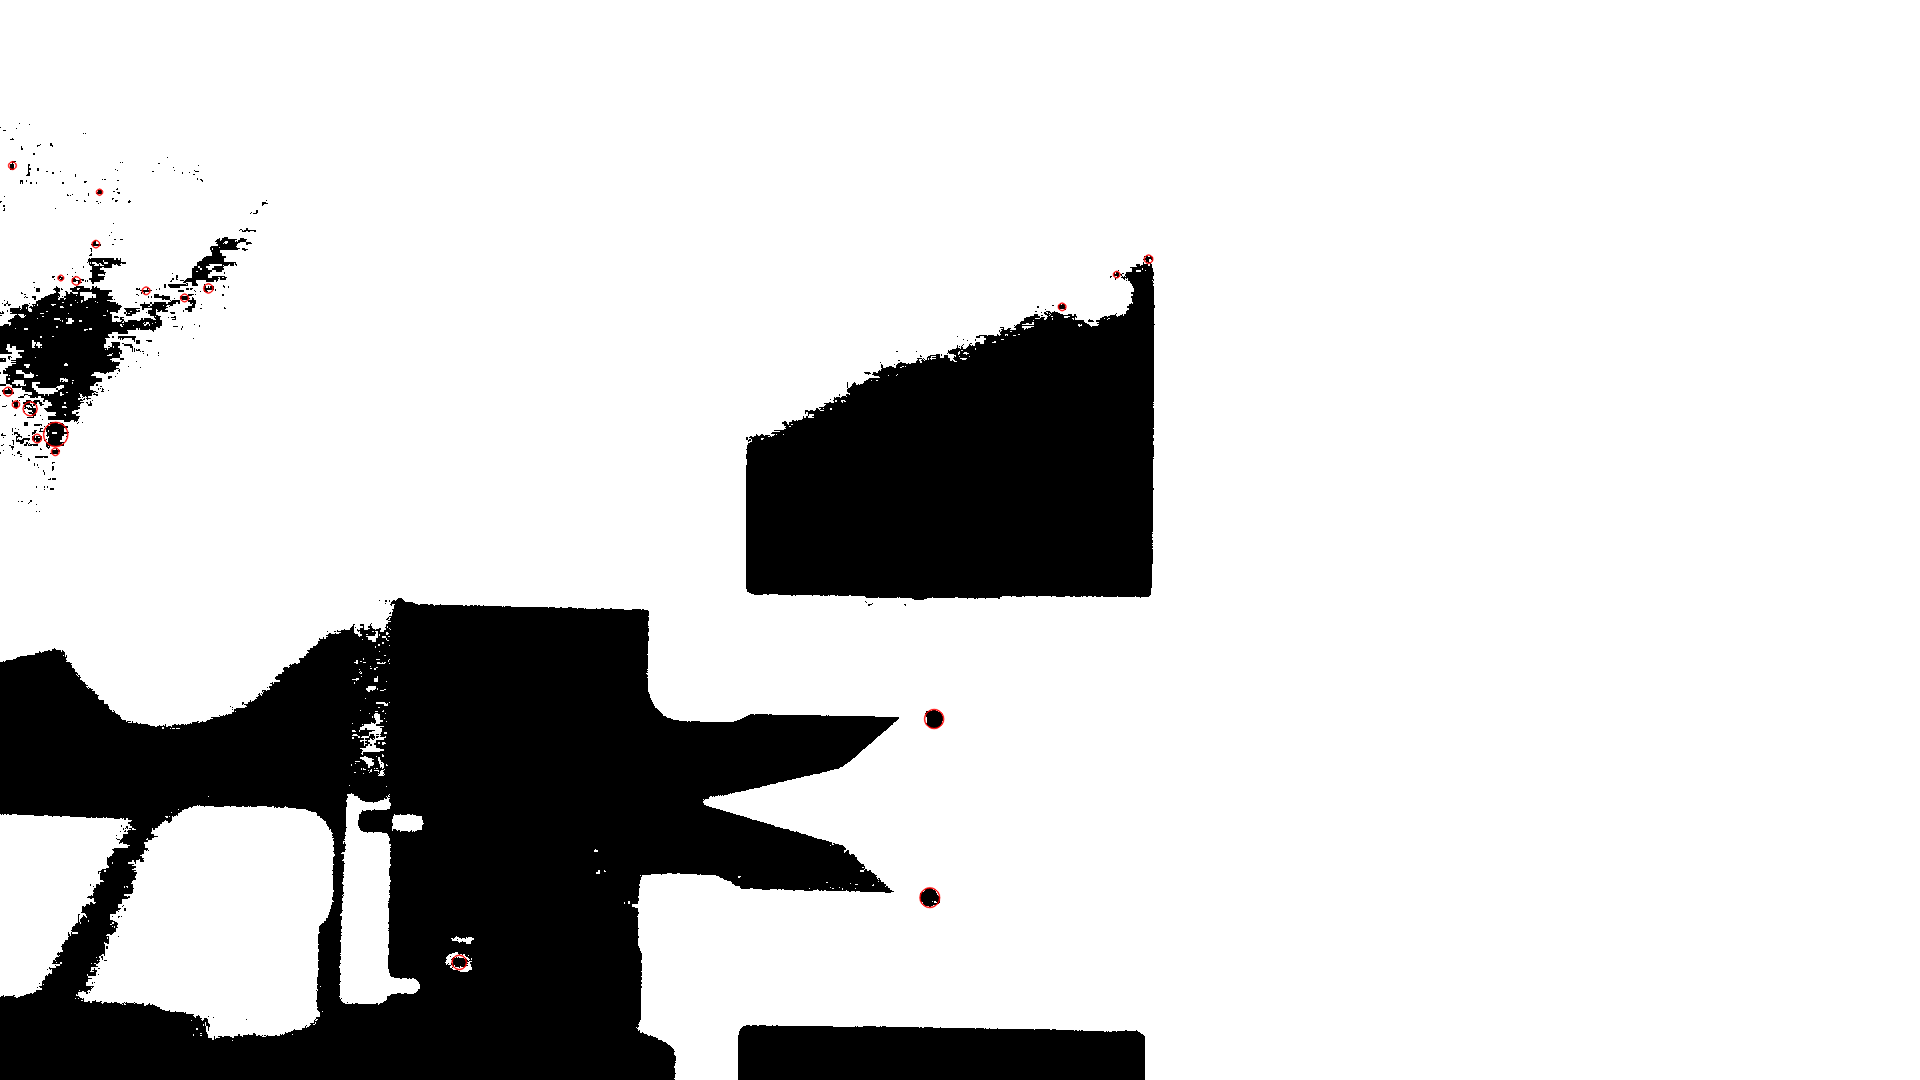

Read a new frame:  True
18


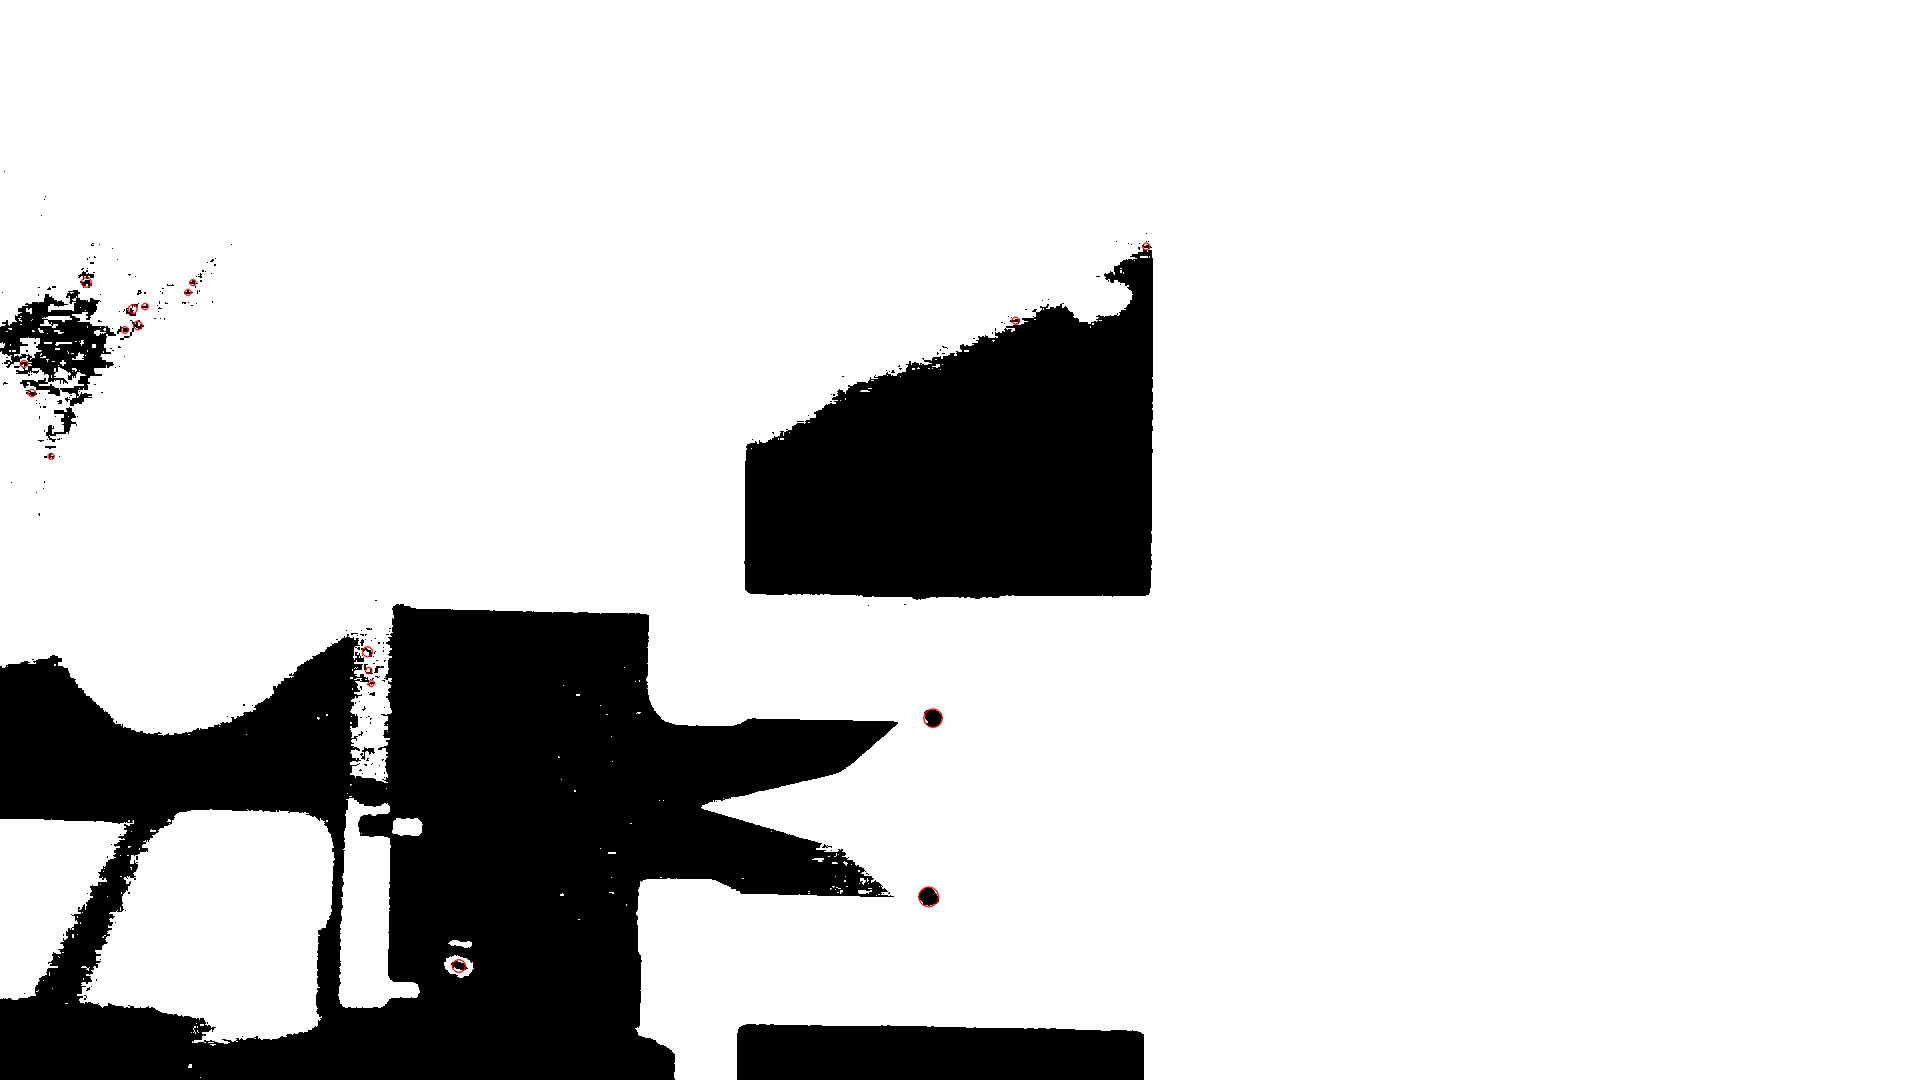

Read a new frame:  True
14


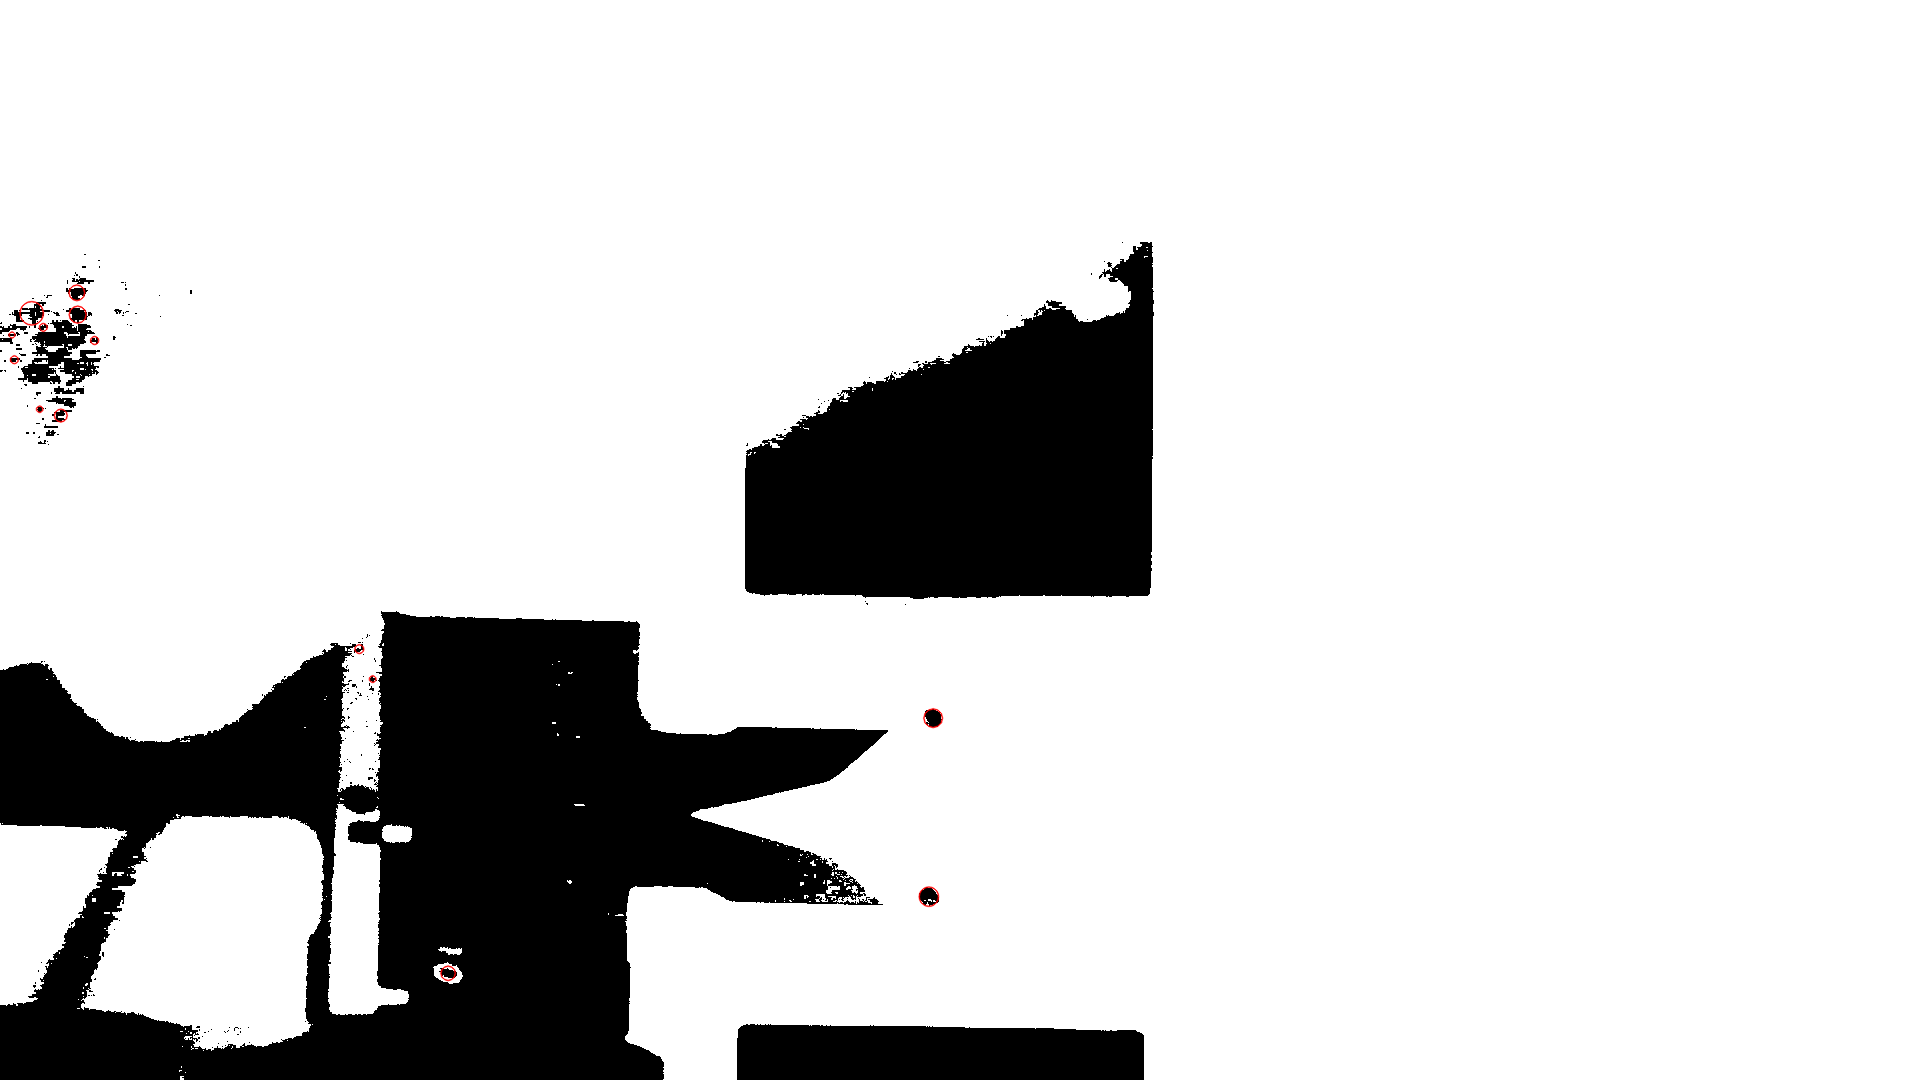

Read a new frame:  True
26


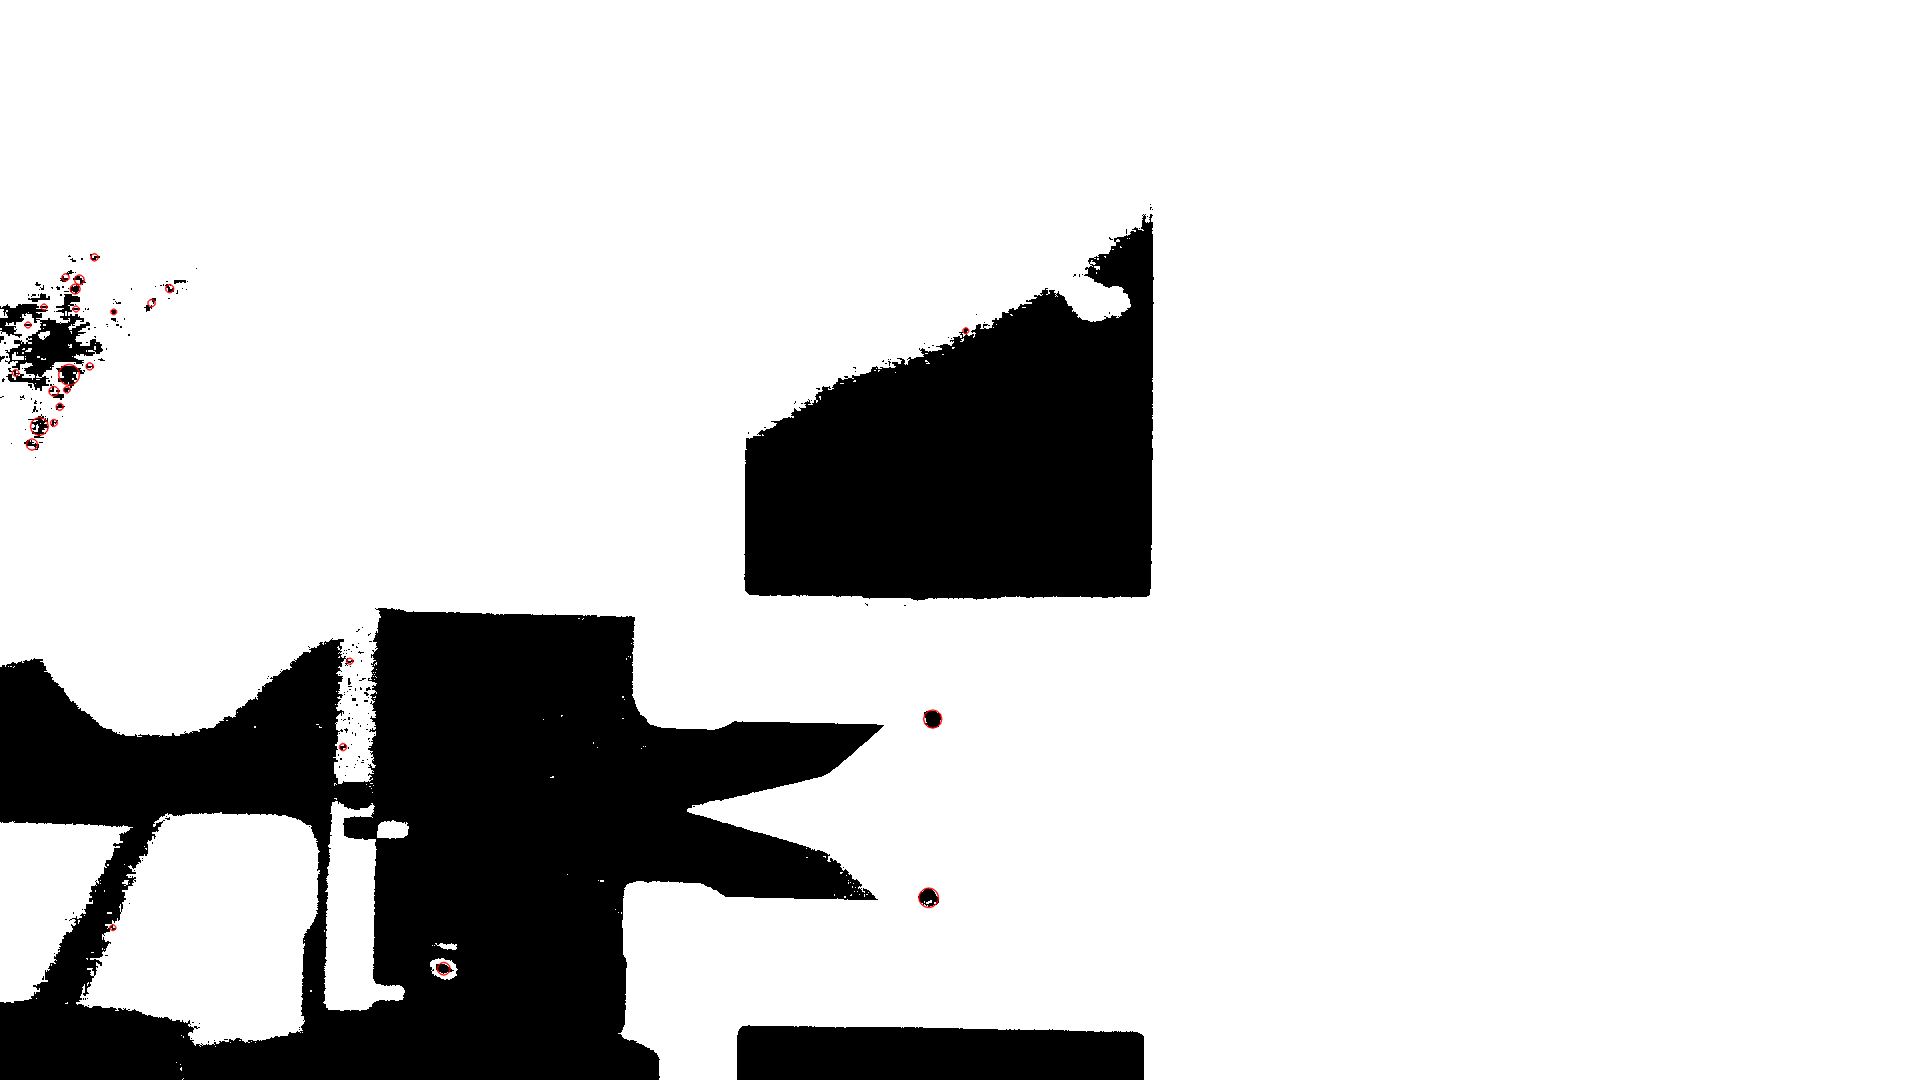

Read a new frame:  True
13


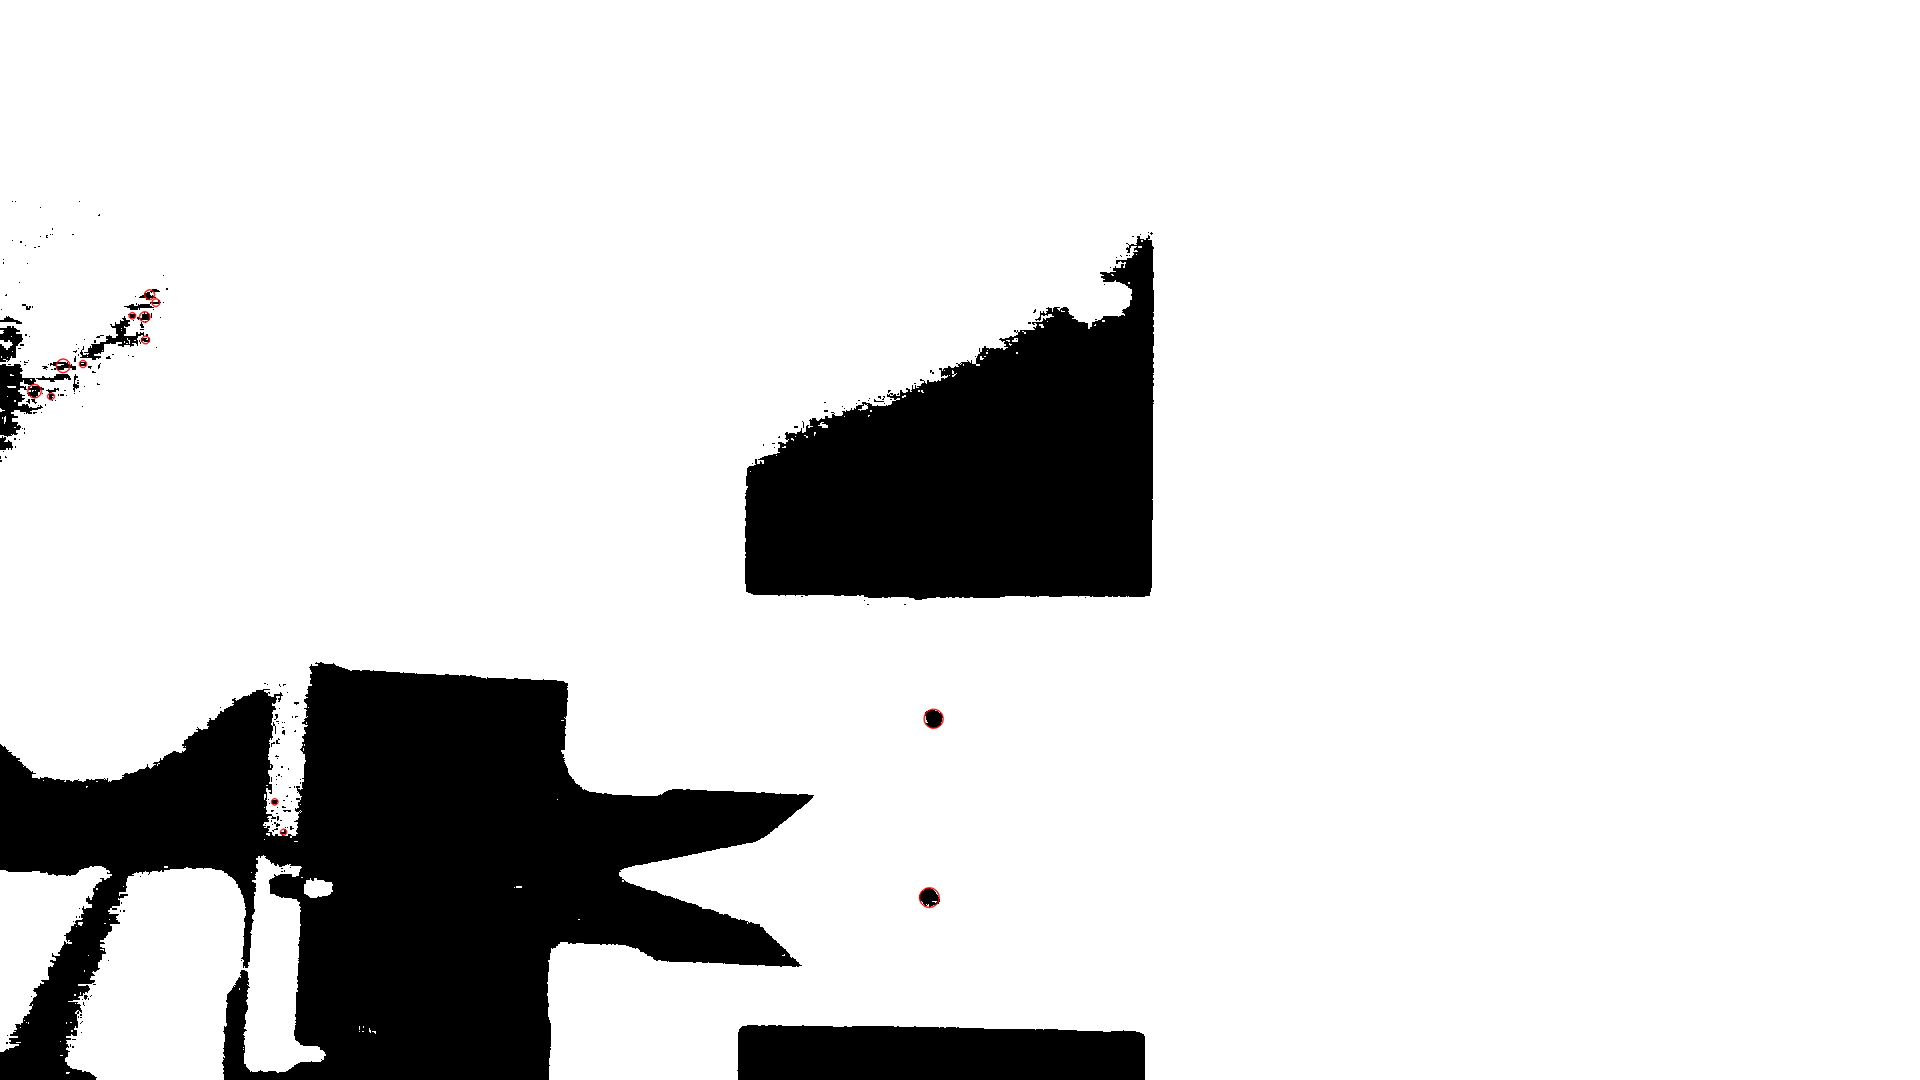

Read a new frame:  True
11


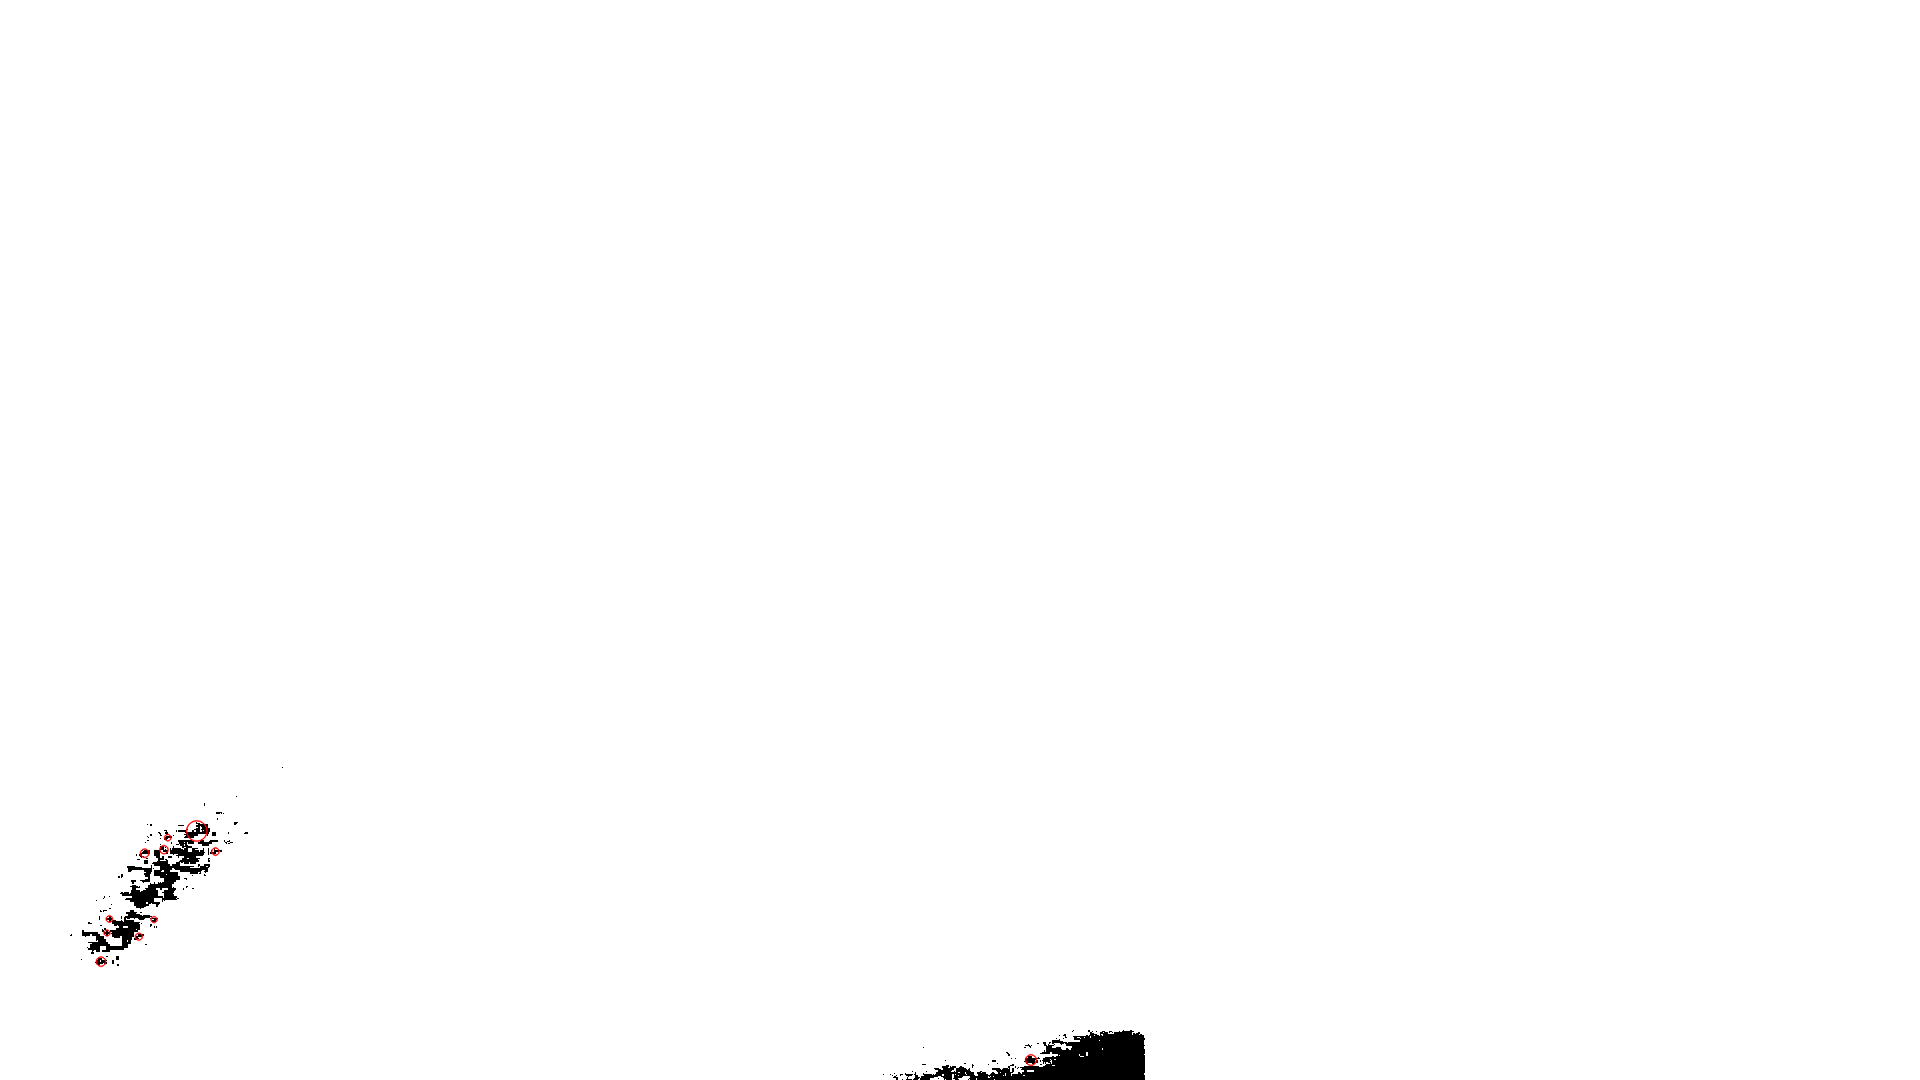

Read a new frame:  True
2


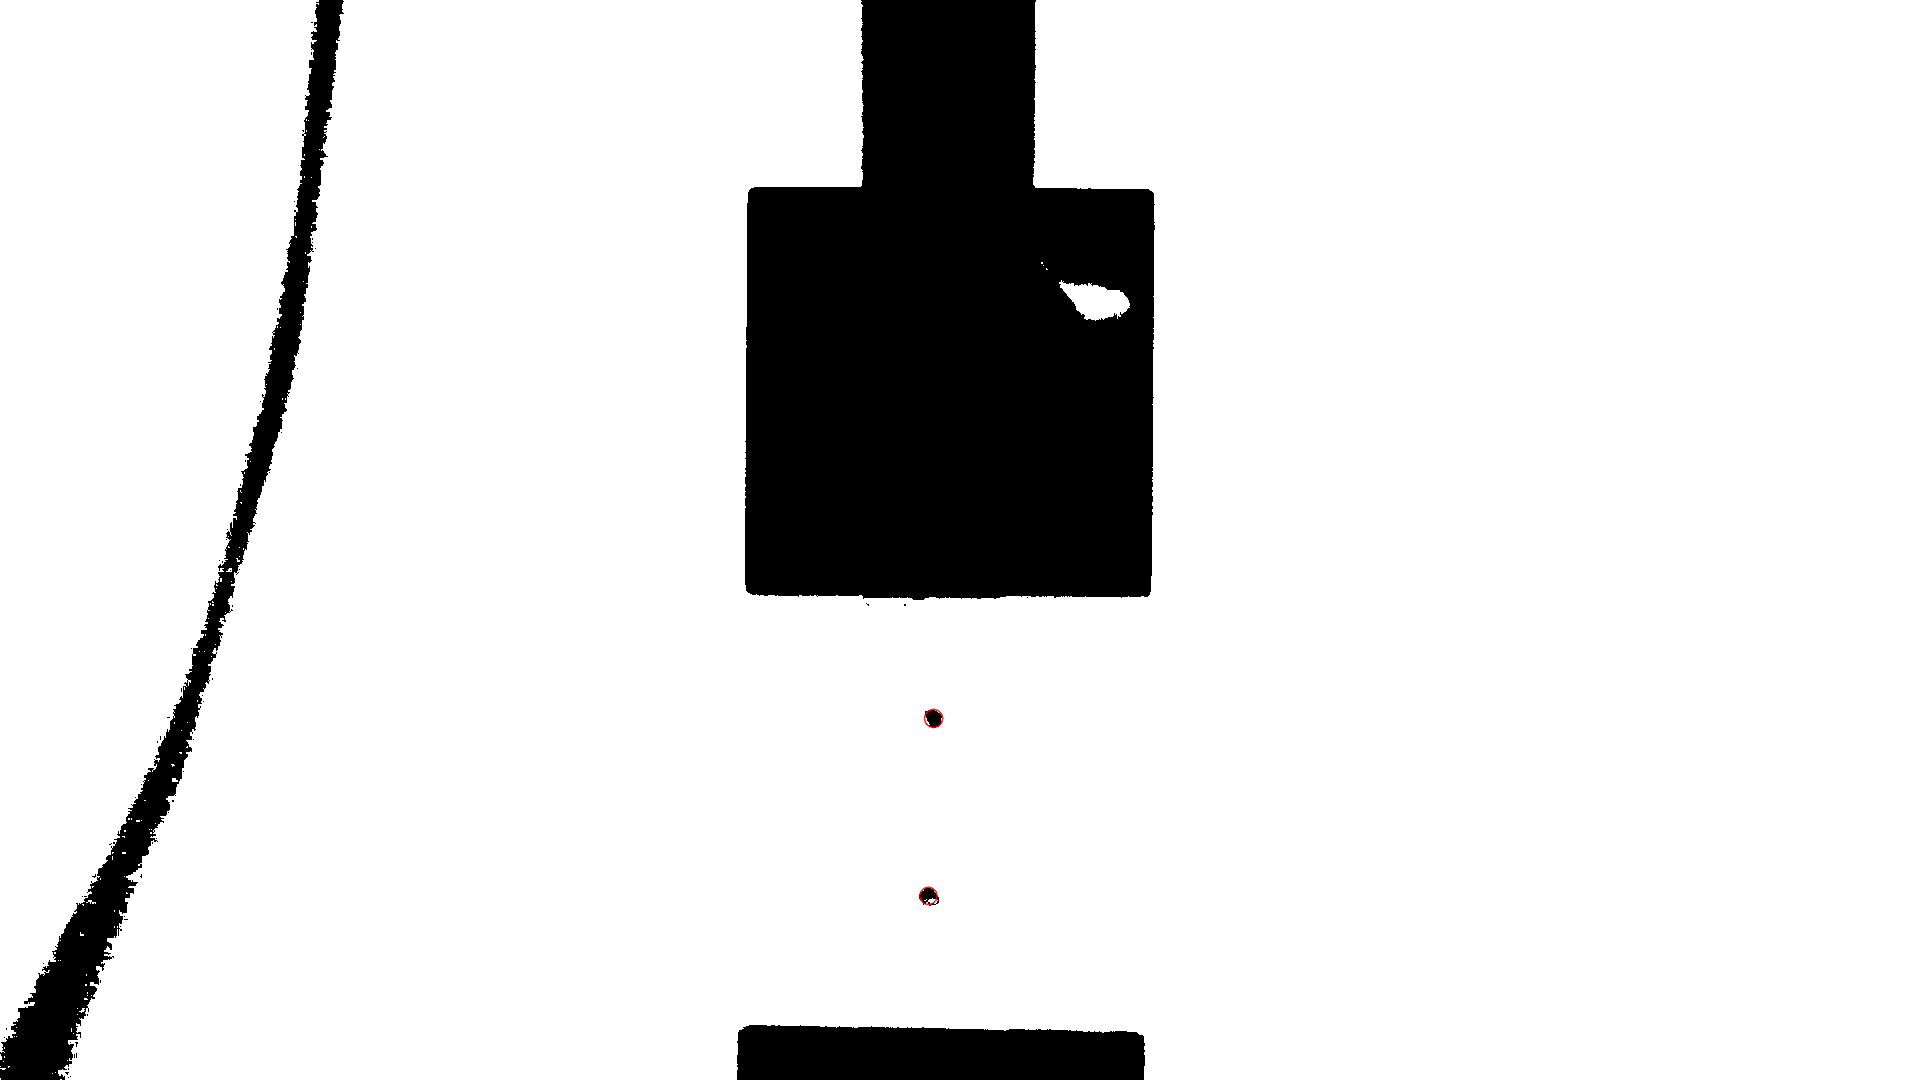

Read a new frame:  True
3


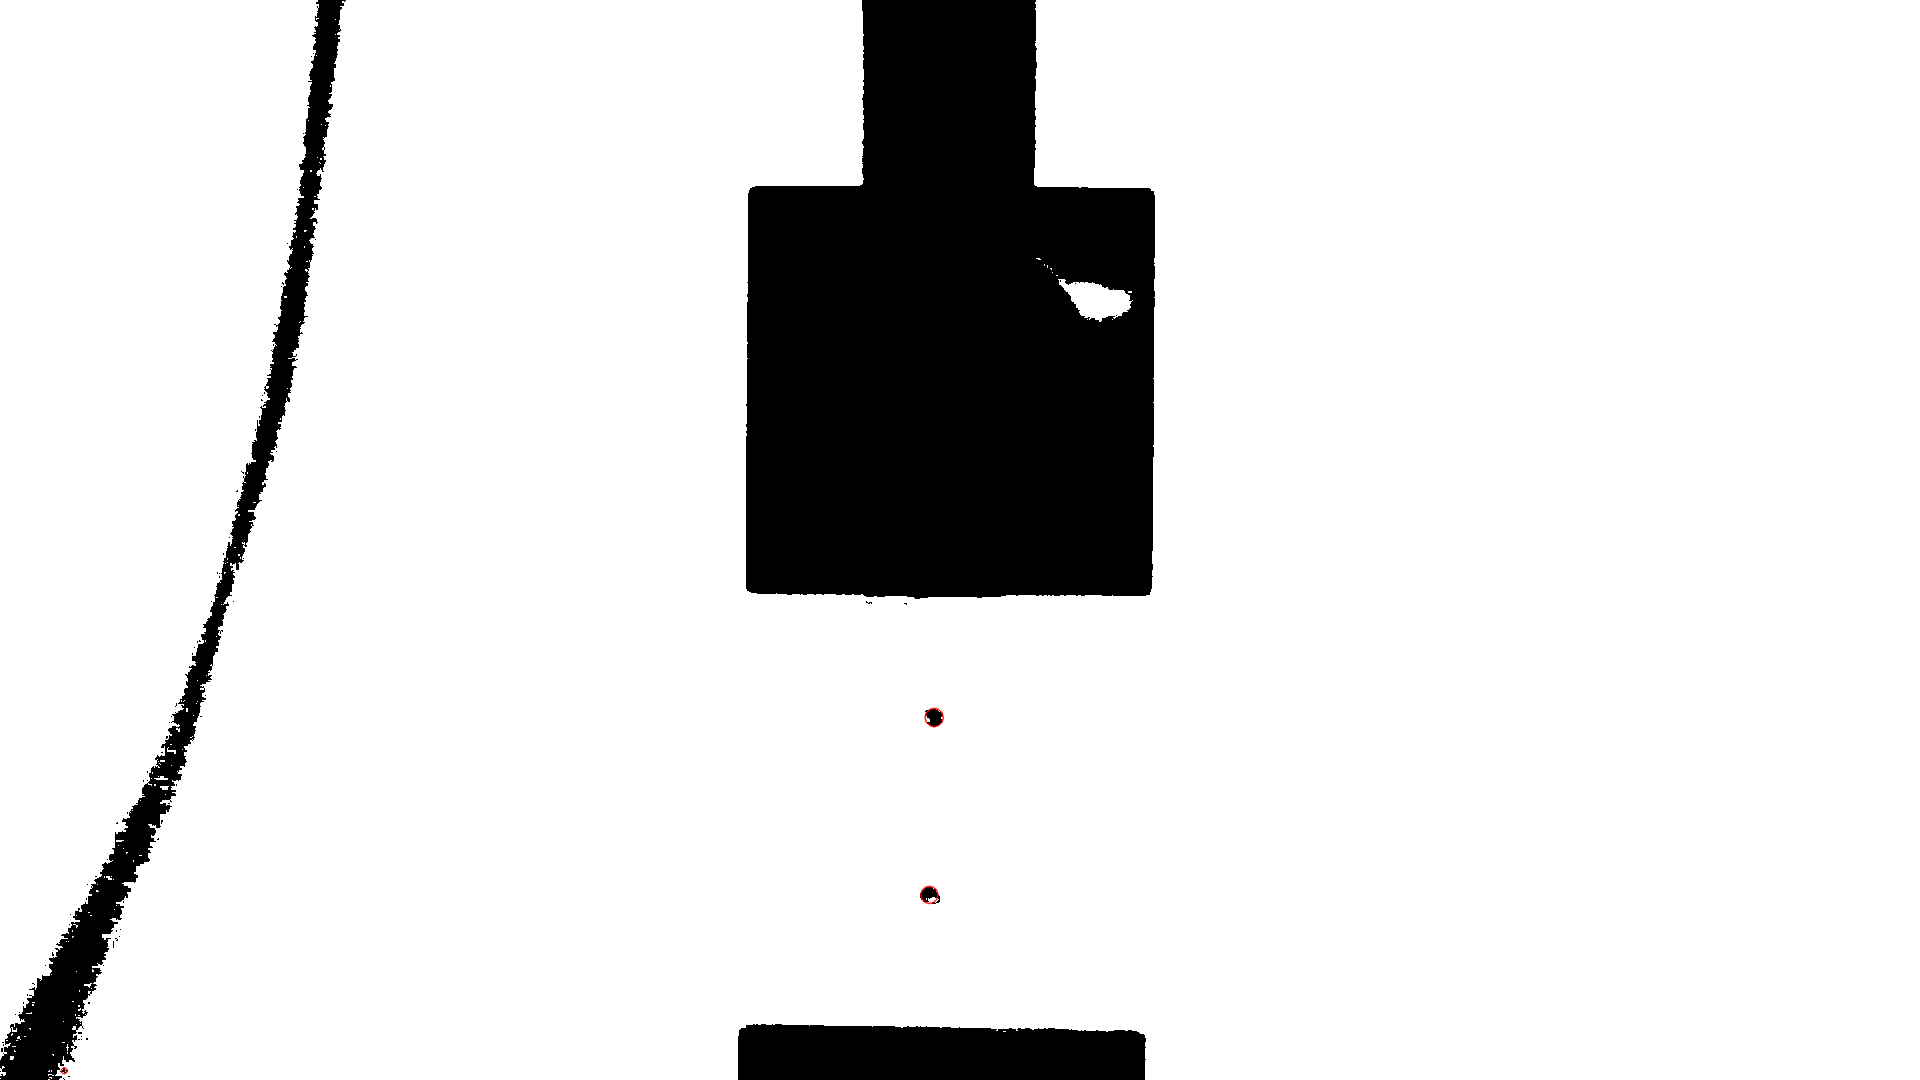

Read a new frame:  True
2


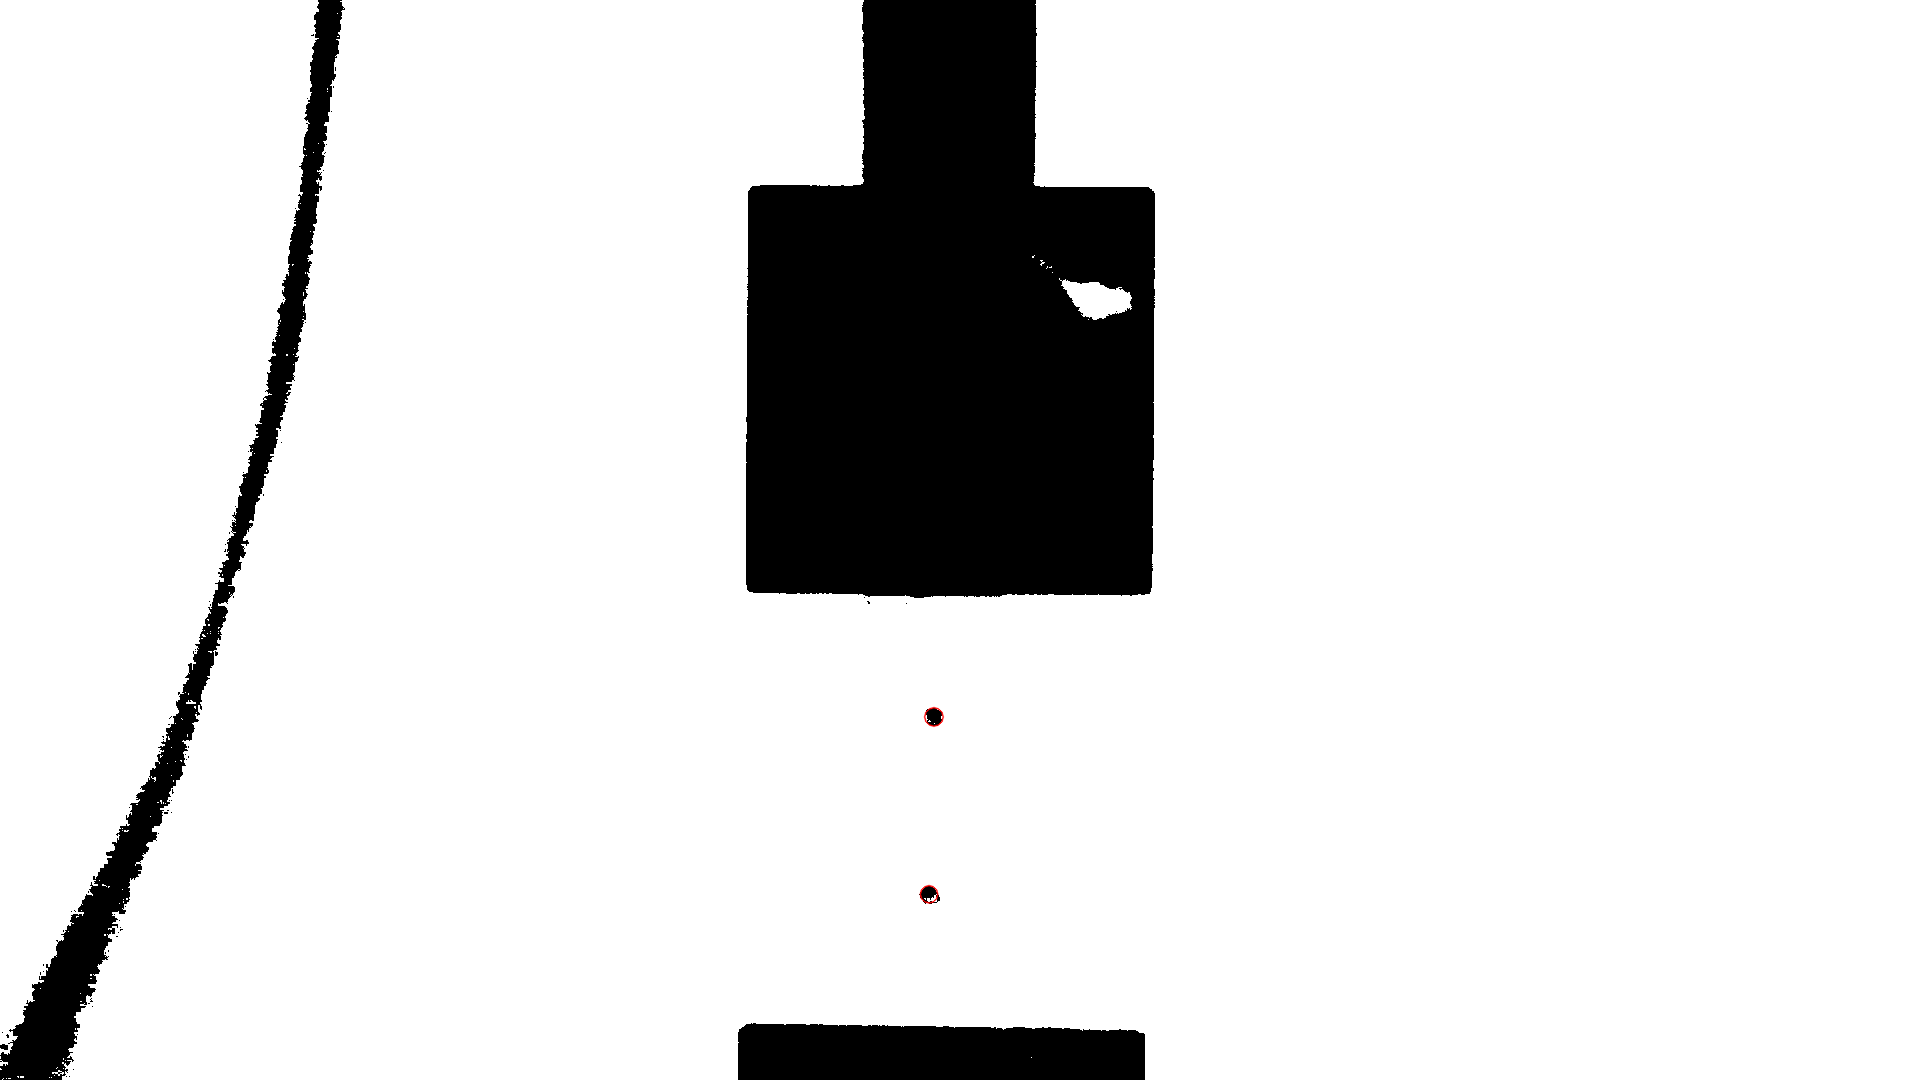

Read a new frame:  True
2


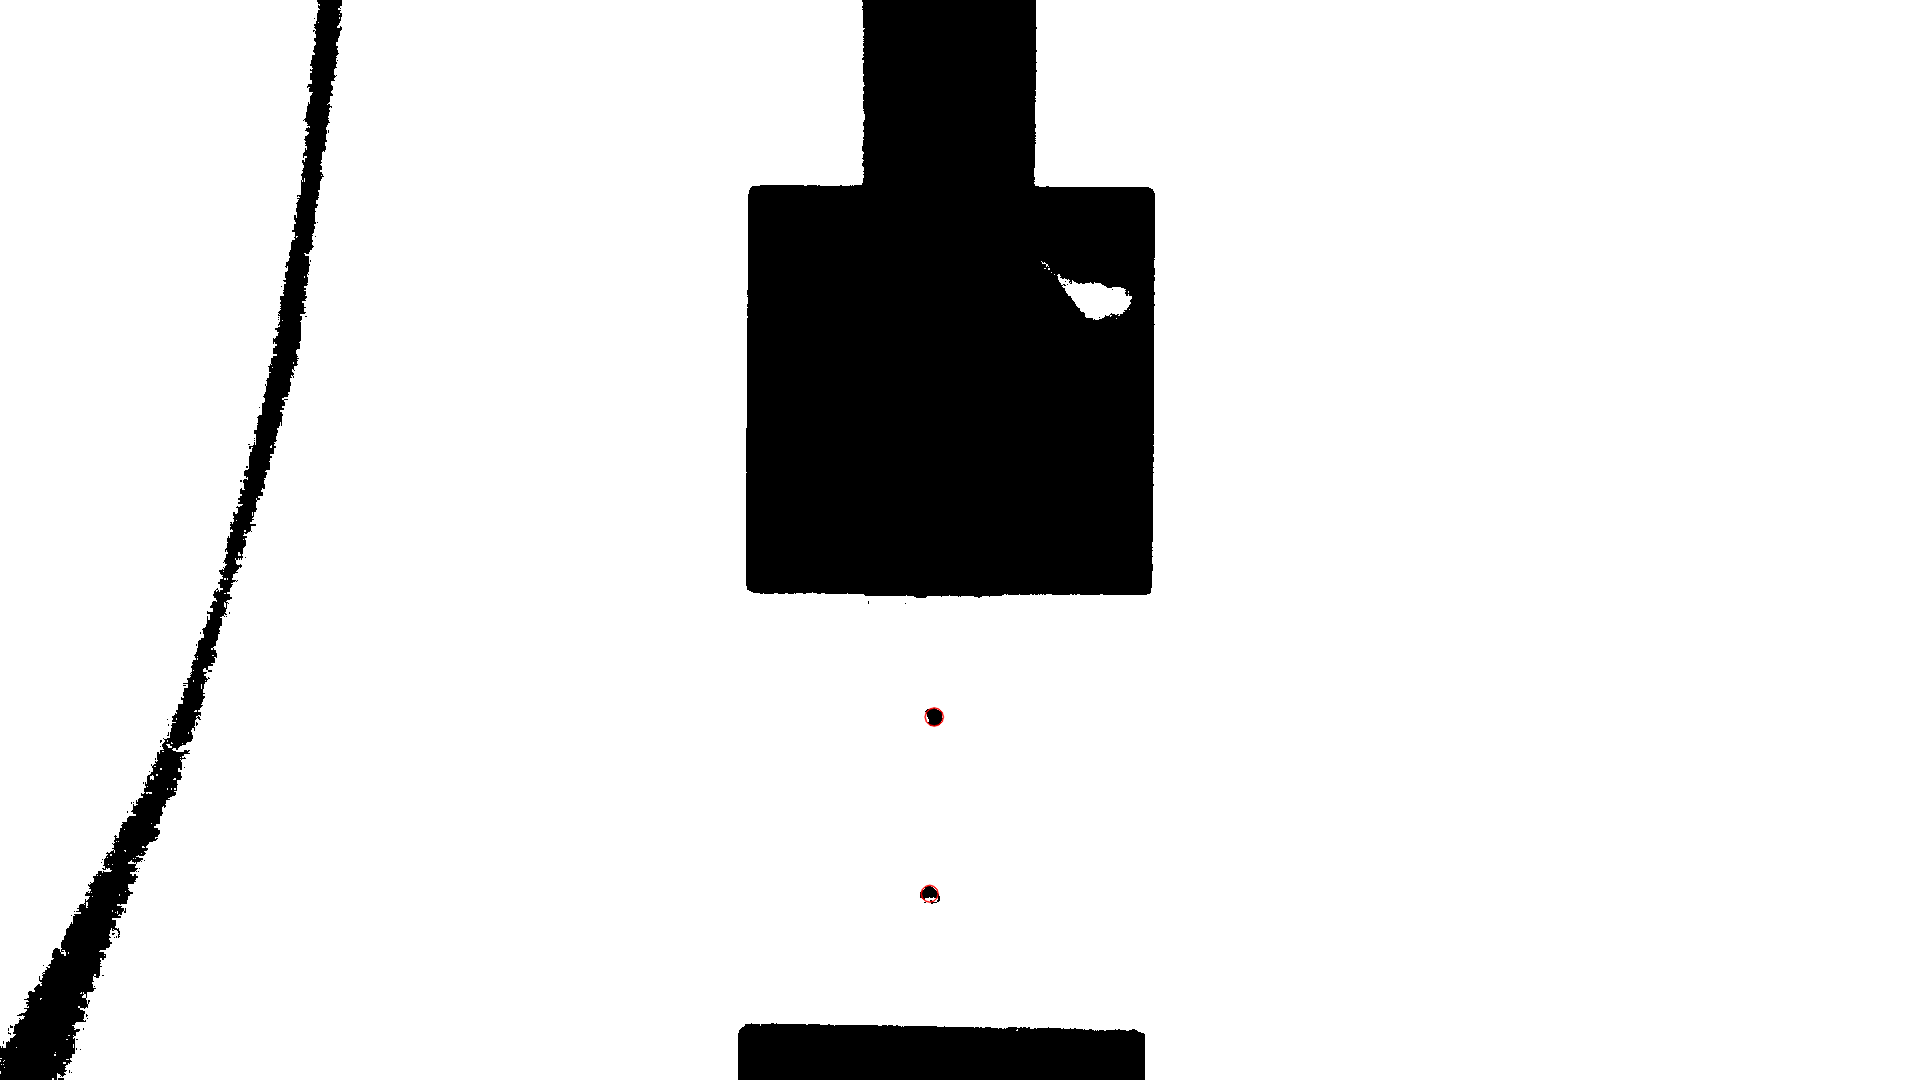

Read a new frame:  True
2


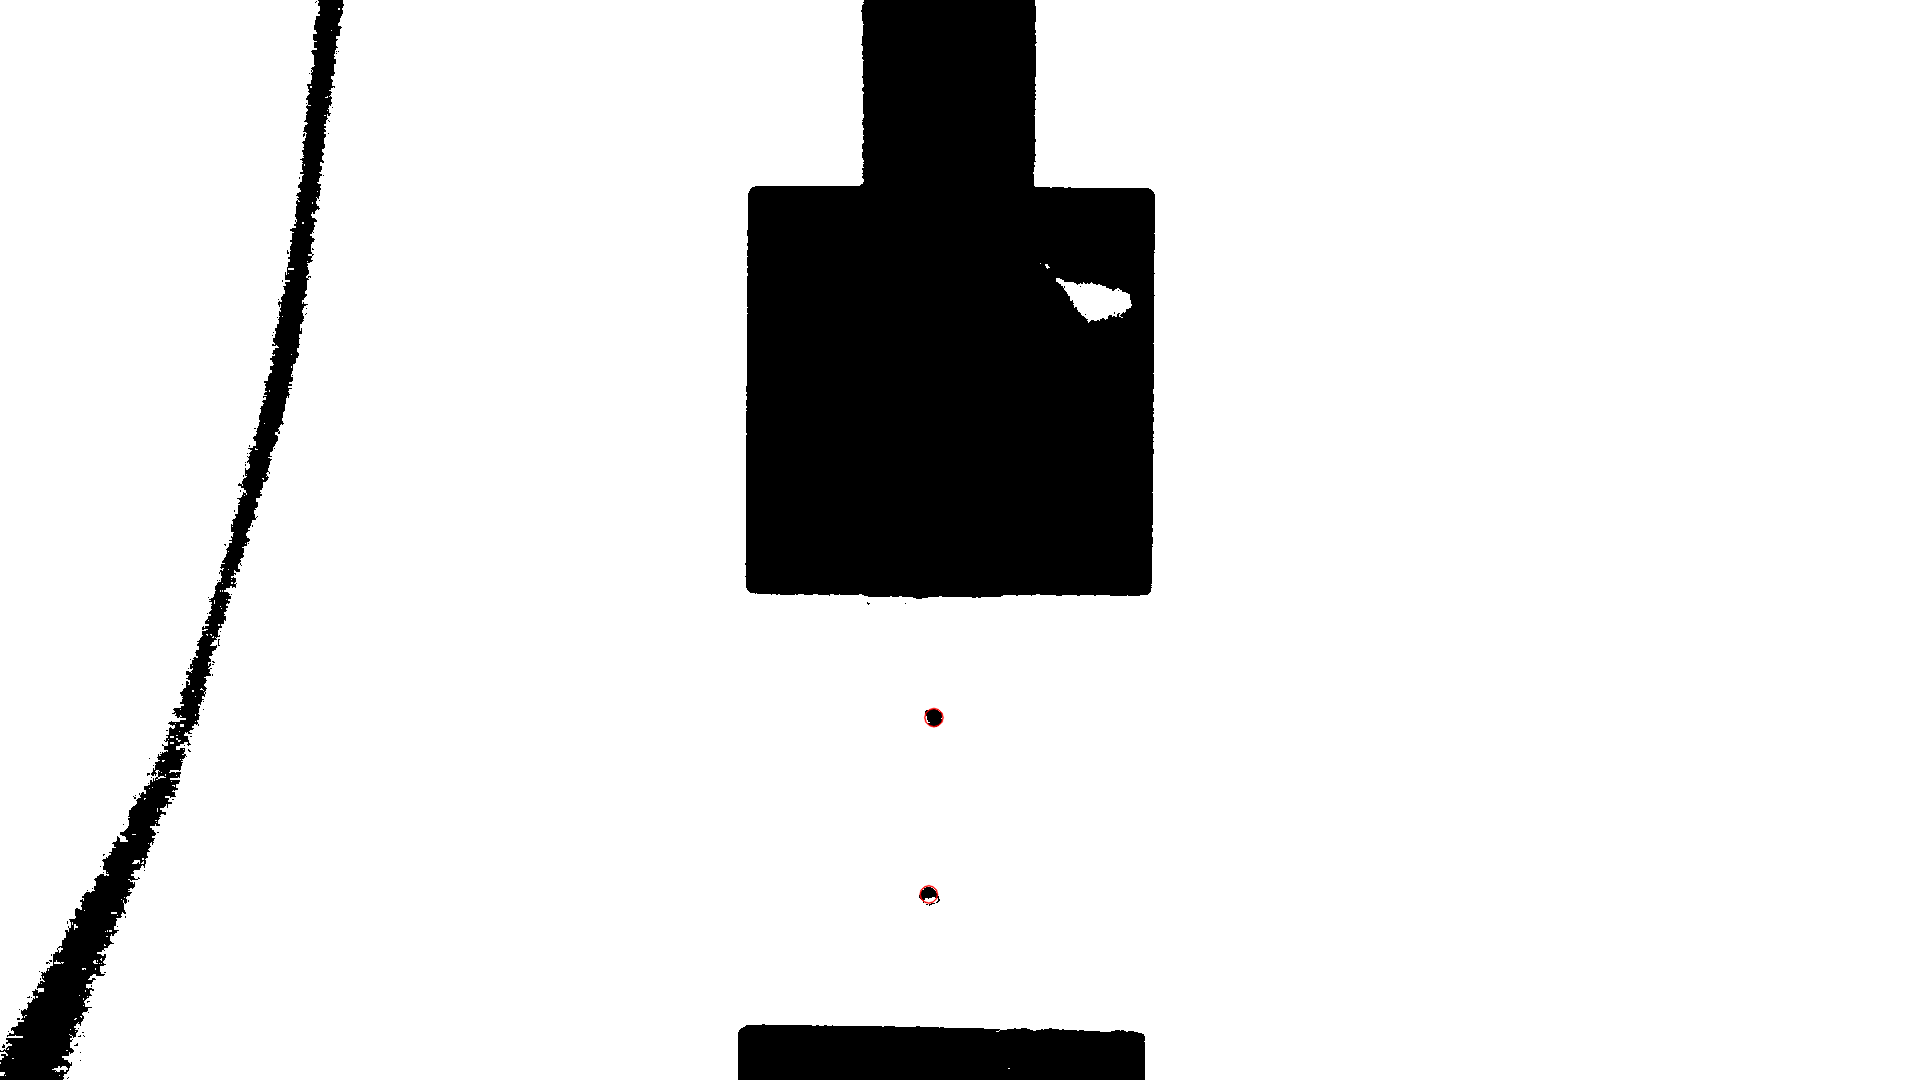

Read a new frame:  True
3


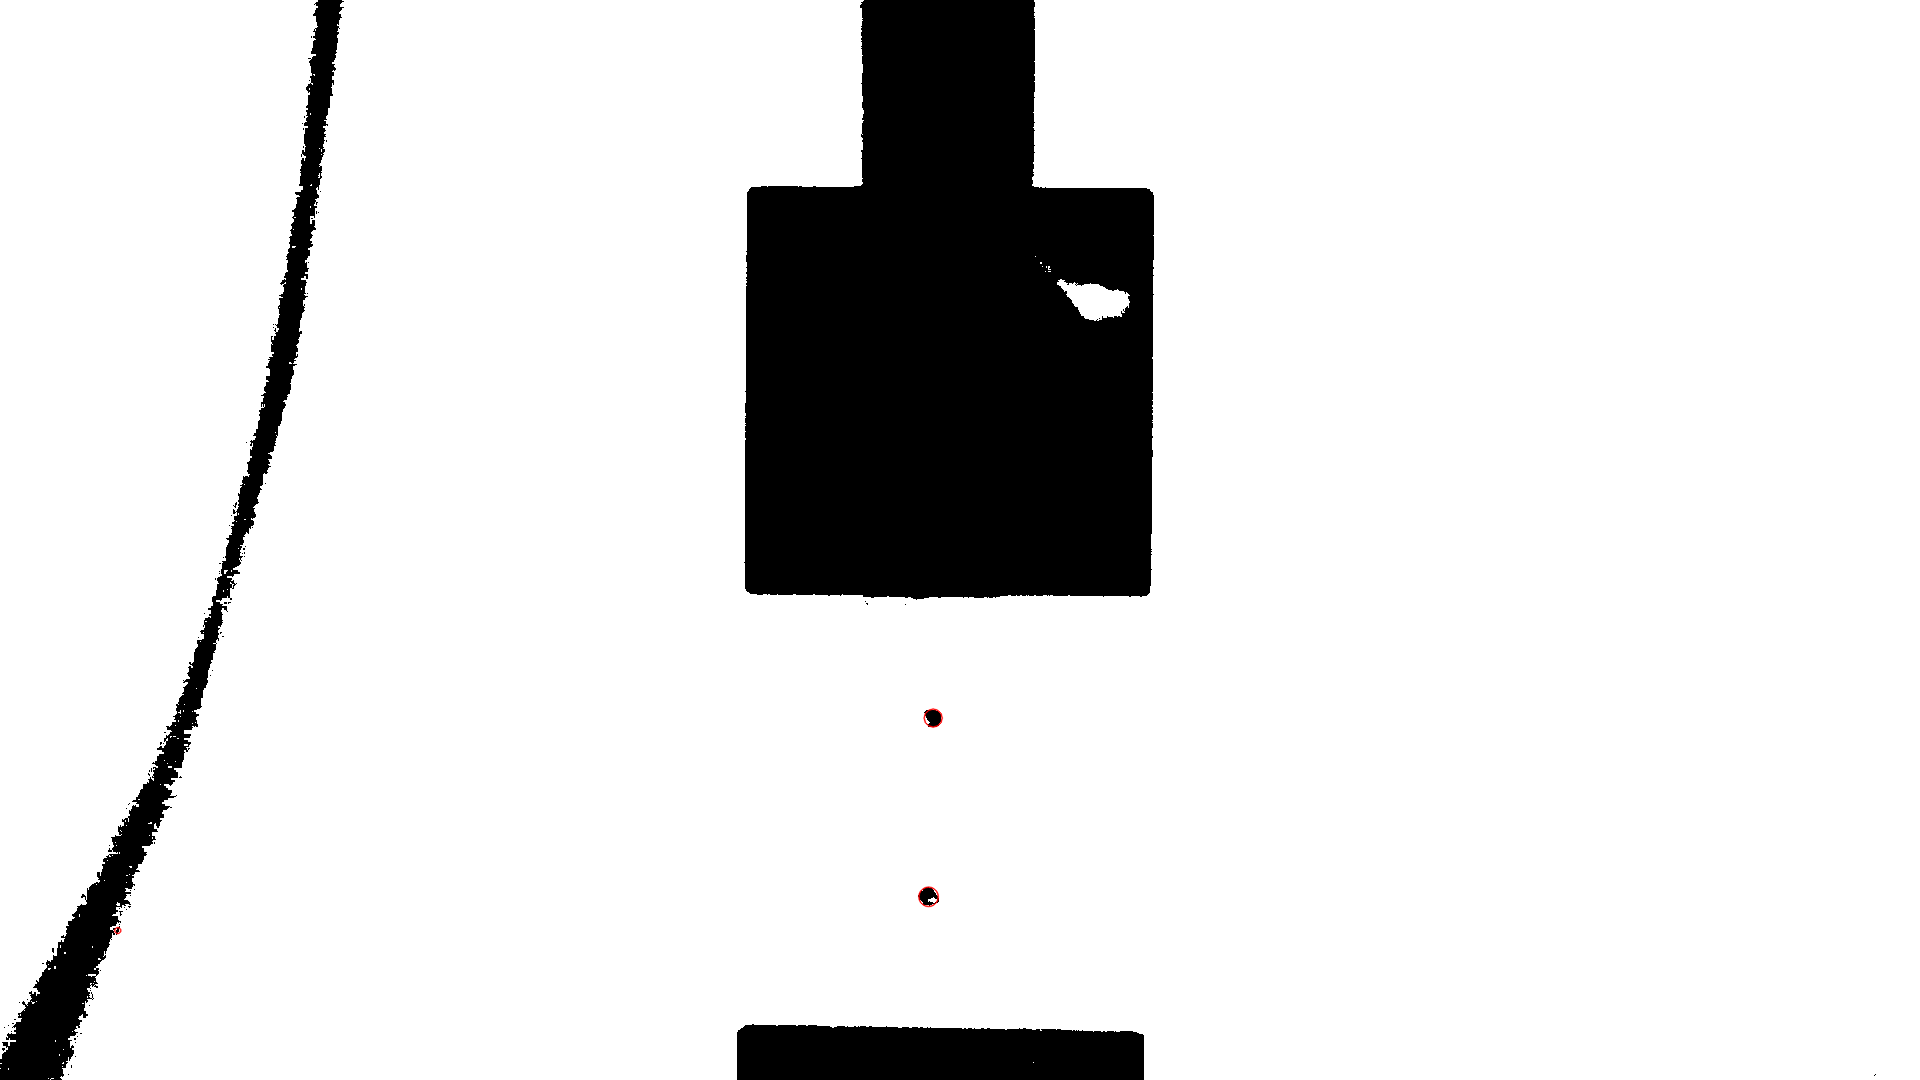

Read a new frame:  True
3


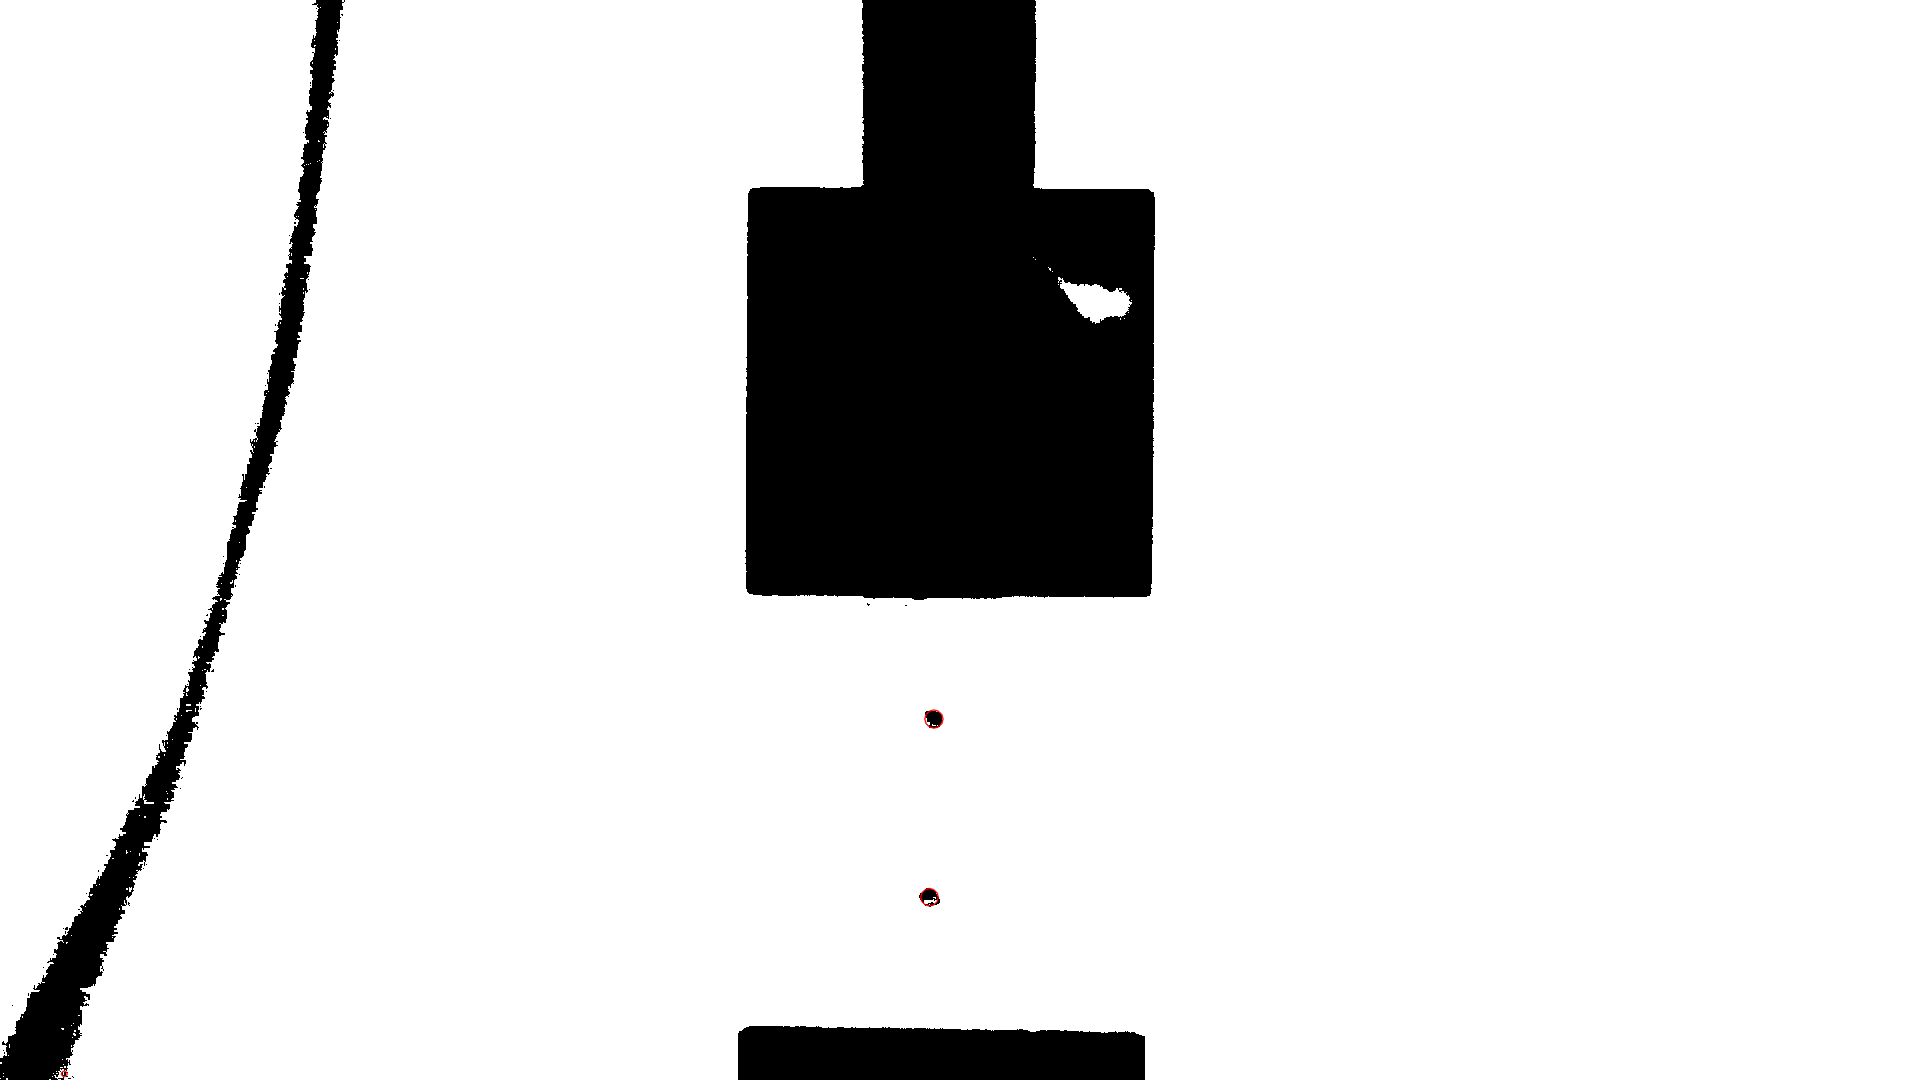

Read a new frame:  True
2


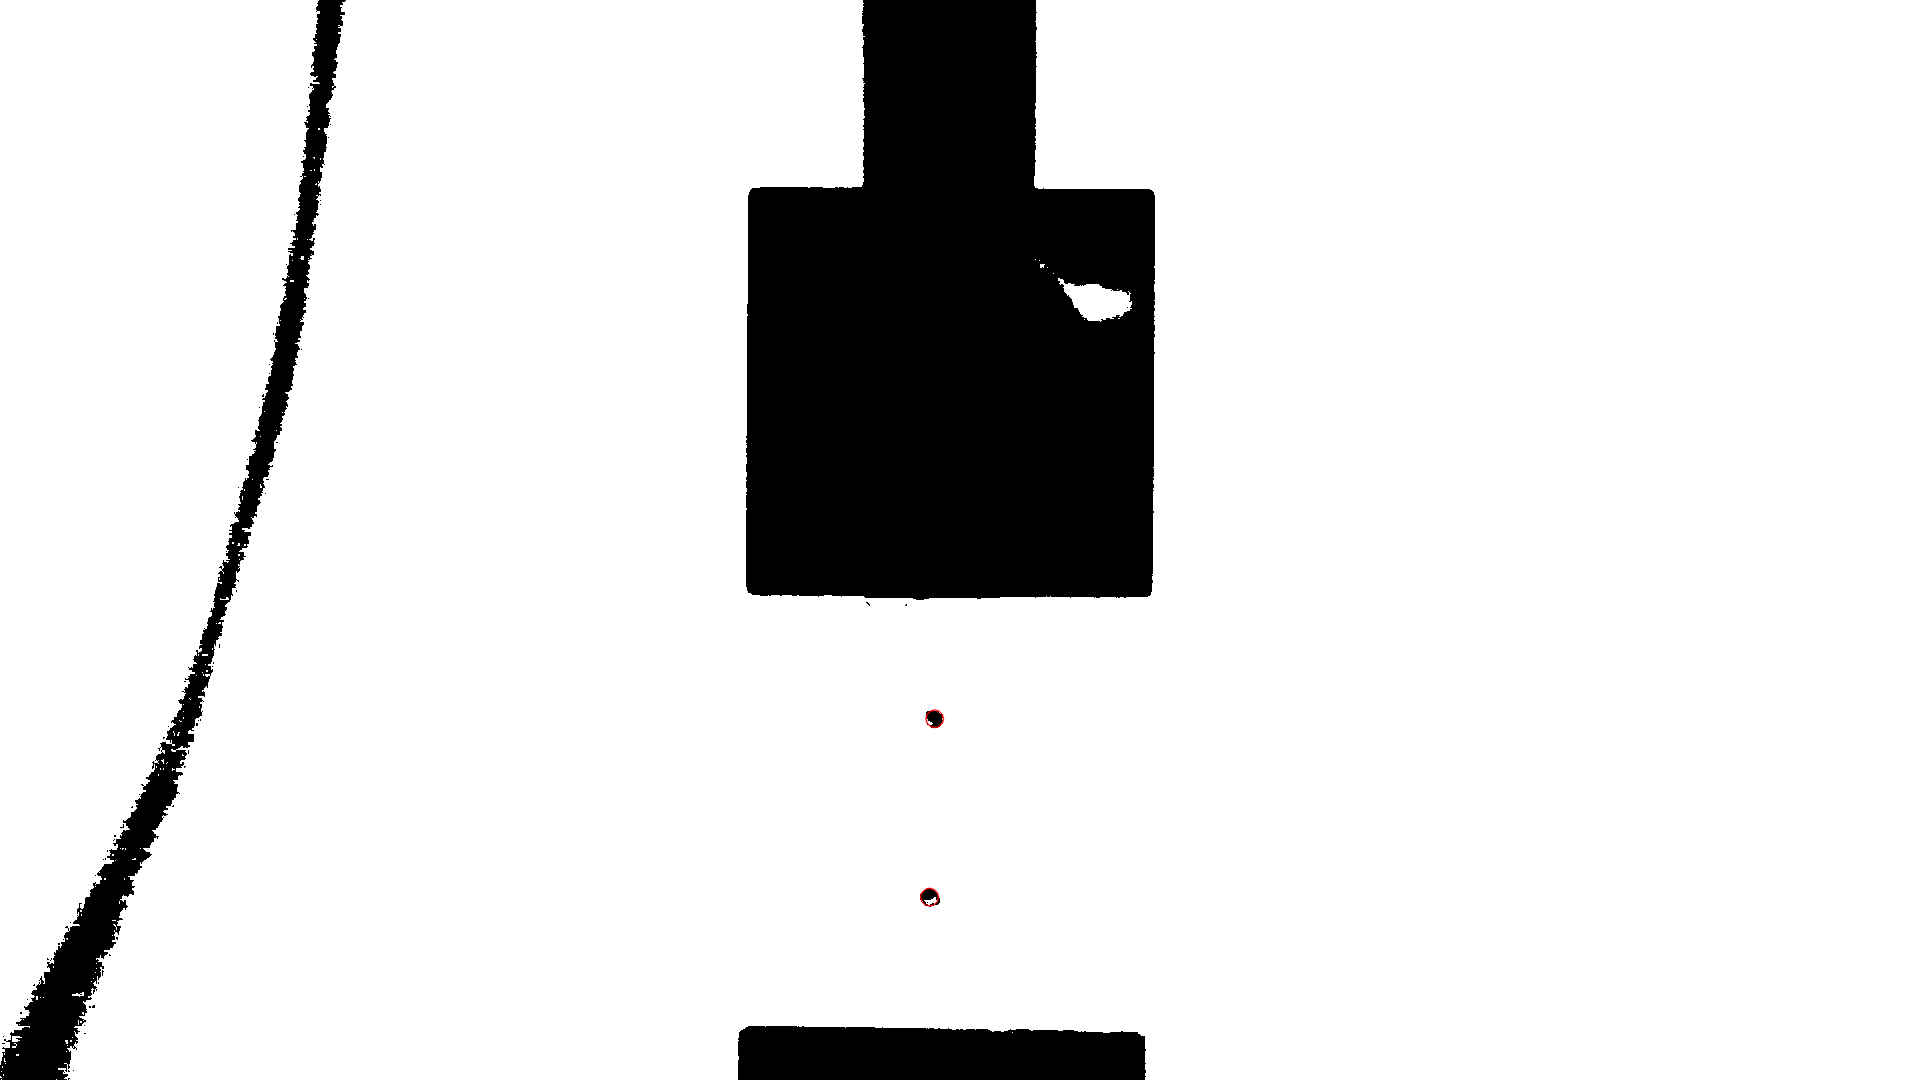

Read a new frame:  True
3


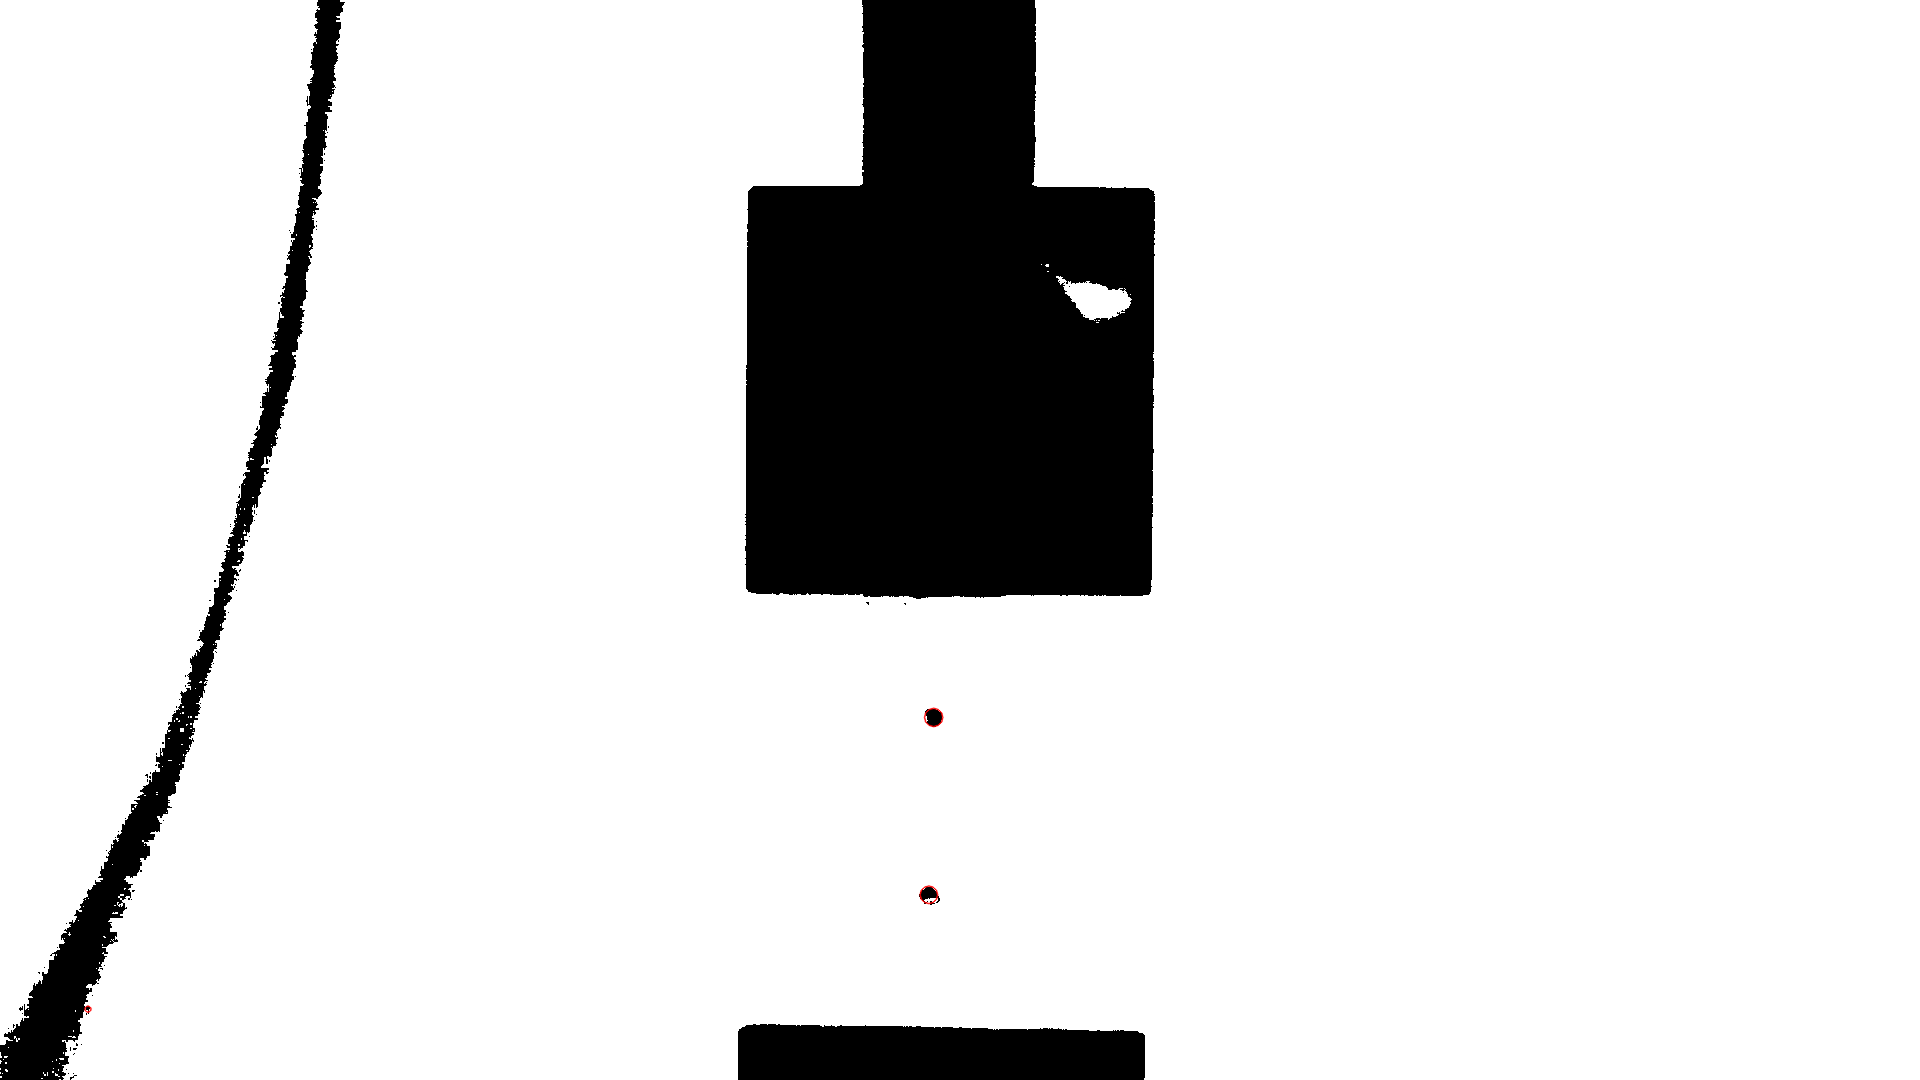

Read a new frame:  True
2


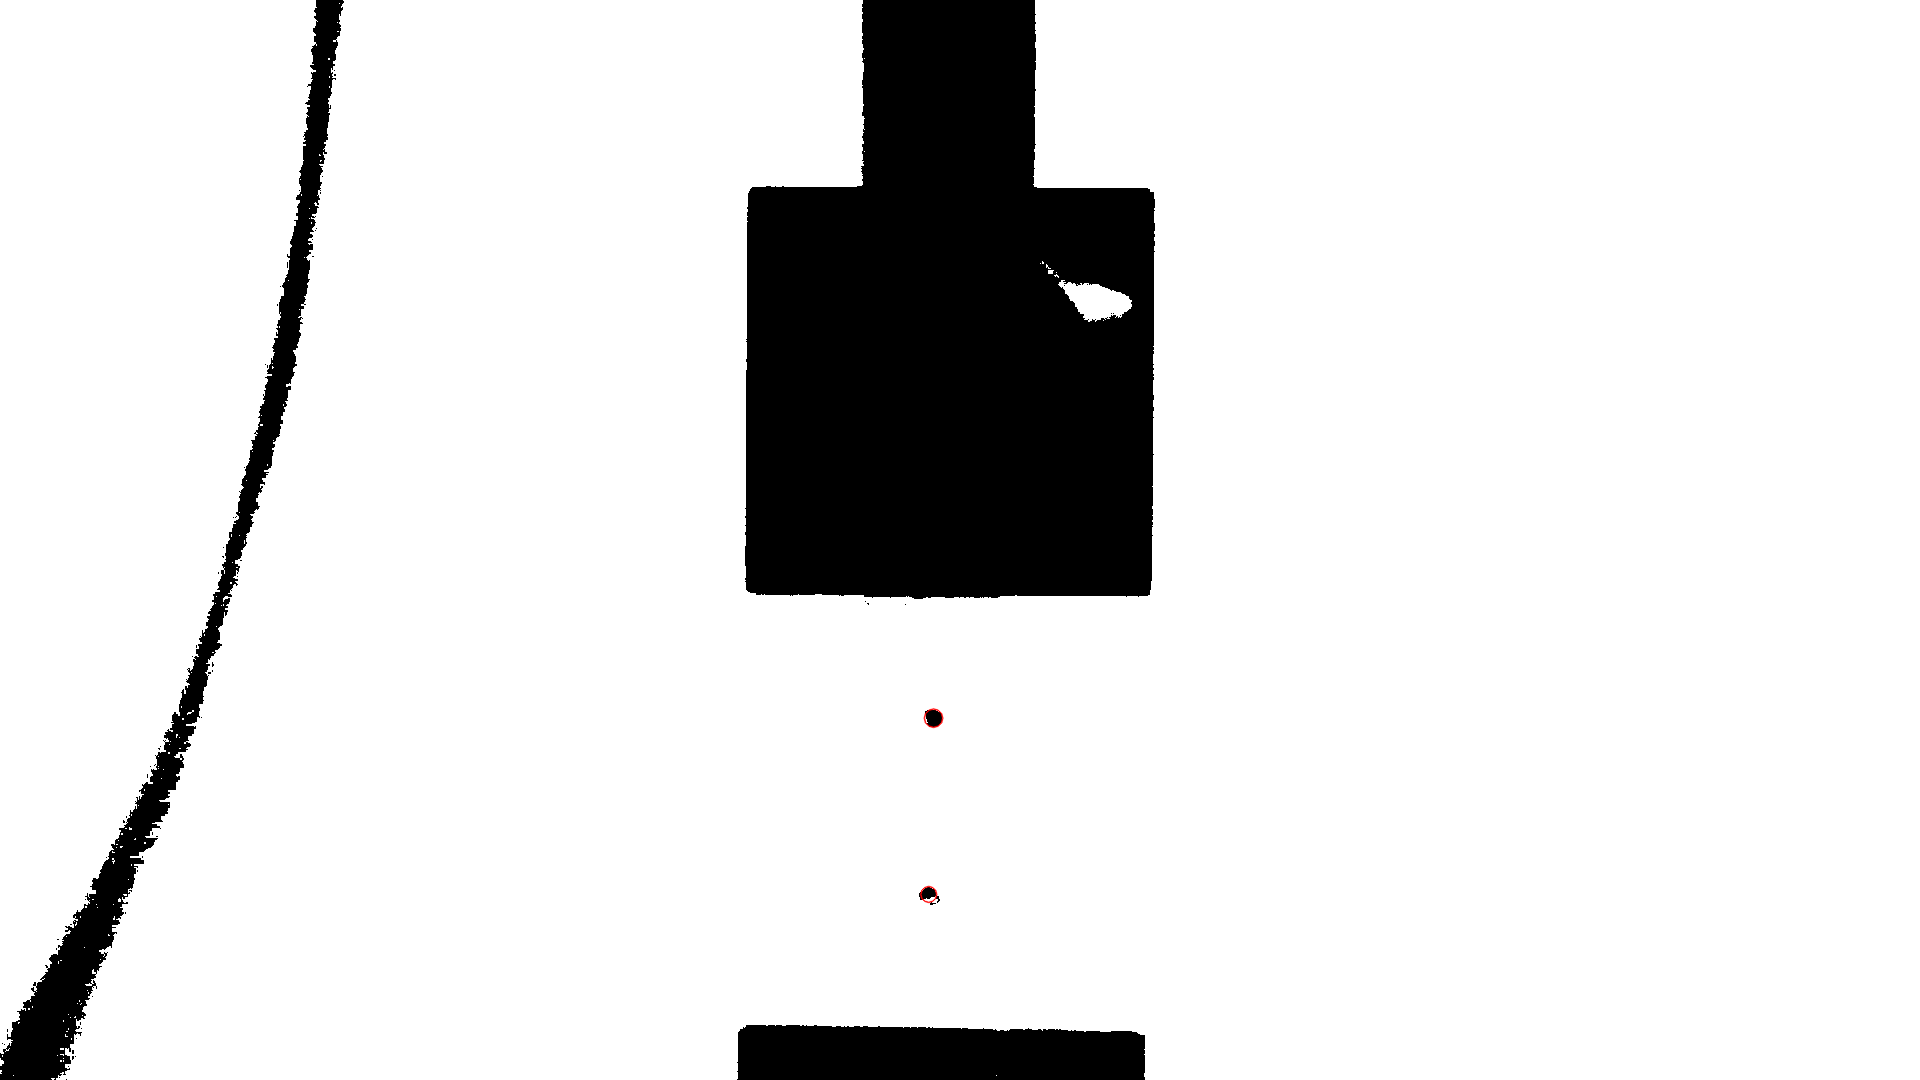

Read a new frame:  True
2


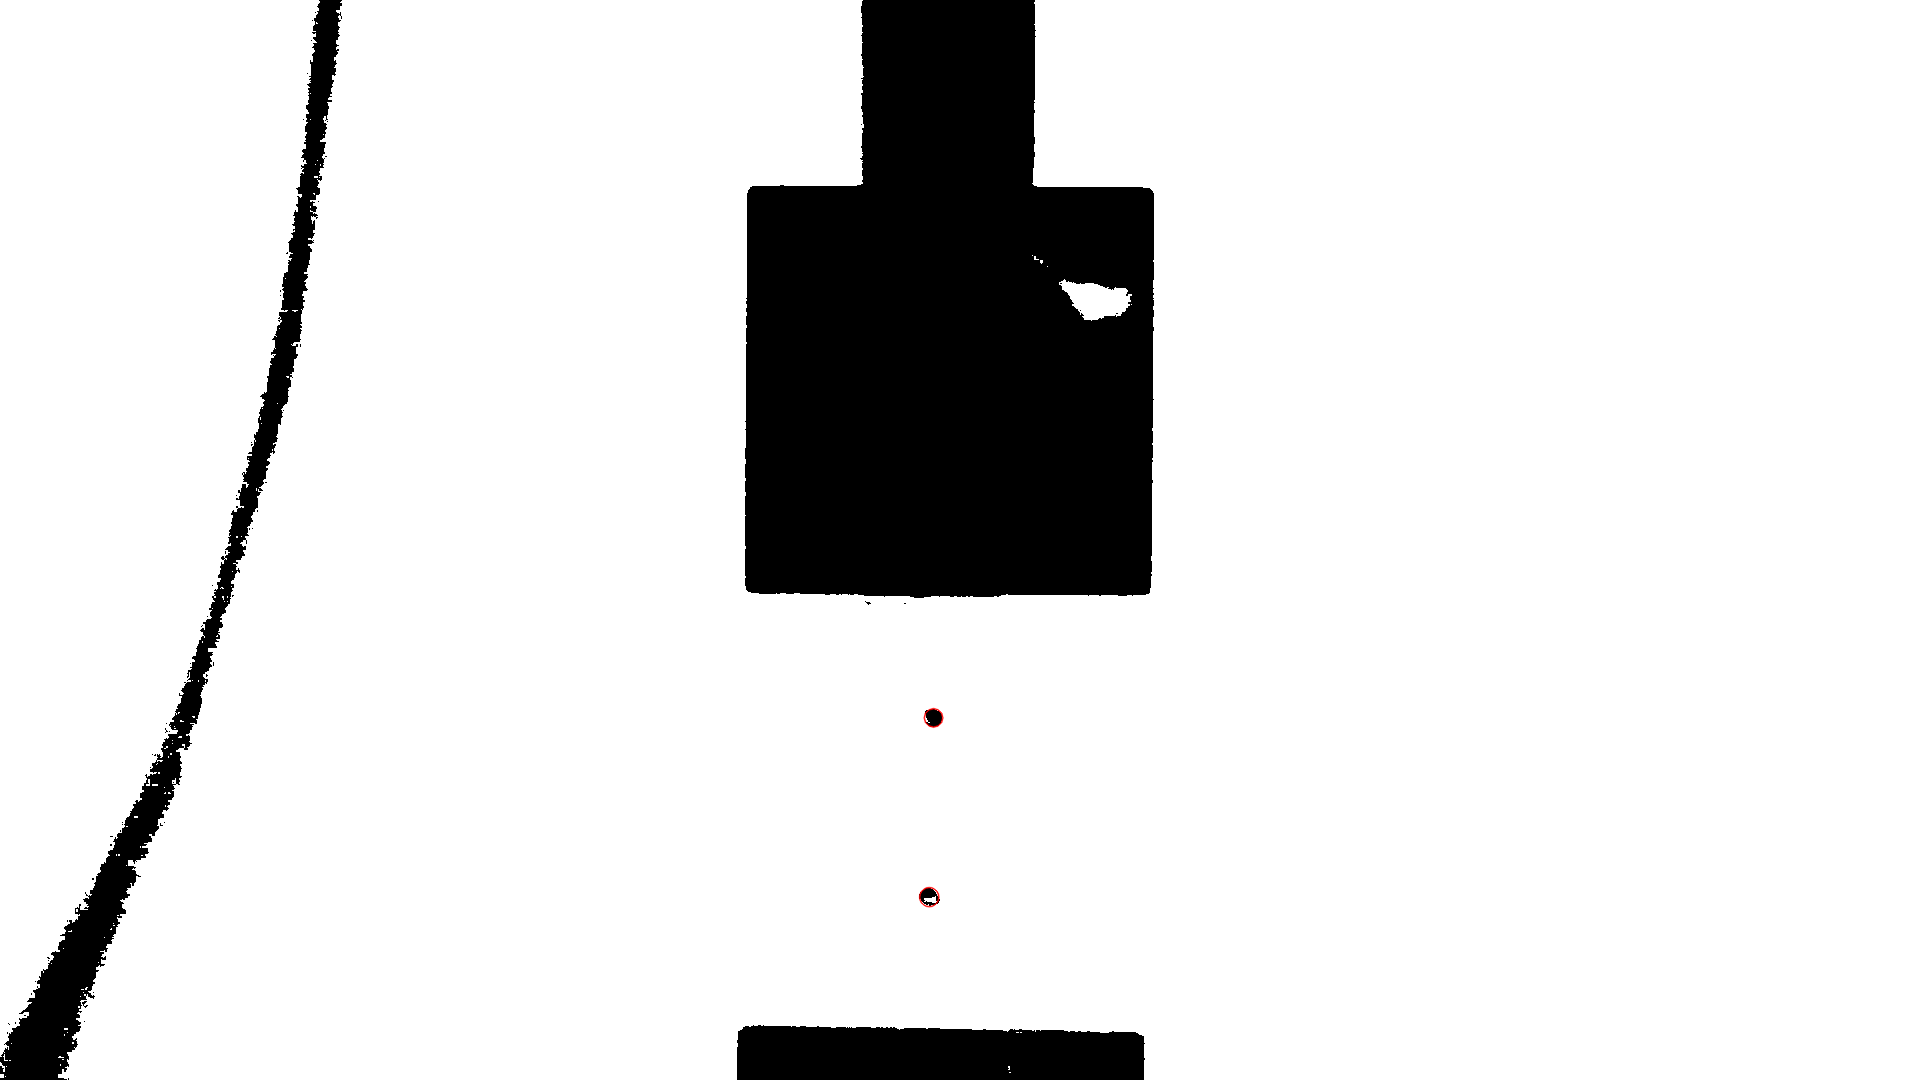

Read a new frame:  True
2


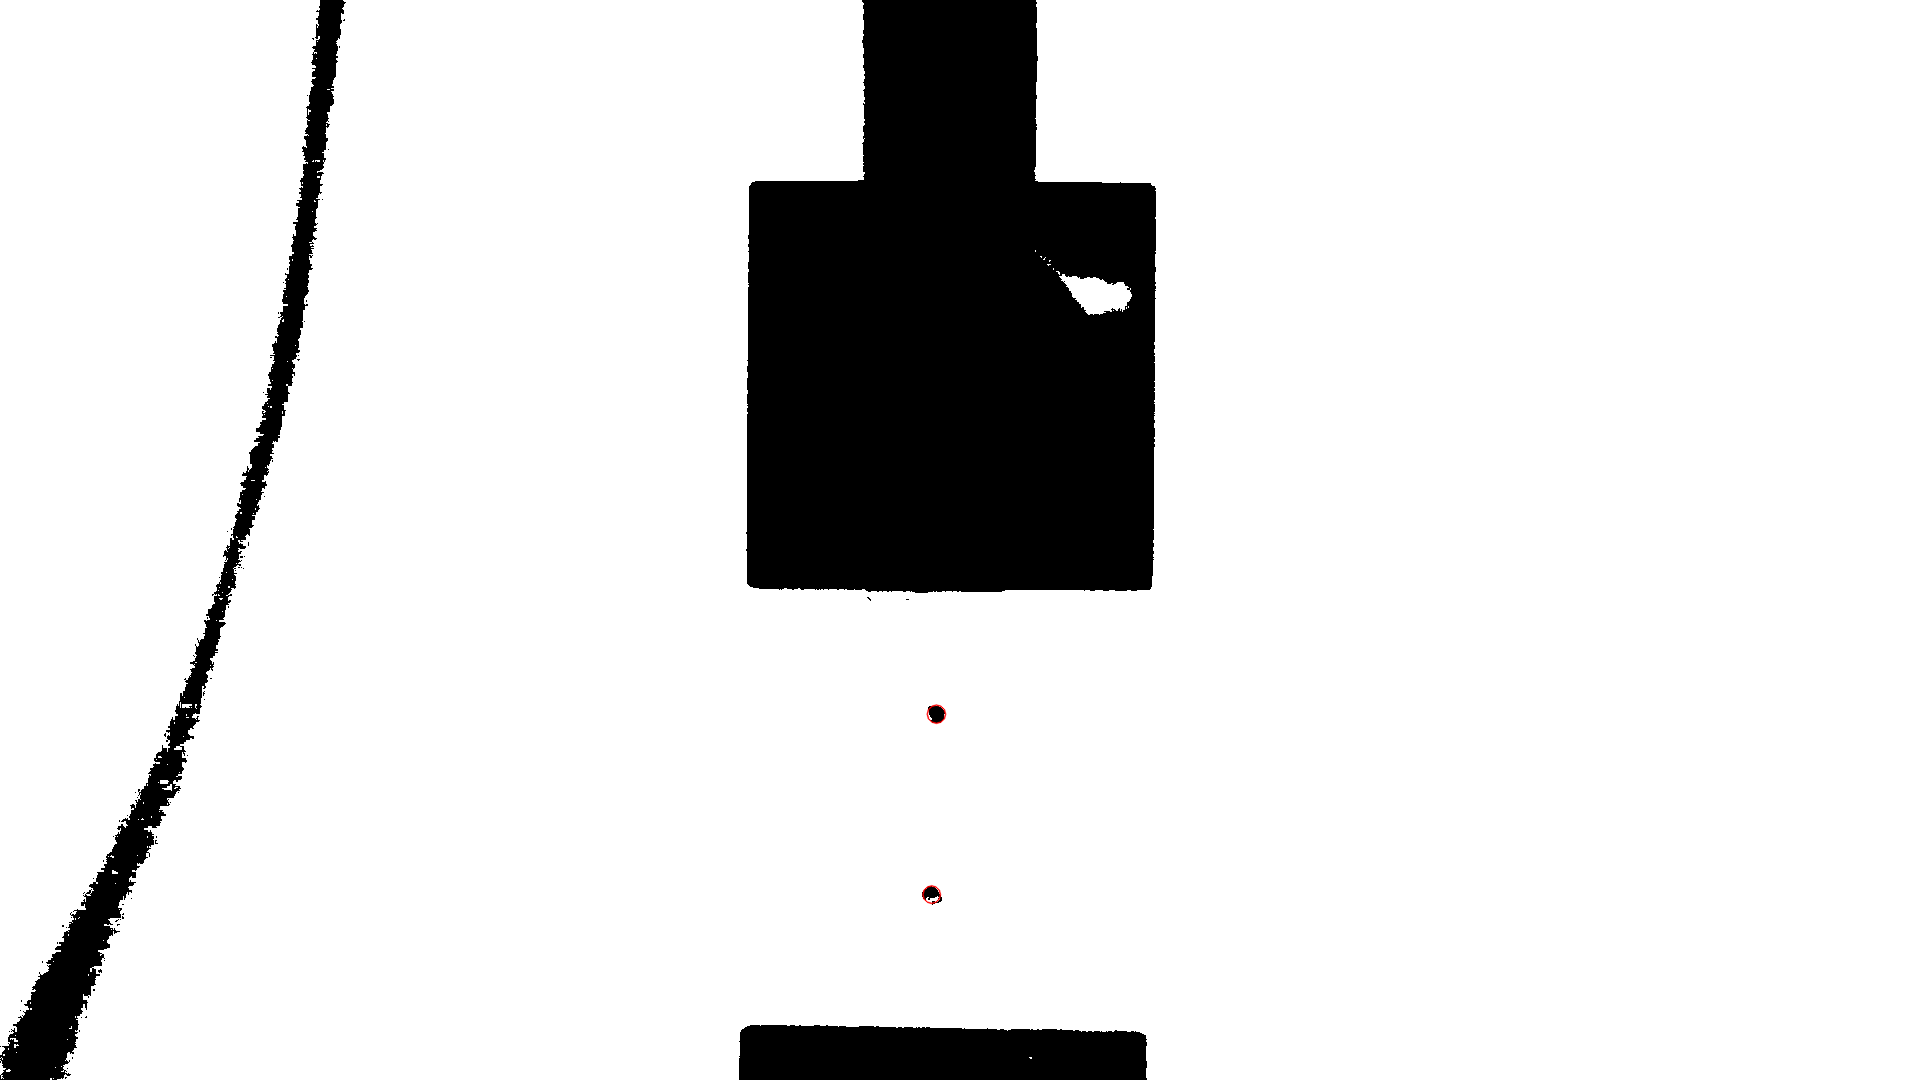

Read a new frame:  True
2


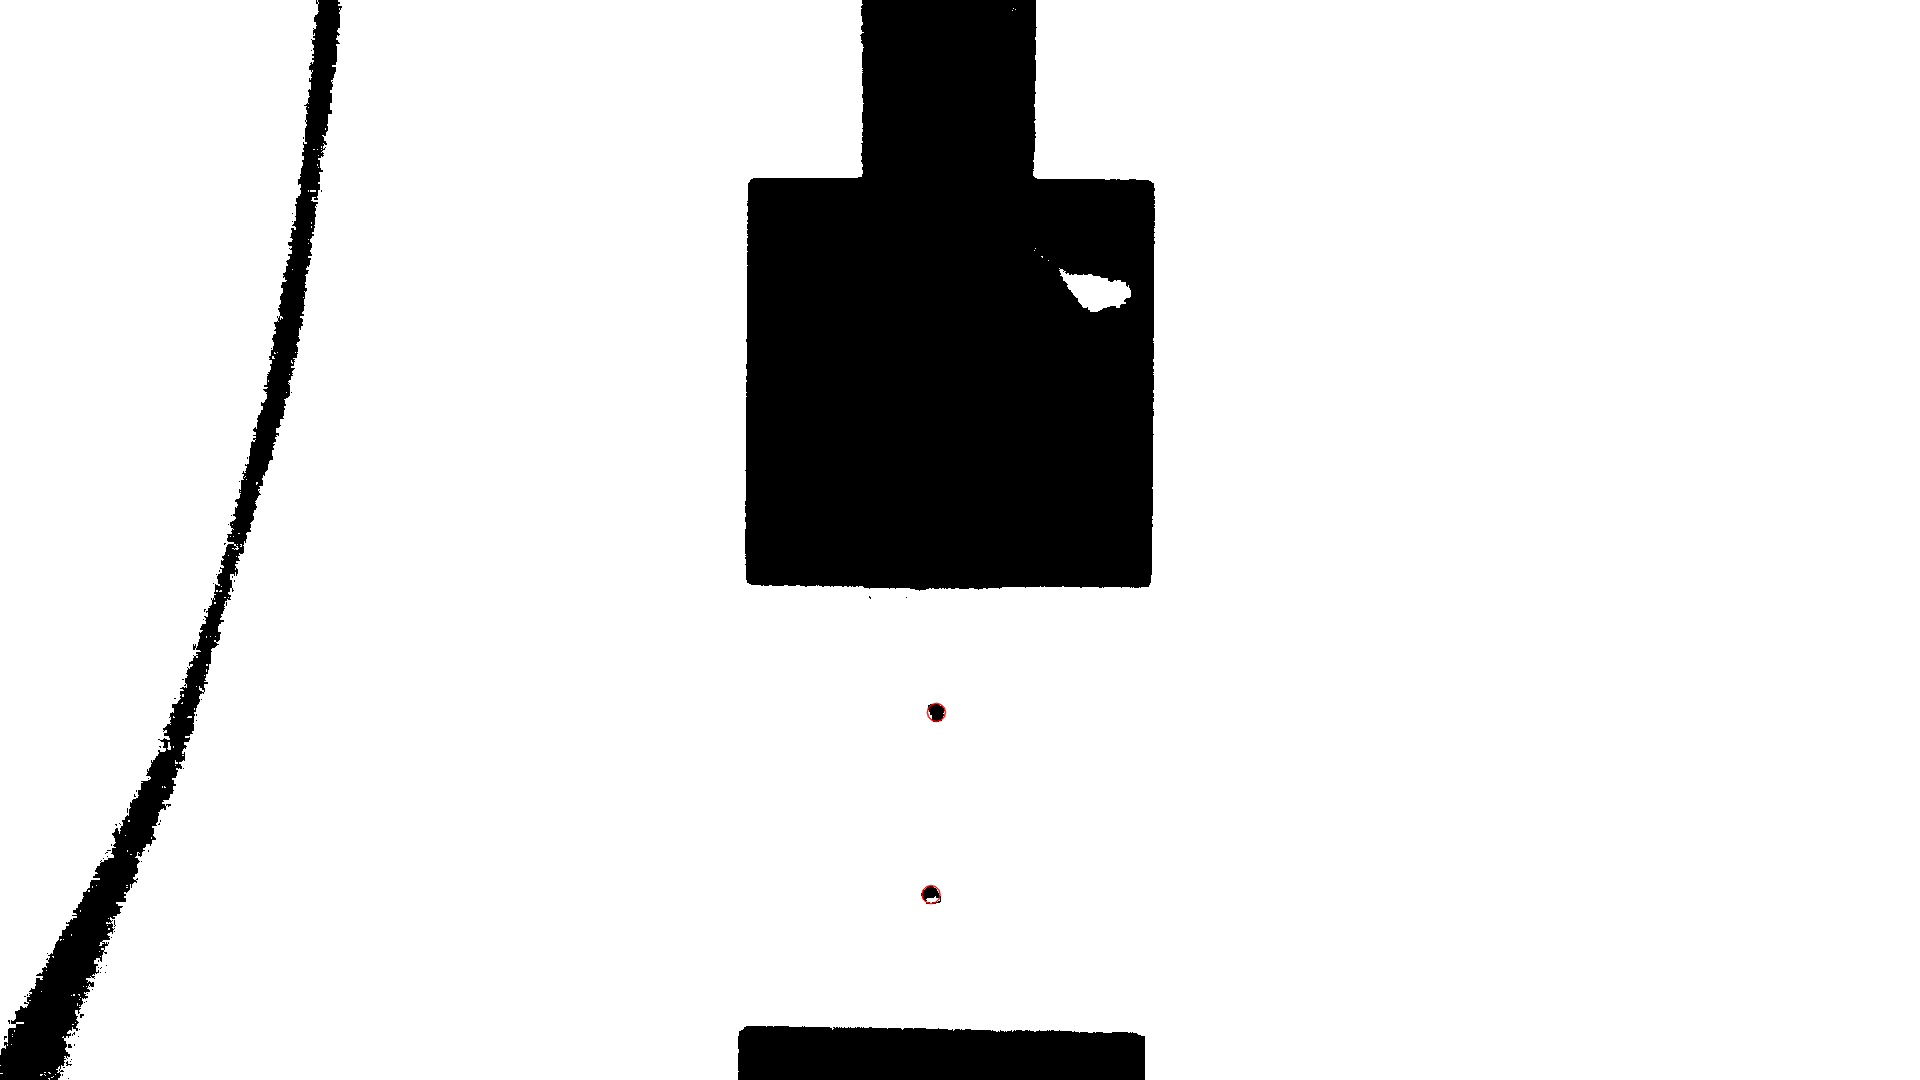

Read a new frame:  True
2


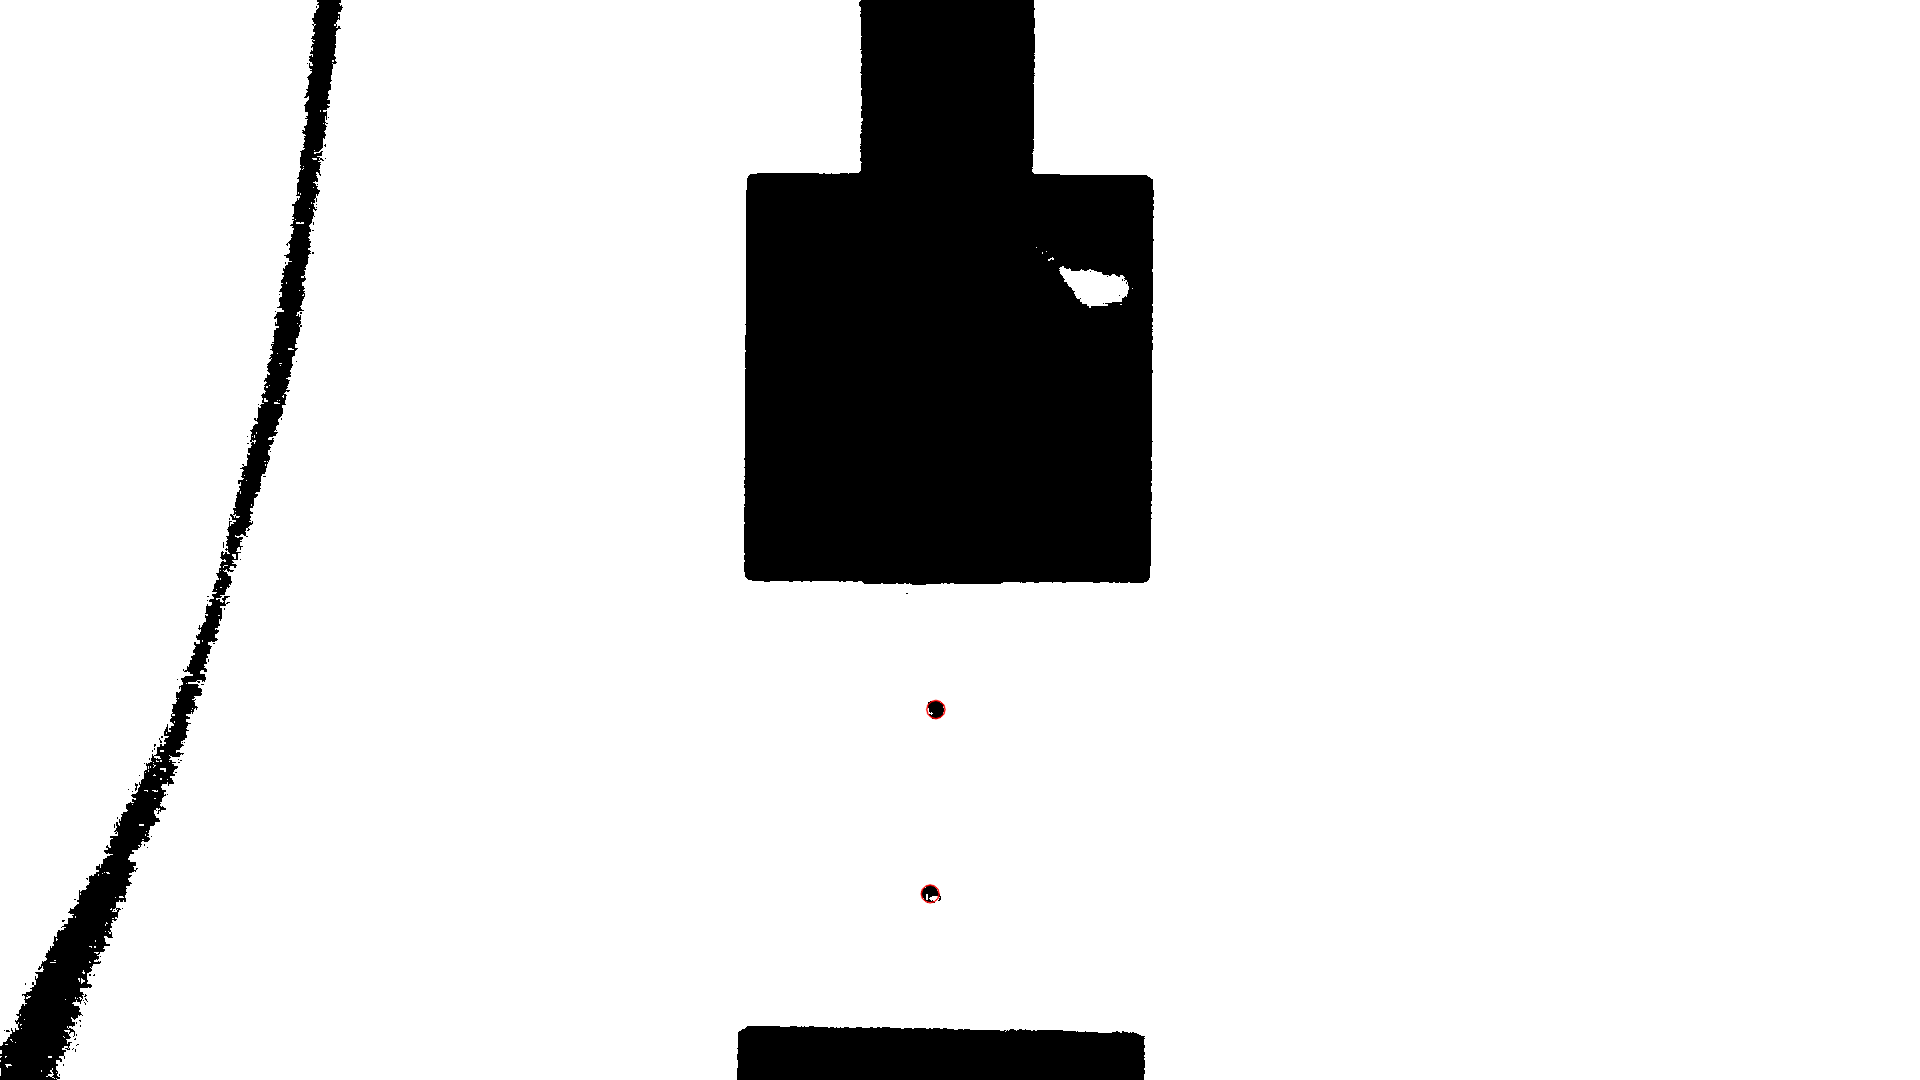

Read a new frame:  True
2


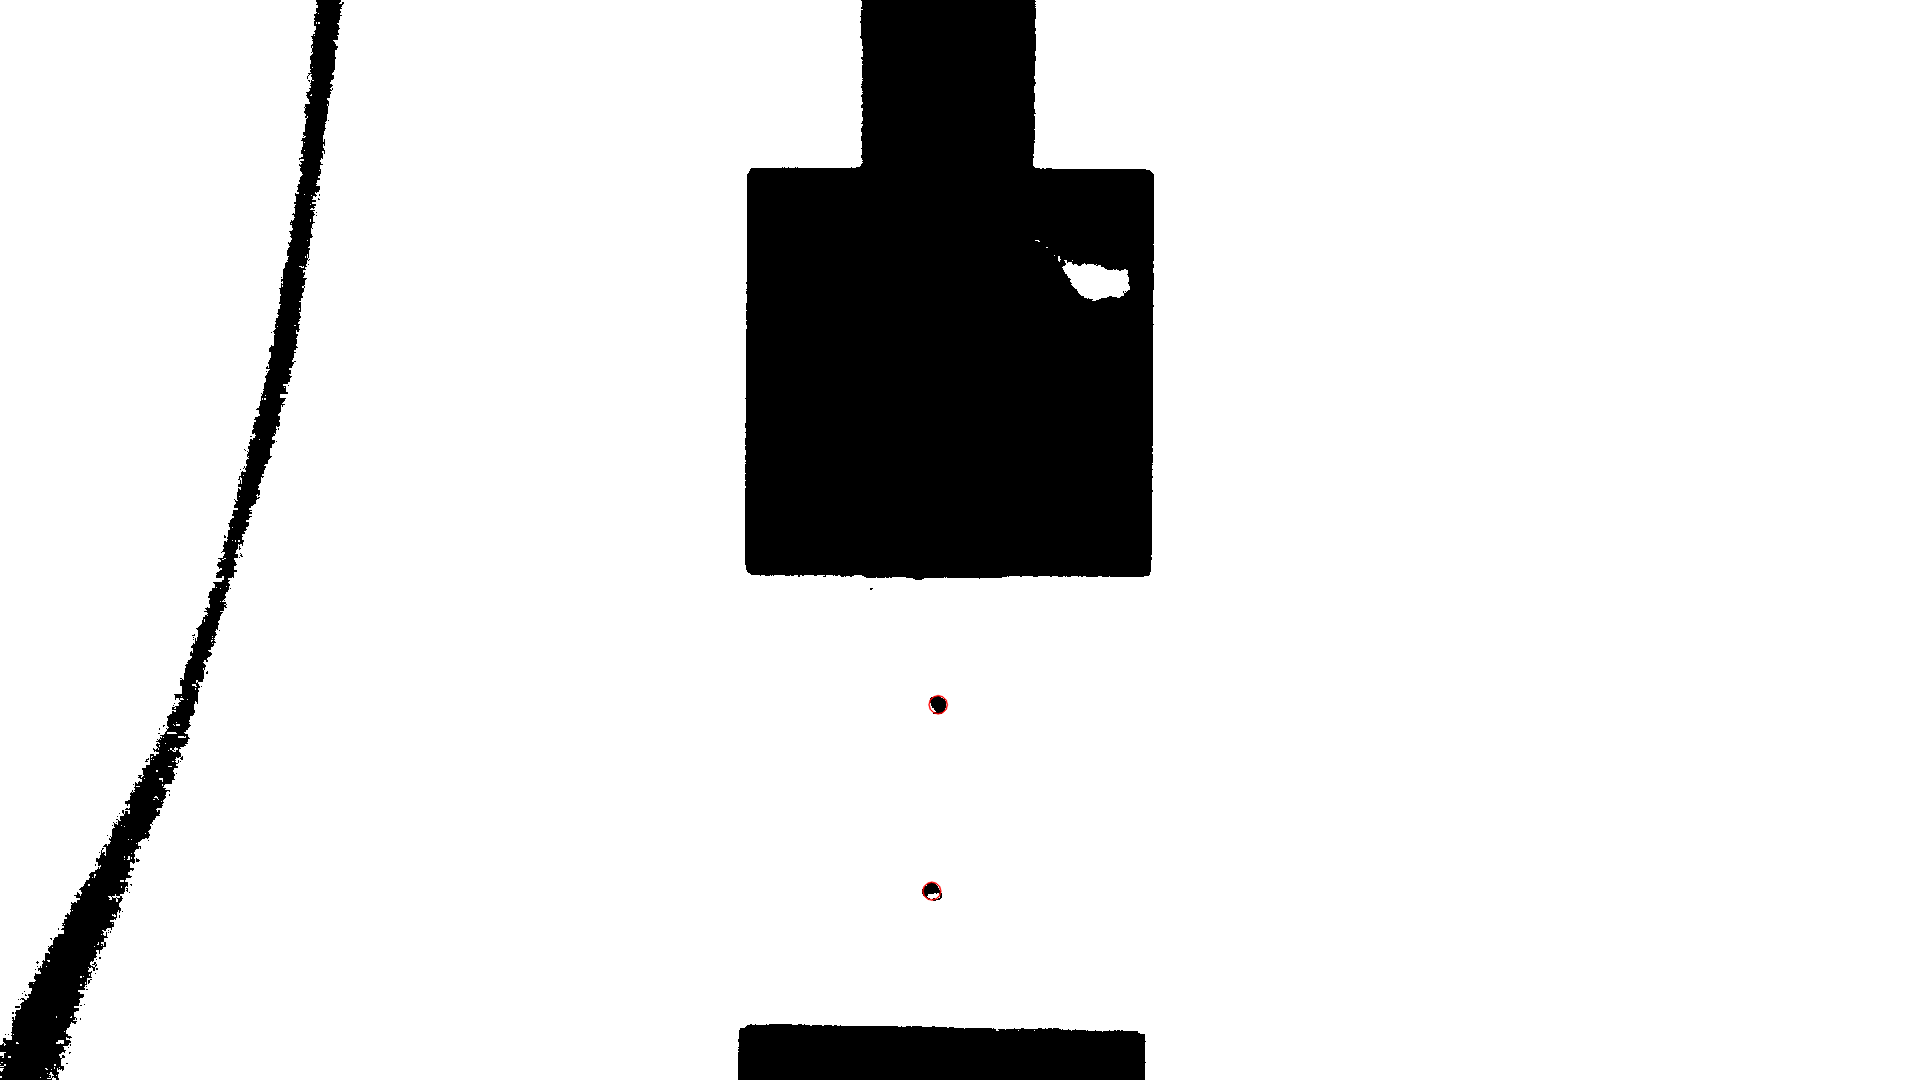

Read a new frame:  True
2


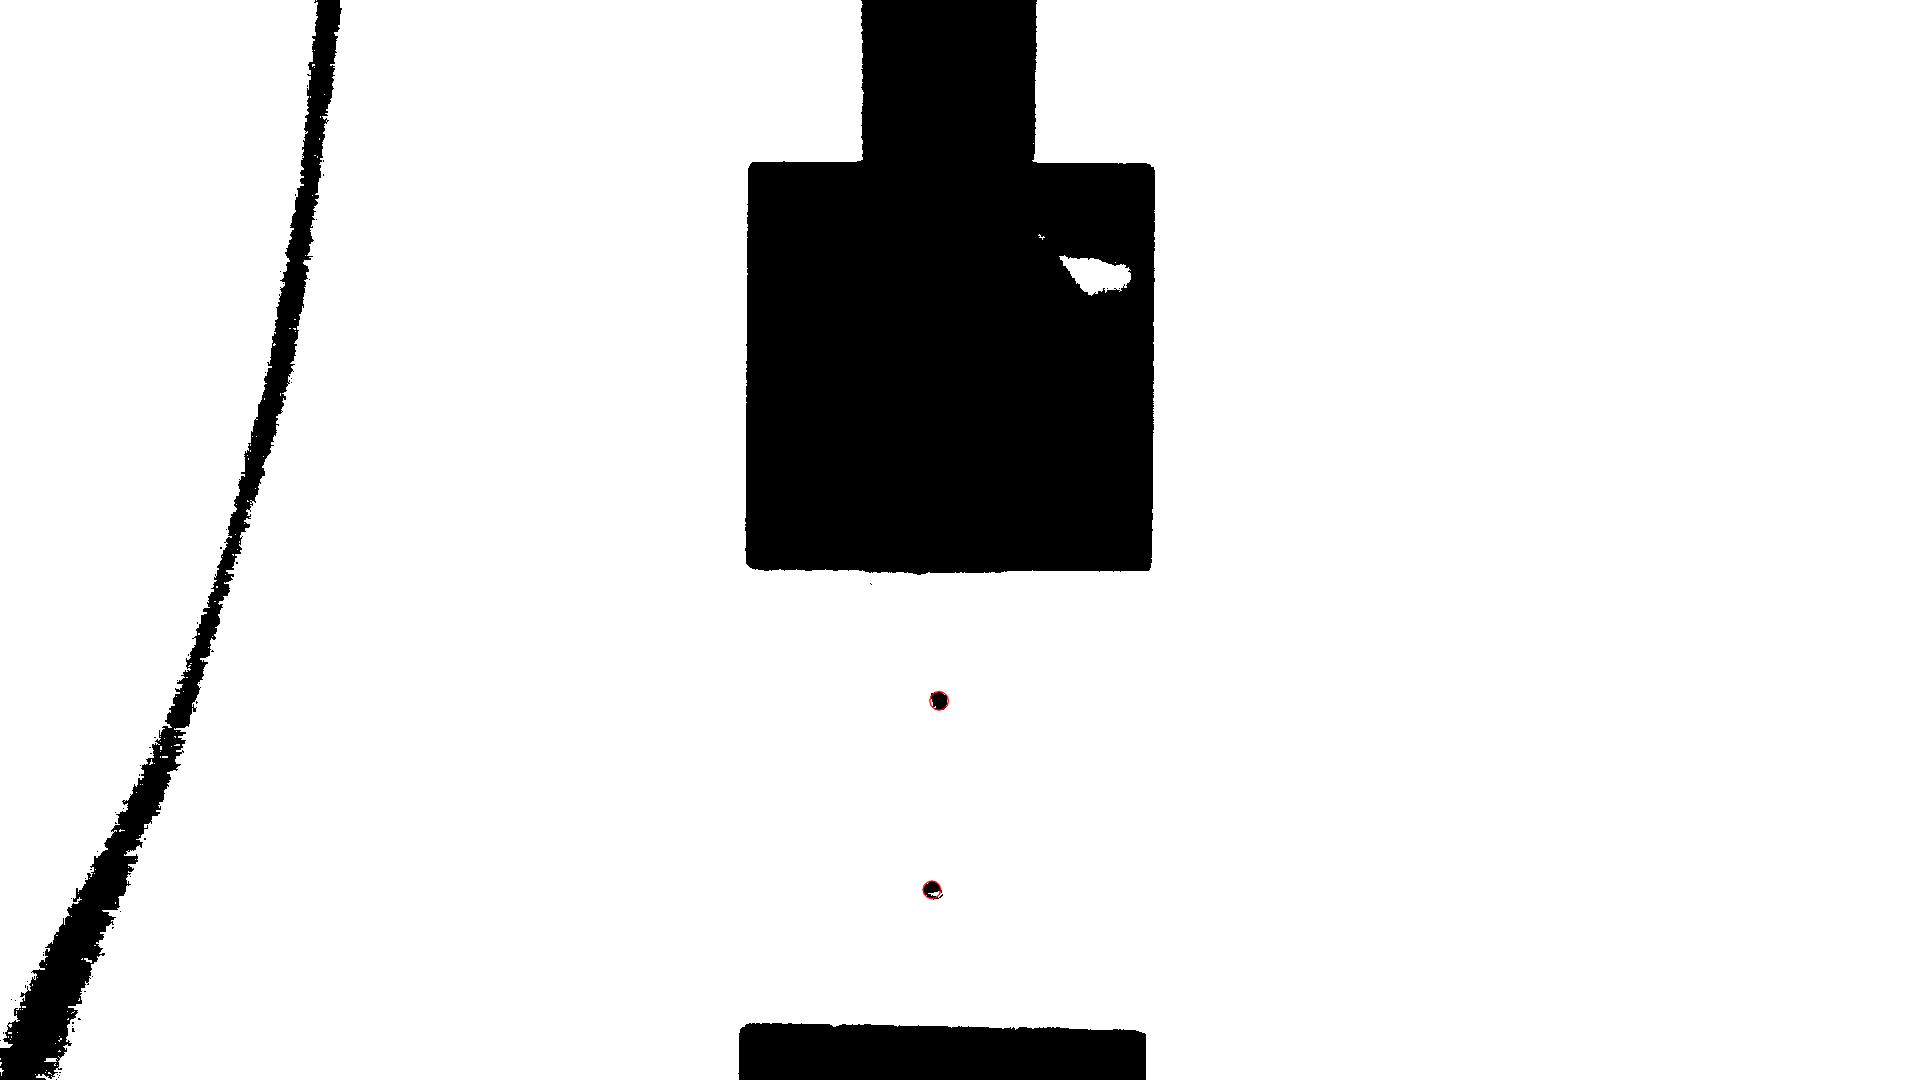

Read a new frame:  True
3


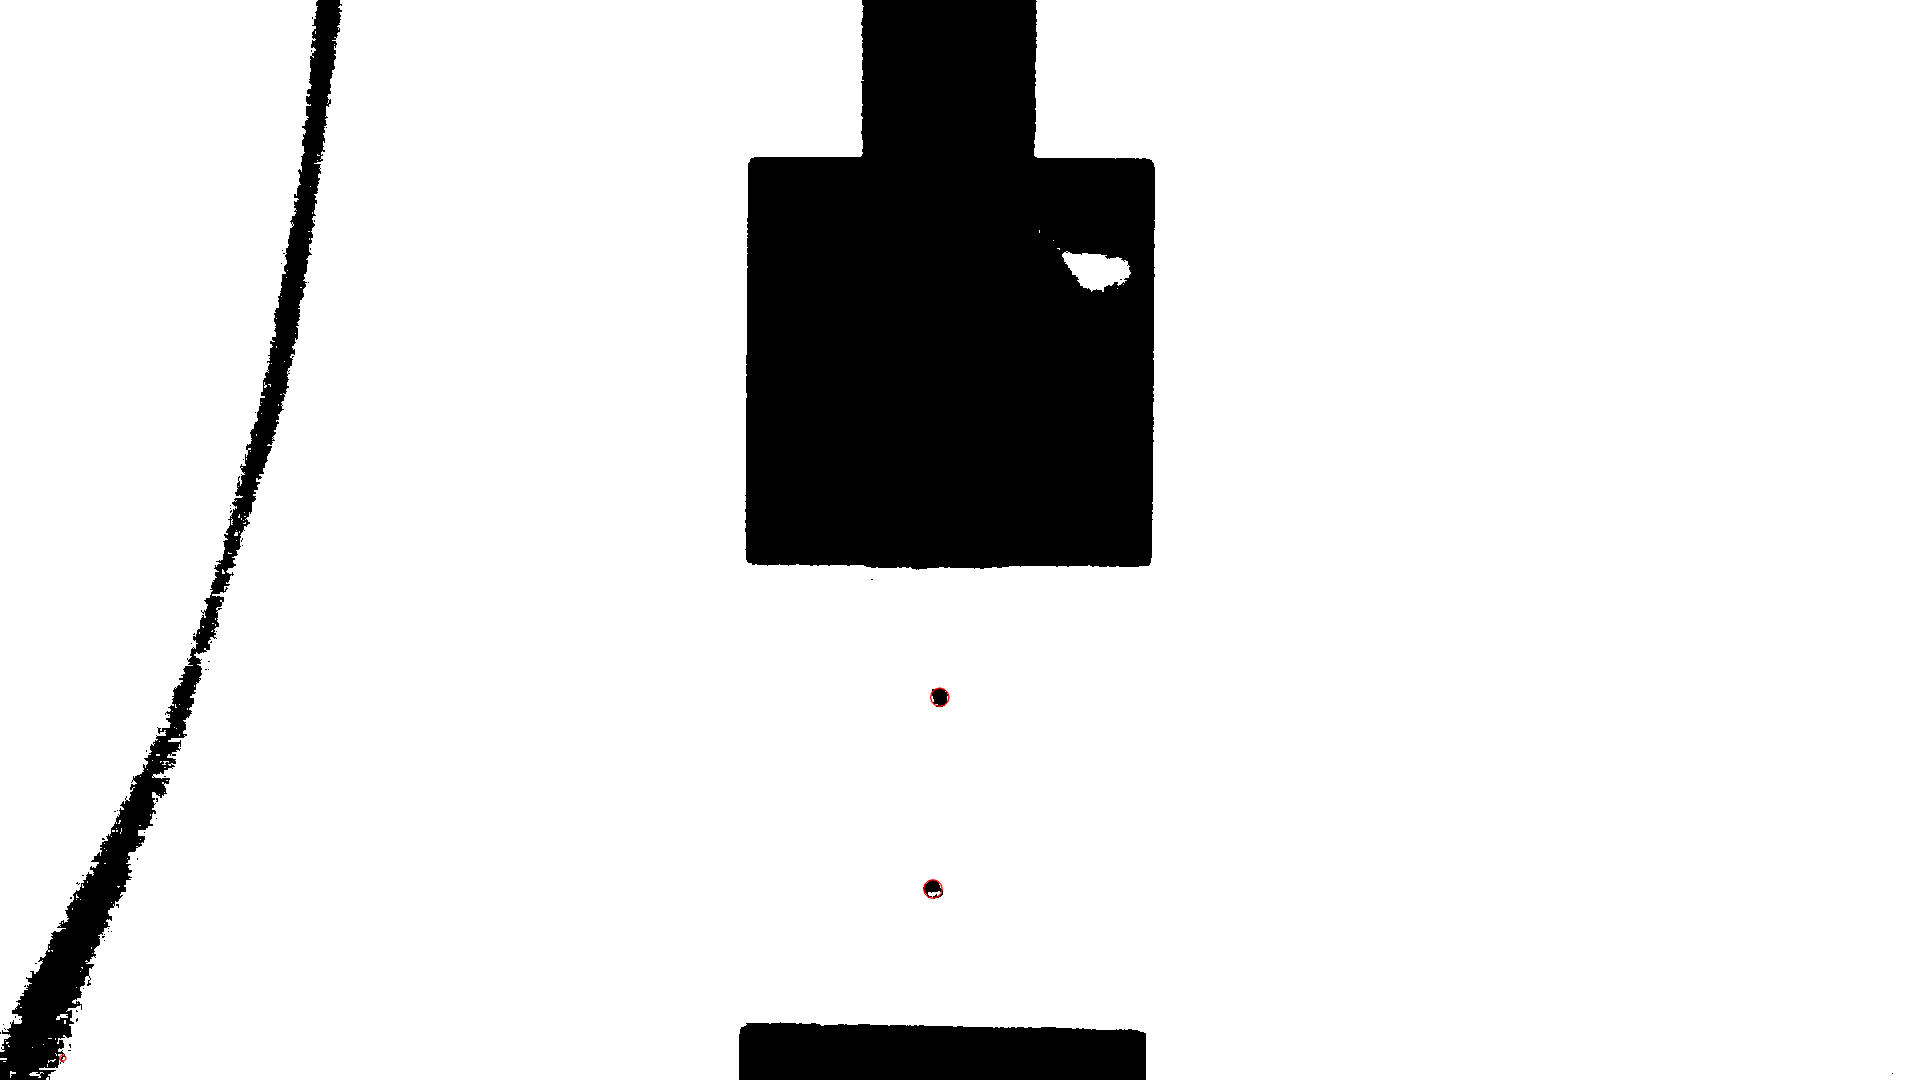

Read a new frame:  True
3


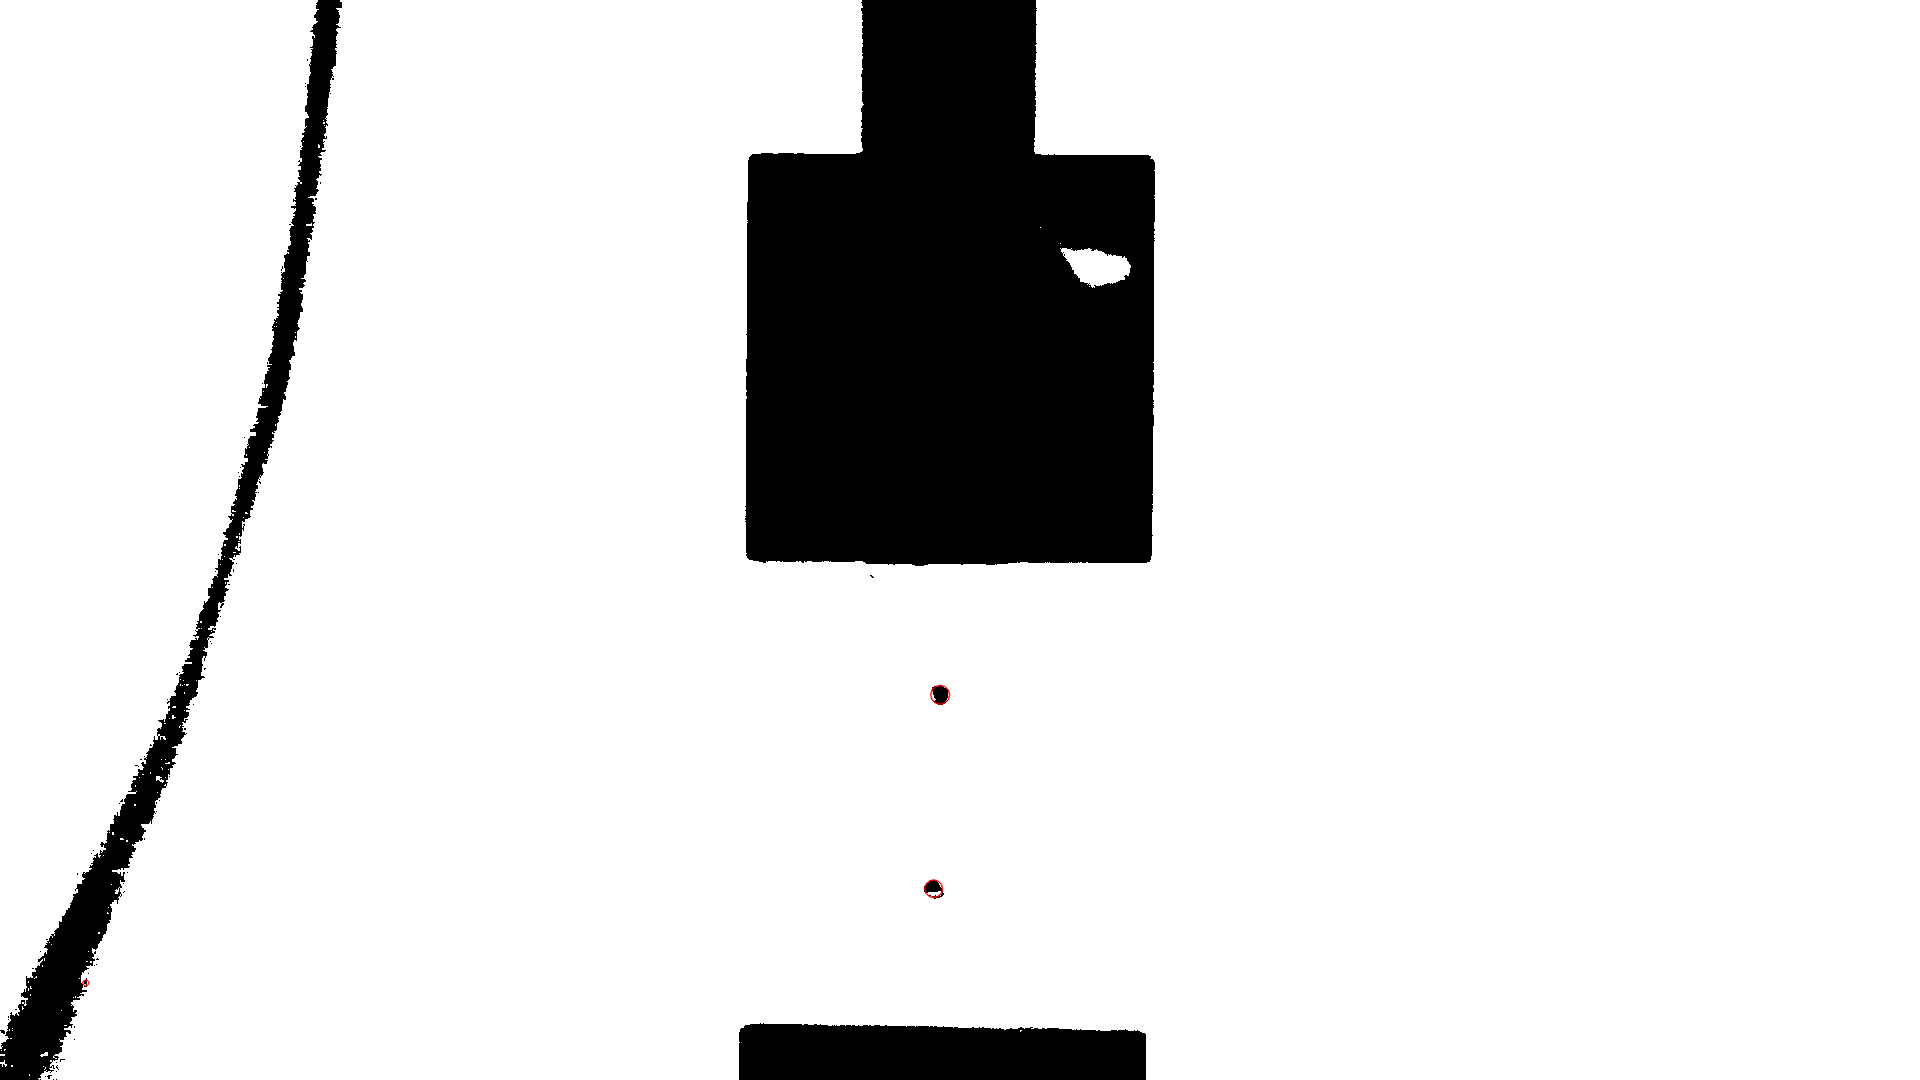

Read a new frame:  True
3


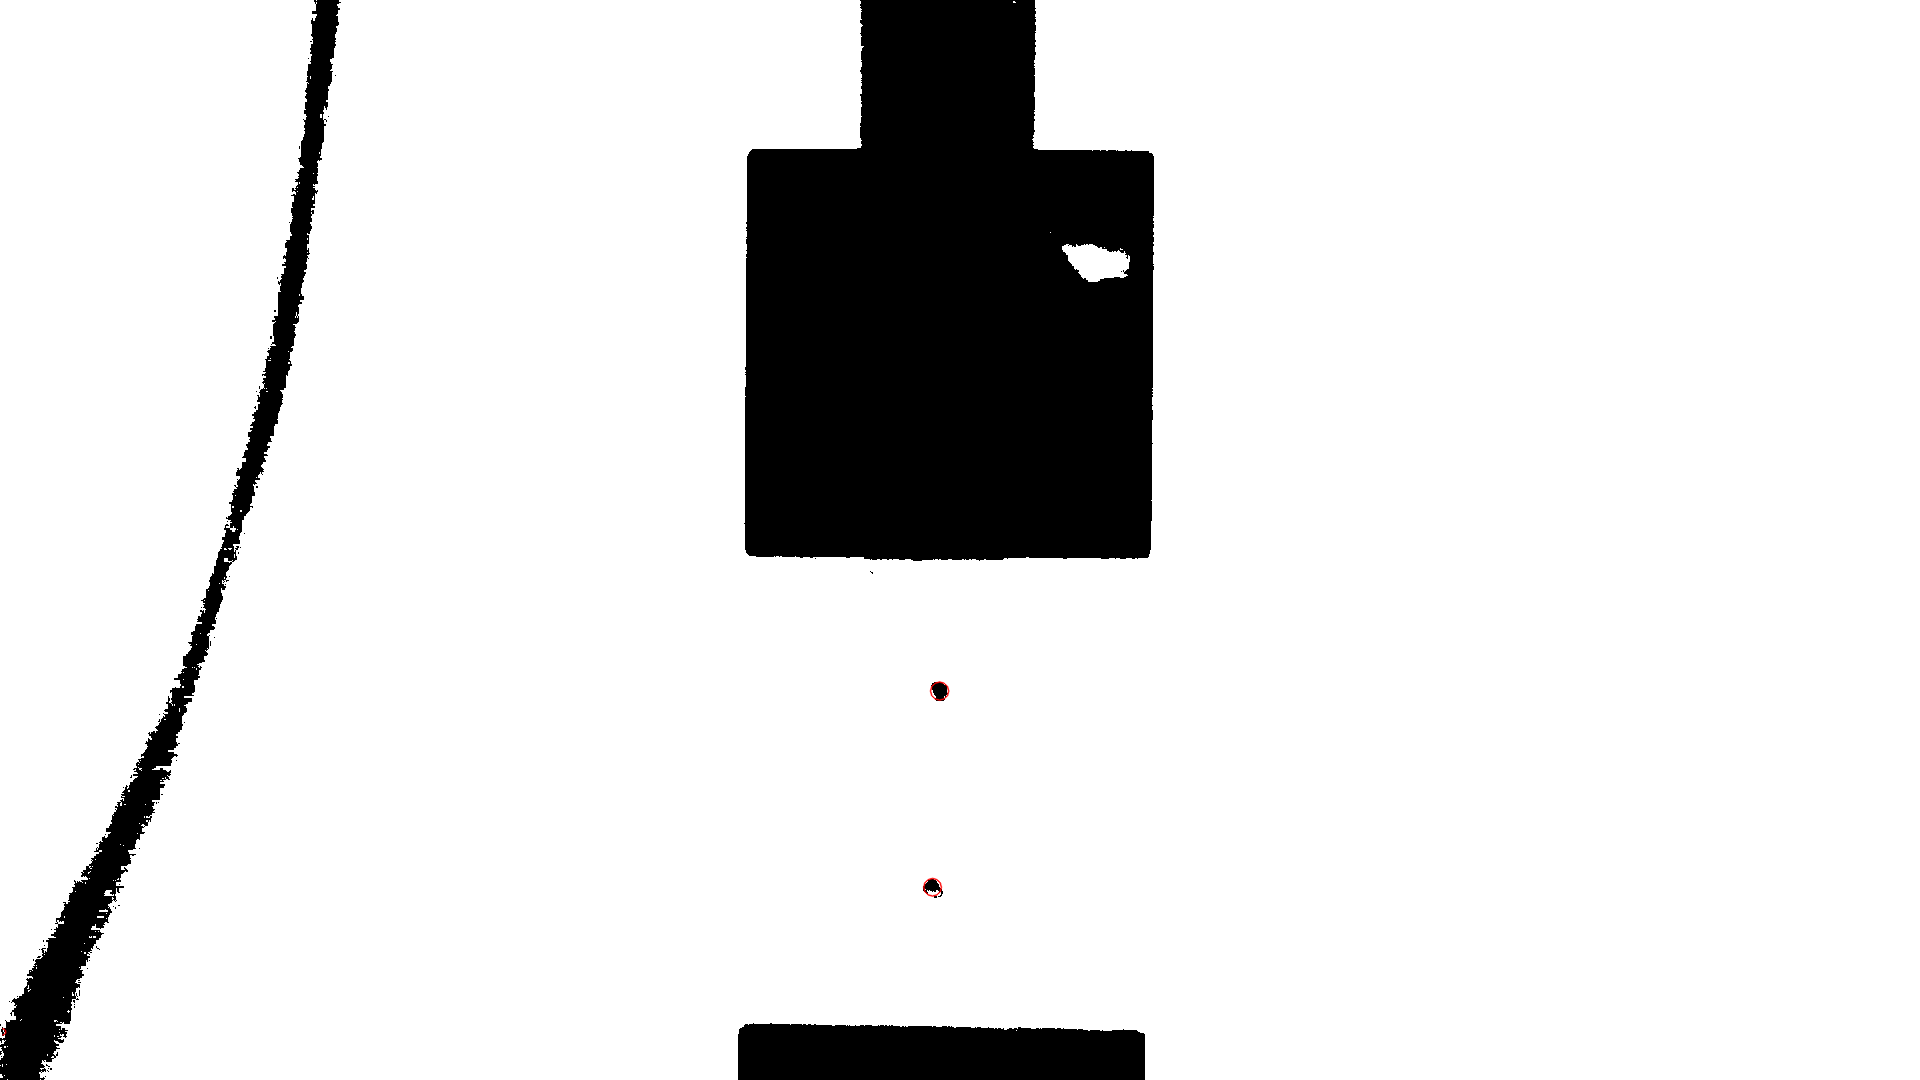

Read a new frame:  True
2


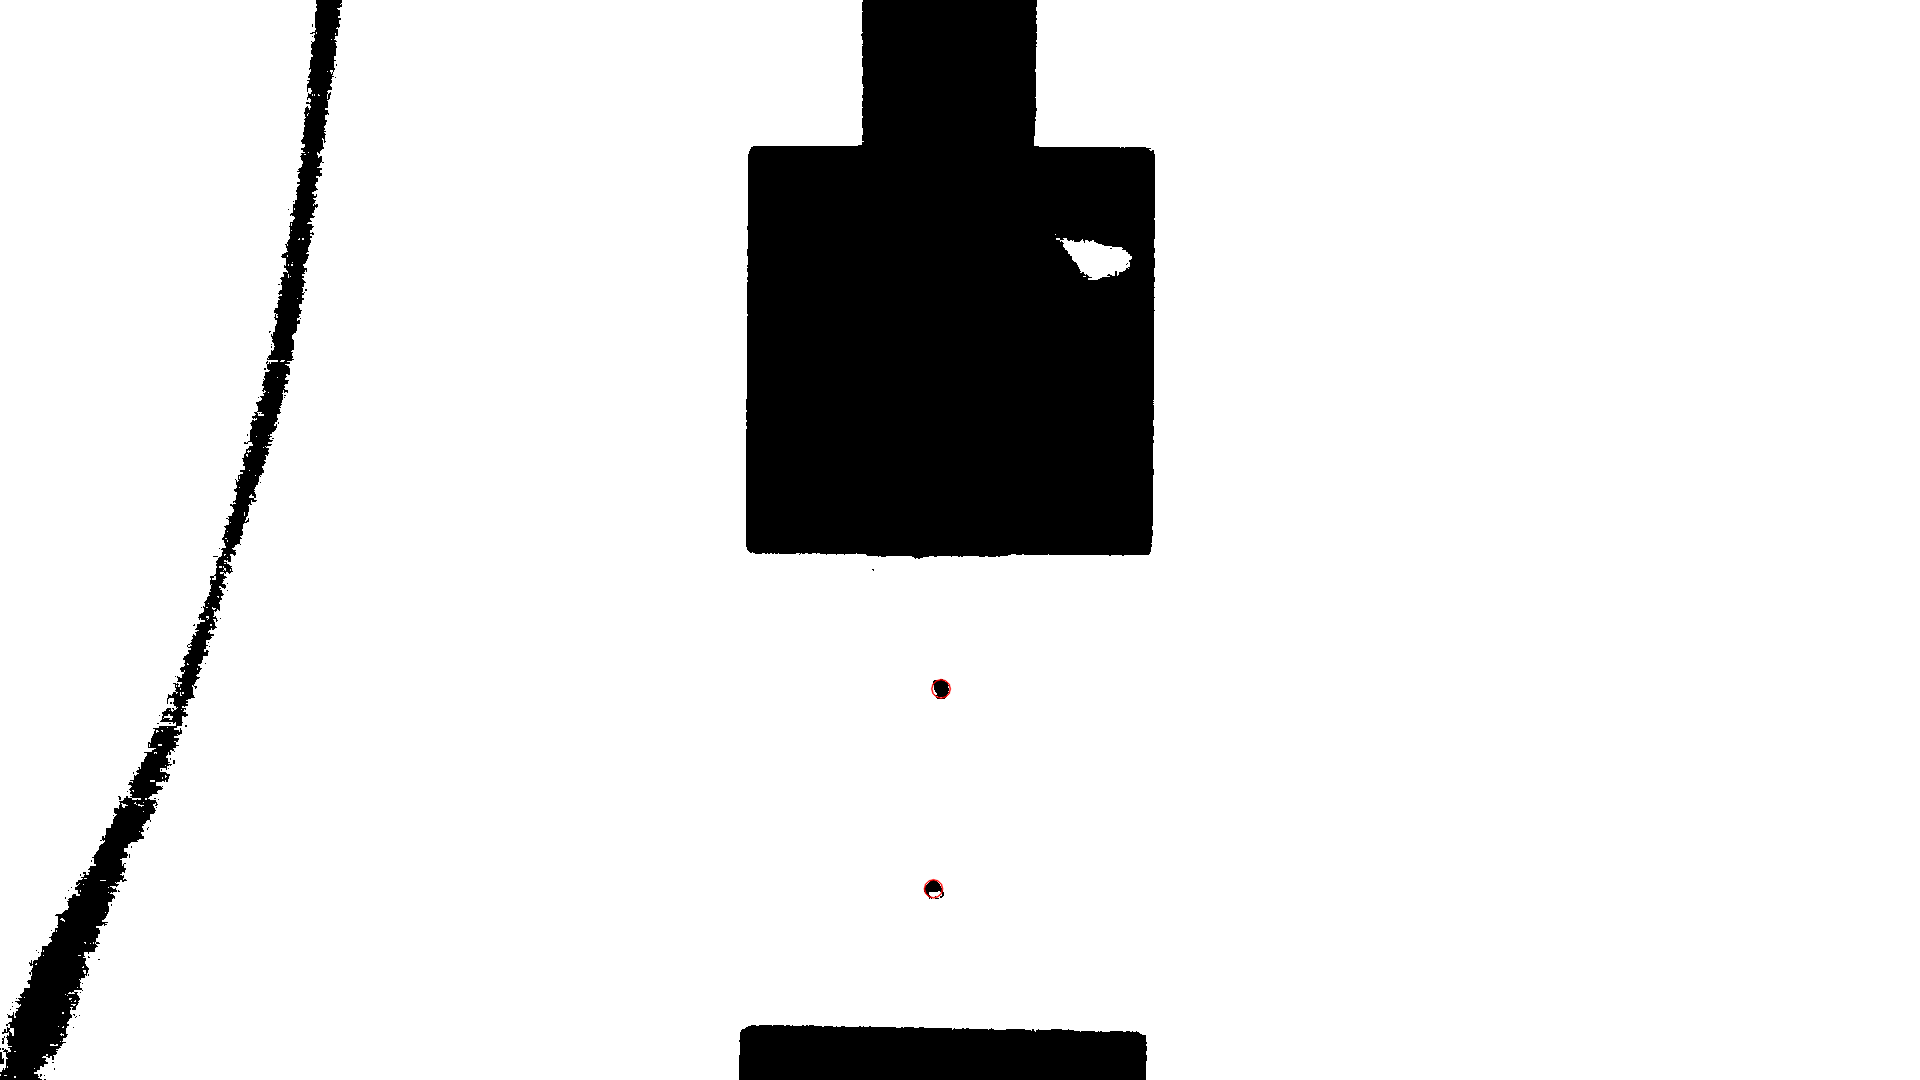

Read a new frame:  True
2


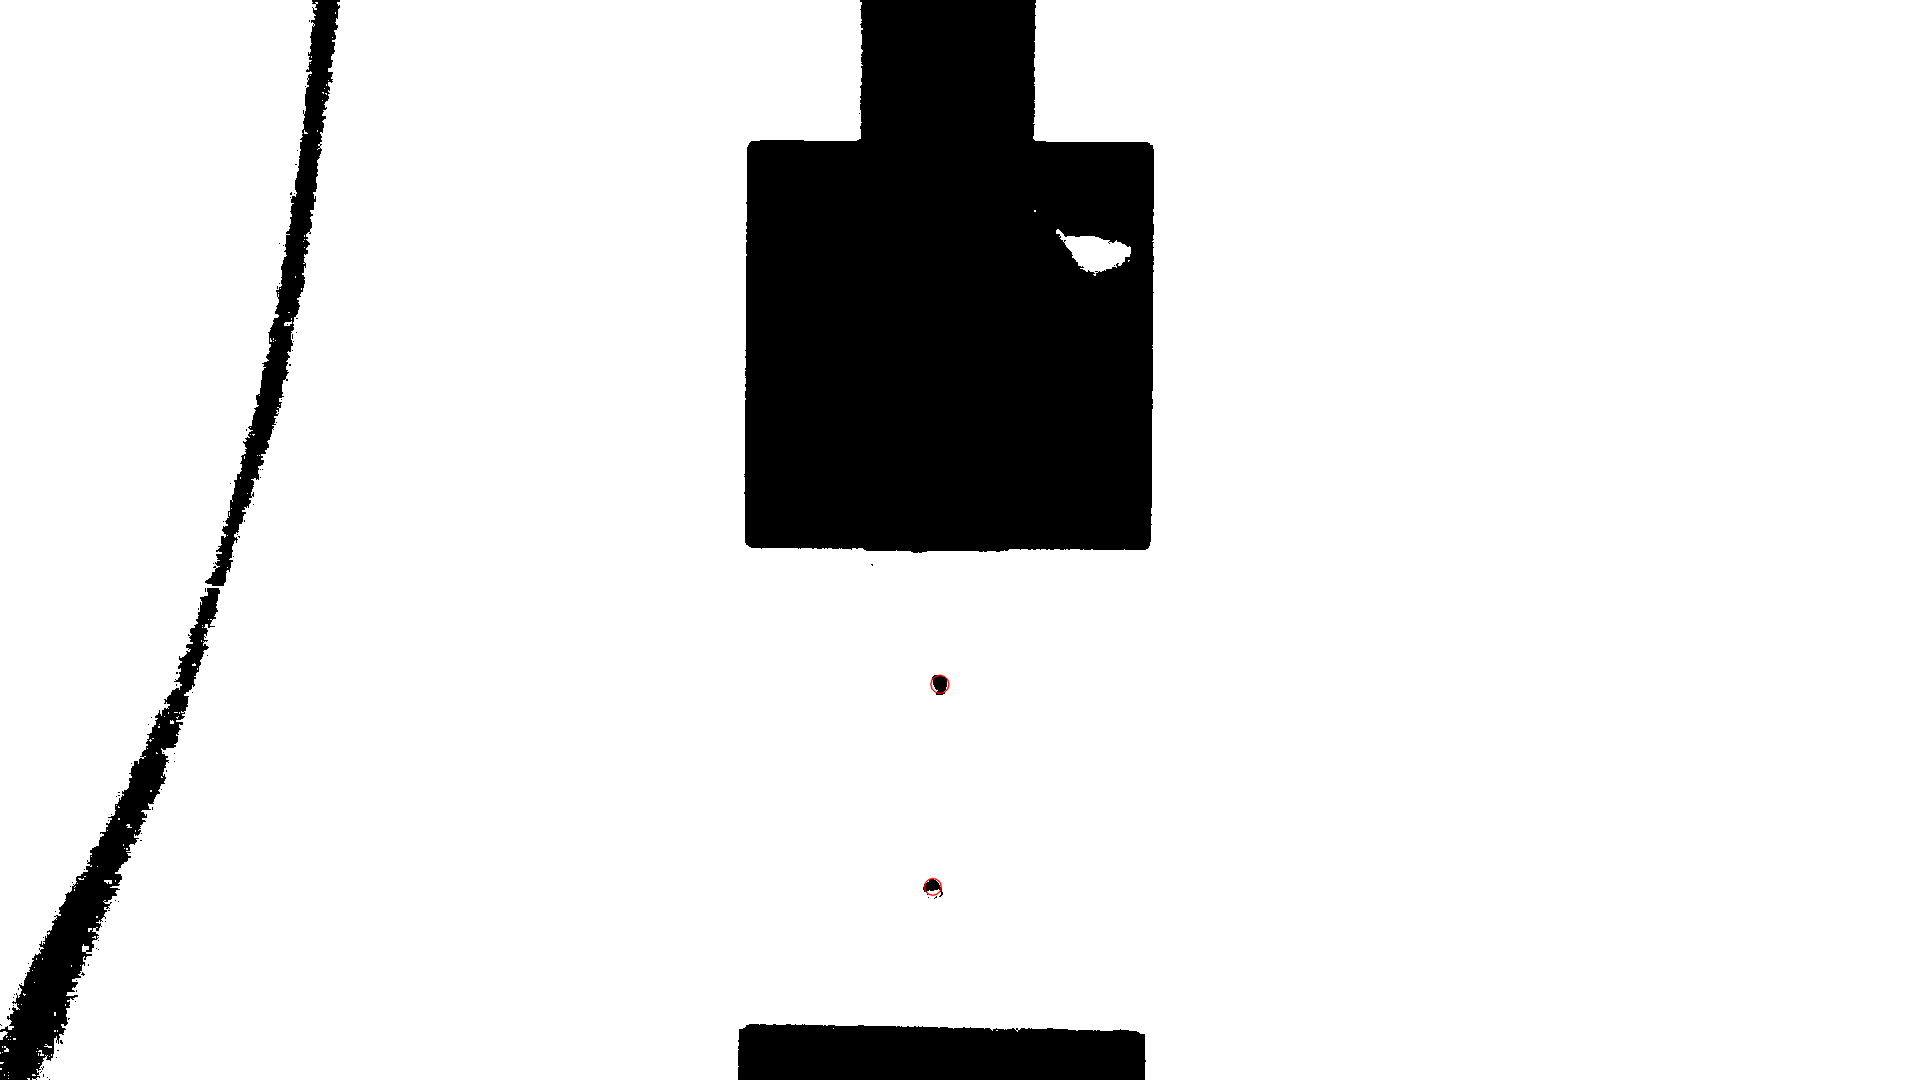

Read a new frame:  True
2


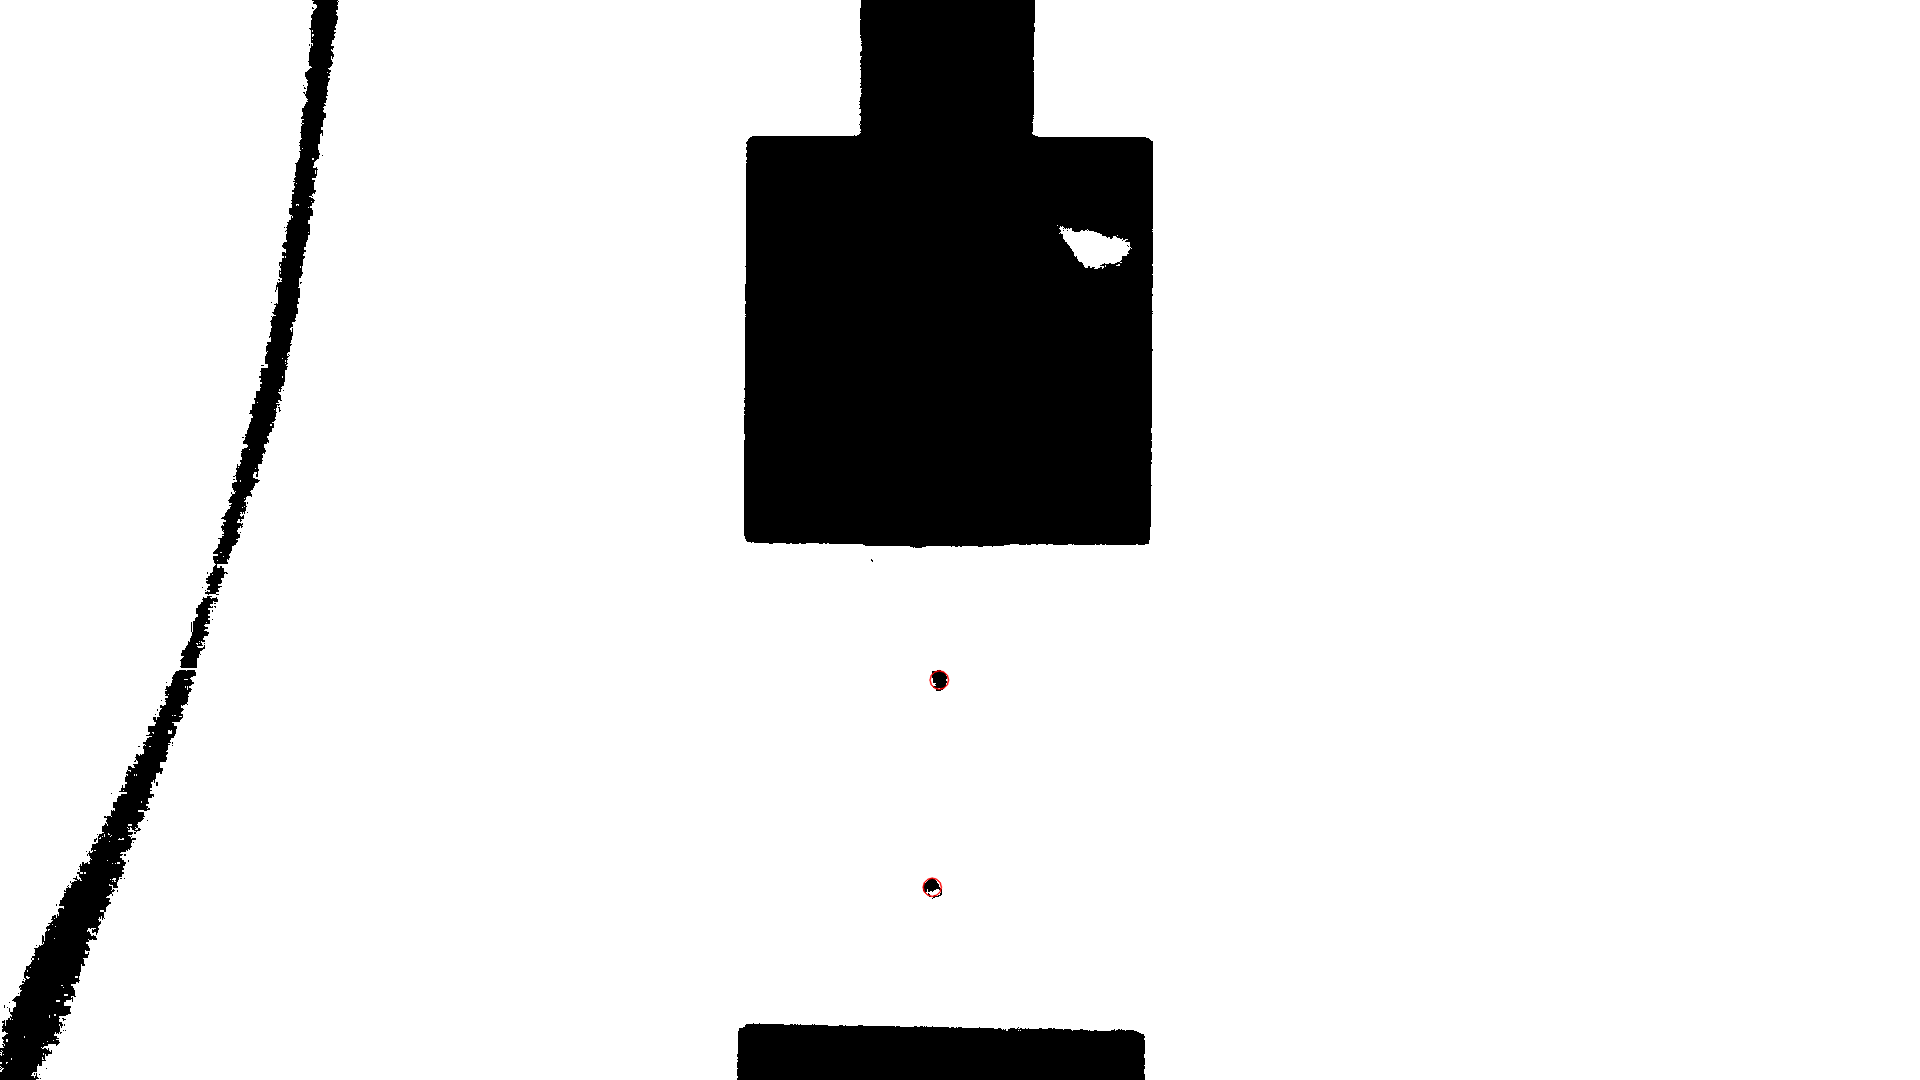

Read a new frame:  True
2


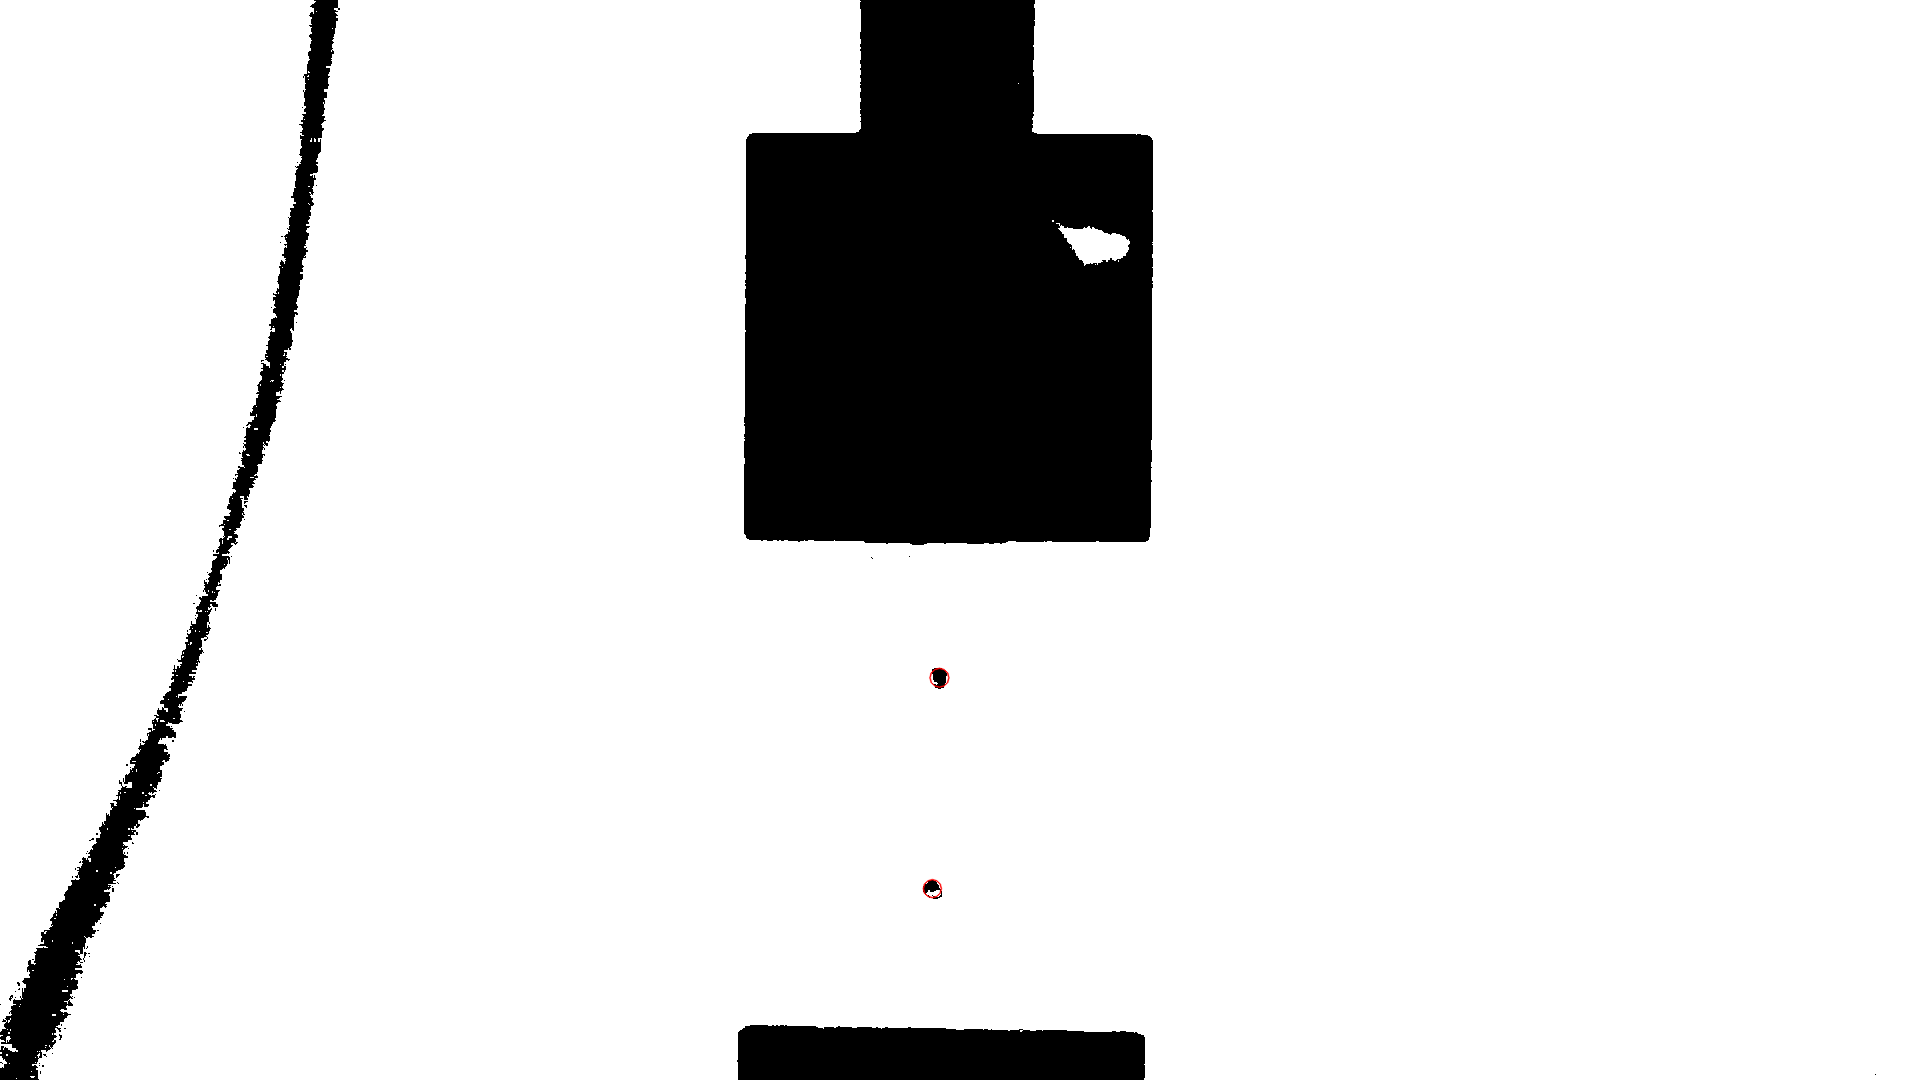

Read a new frame:  True
2


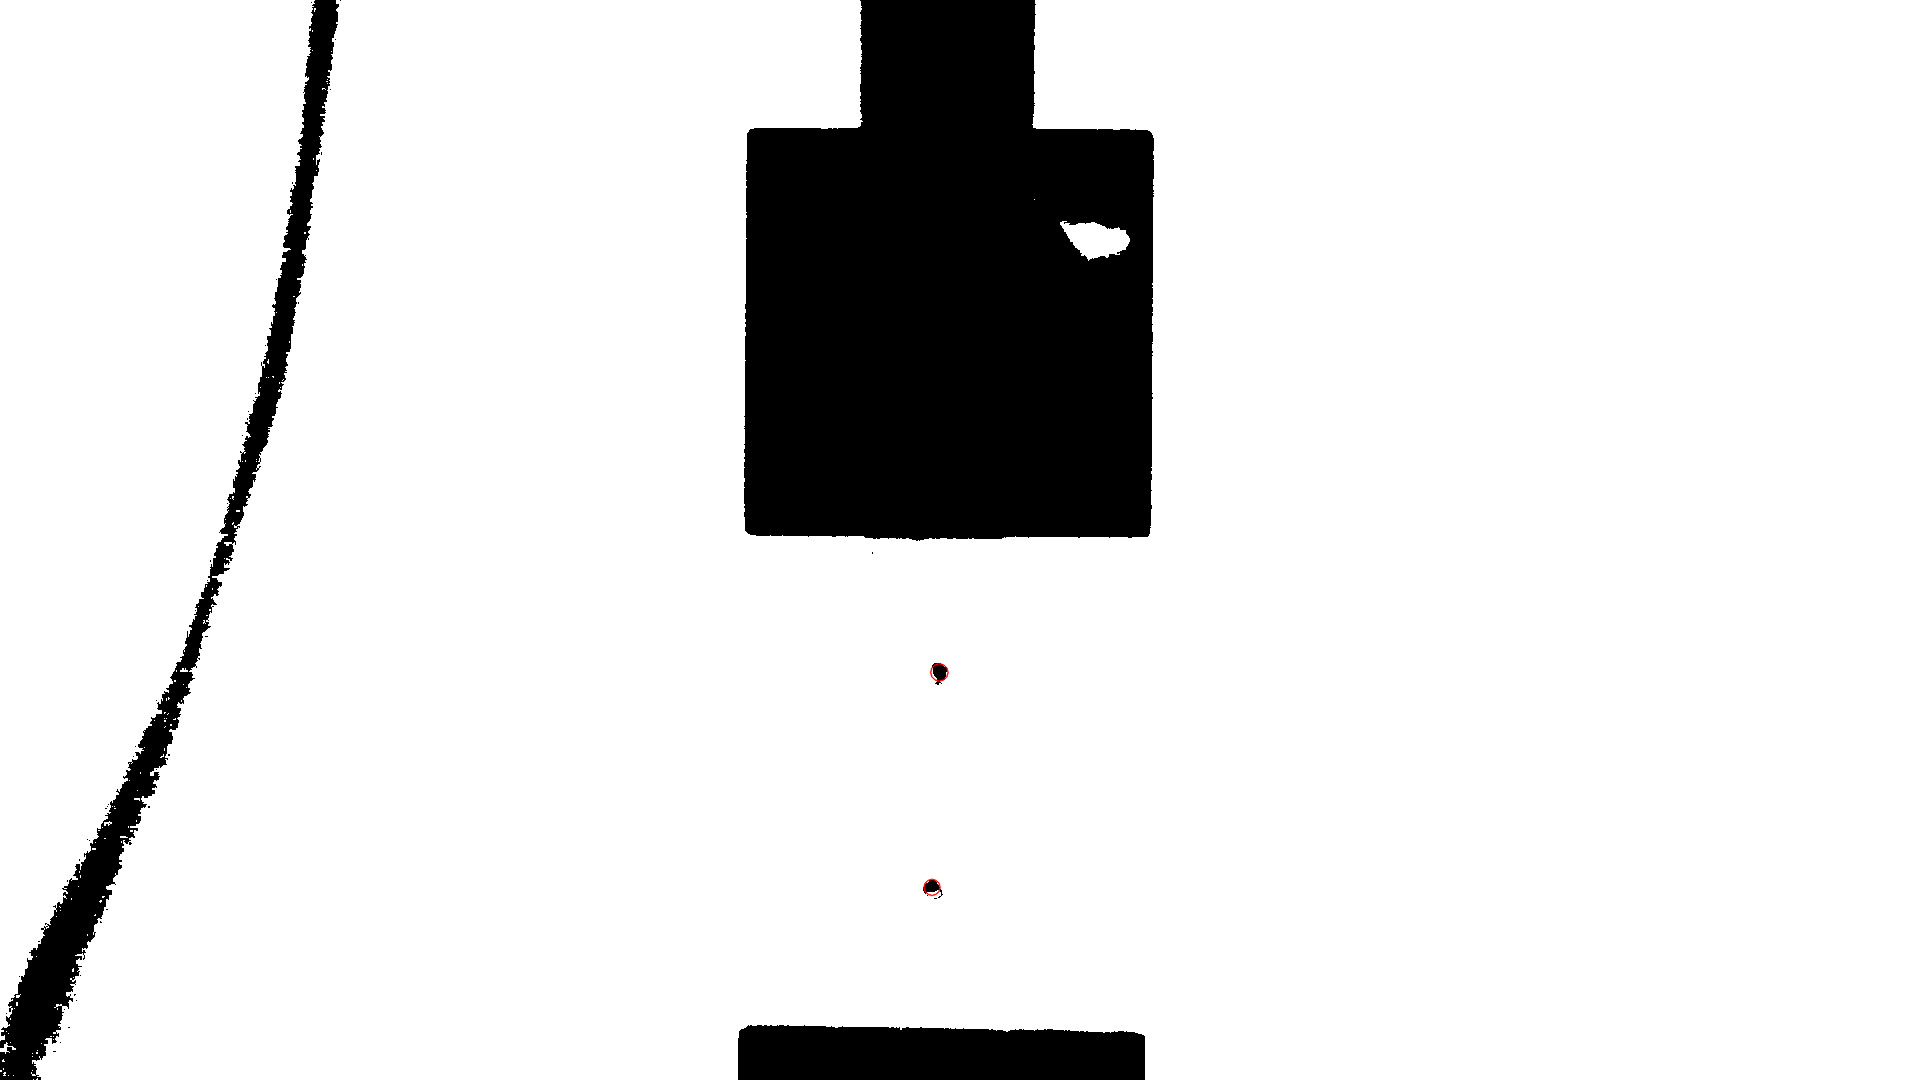

Read a new frame:  True
2


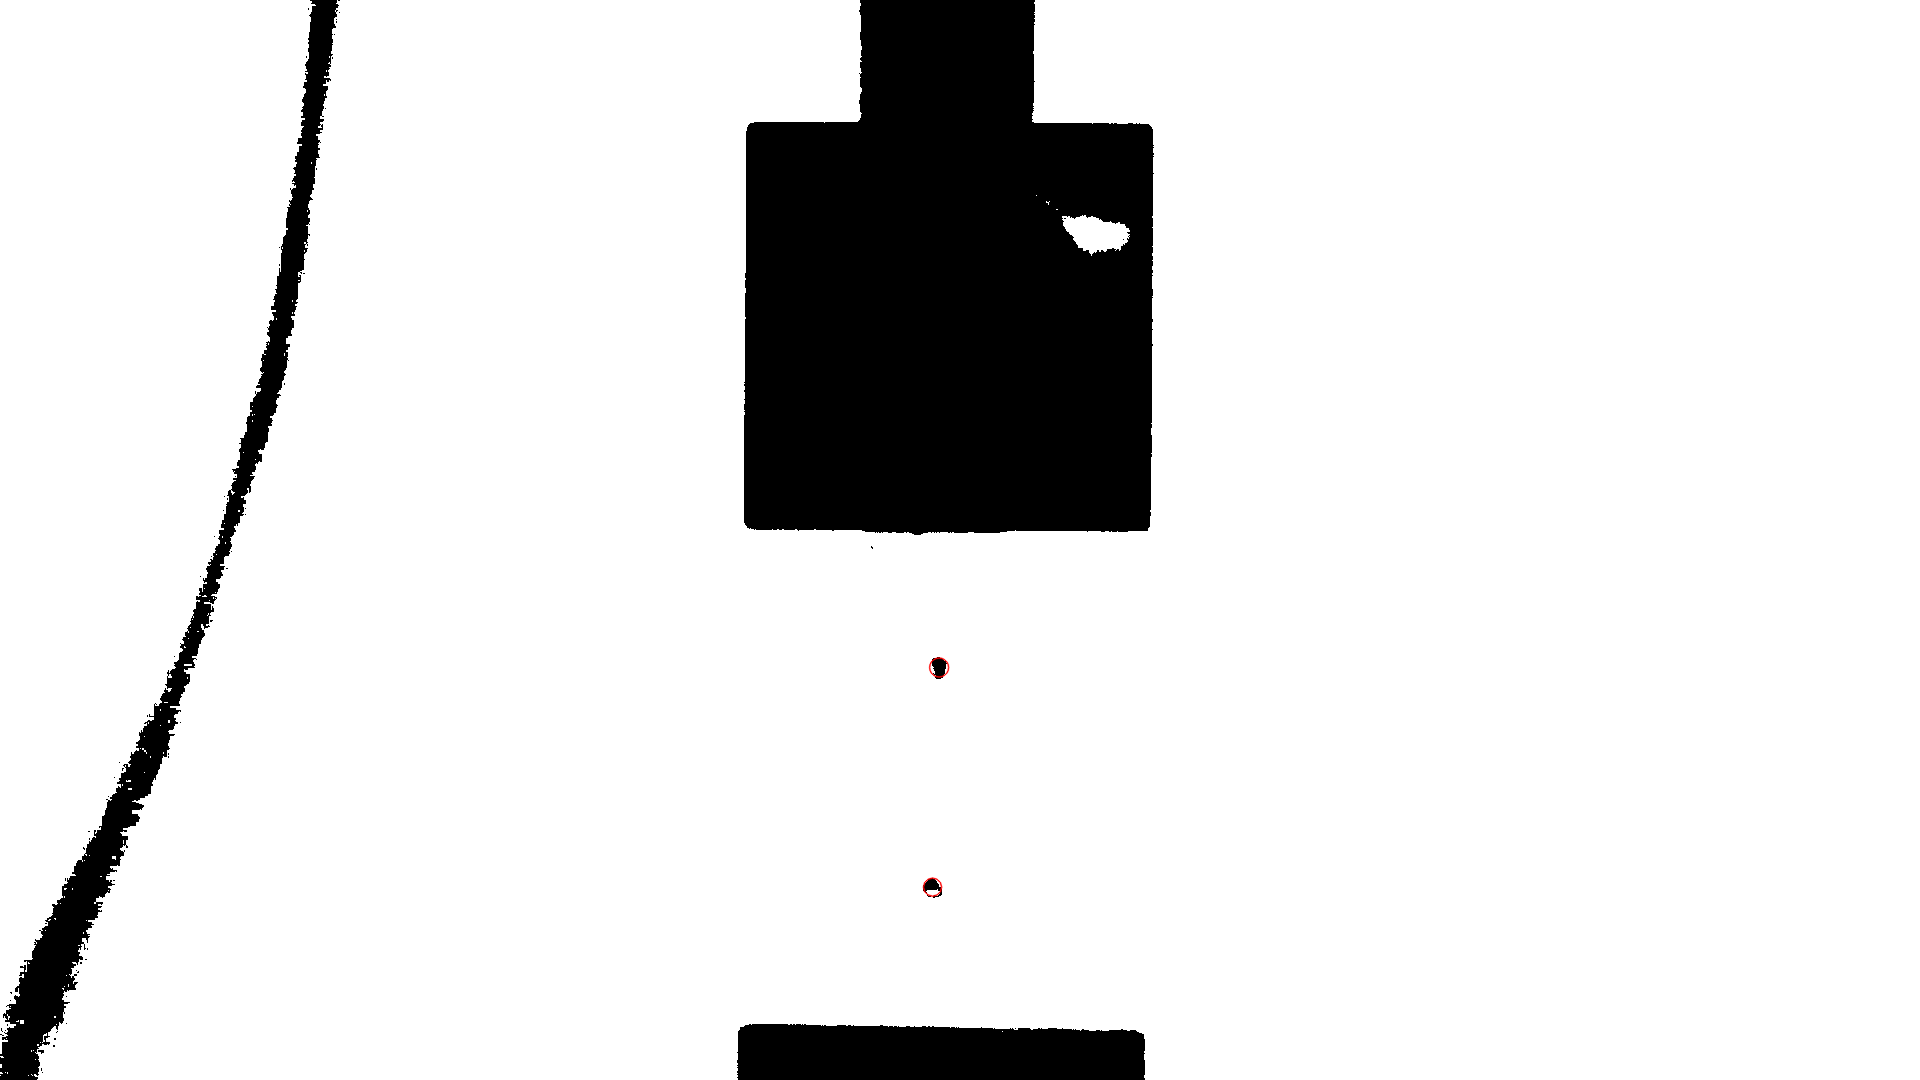

Read a new frame:  True
2


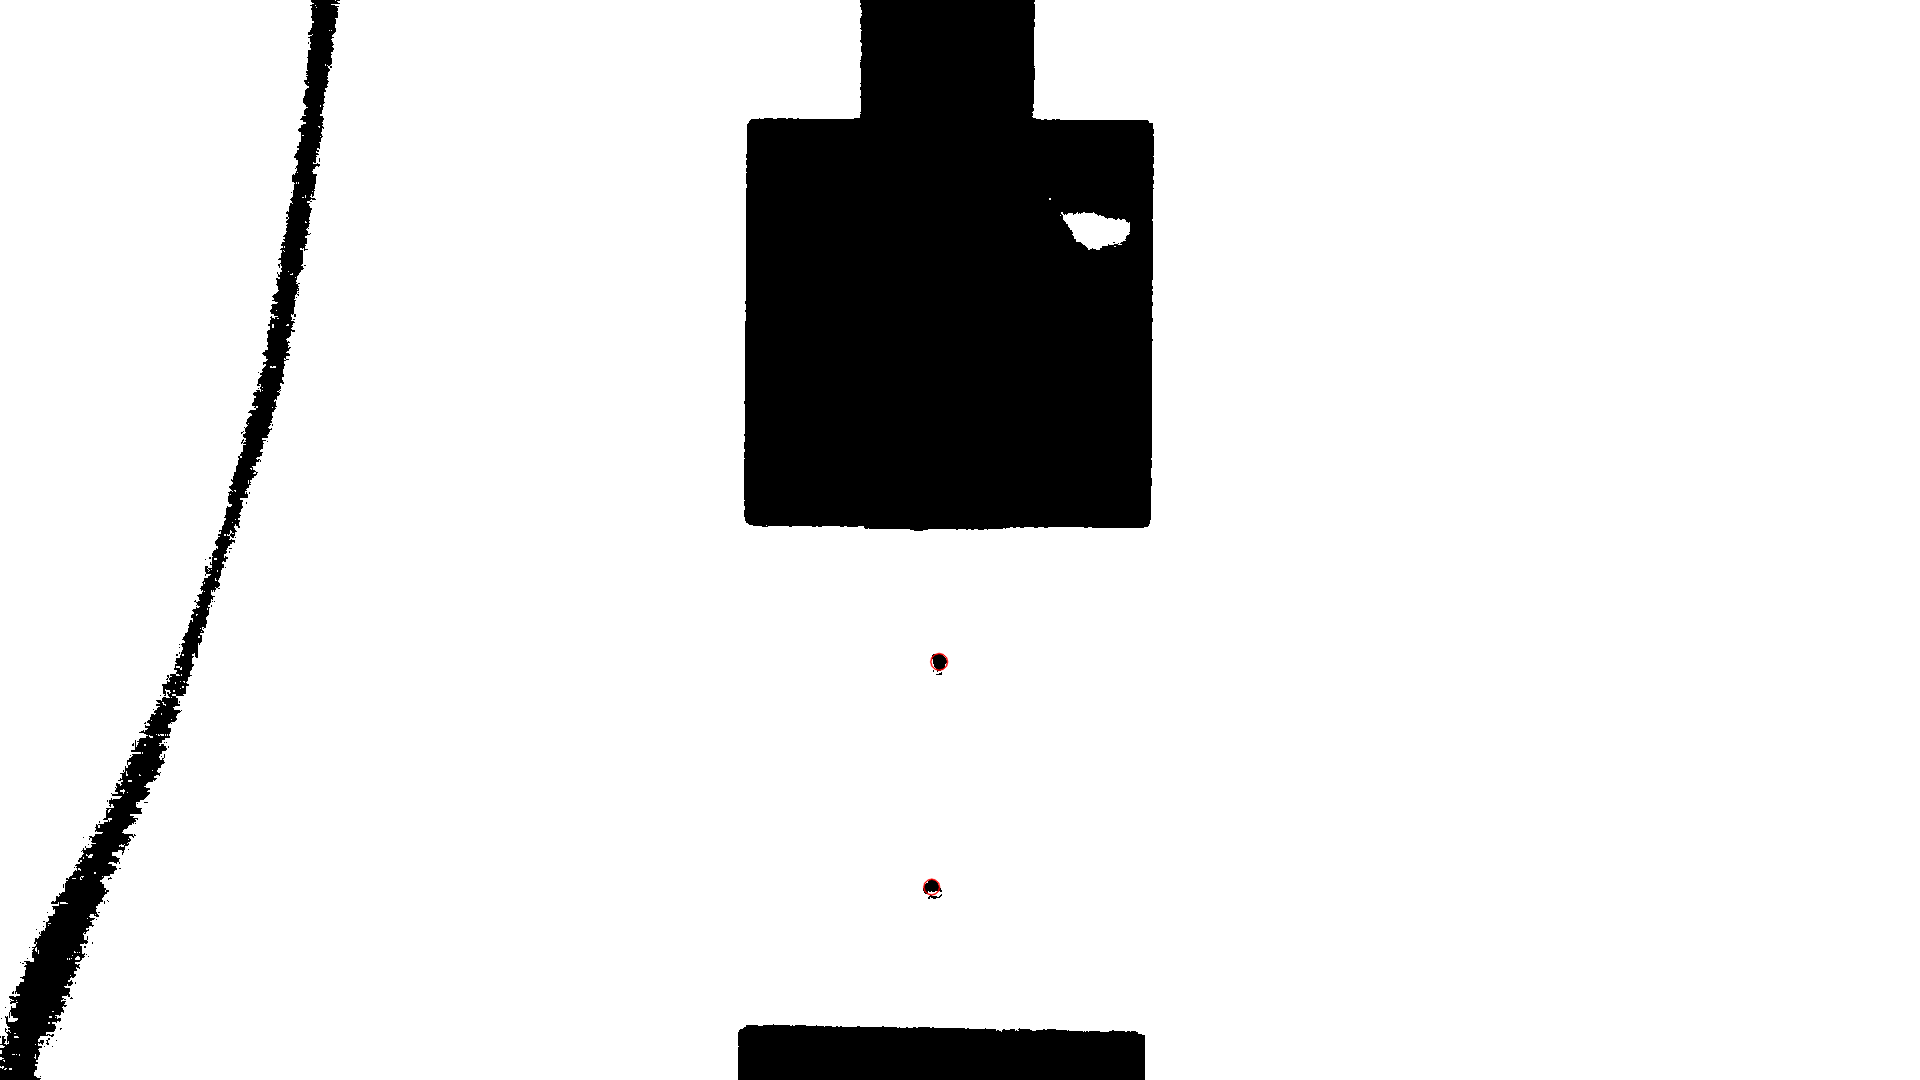

Read a new frame:  True
2


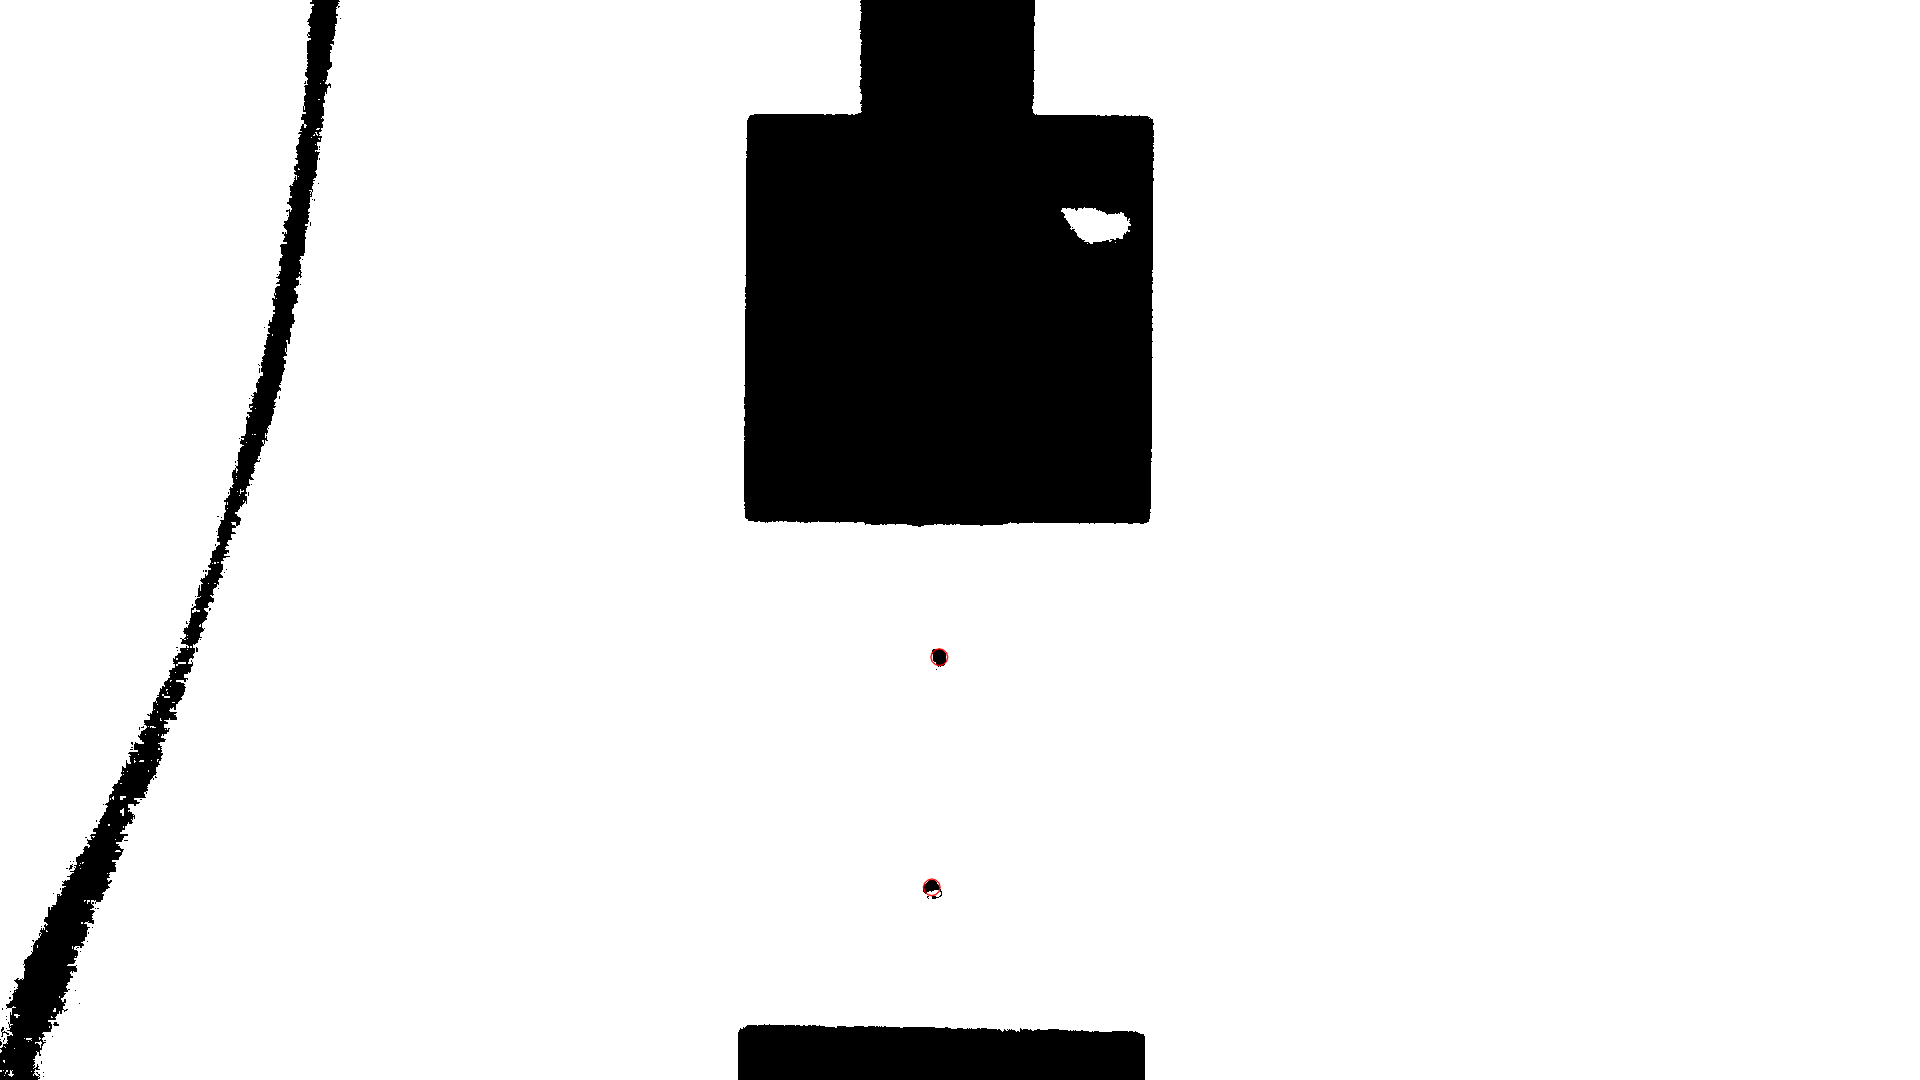

Read a new frame:  True
3


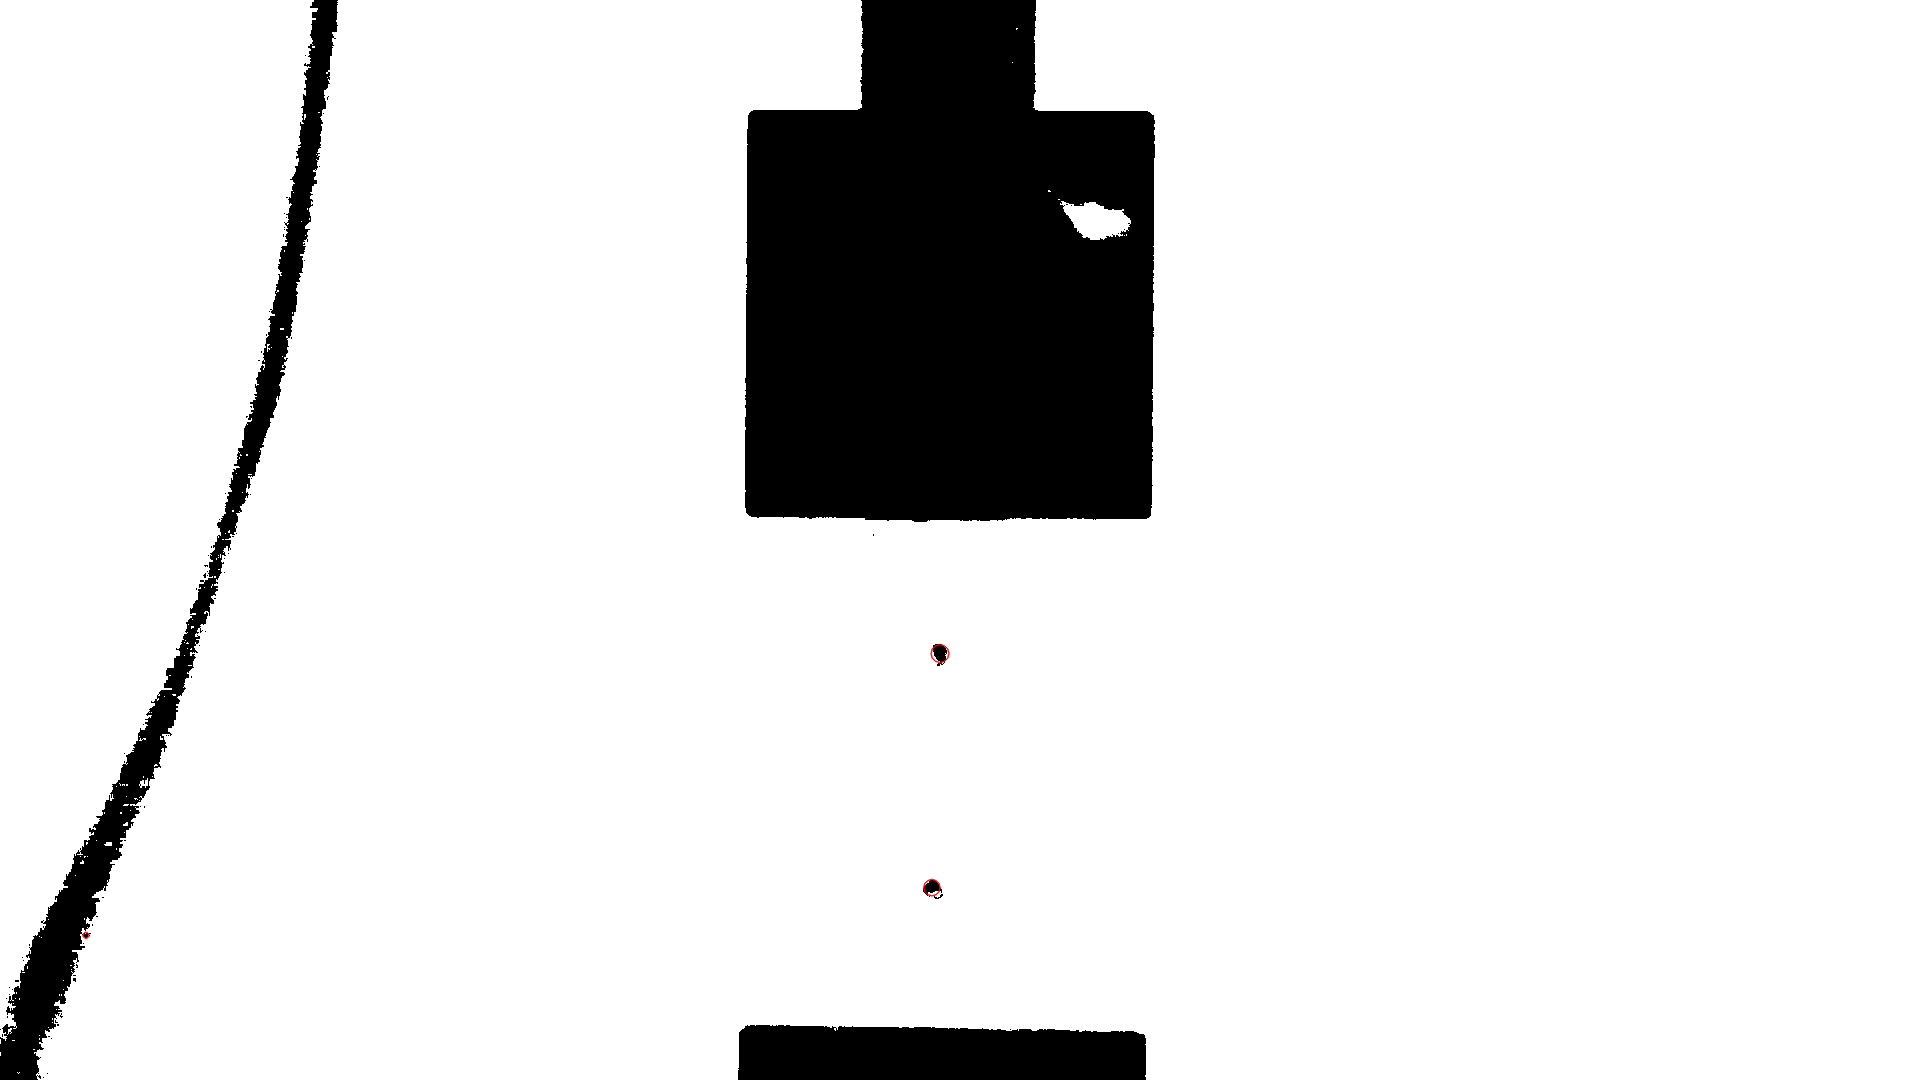

Read a new frame:  True
3


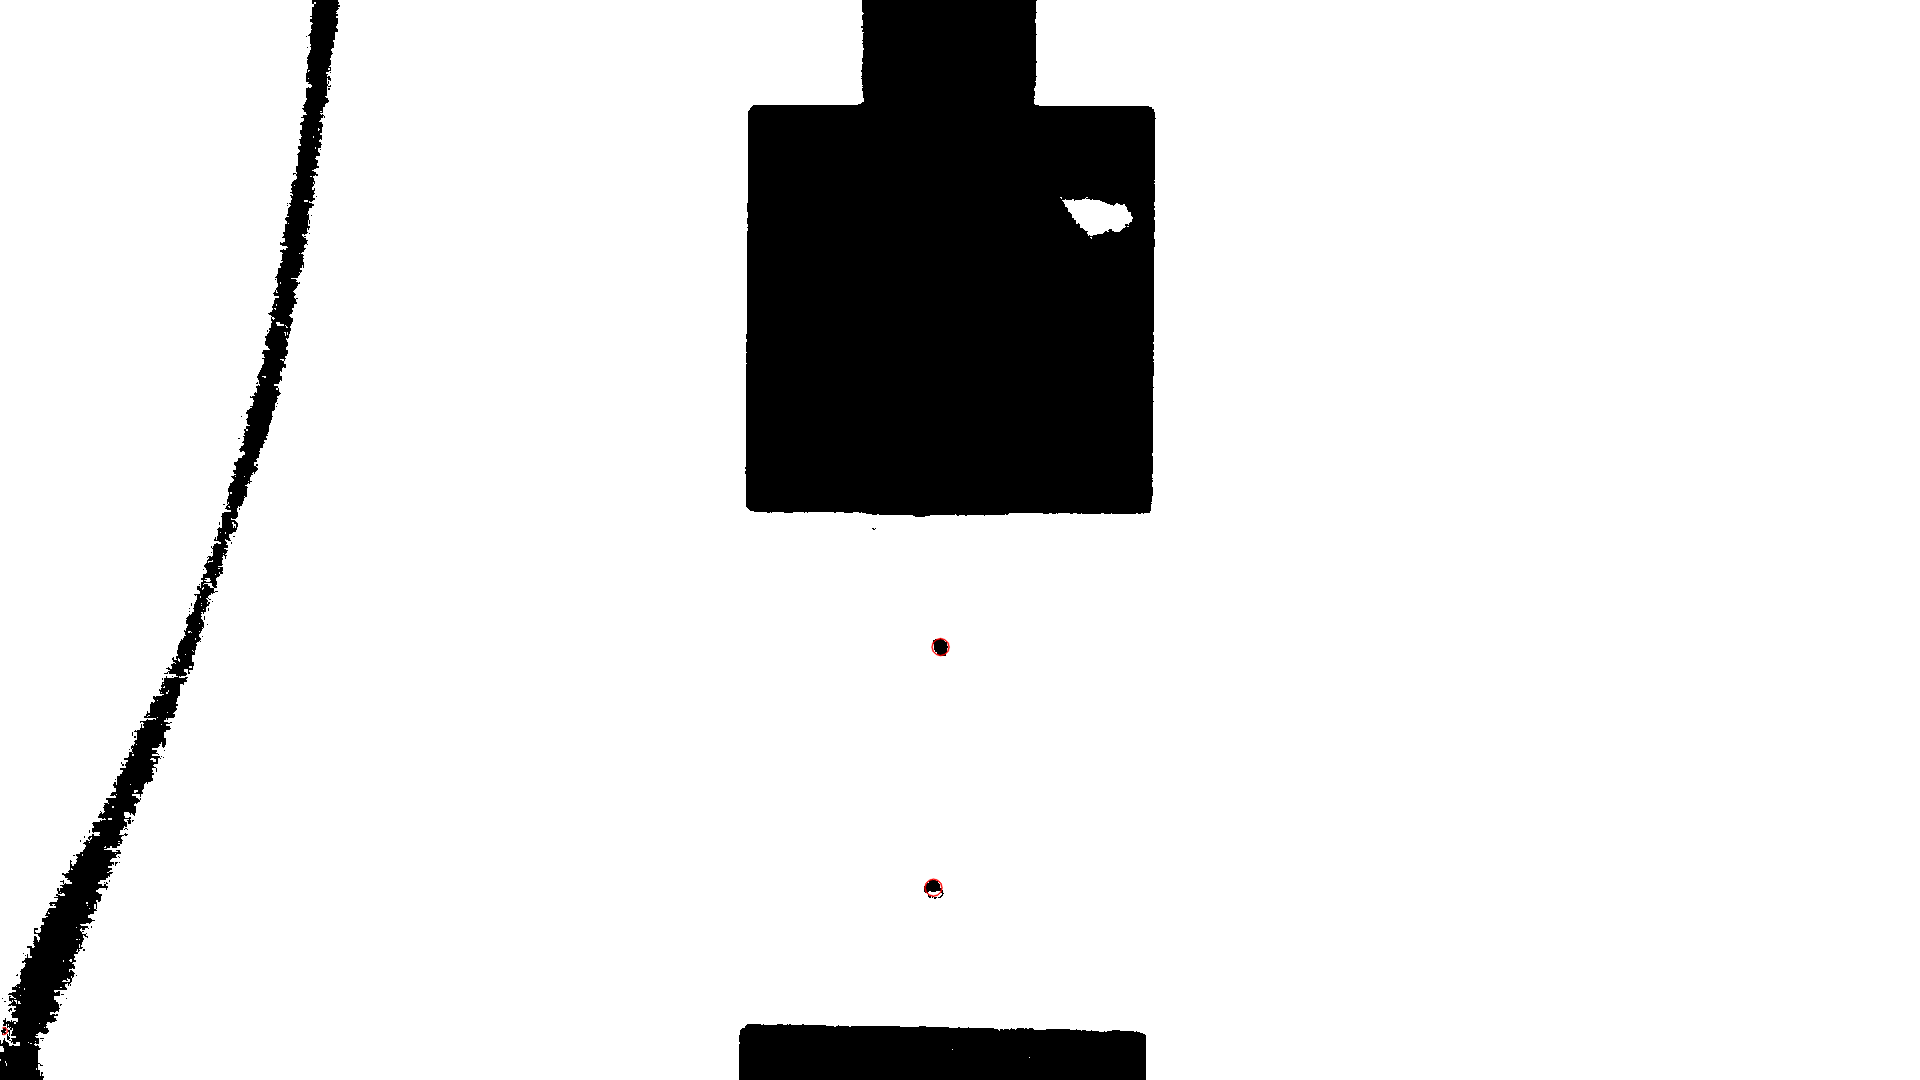

Read a new frame:  True
2


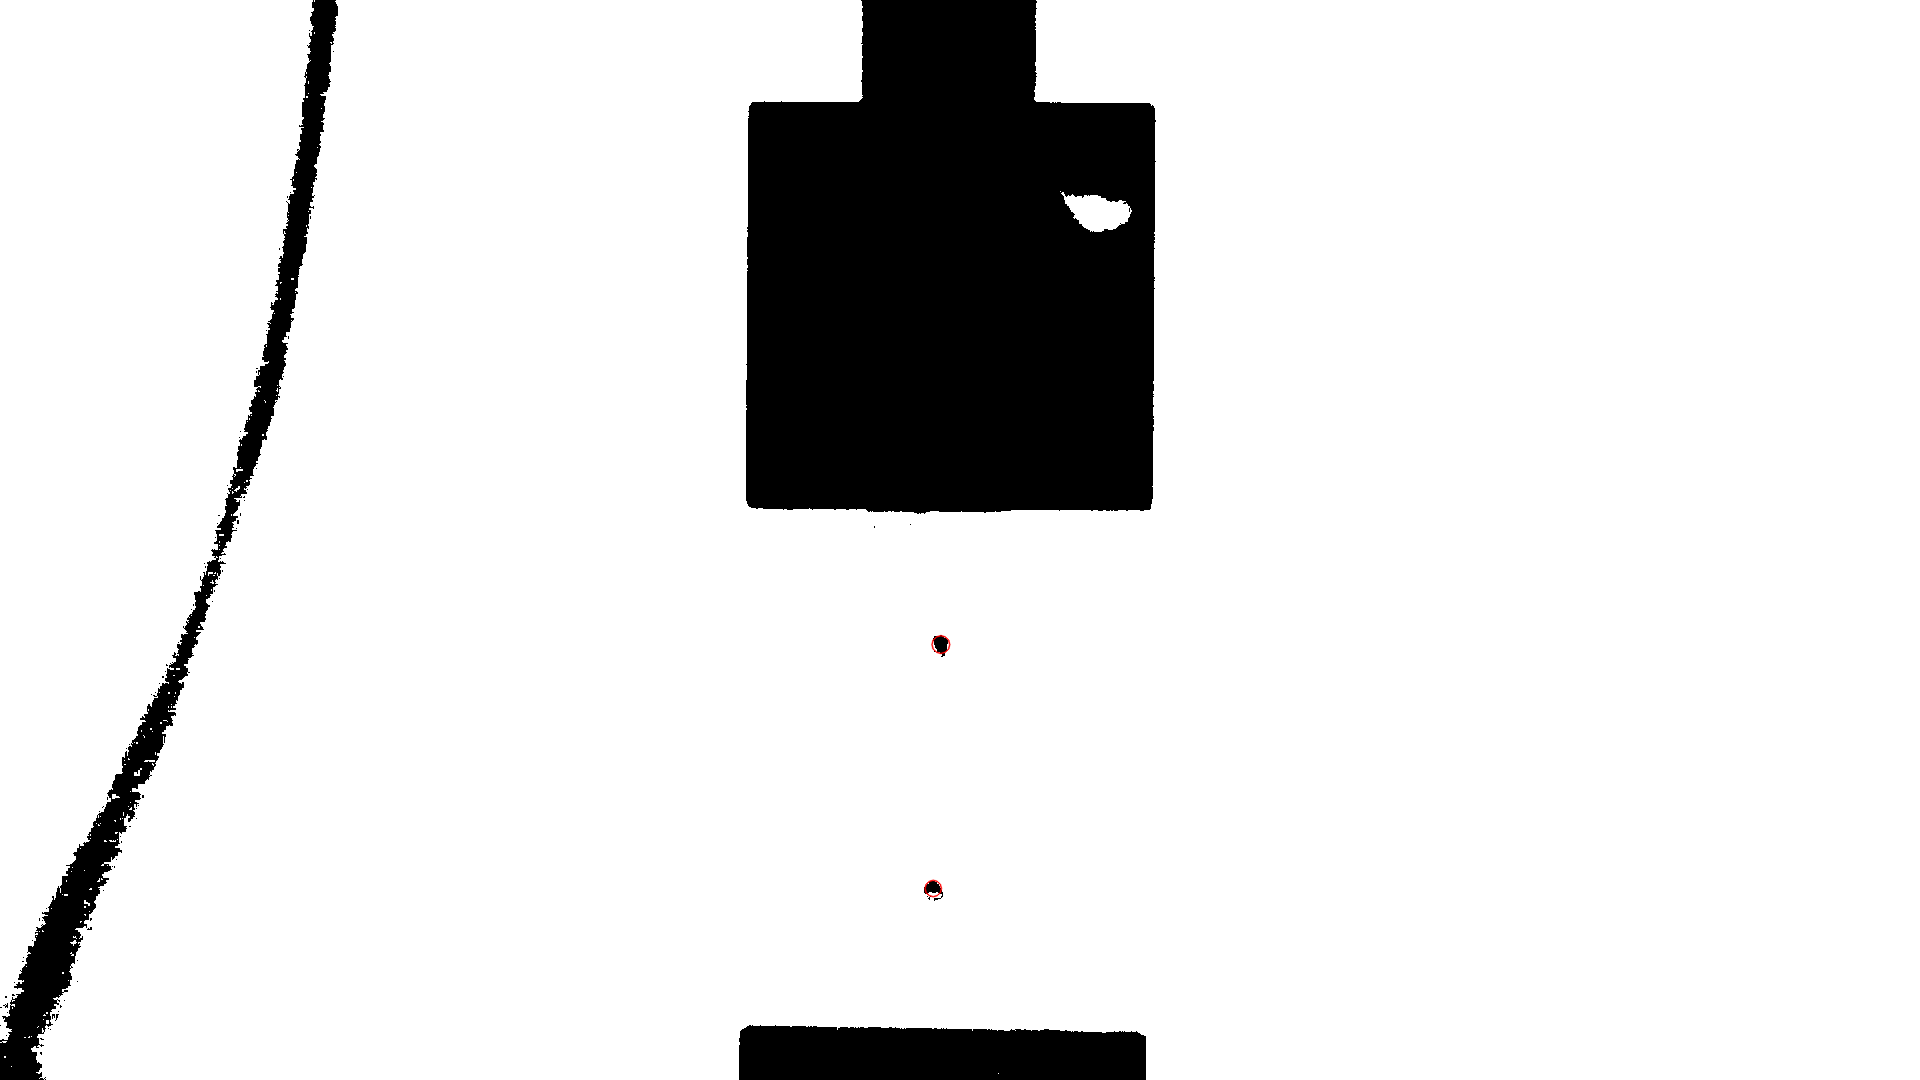

Read a new frame:  True
3


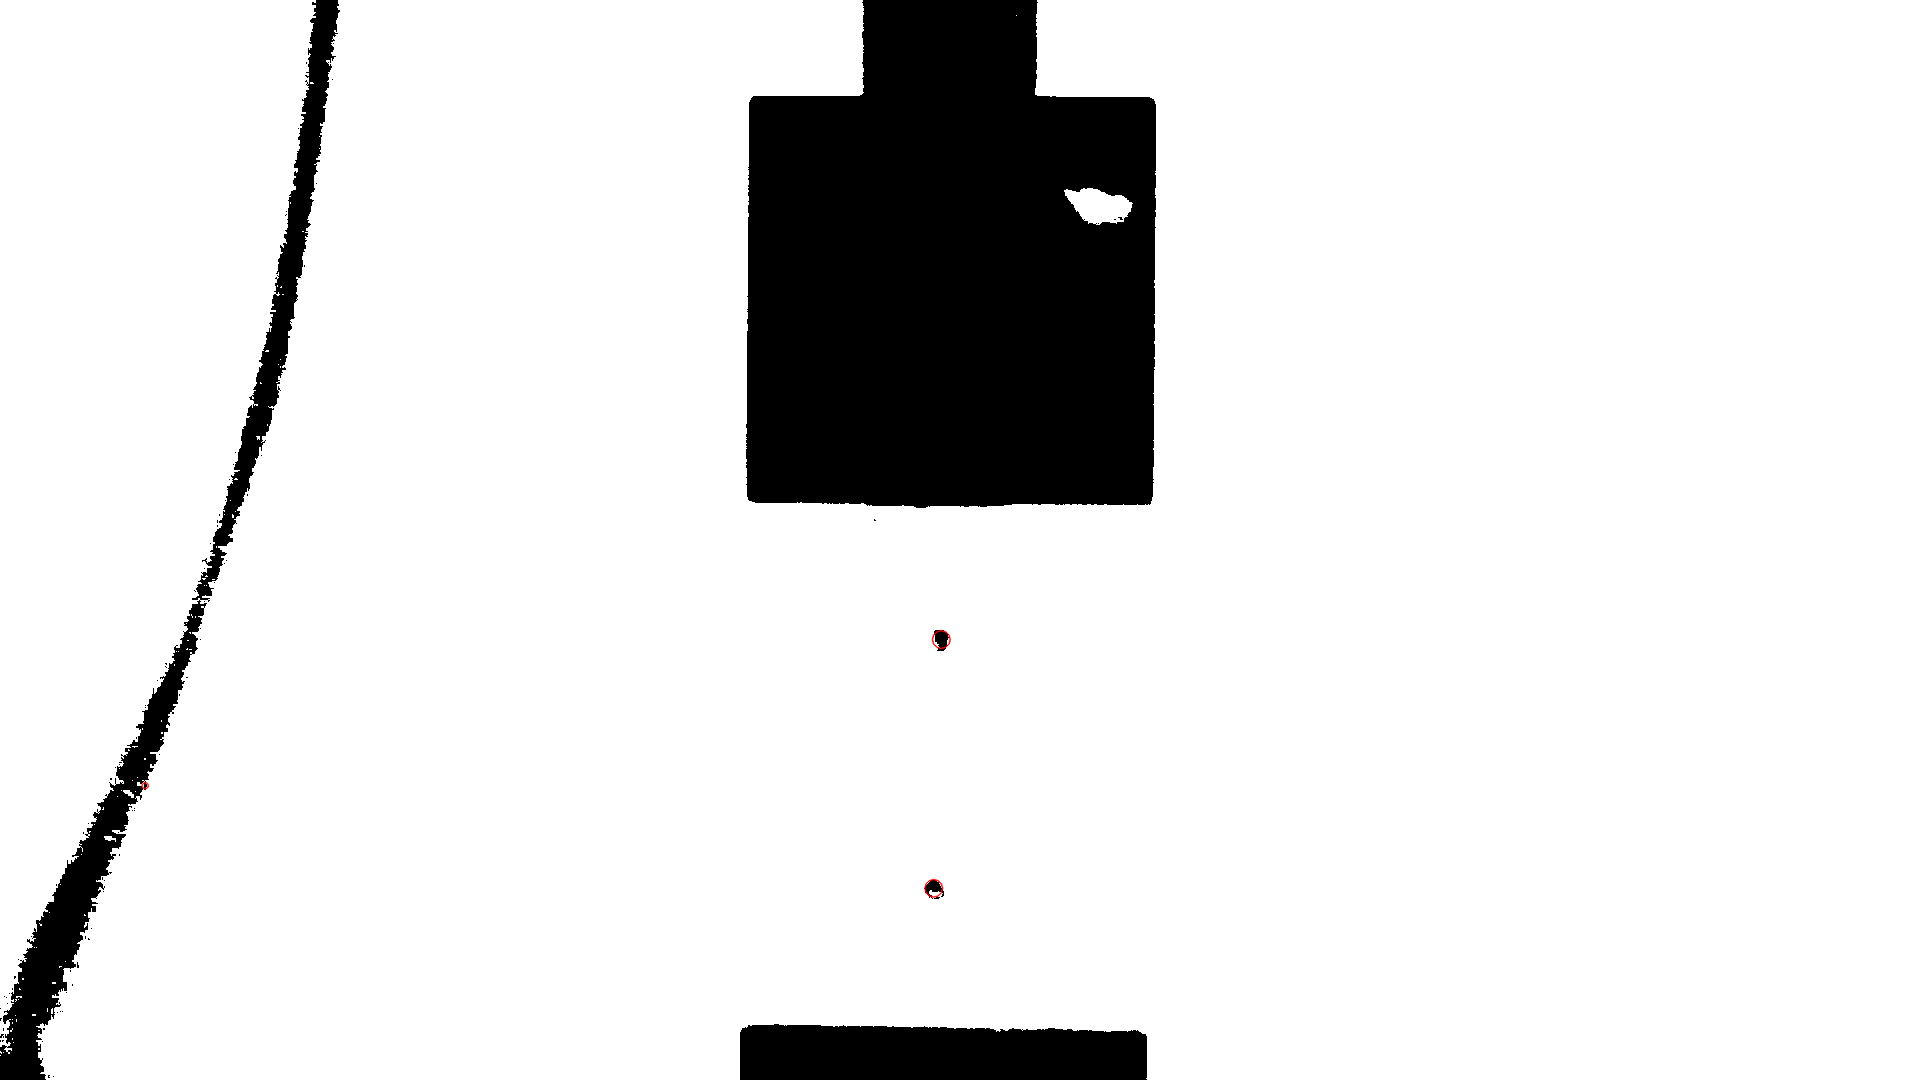

Read a new frame:  True
2


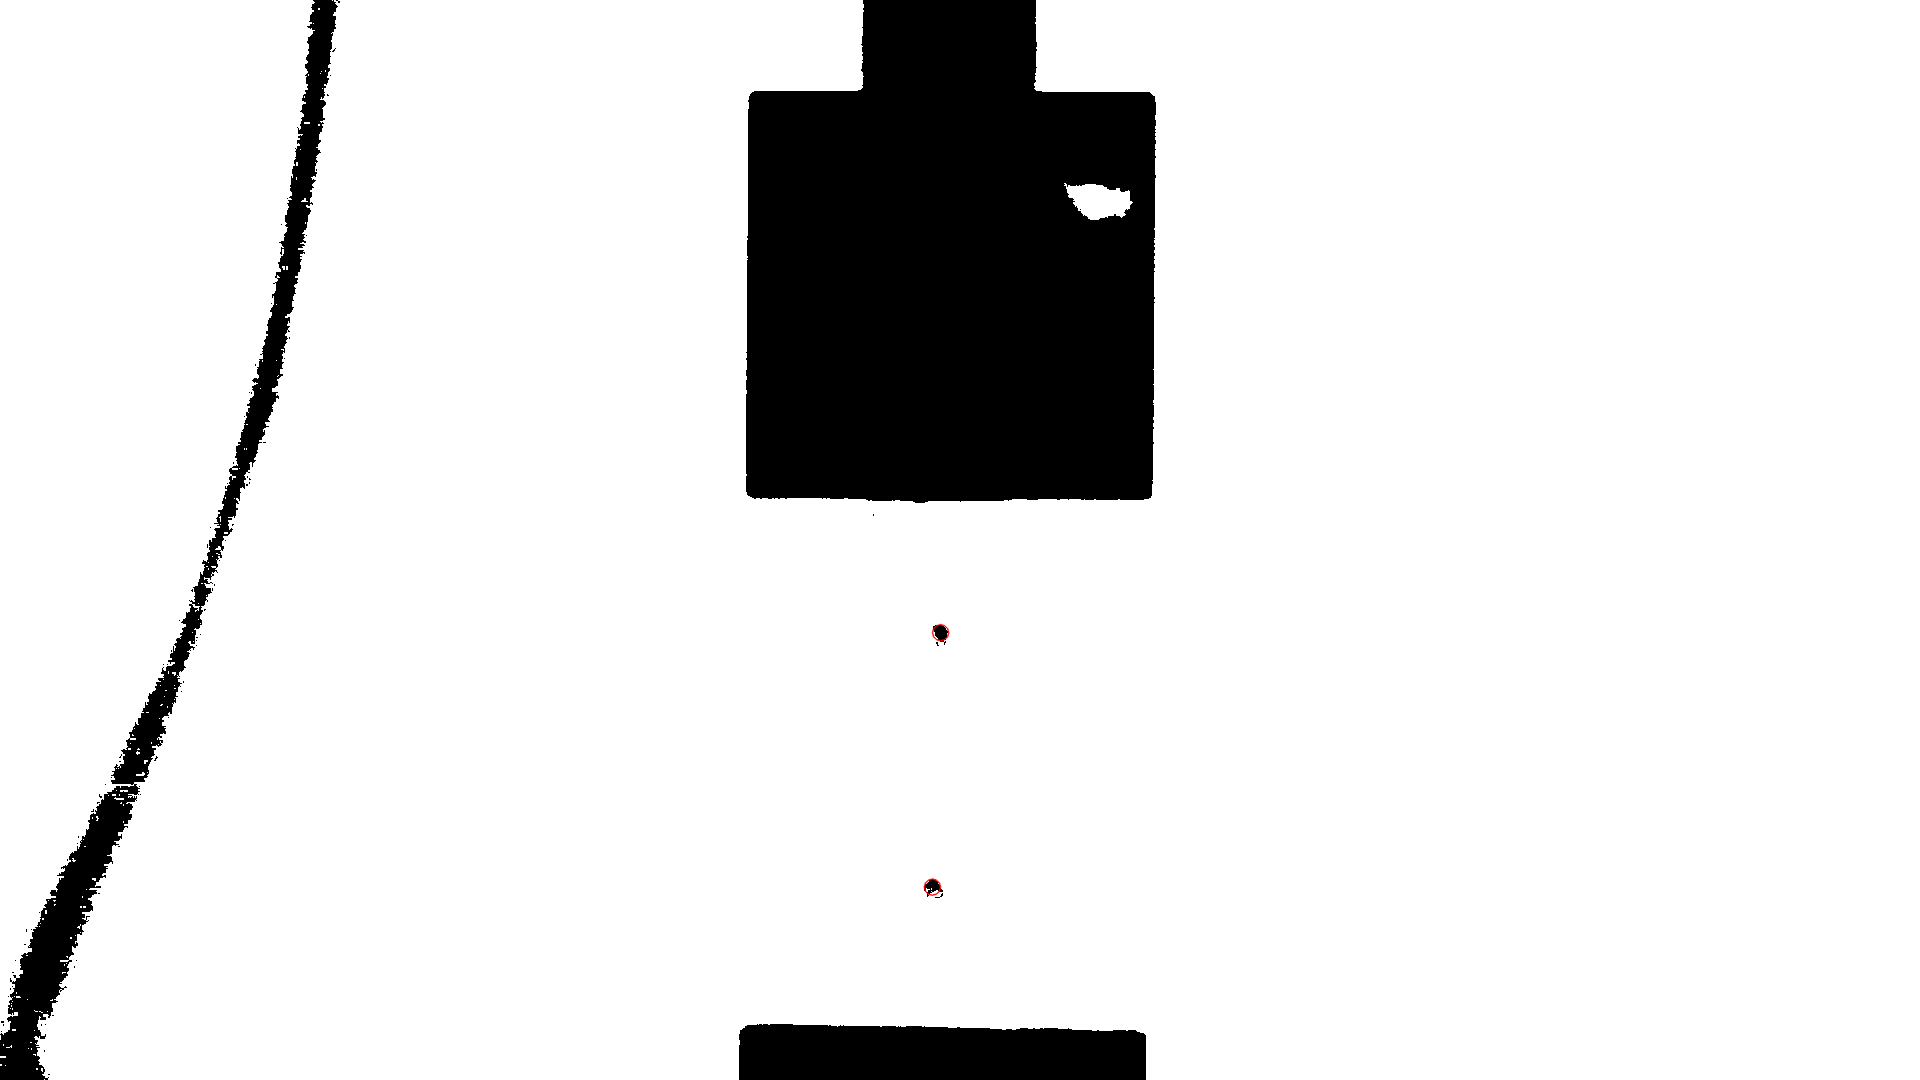

Read a new frame:  True
2


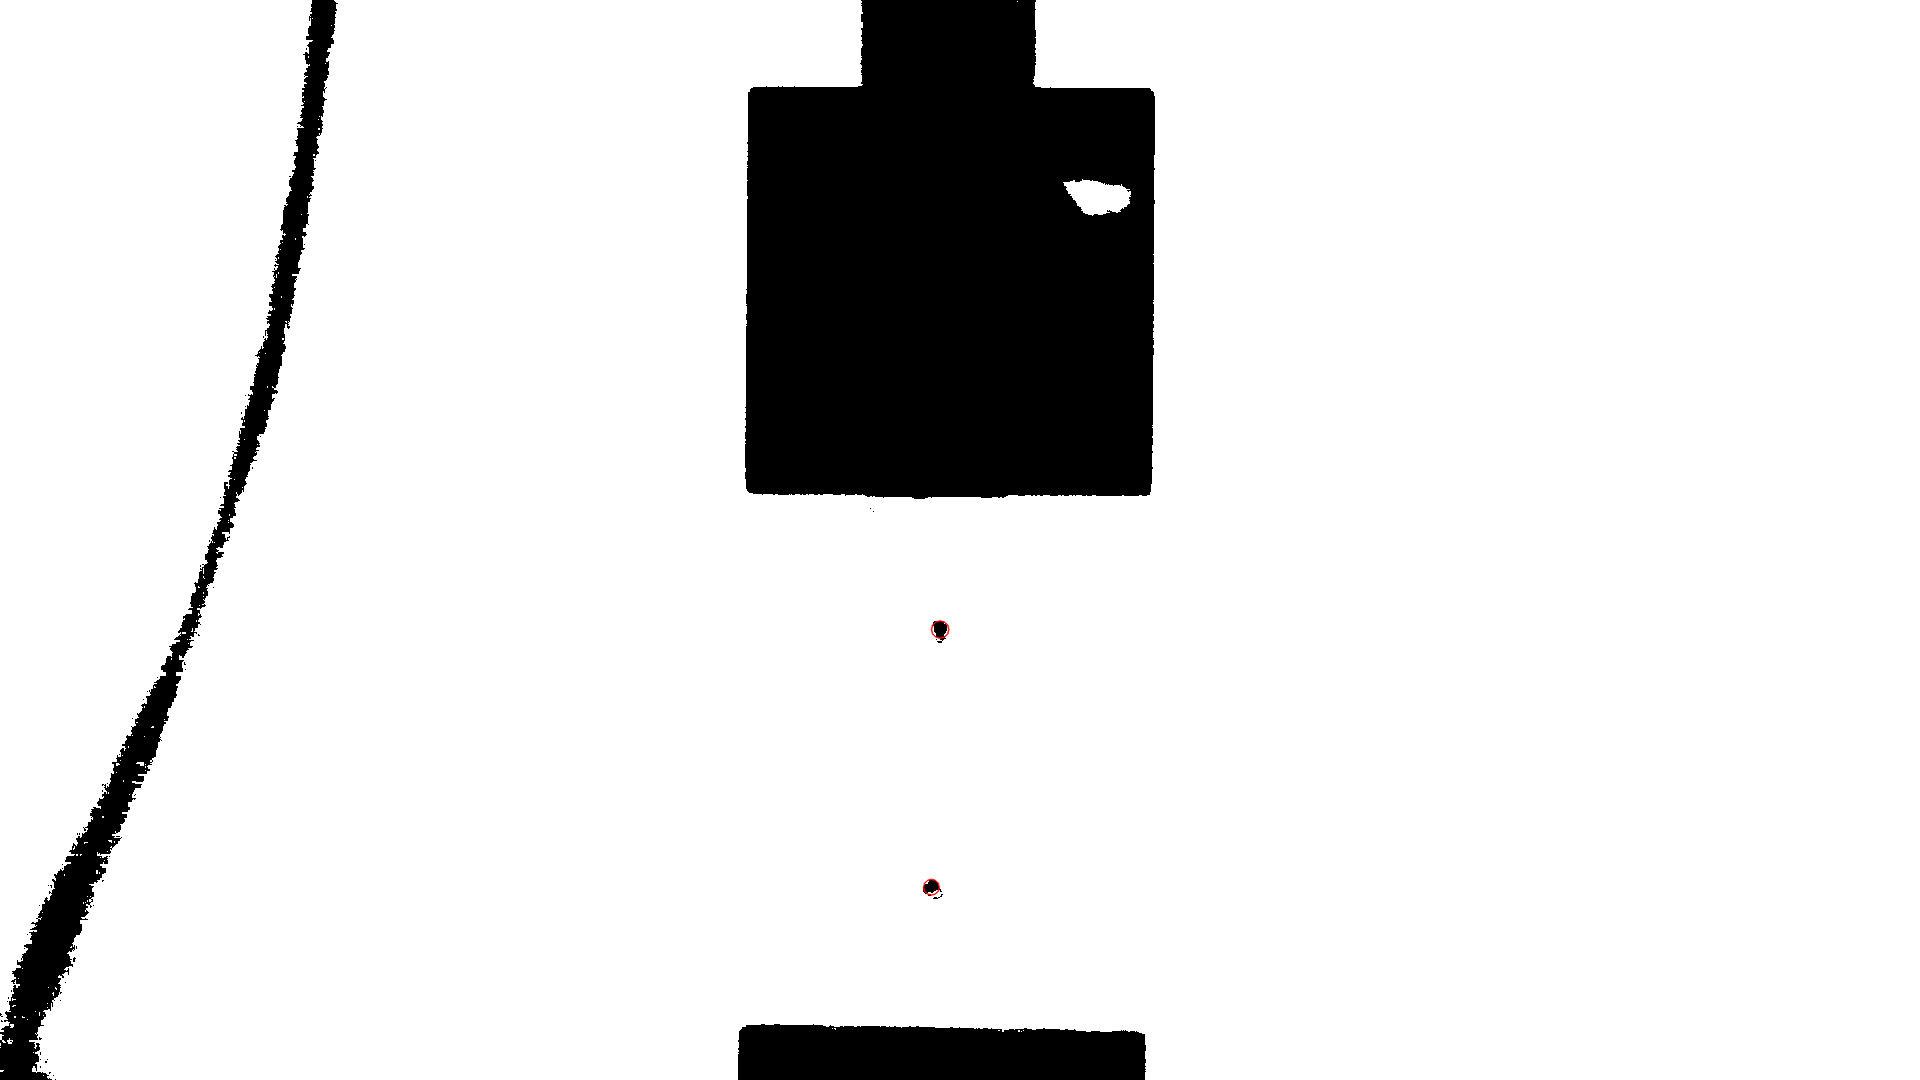

Read a new frame:  True
3


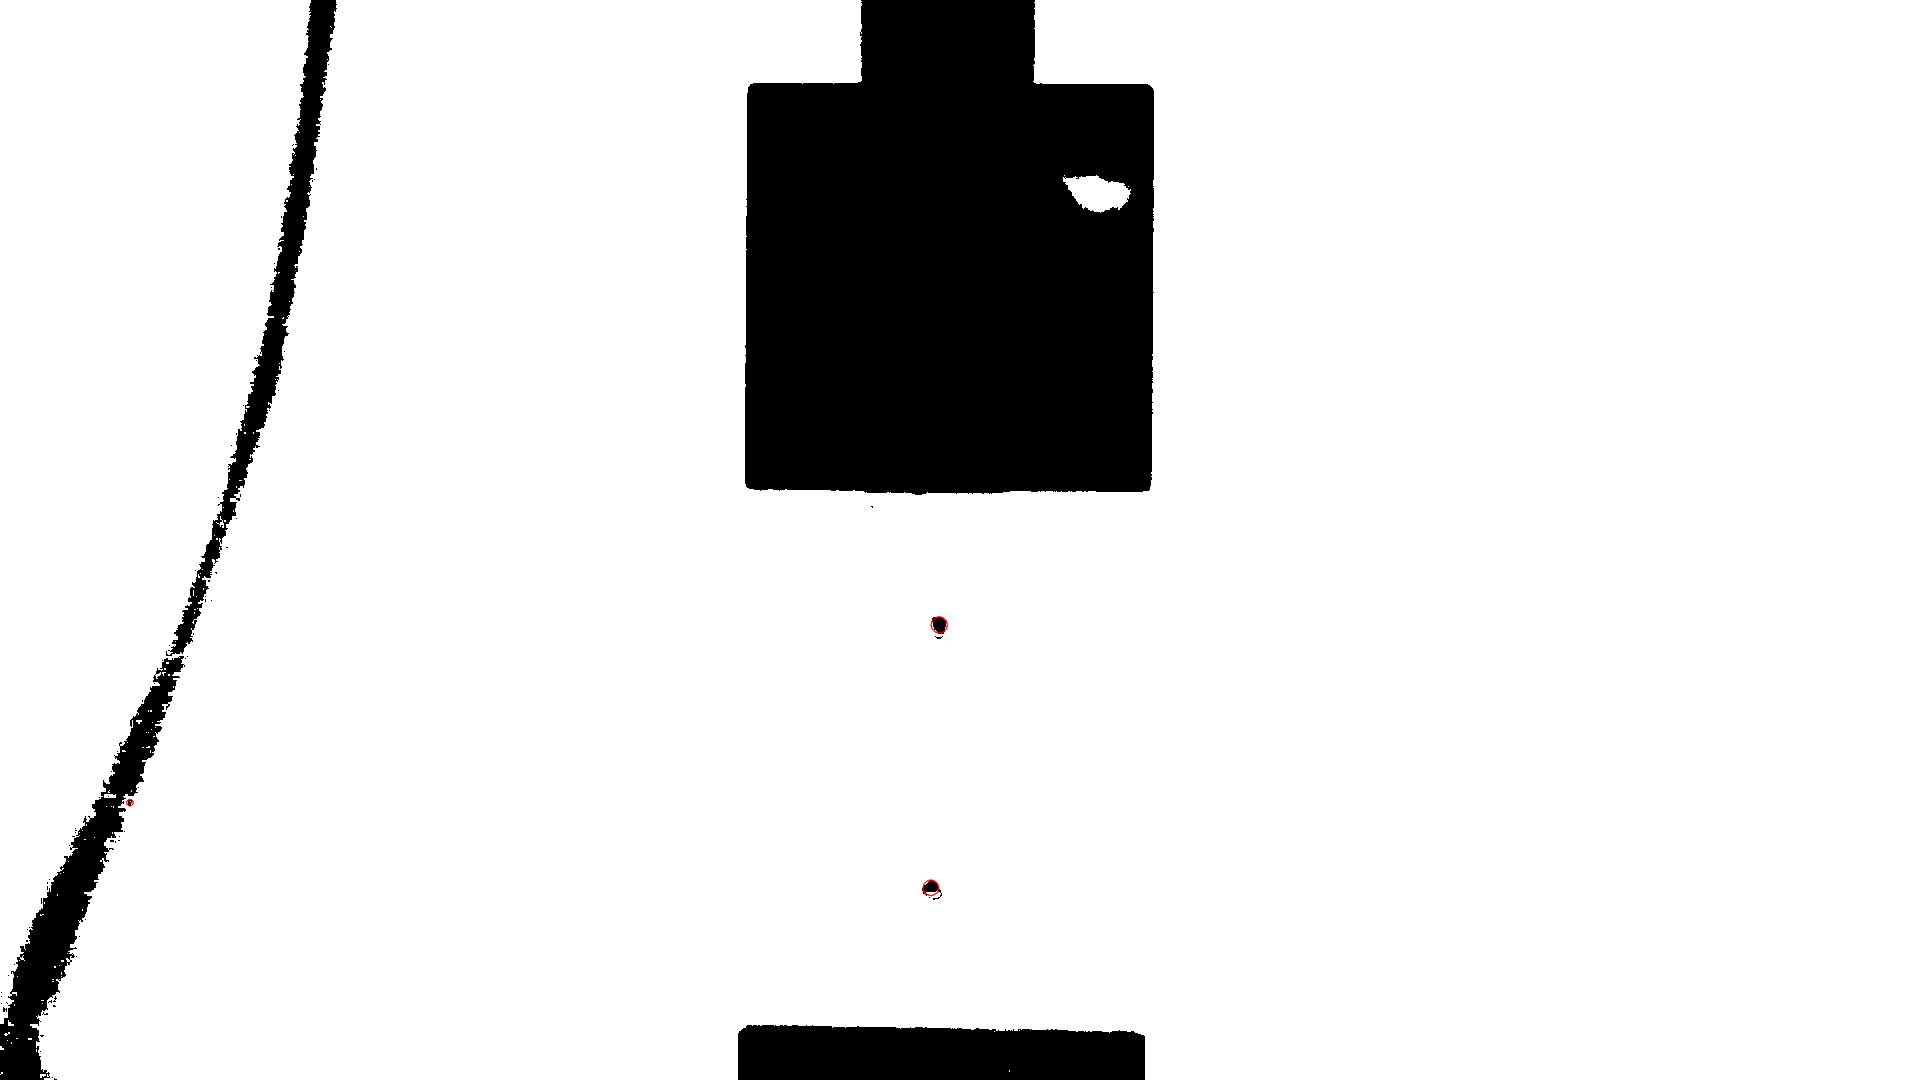

Read a new frame:  True
2


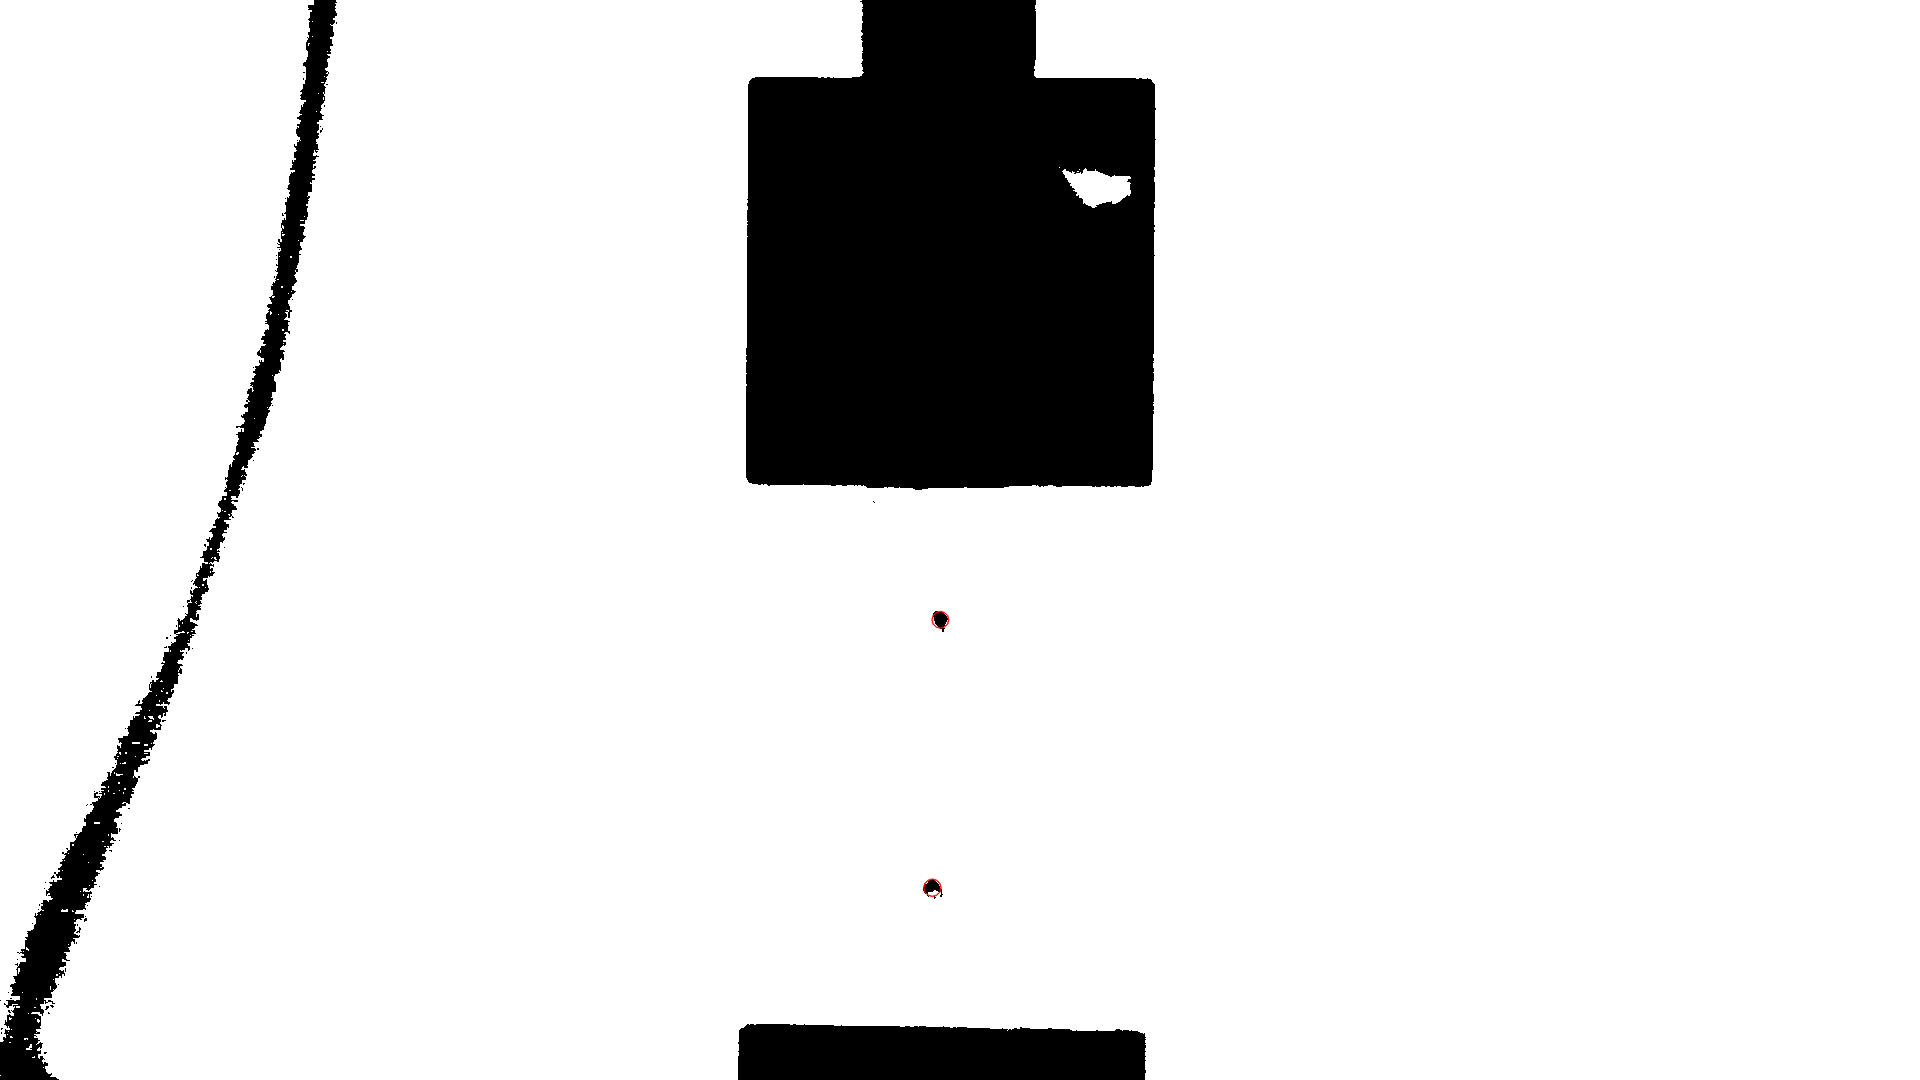

Read a new frame:  True
2


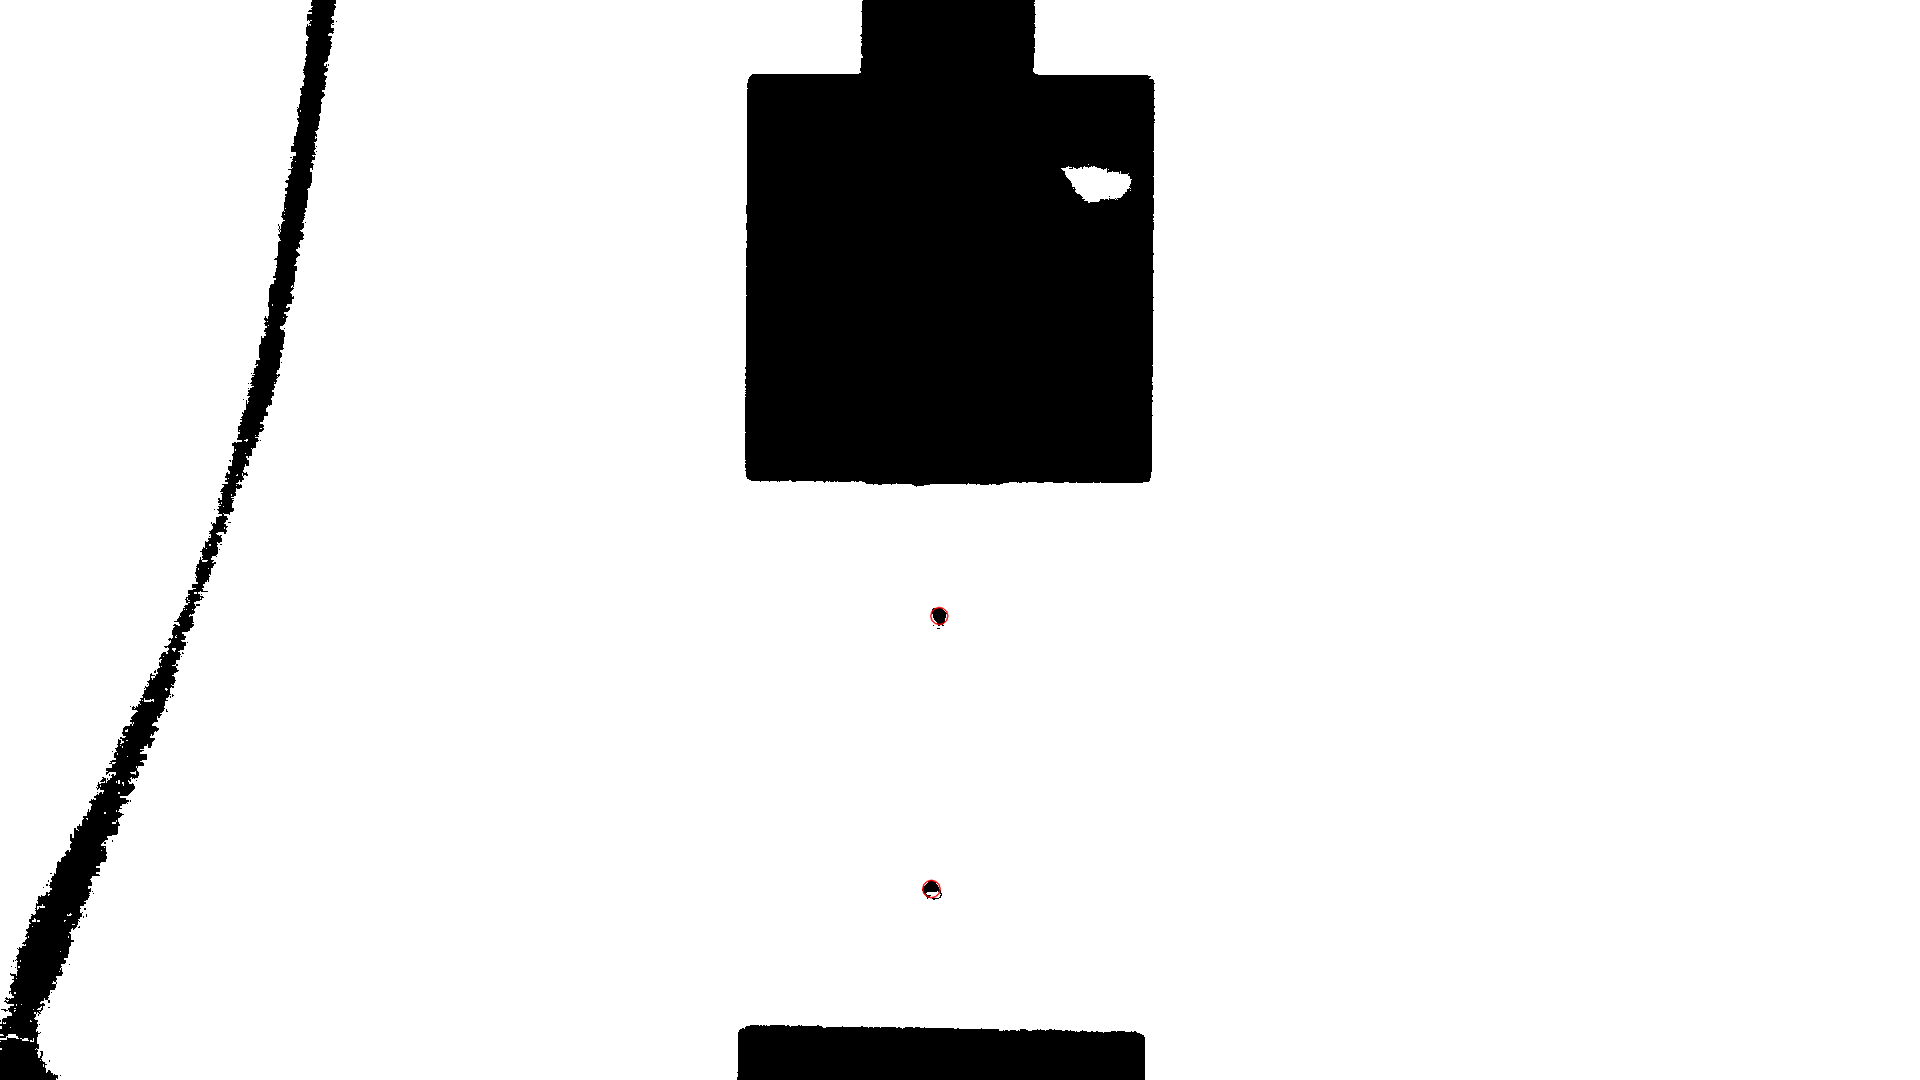

Read a new frame:  True
4


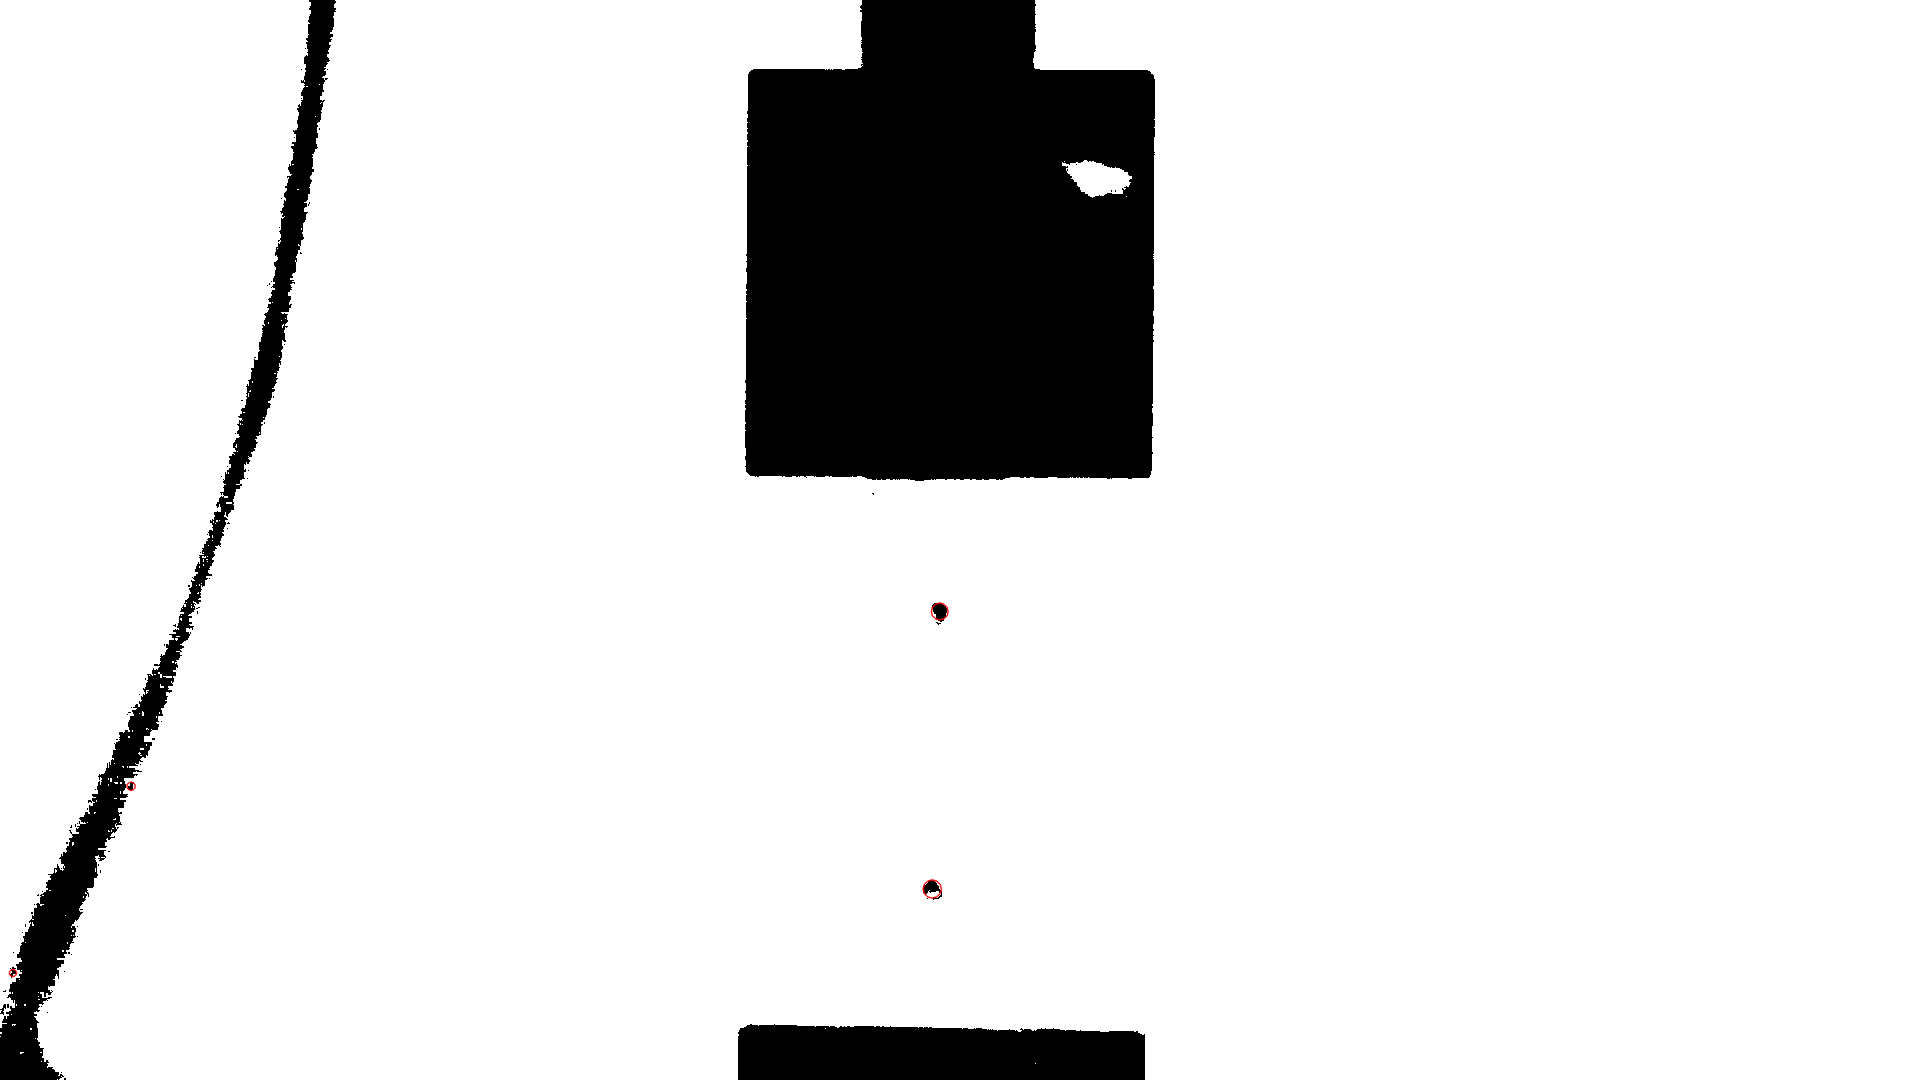

Read a new frame:  True
2


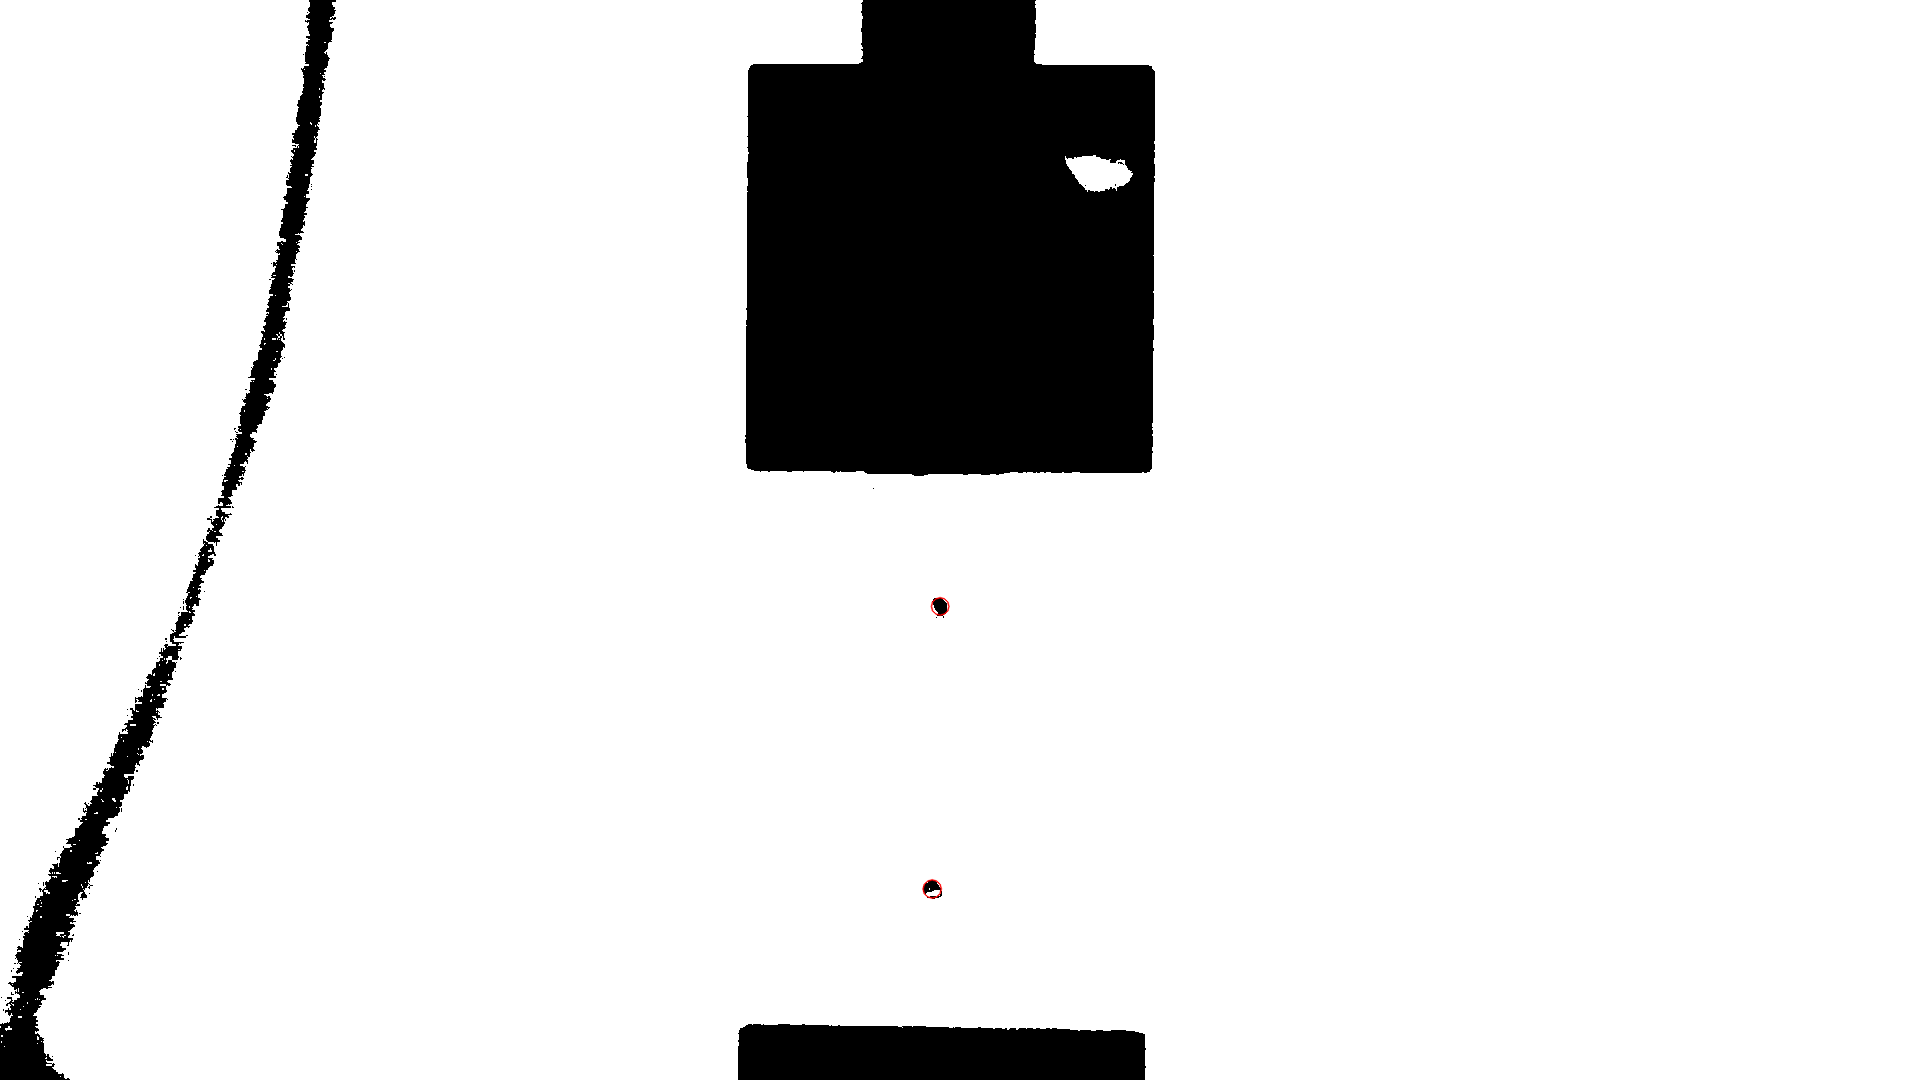

Read a new frame:  True
3


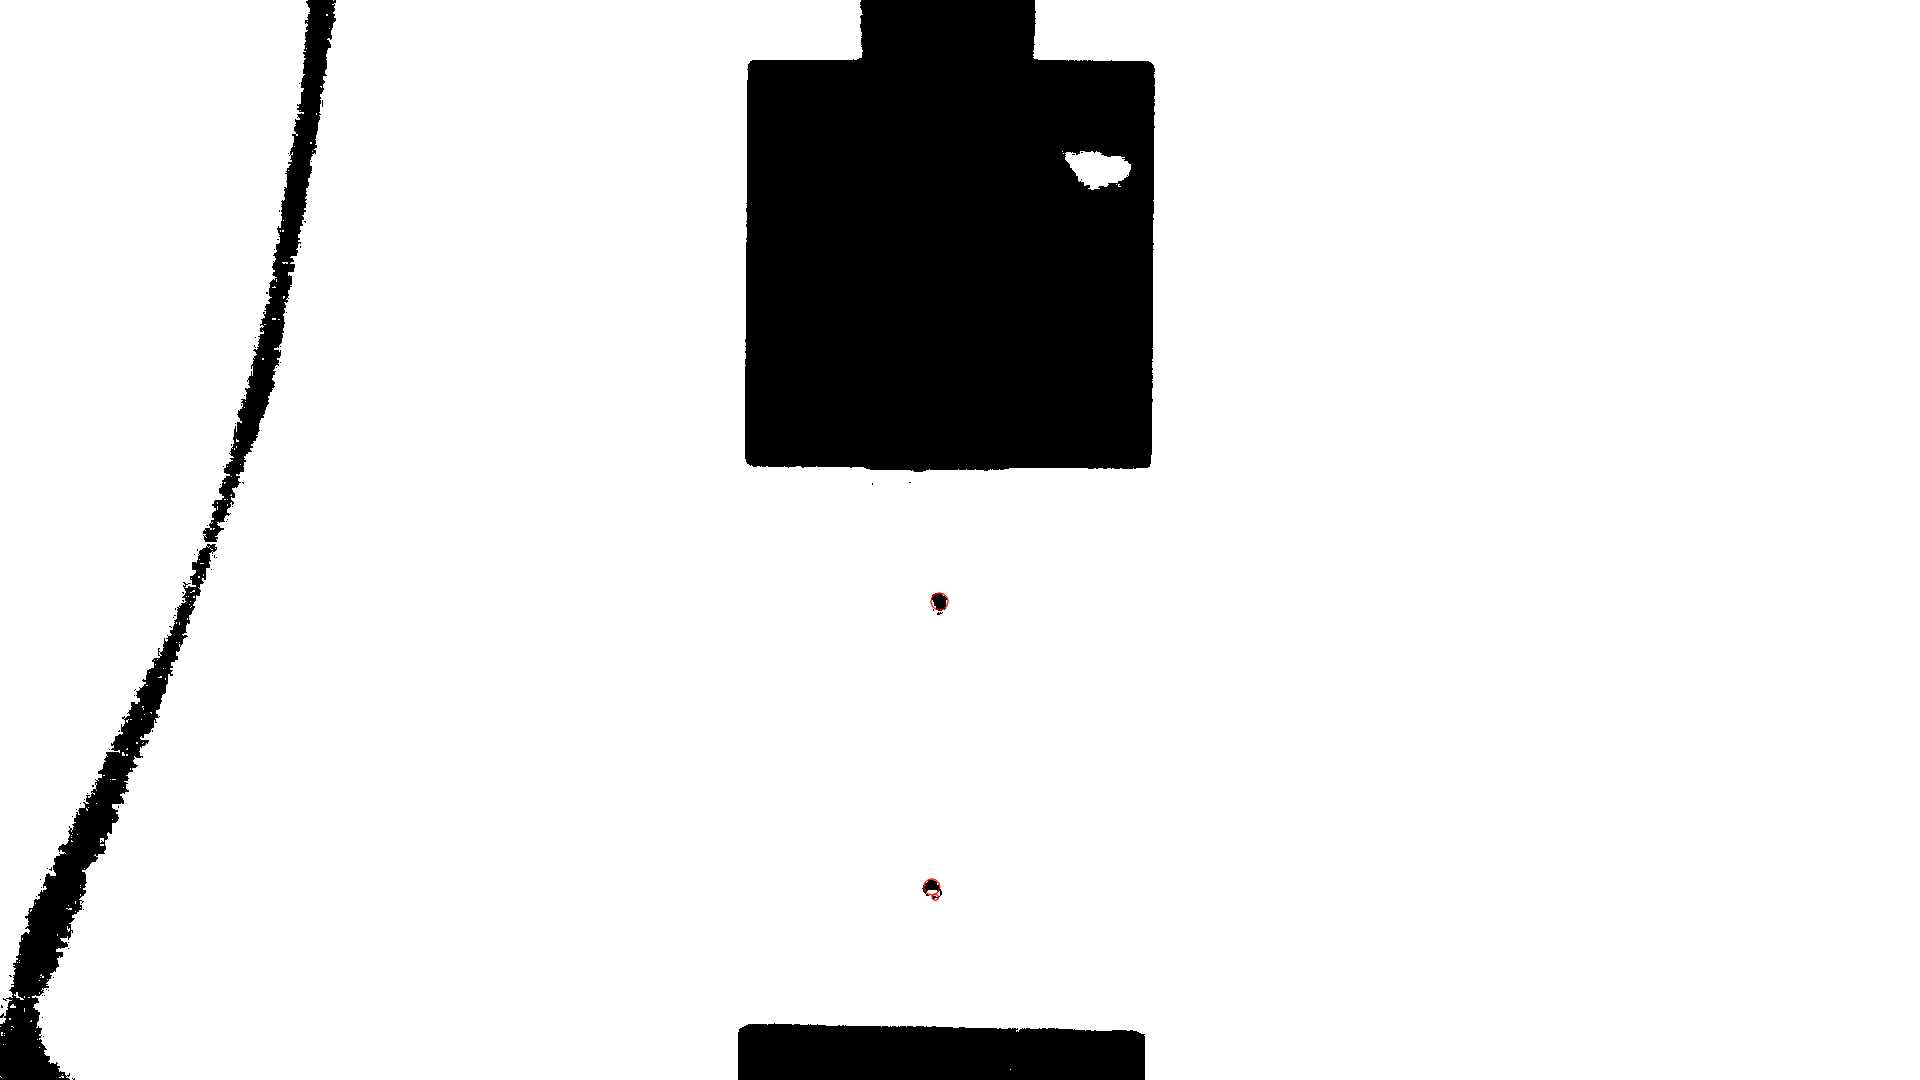

Read a new frame:  True
2


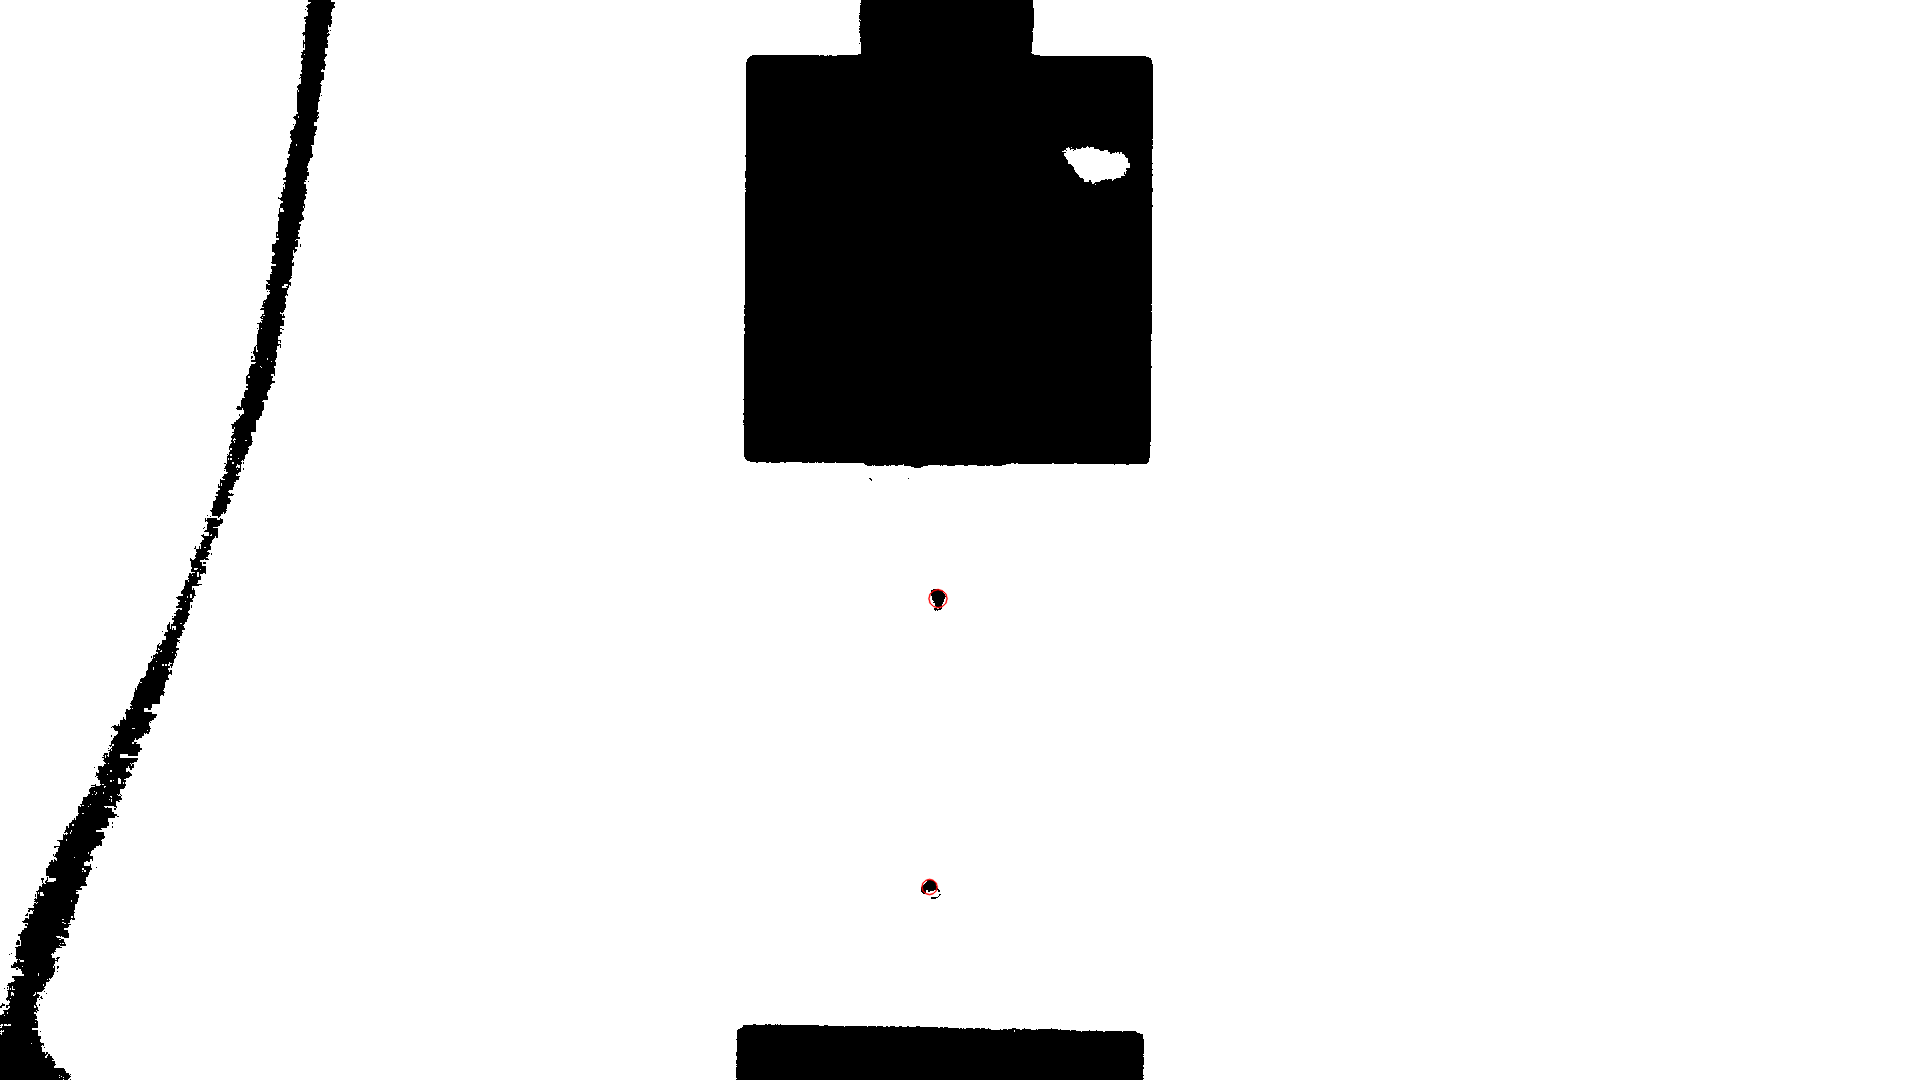

Read a new frame:  True
2


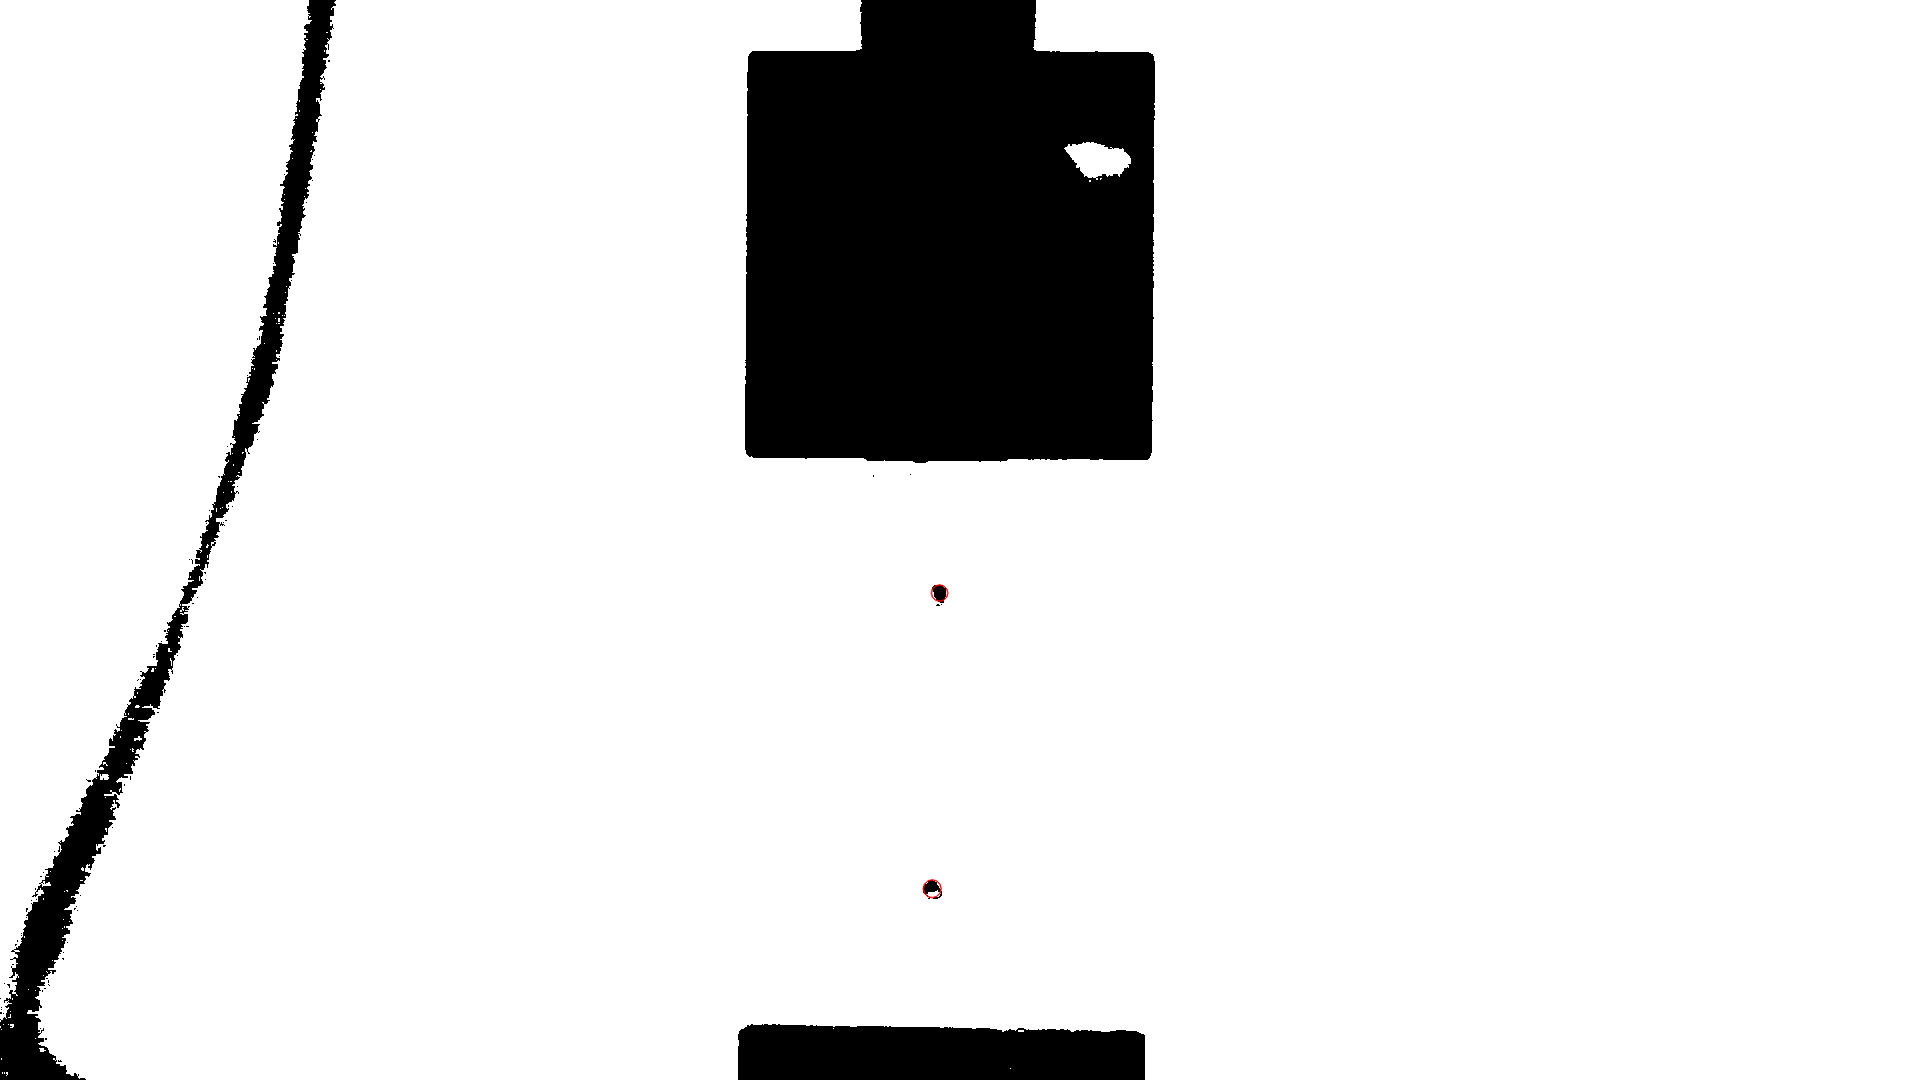

Read a new frame:  True
2


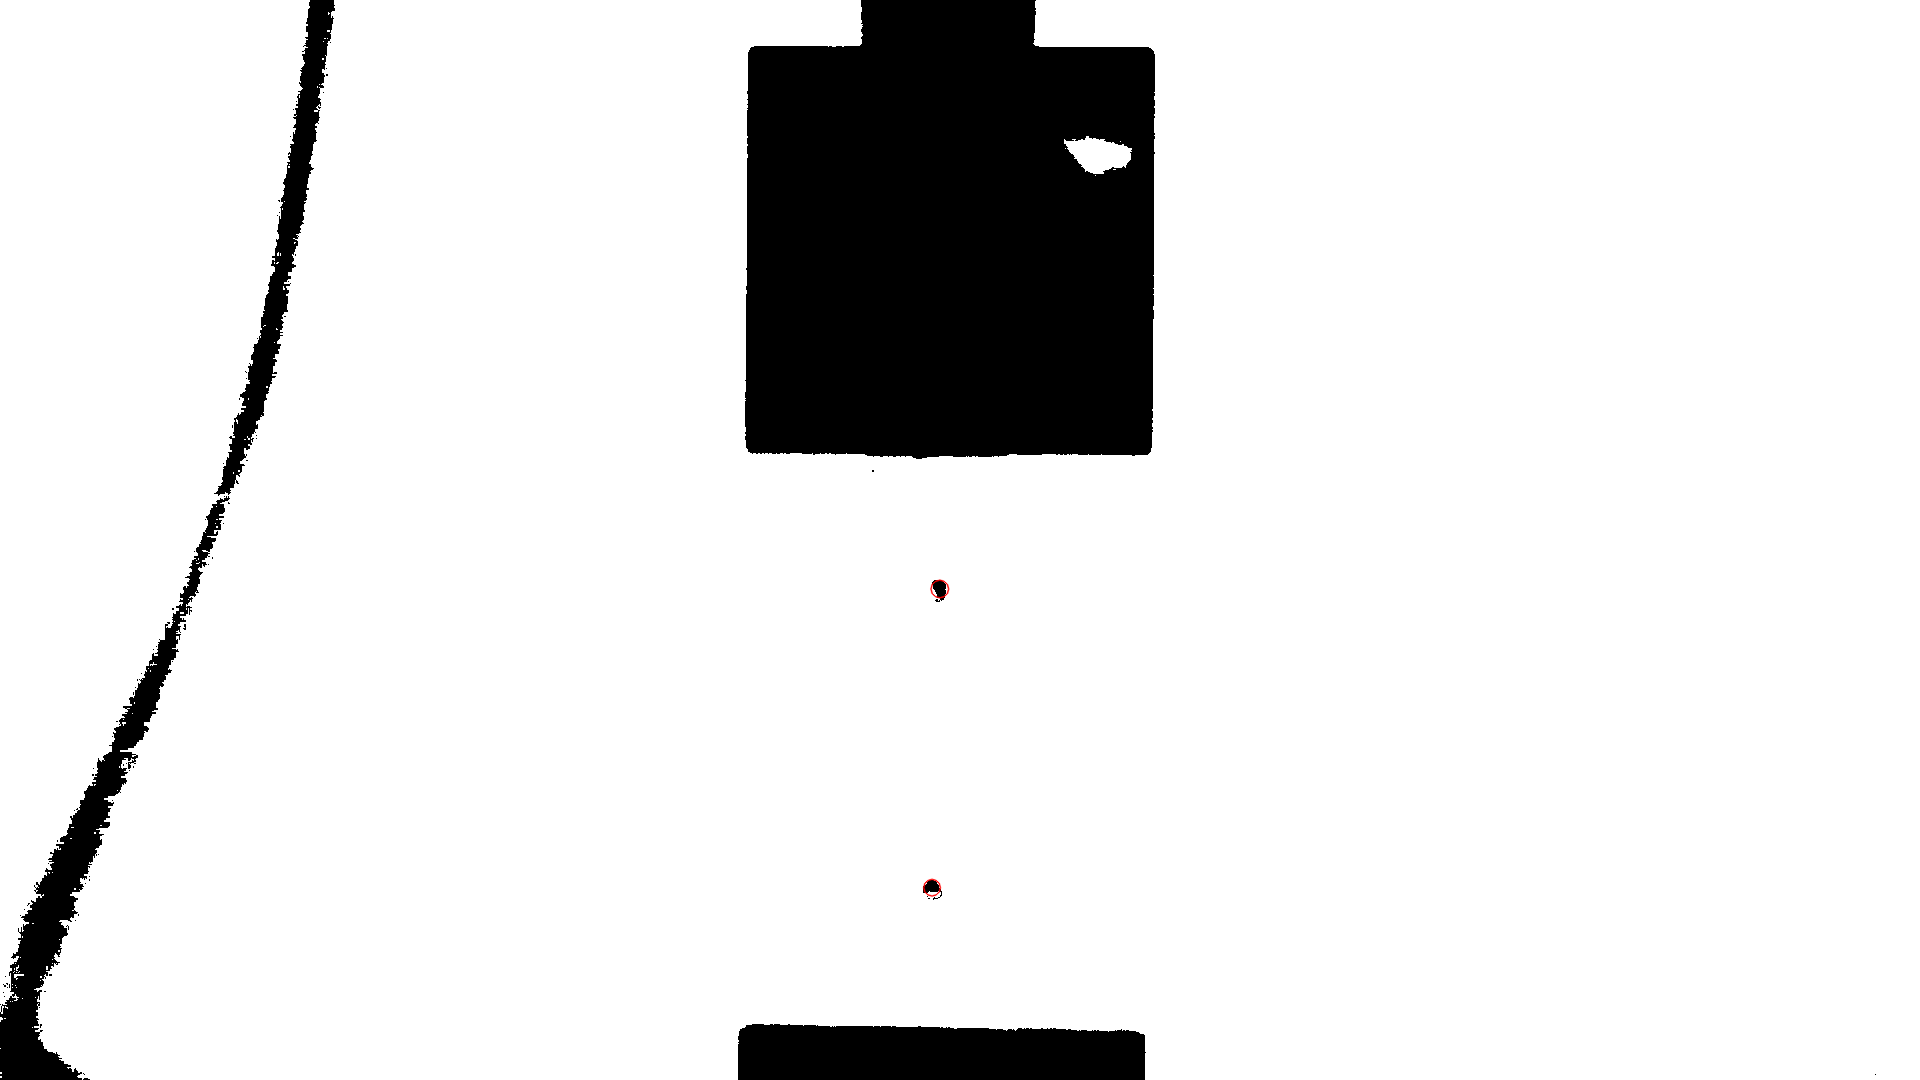

Read a new frame:  True
2


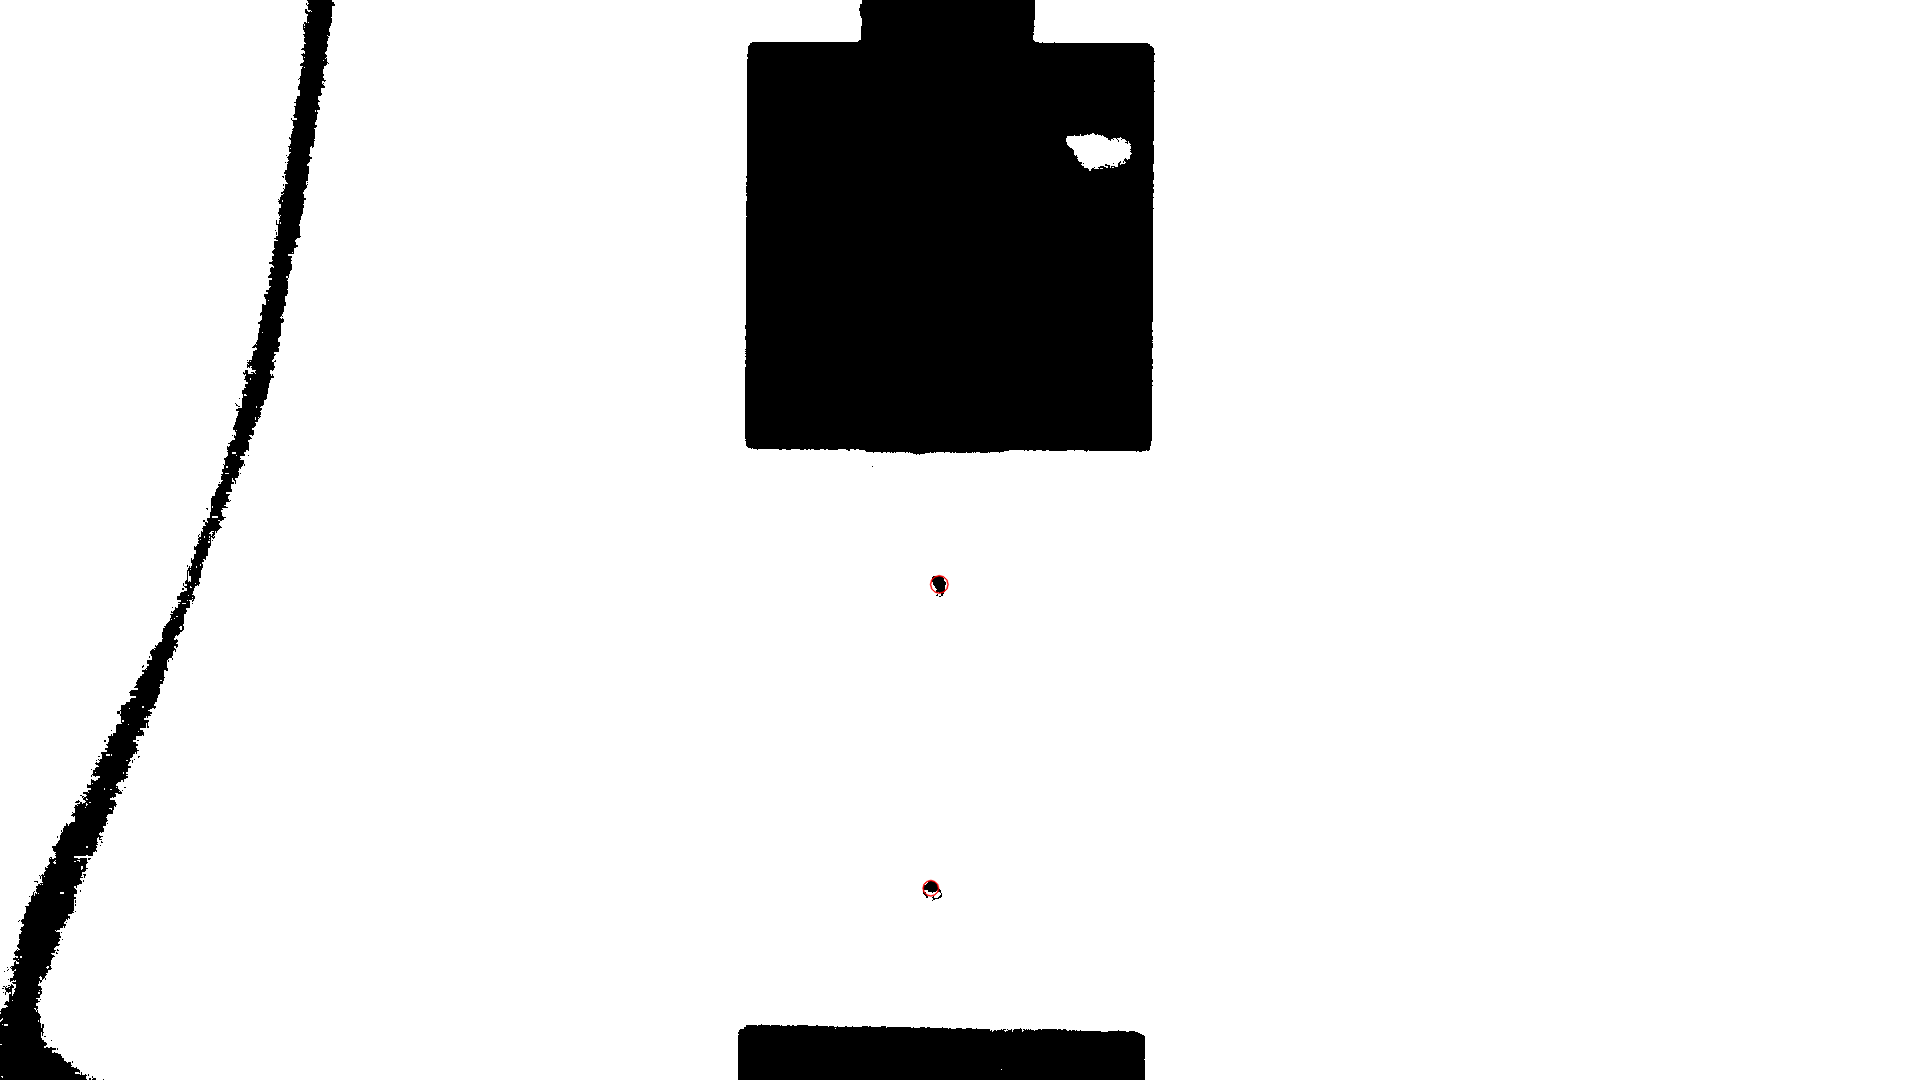

Read a new frame:  True
2


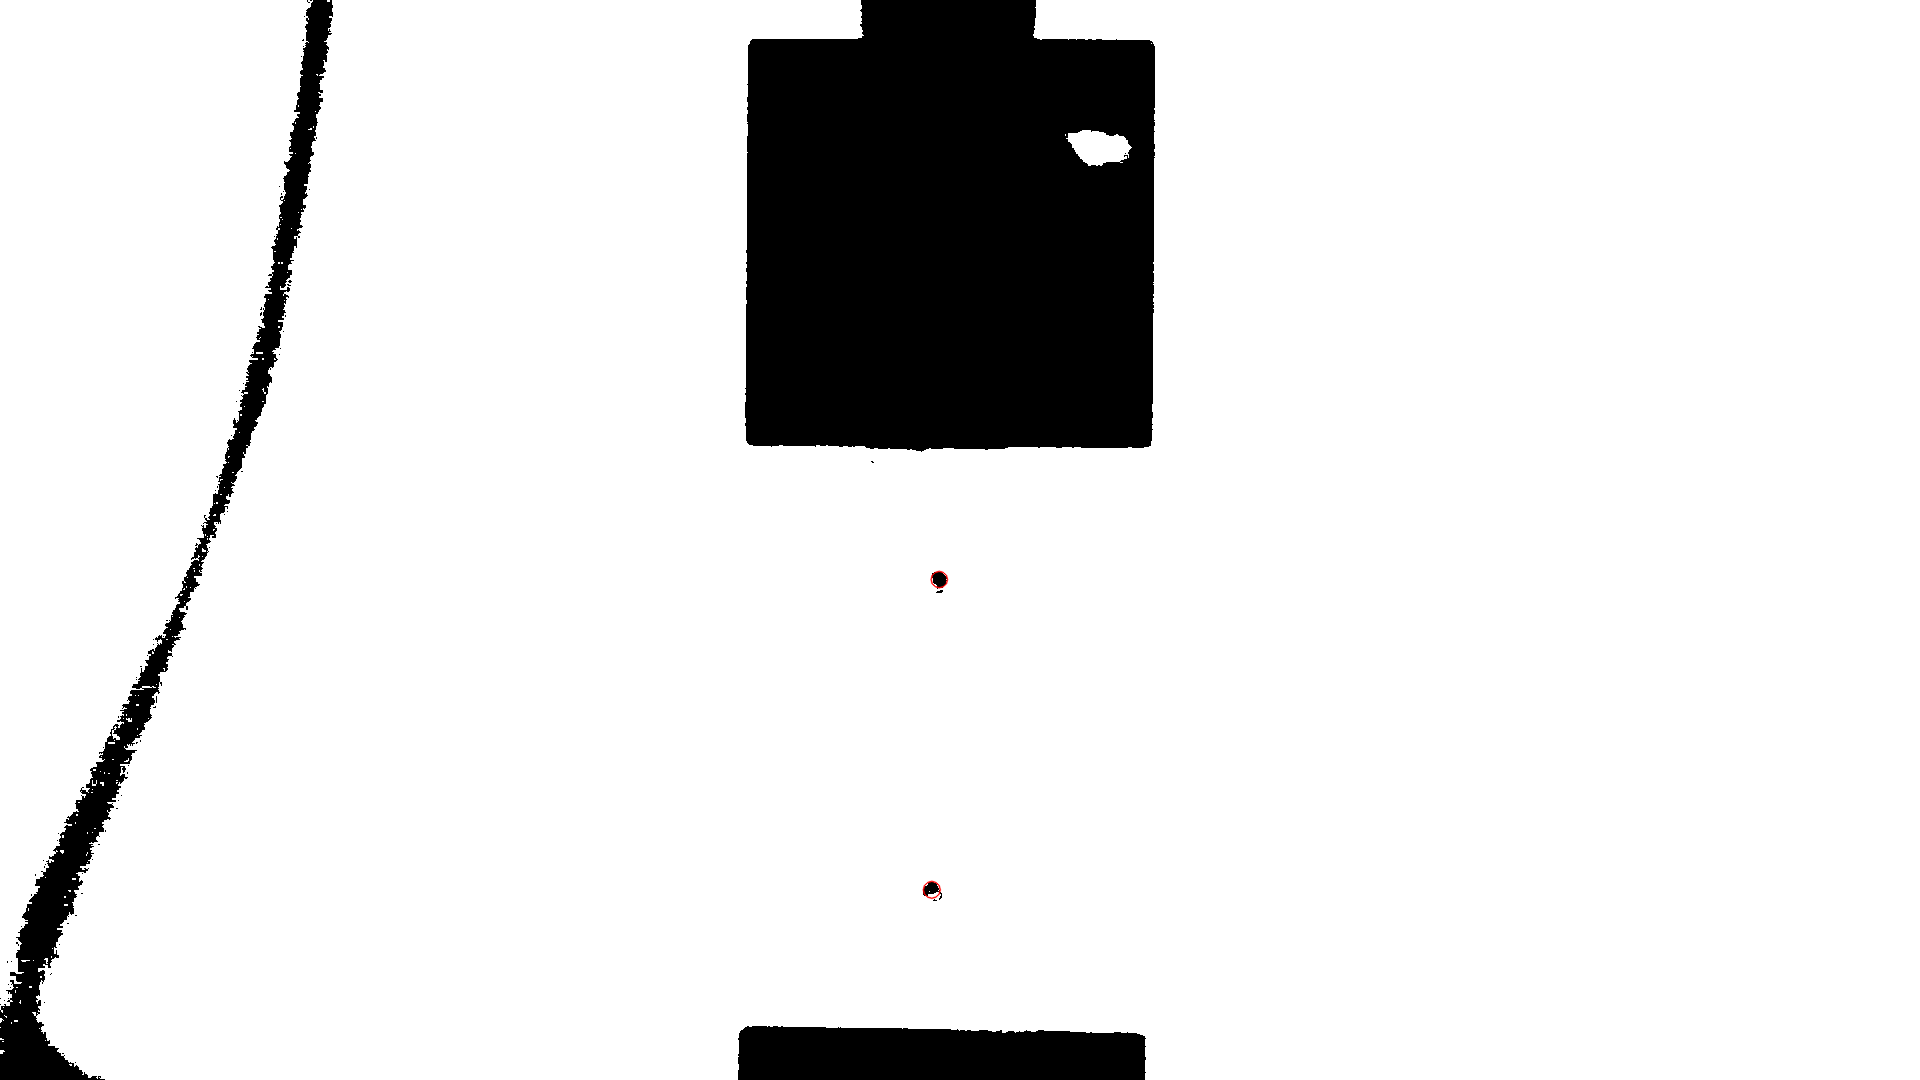

Read a new frame:  True
2


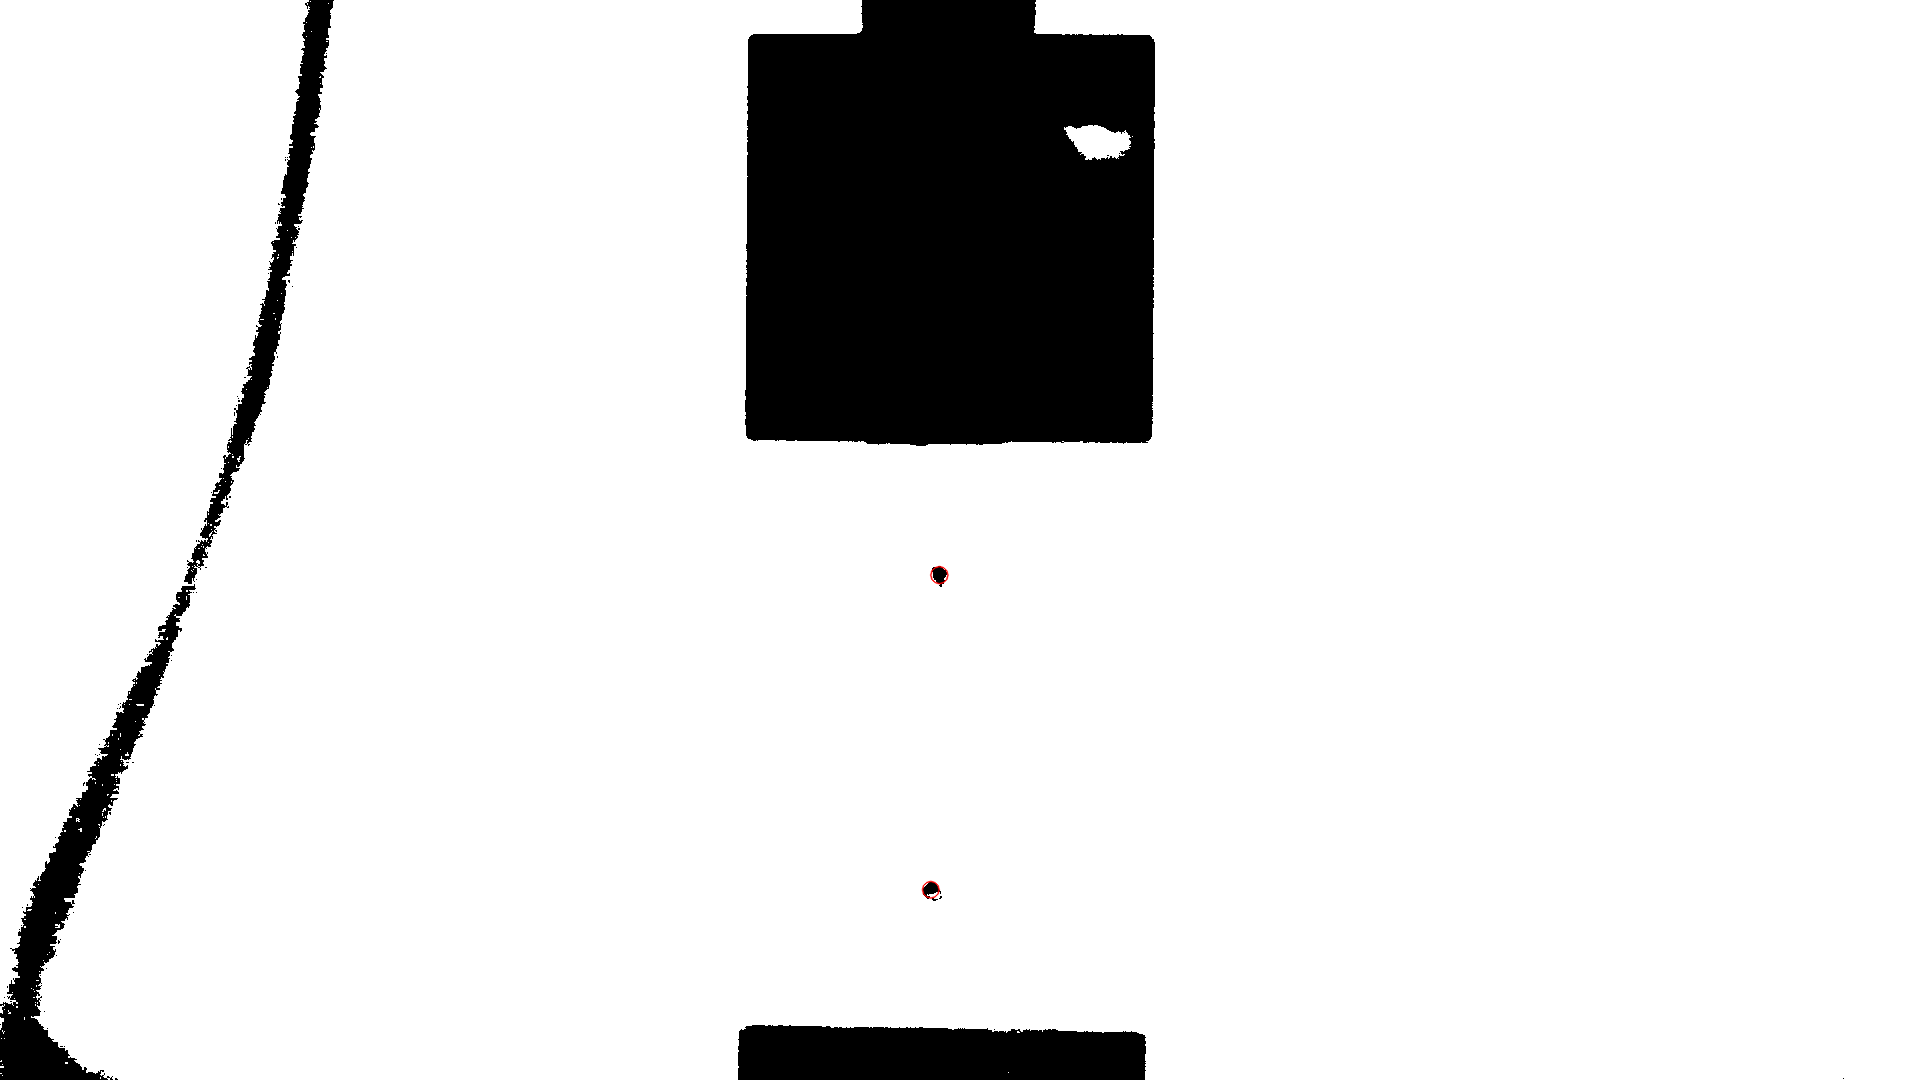

Read a new frame:  True
2


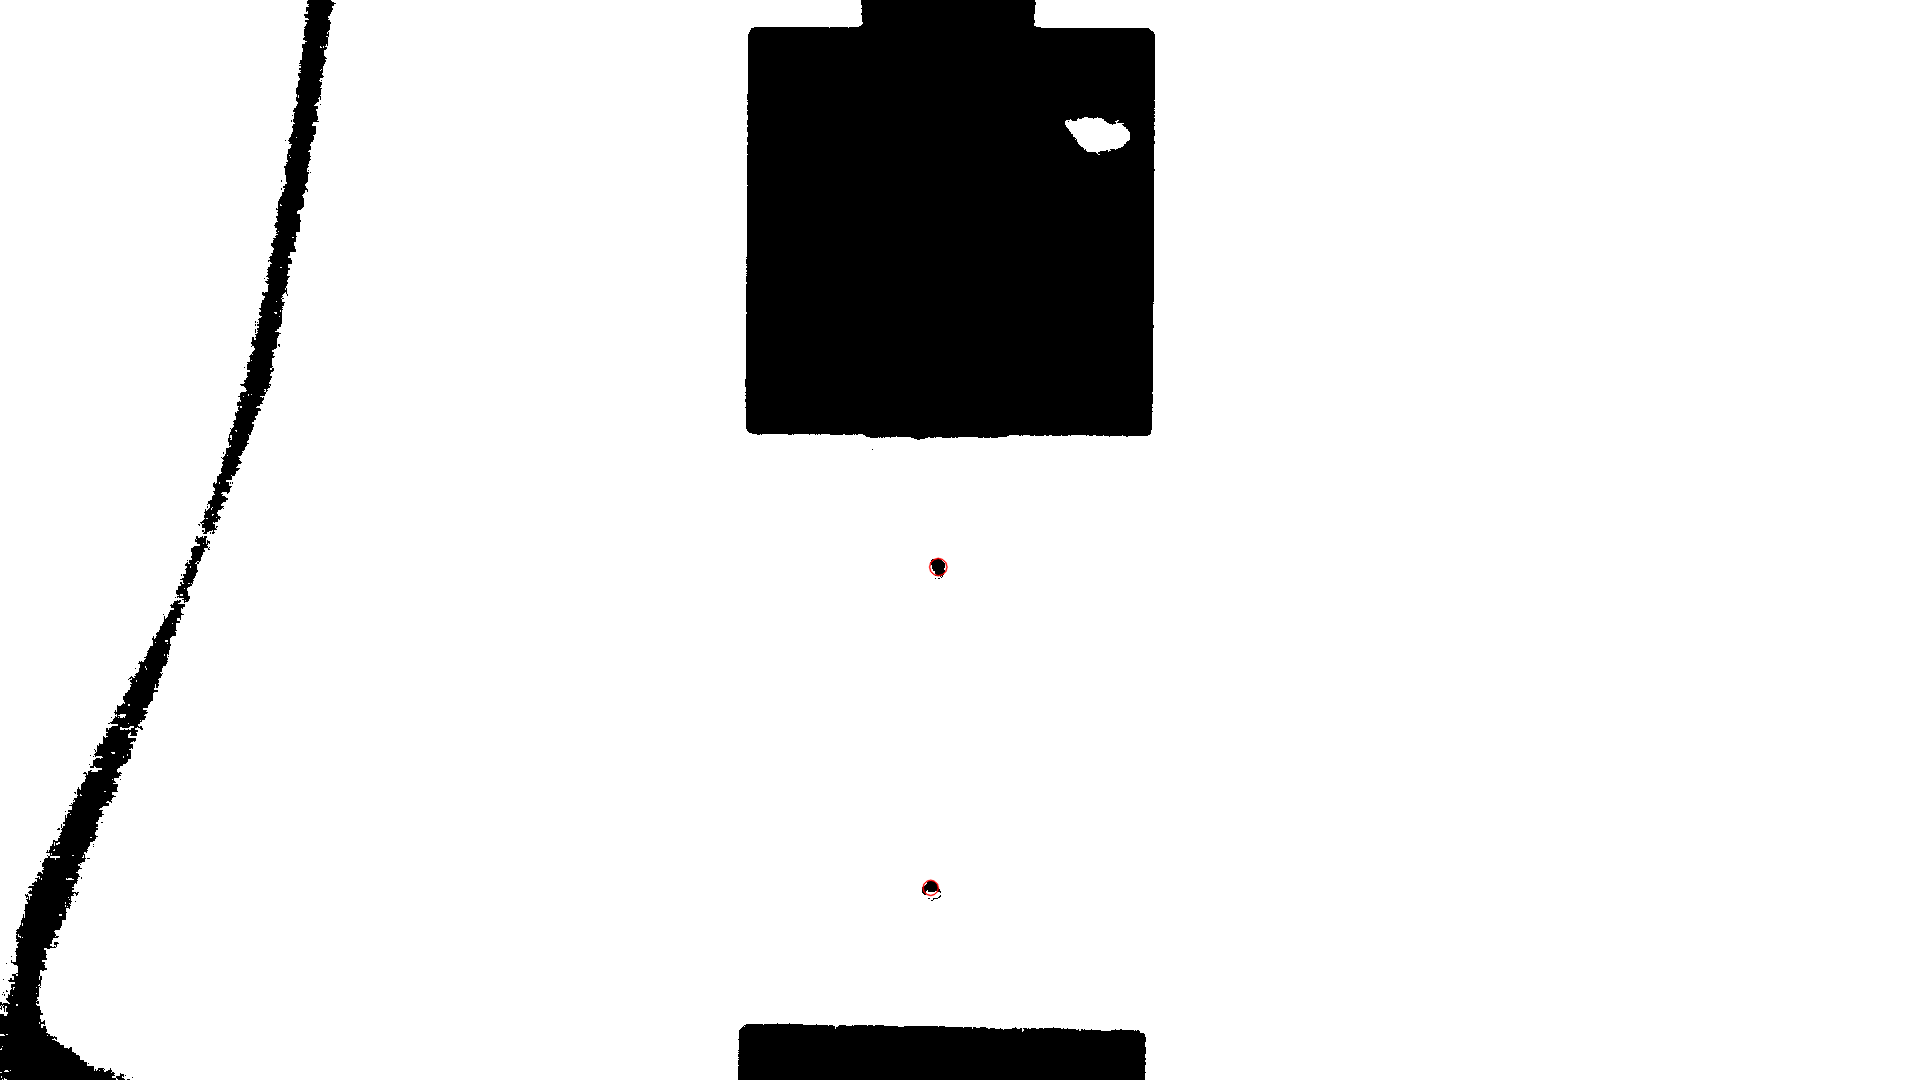

Read a new frame:  True
2


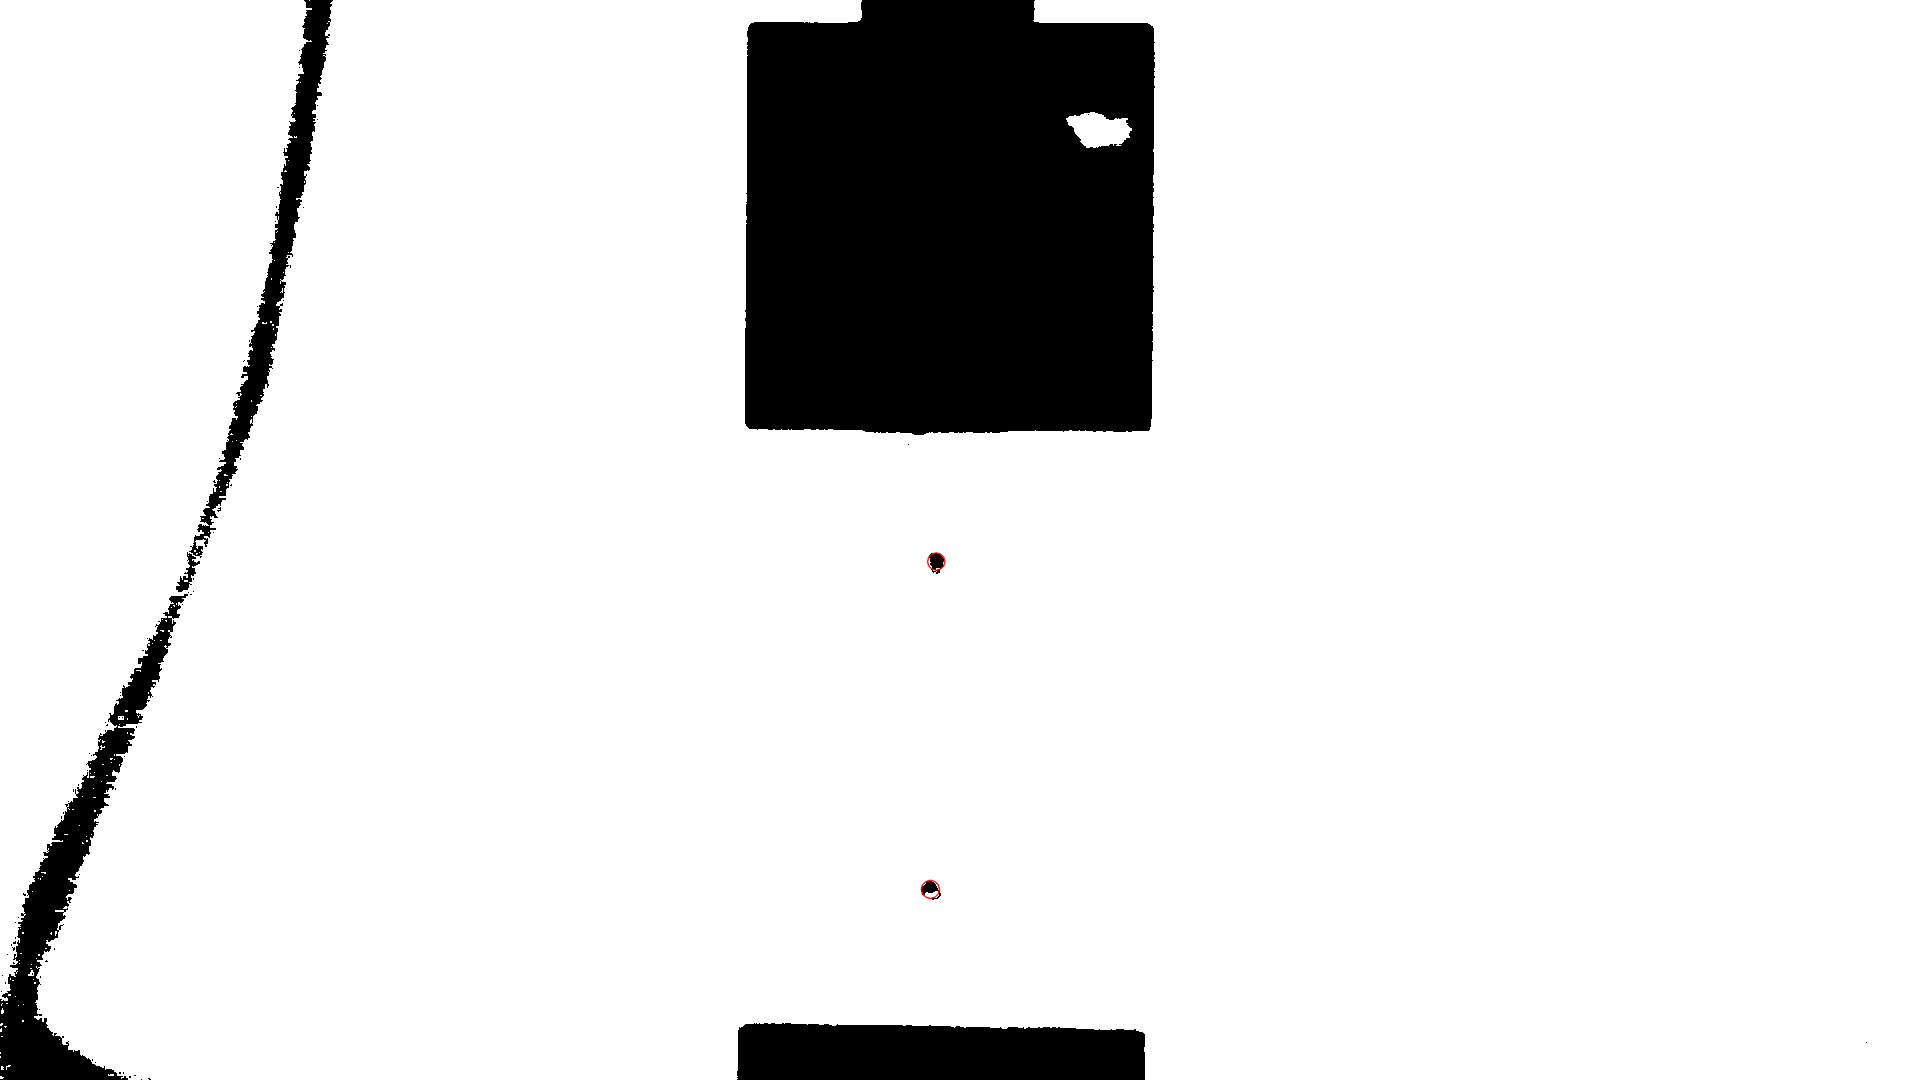

Read a new frame:  True
4


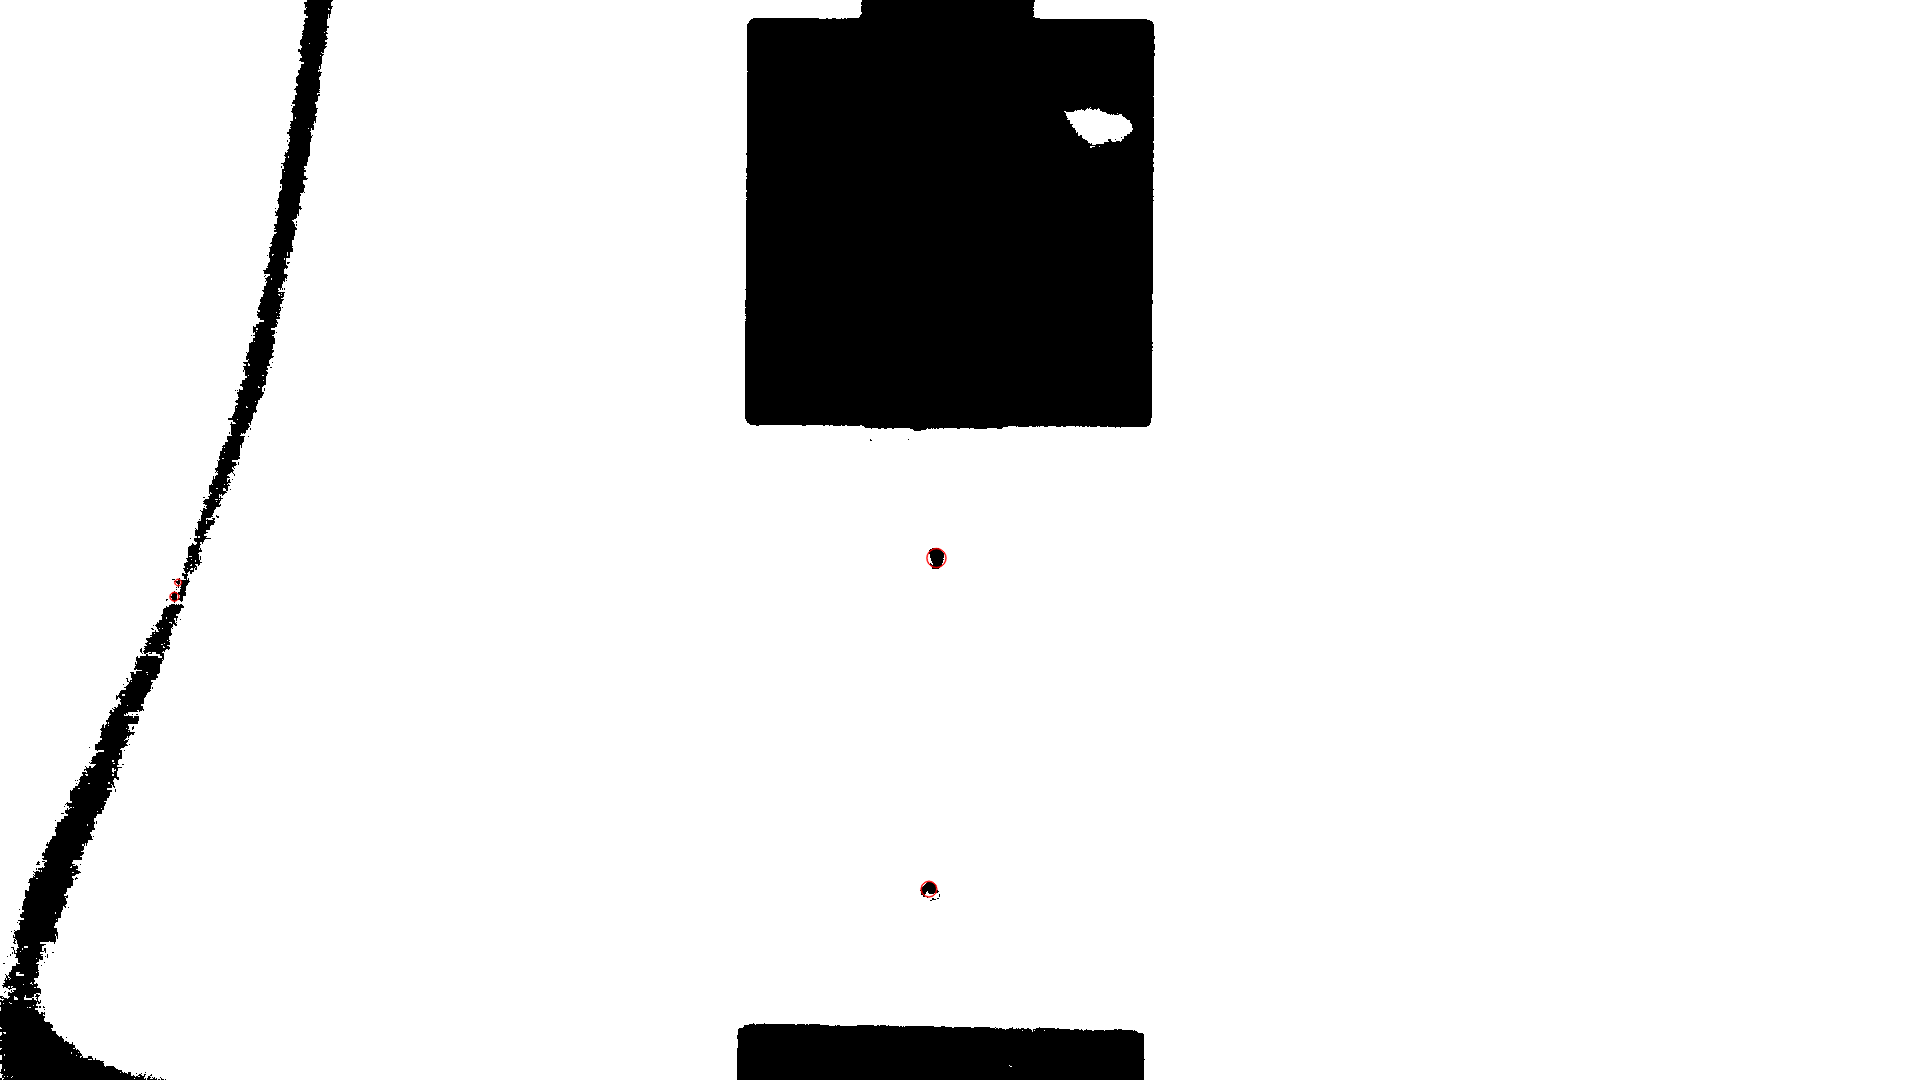

Read a new frame:  True
2


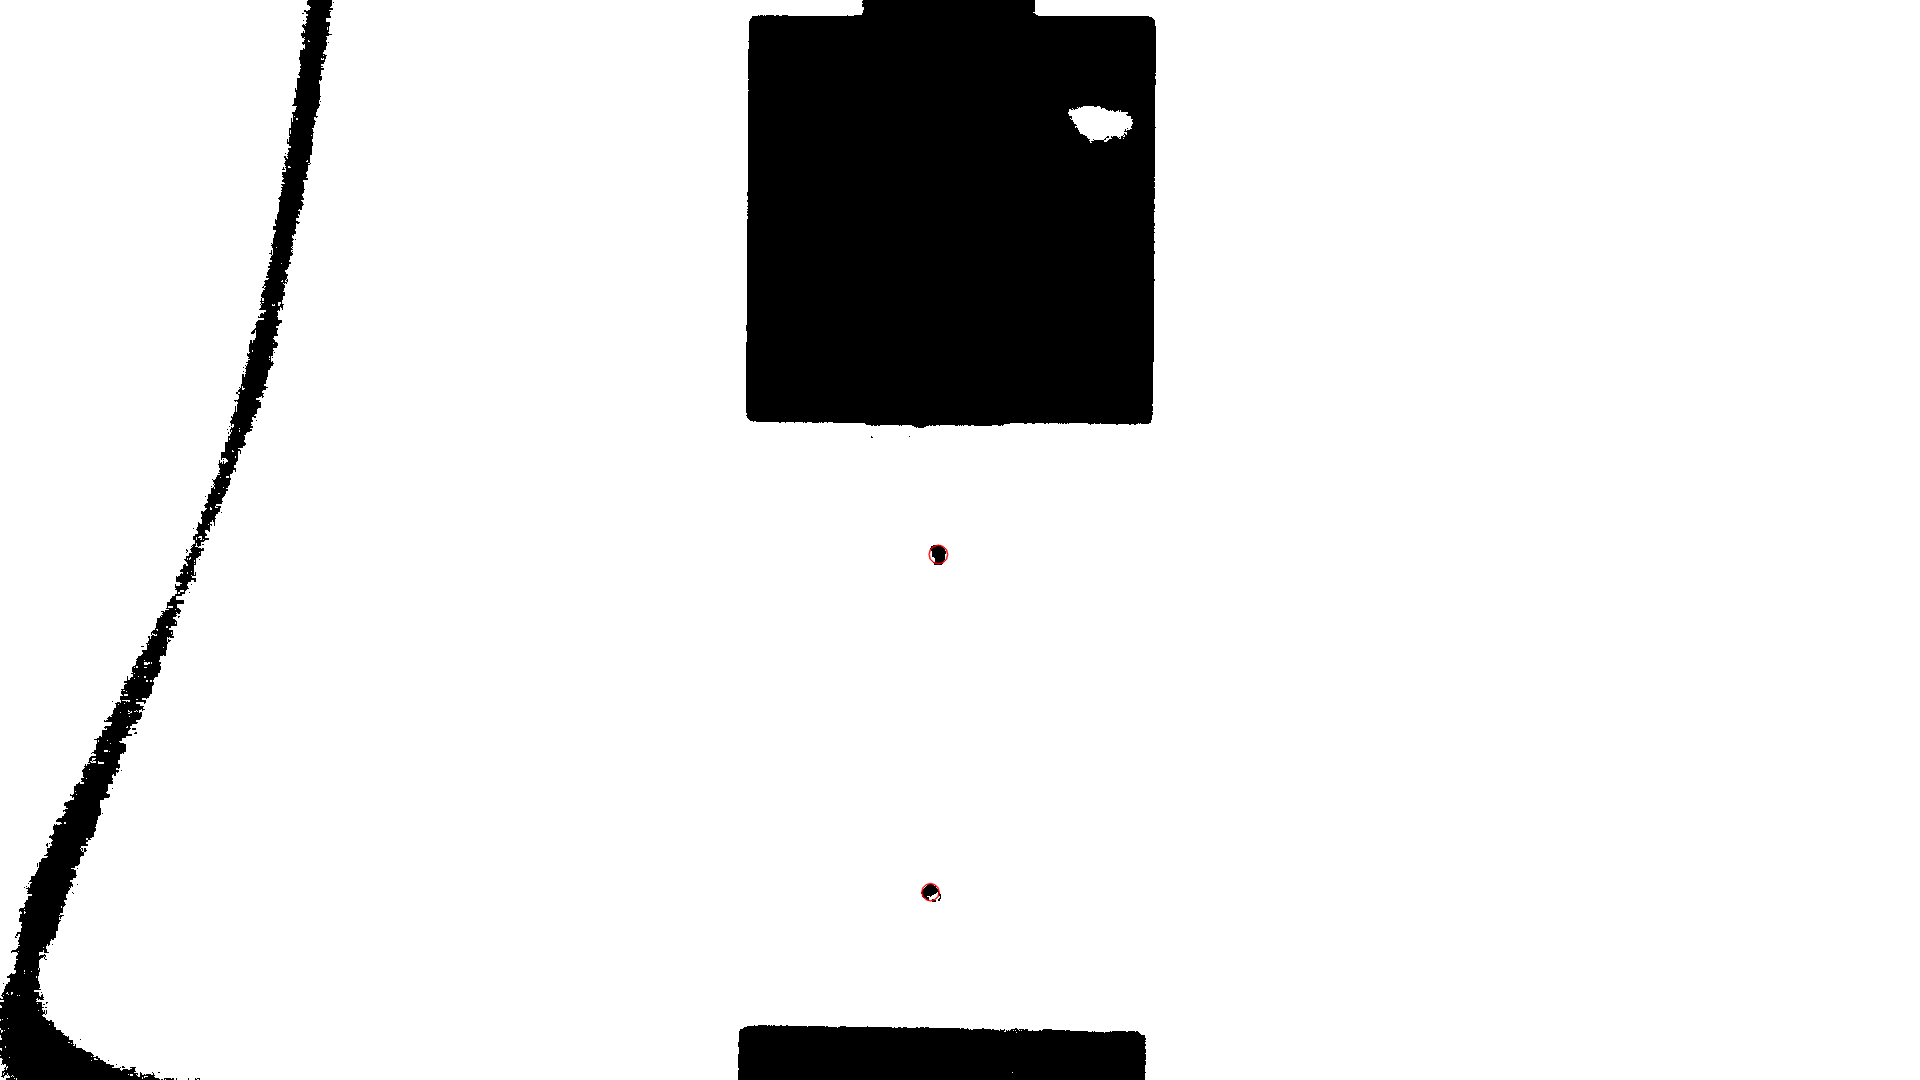

Read a new frame:  True
2


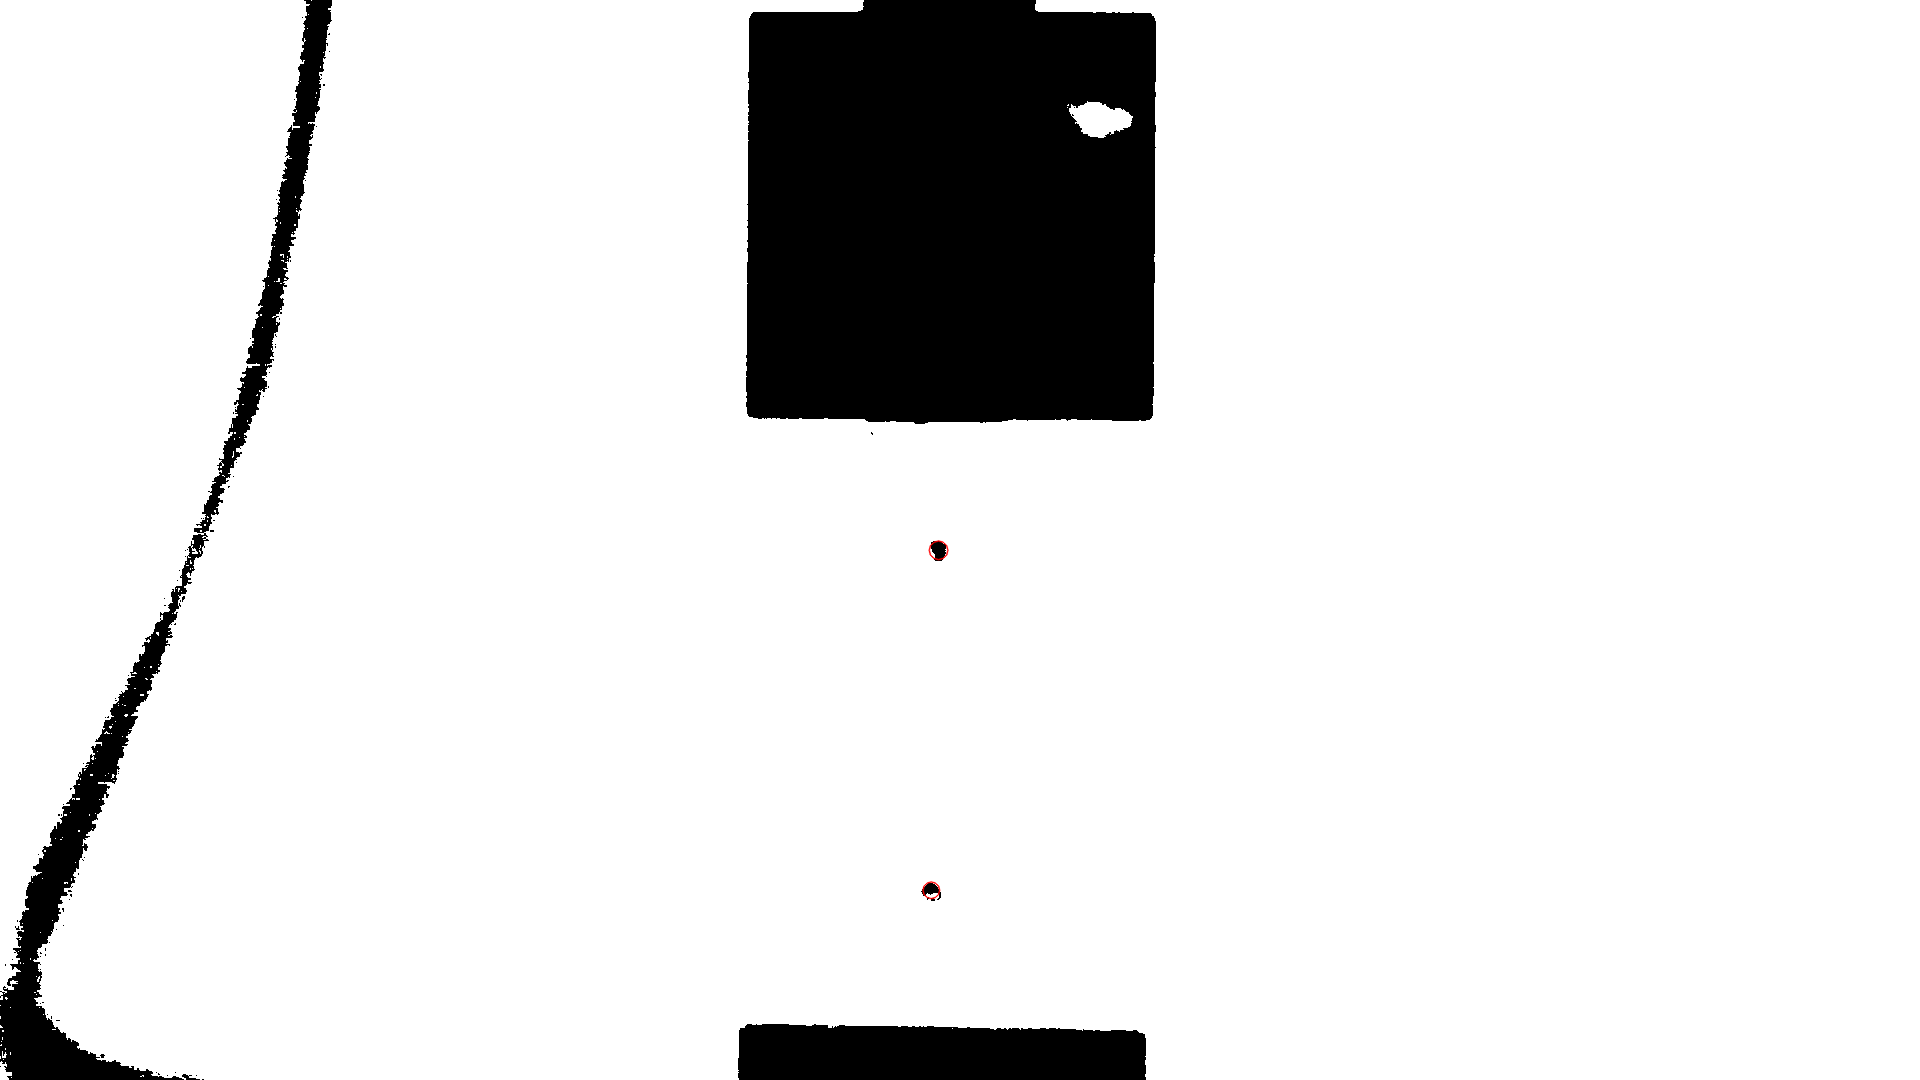

Read a new frame:  True
4


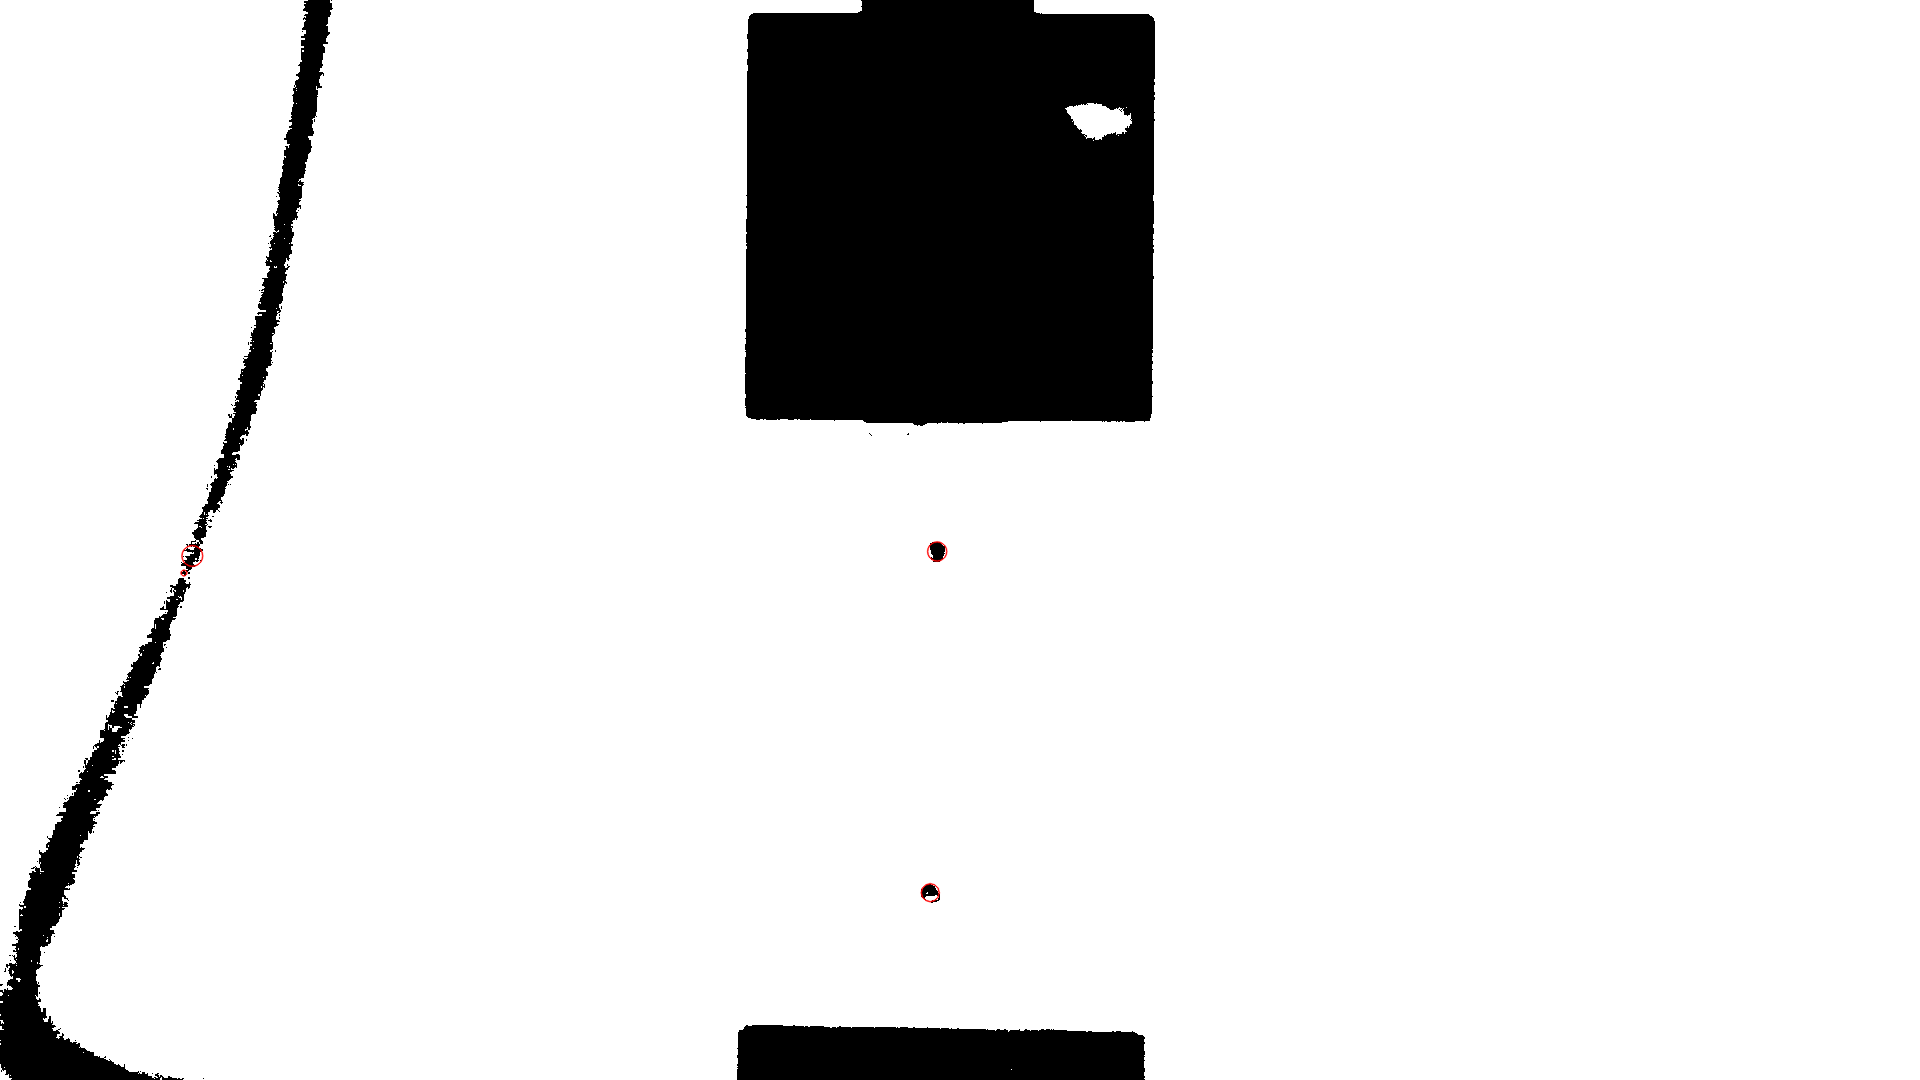

Read a new frame:  True
3


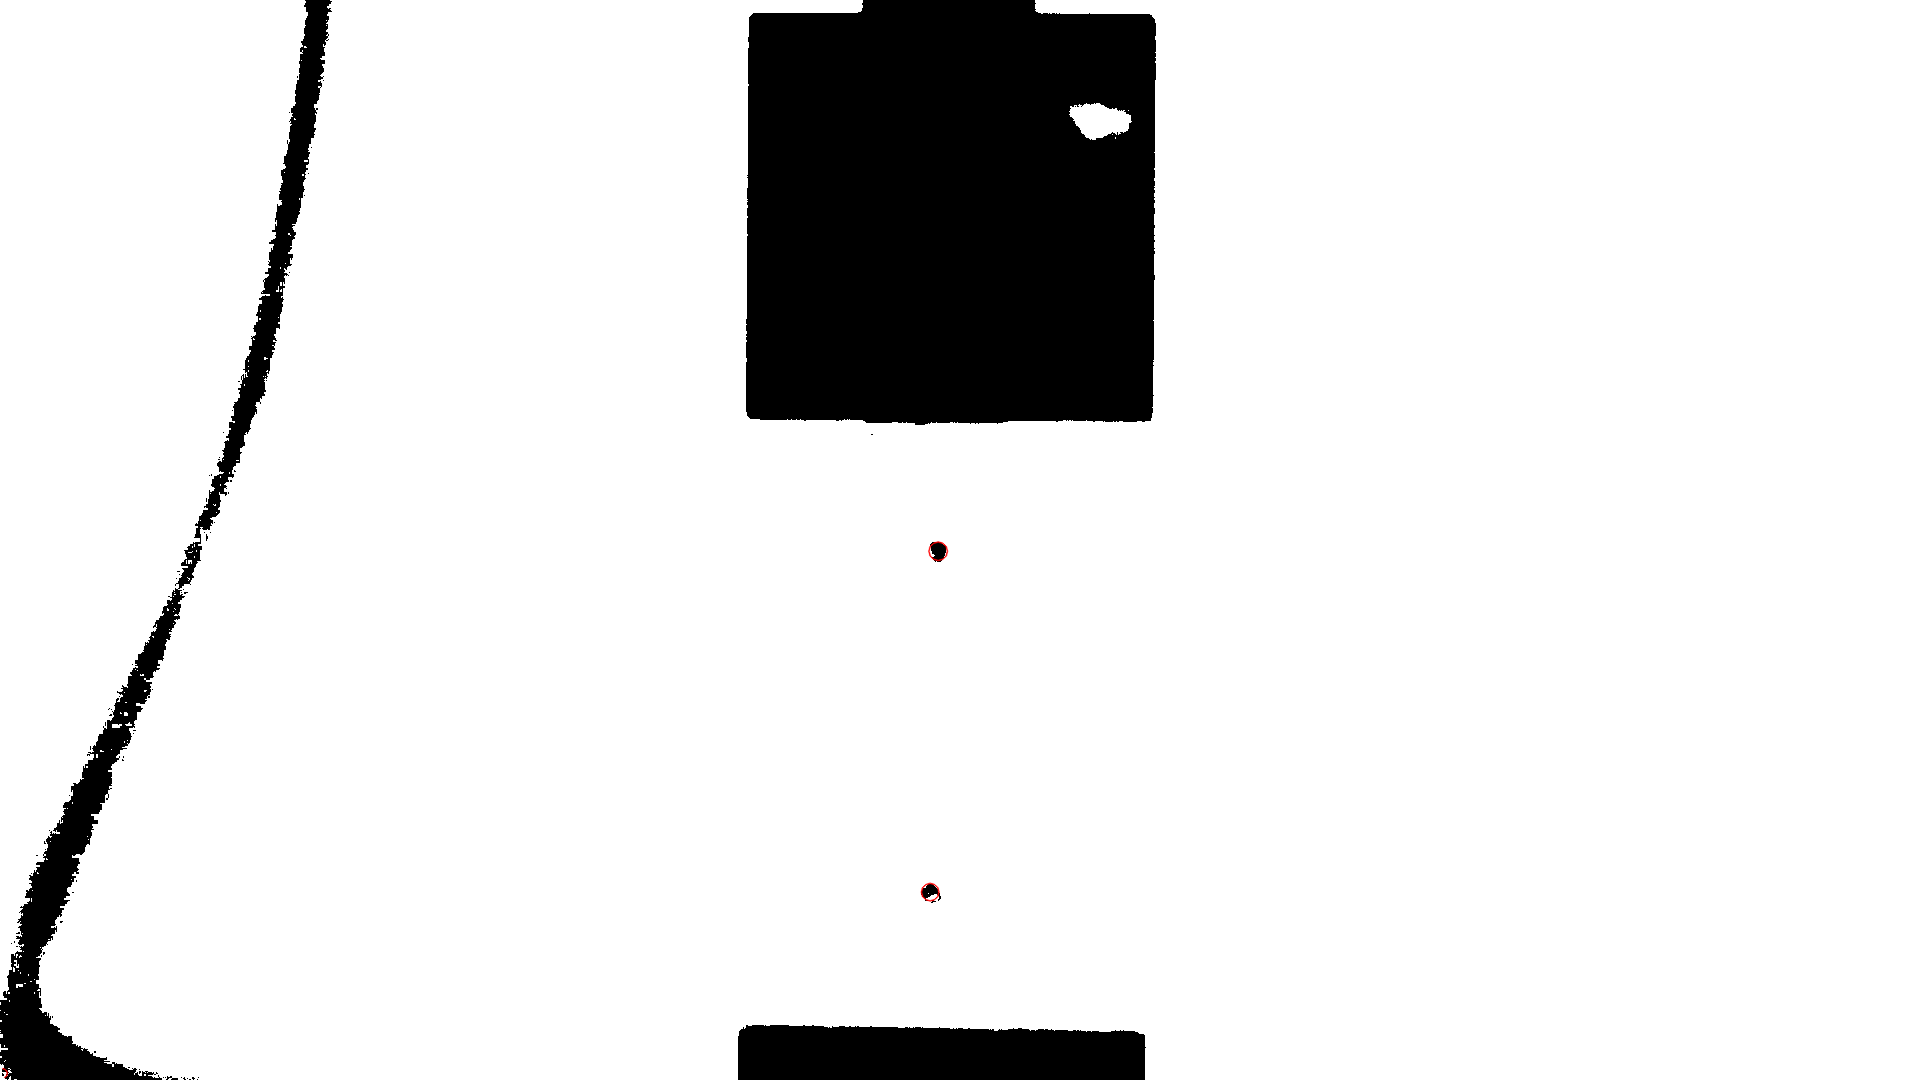

Read a new frame:  True
2


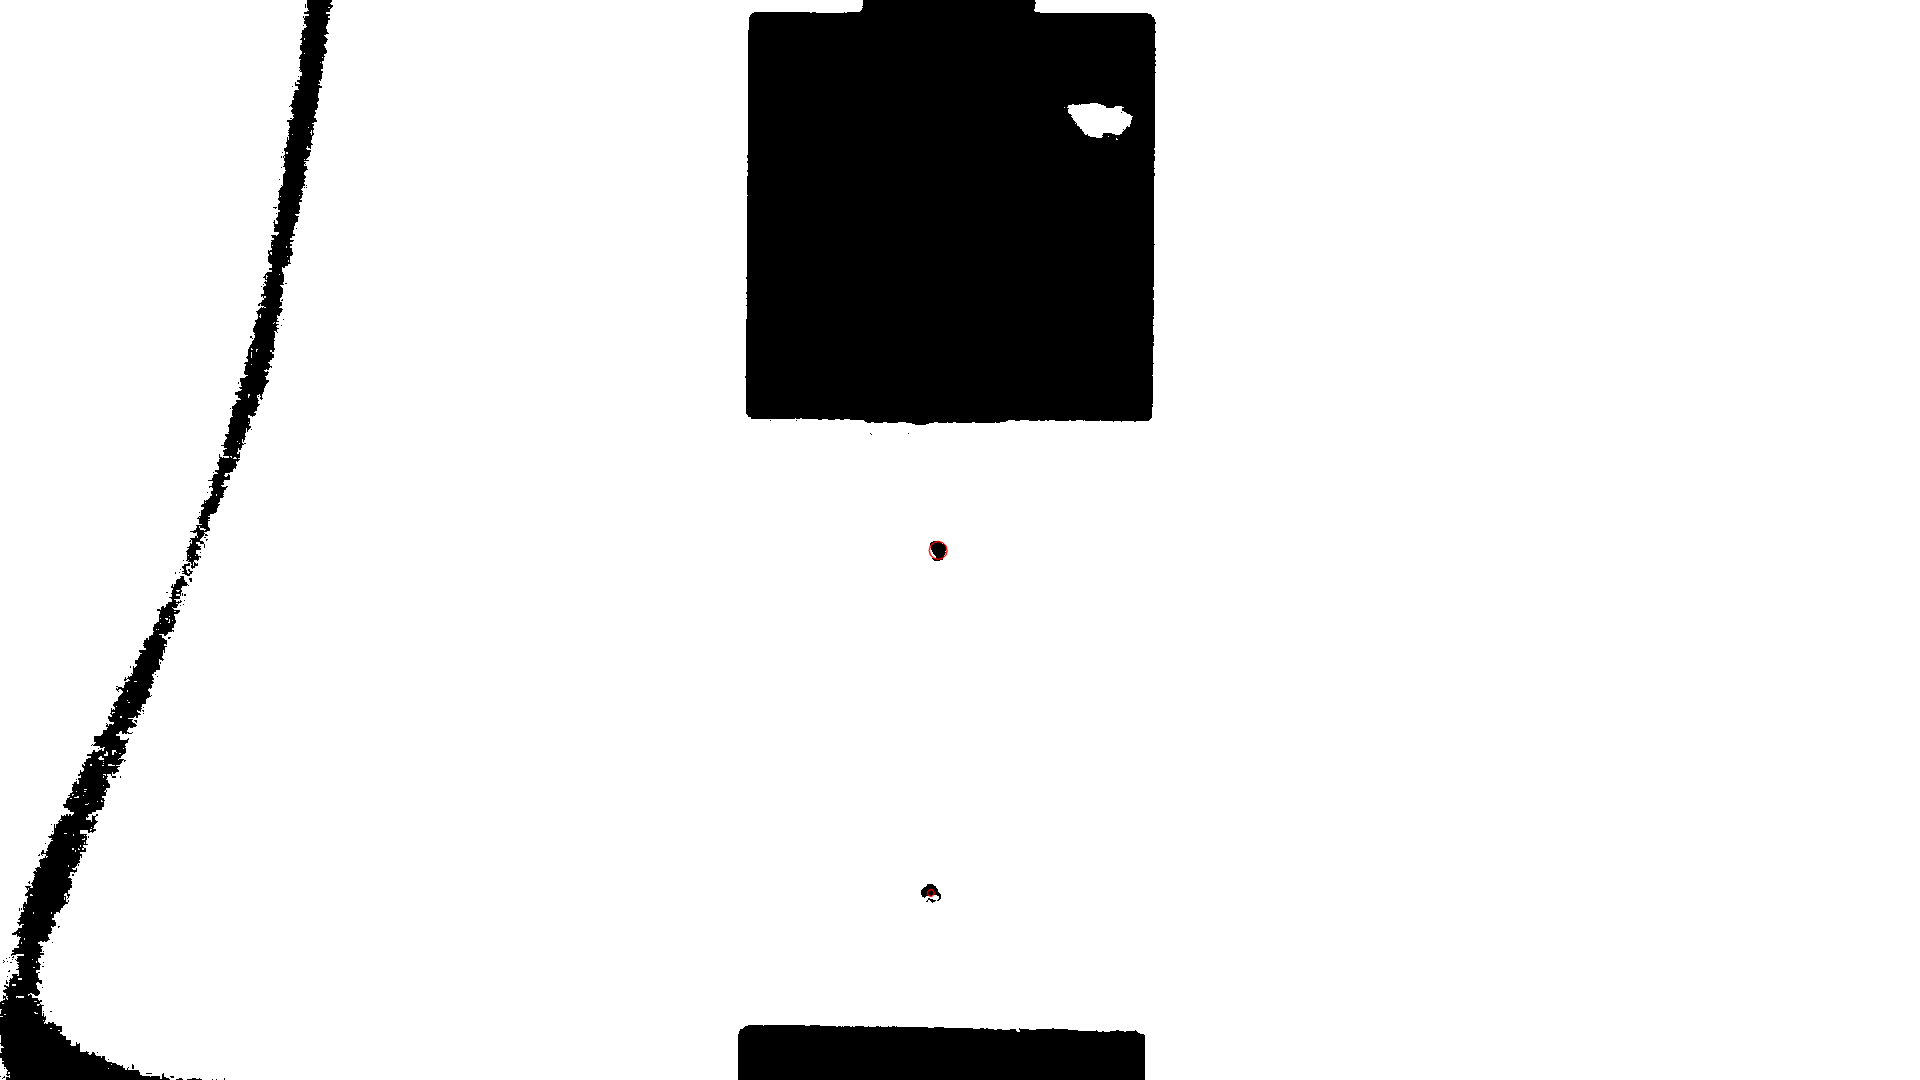

Read a new frame:  True
2


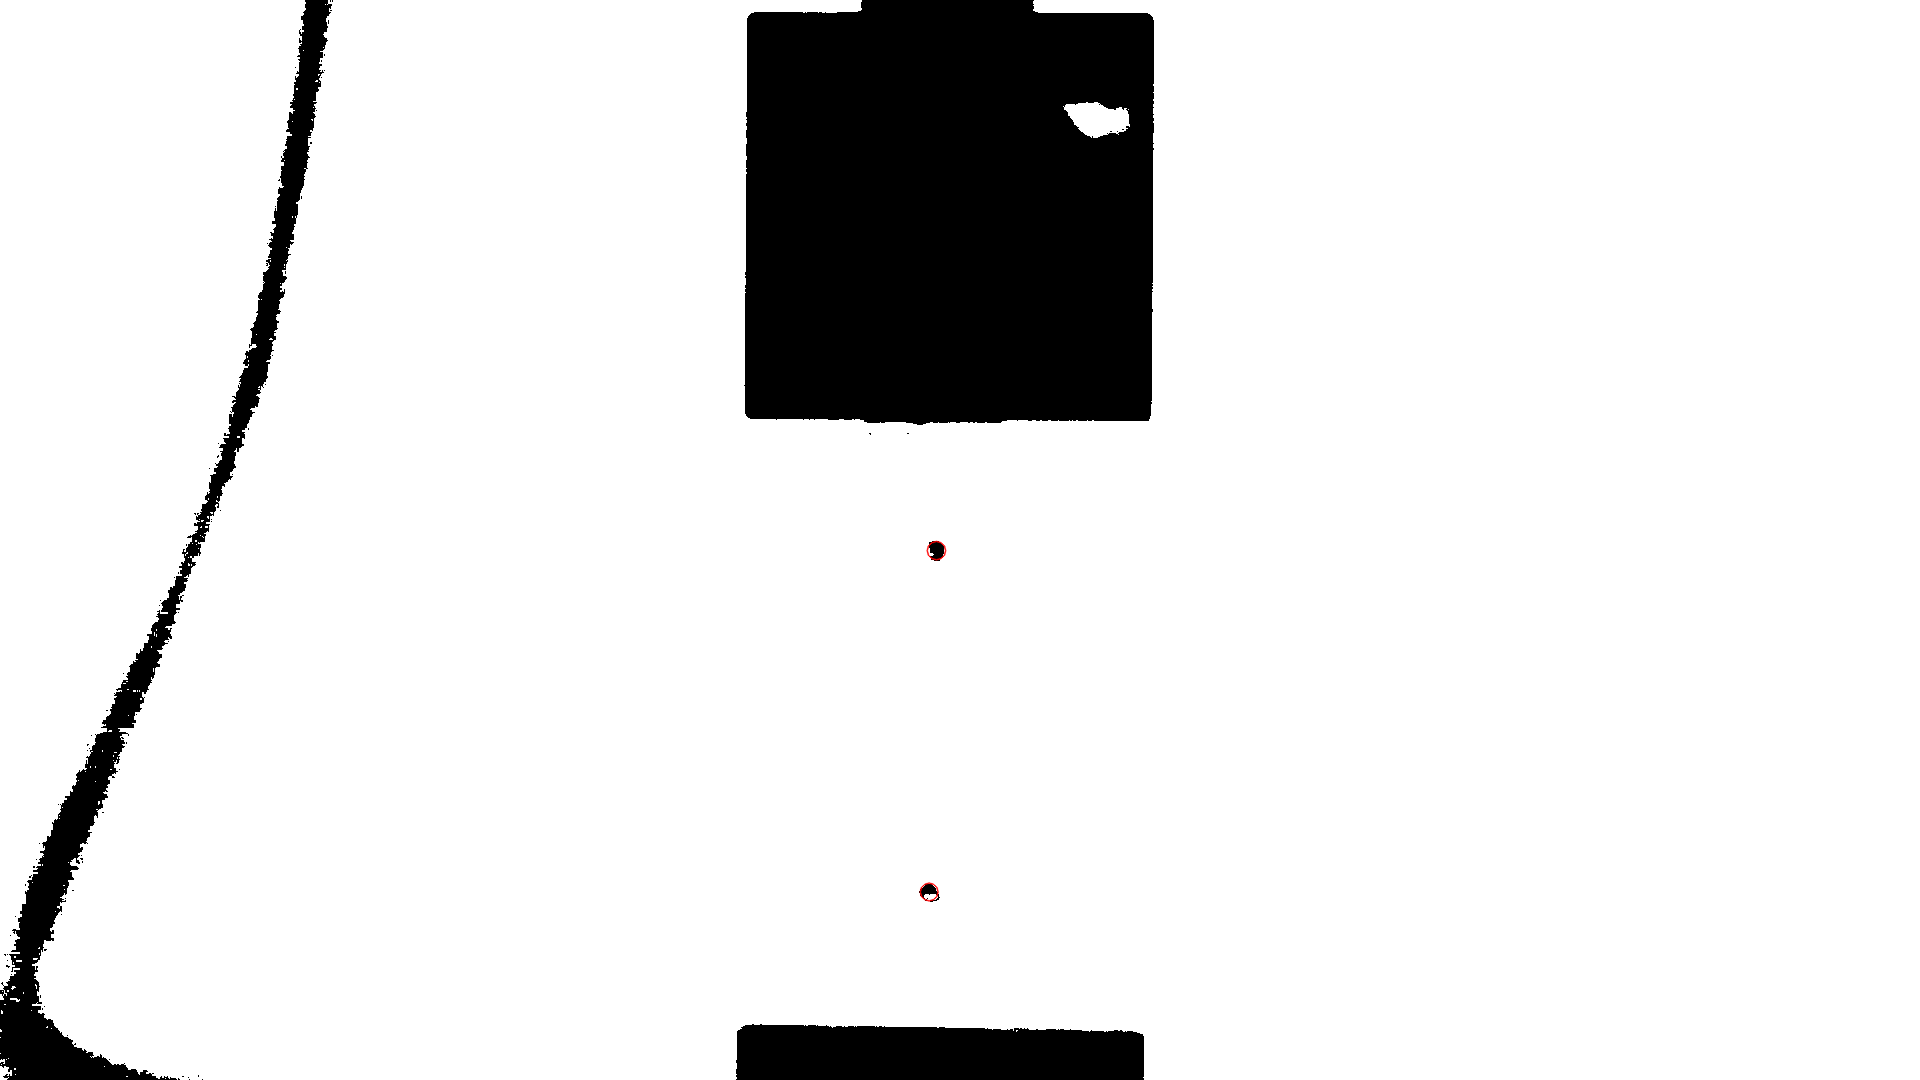

Read a new frame:  True
2


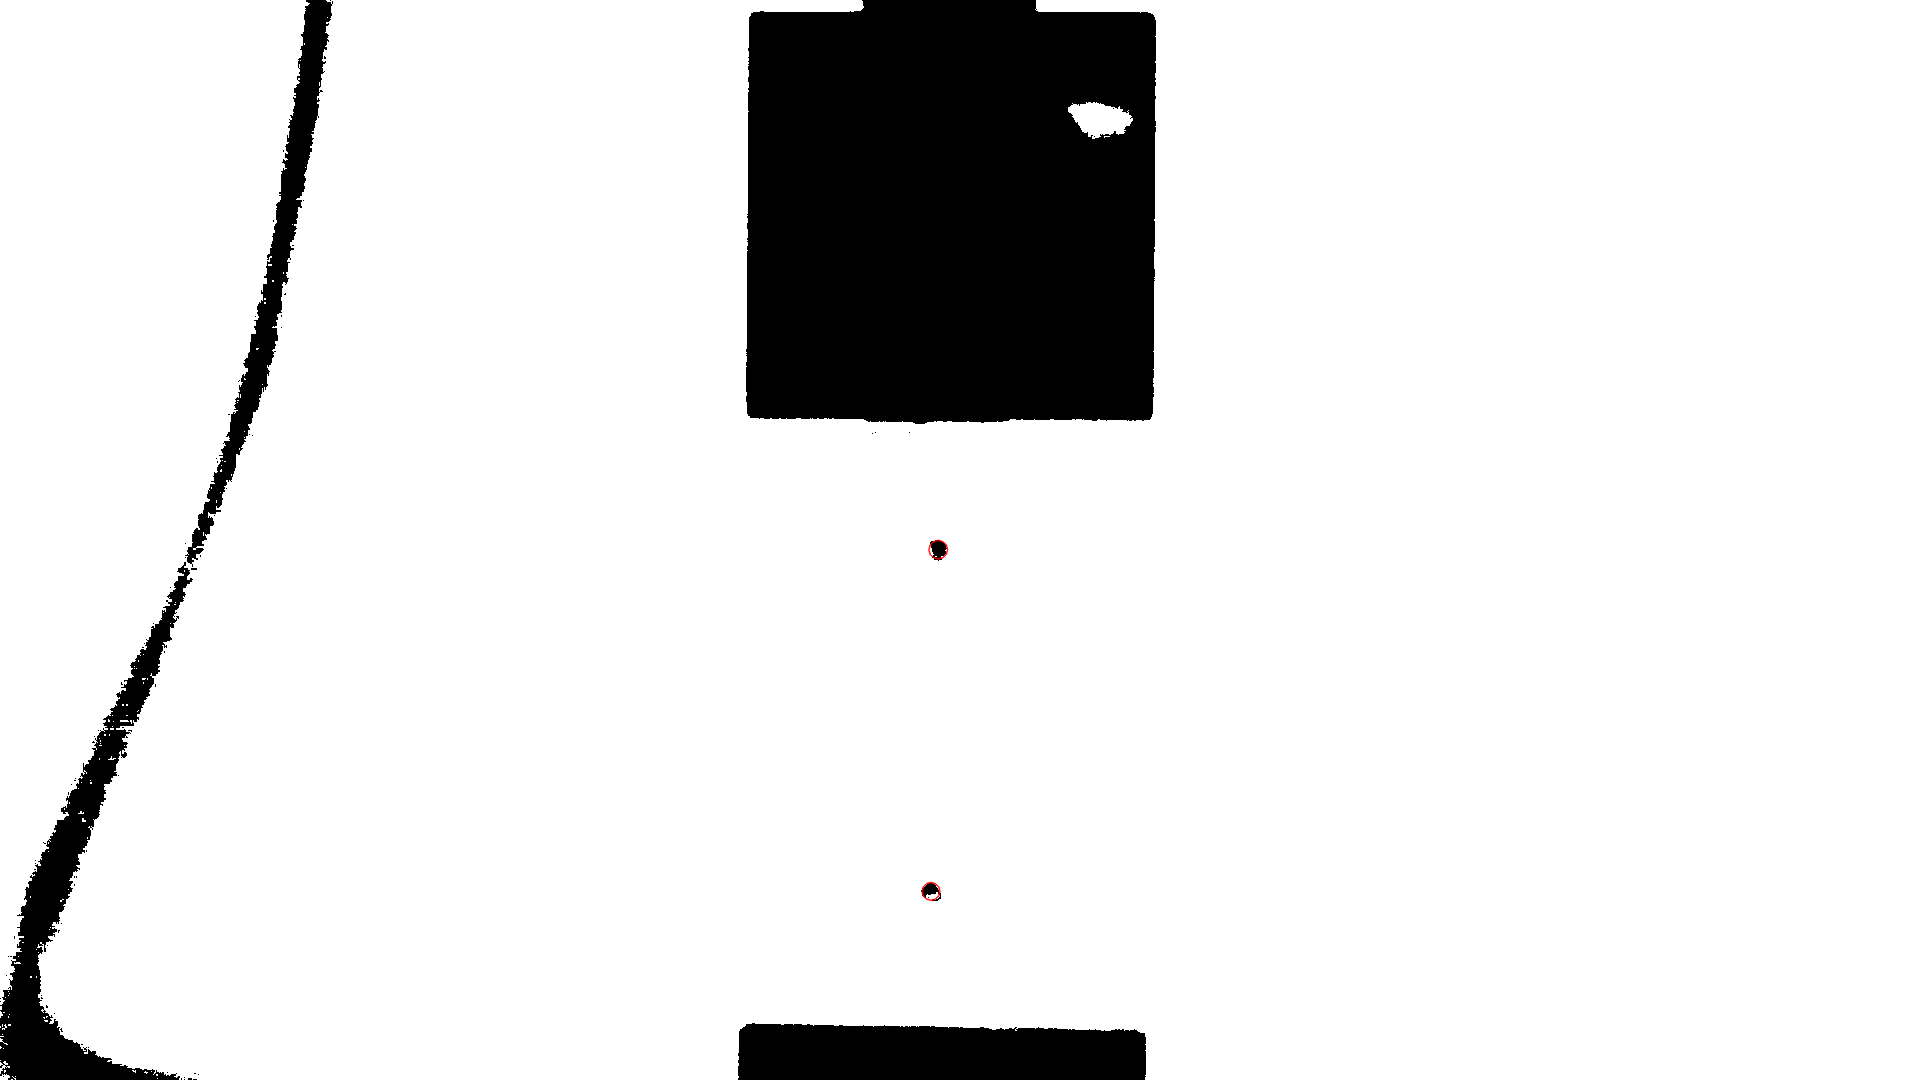

Read a new frame:  True
2


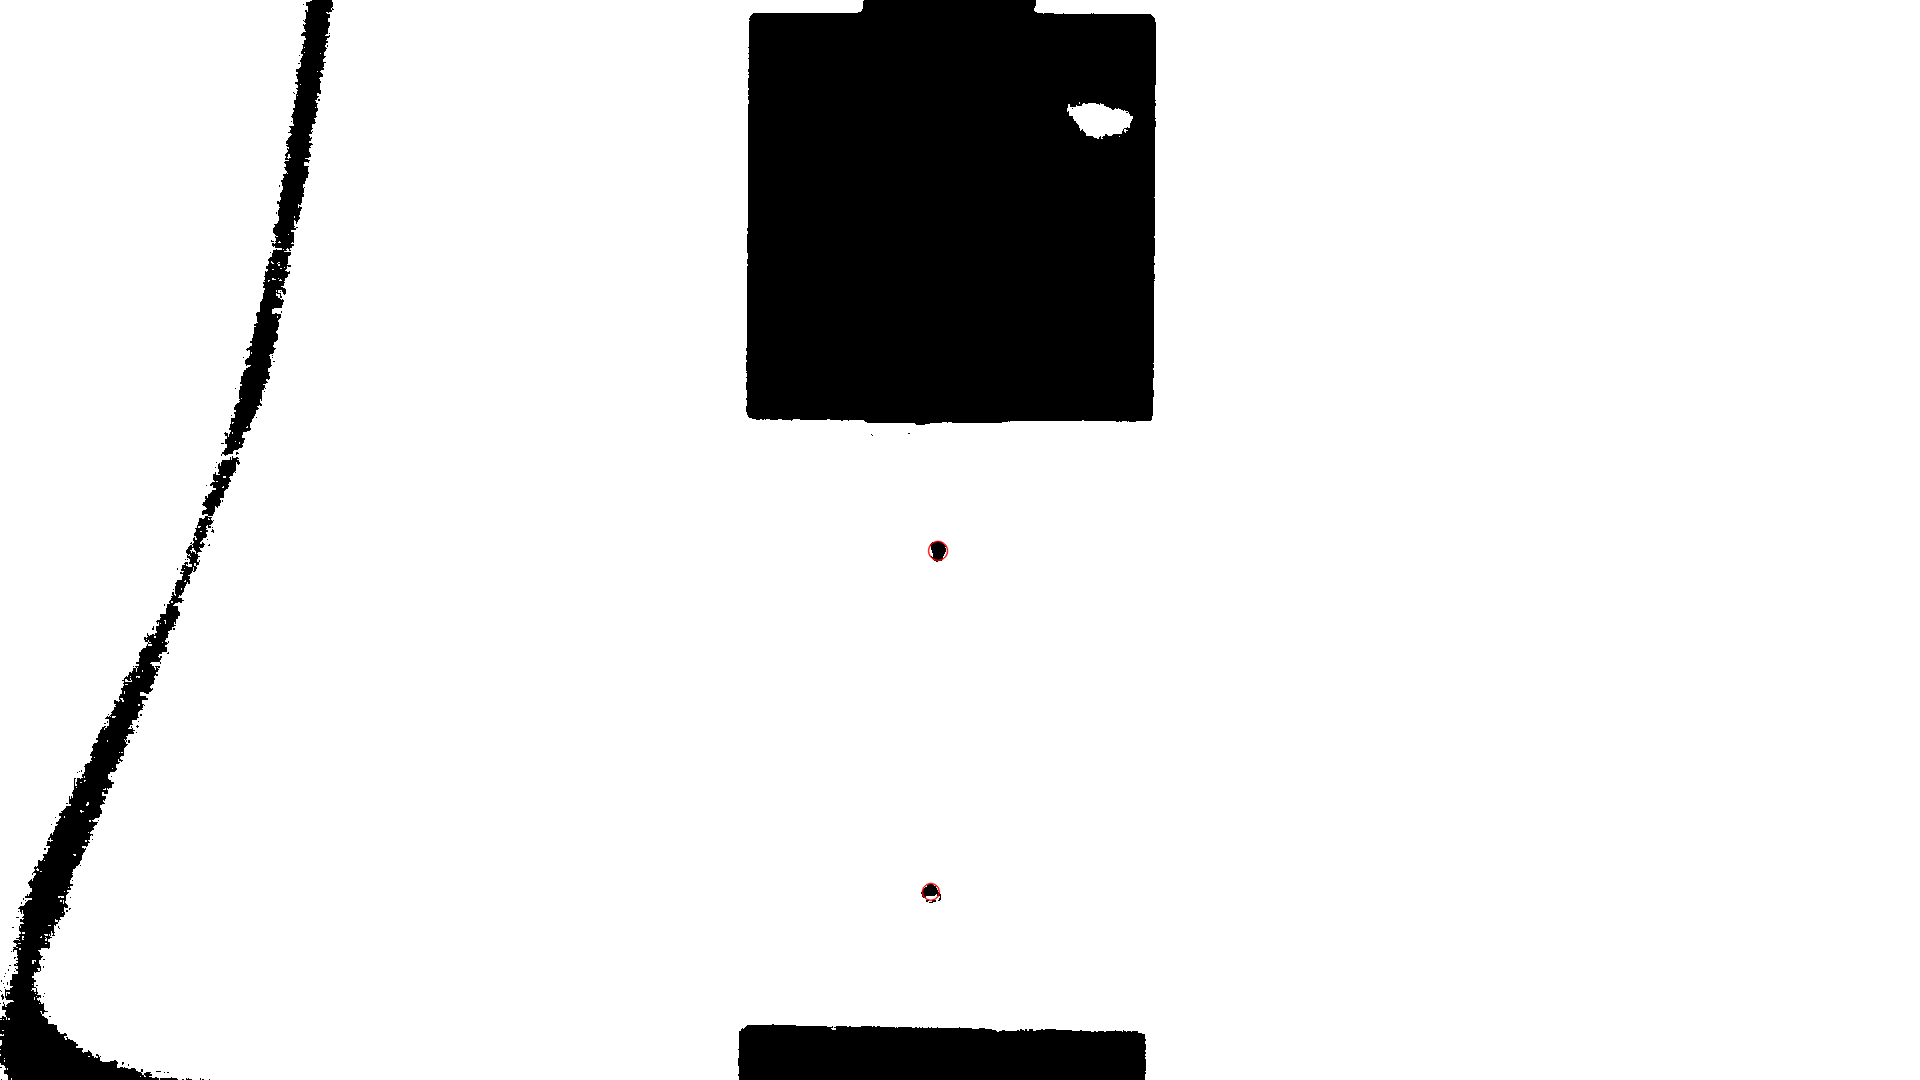

Read a new frame:  True
2


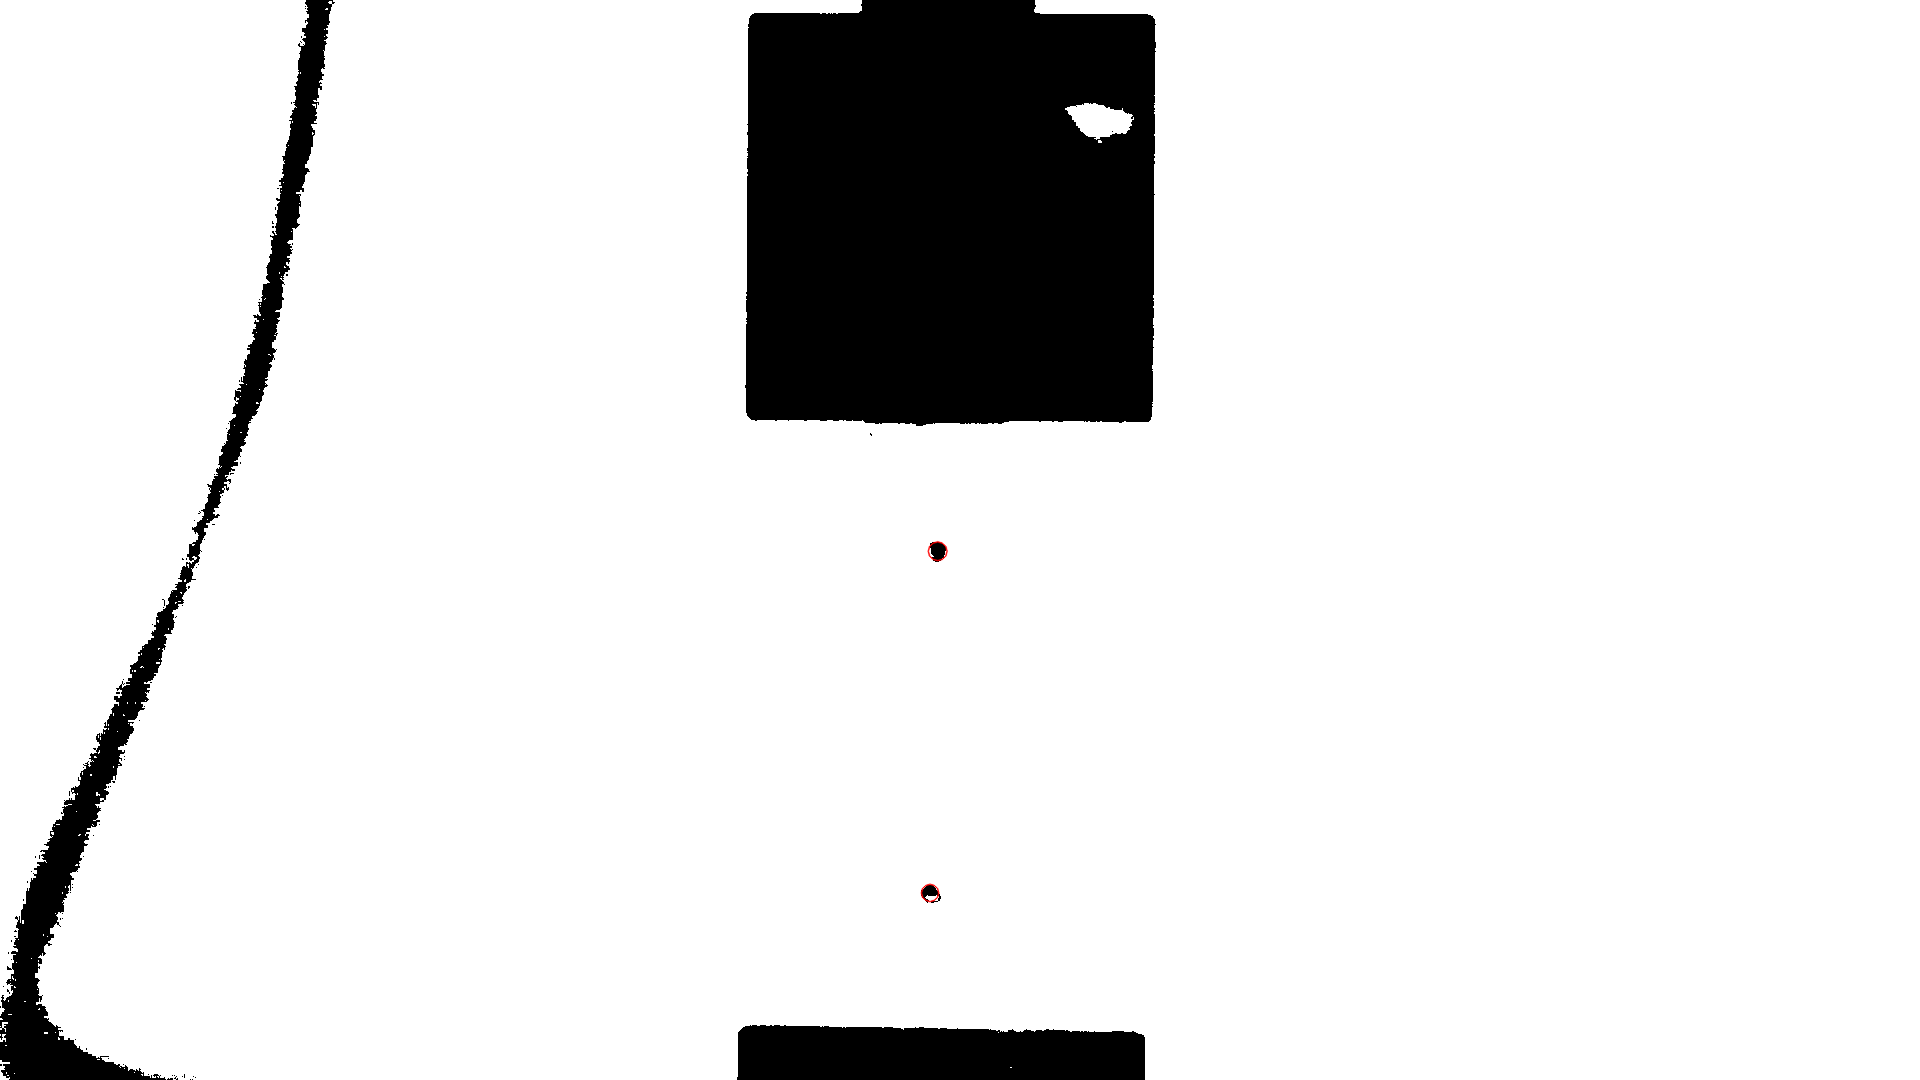

Read a new frame:  True
2


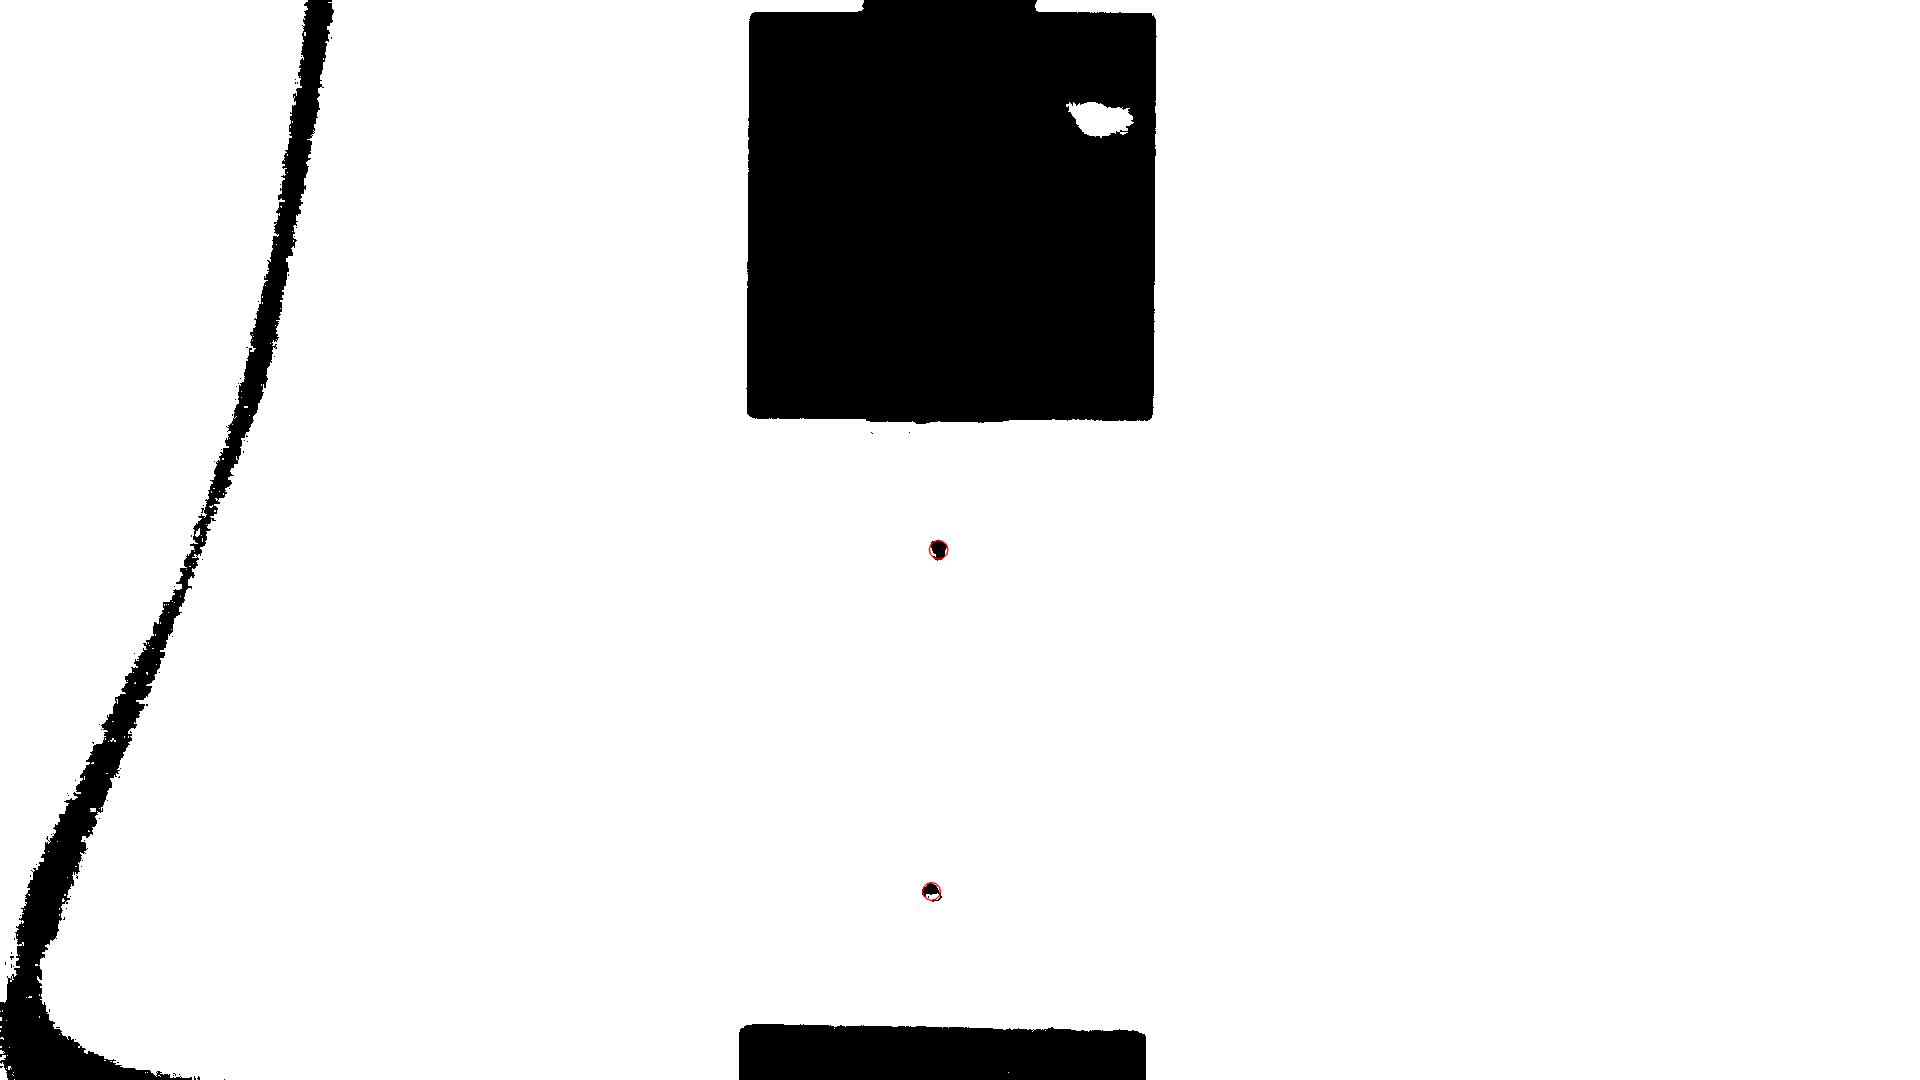

Read a new frame:  True
2


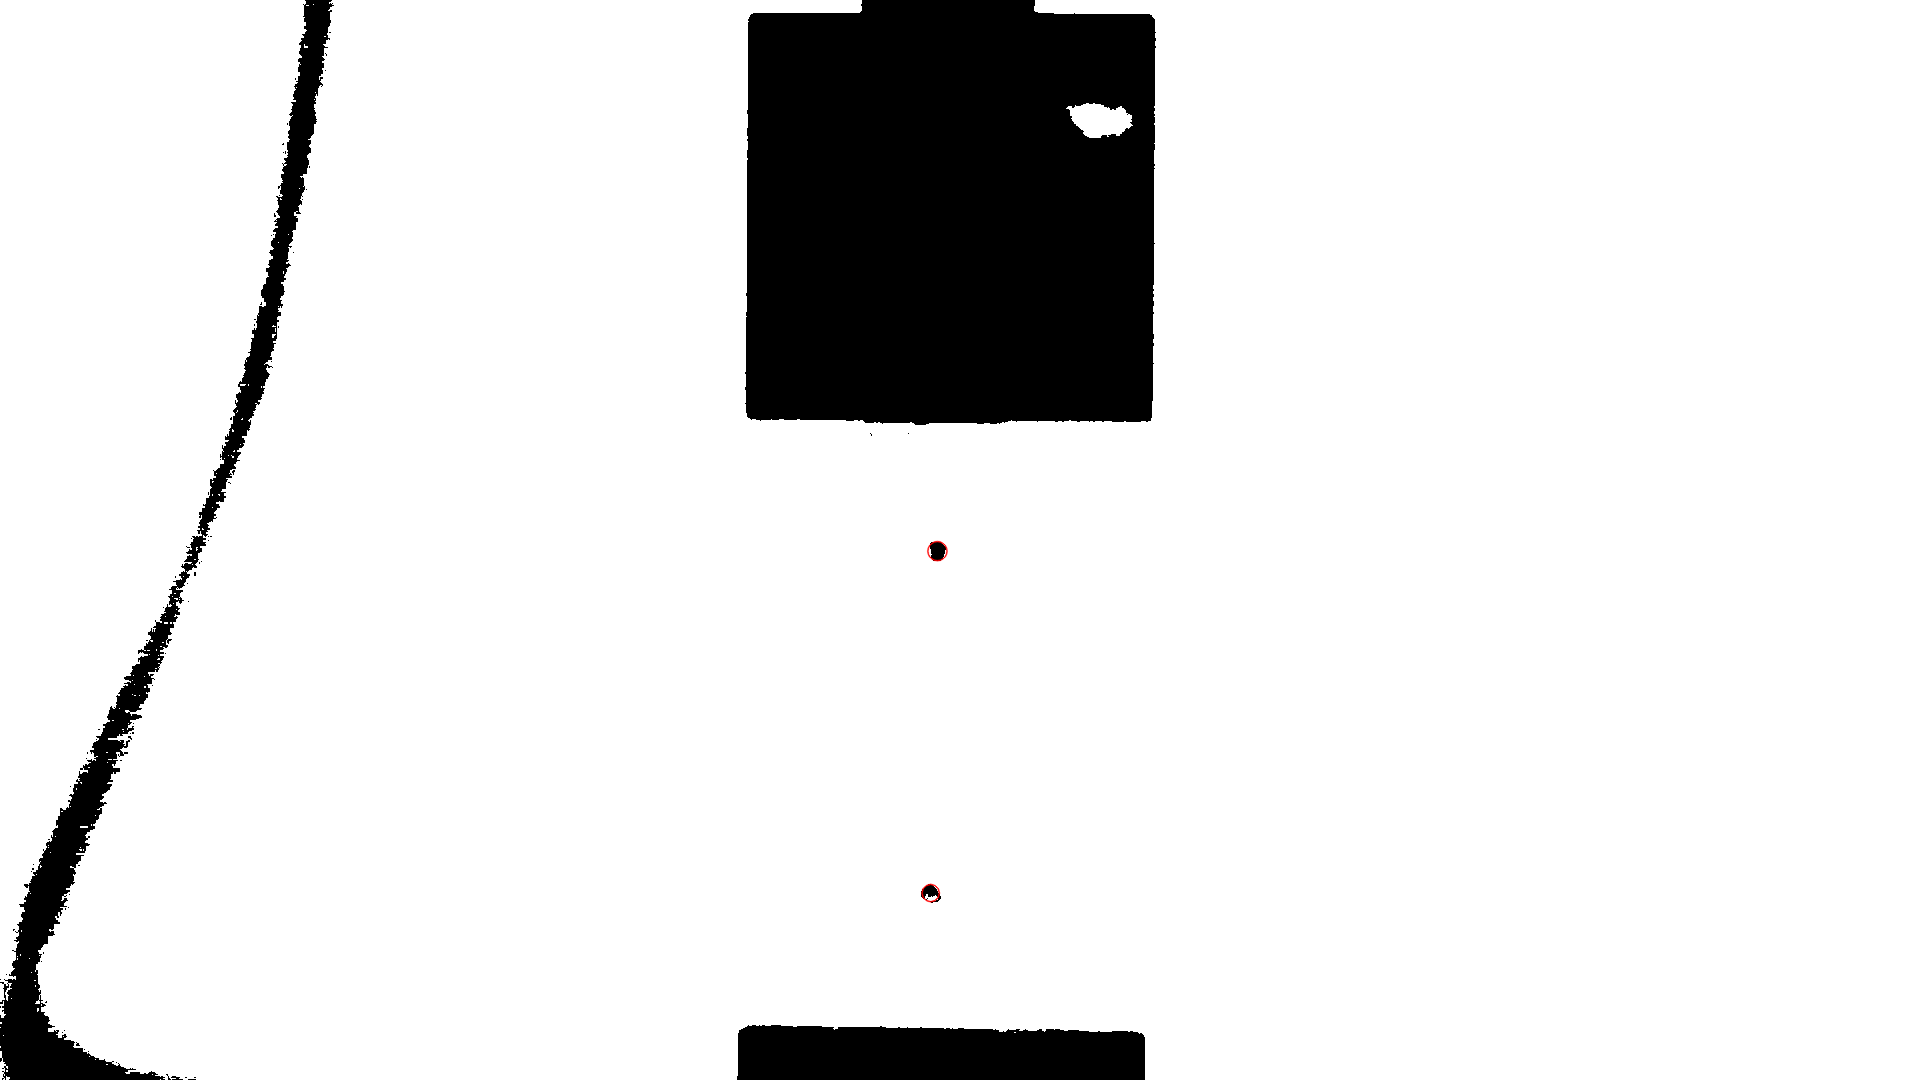

Read a new frame:  True
4


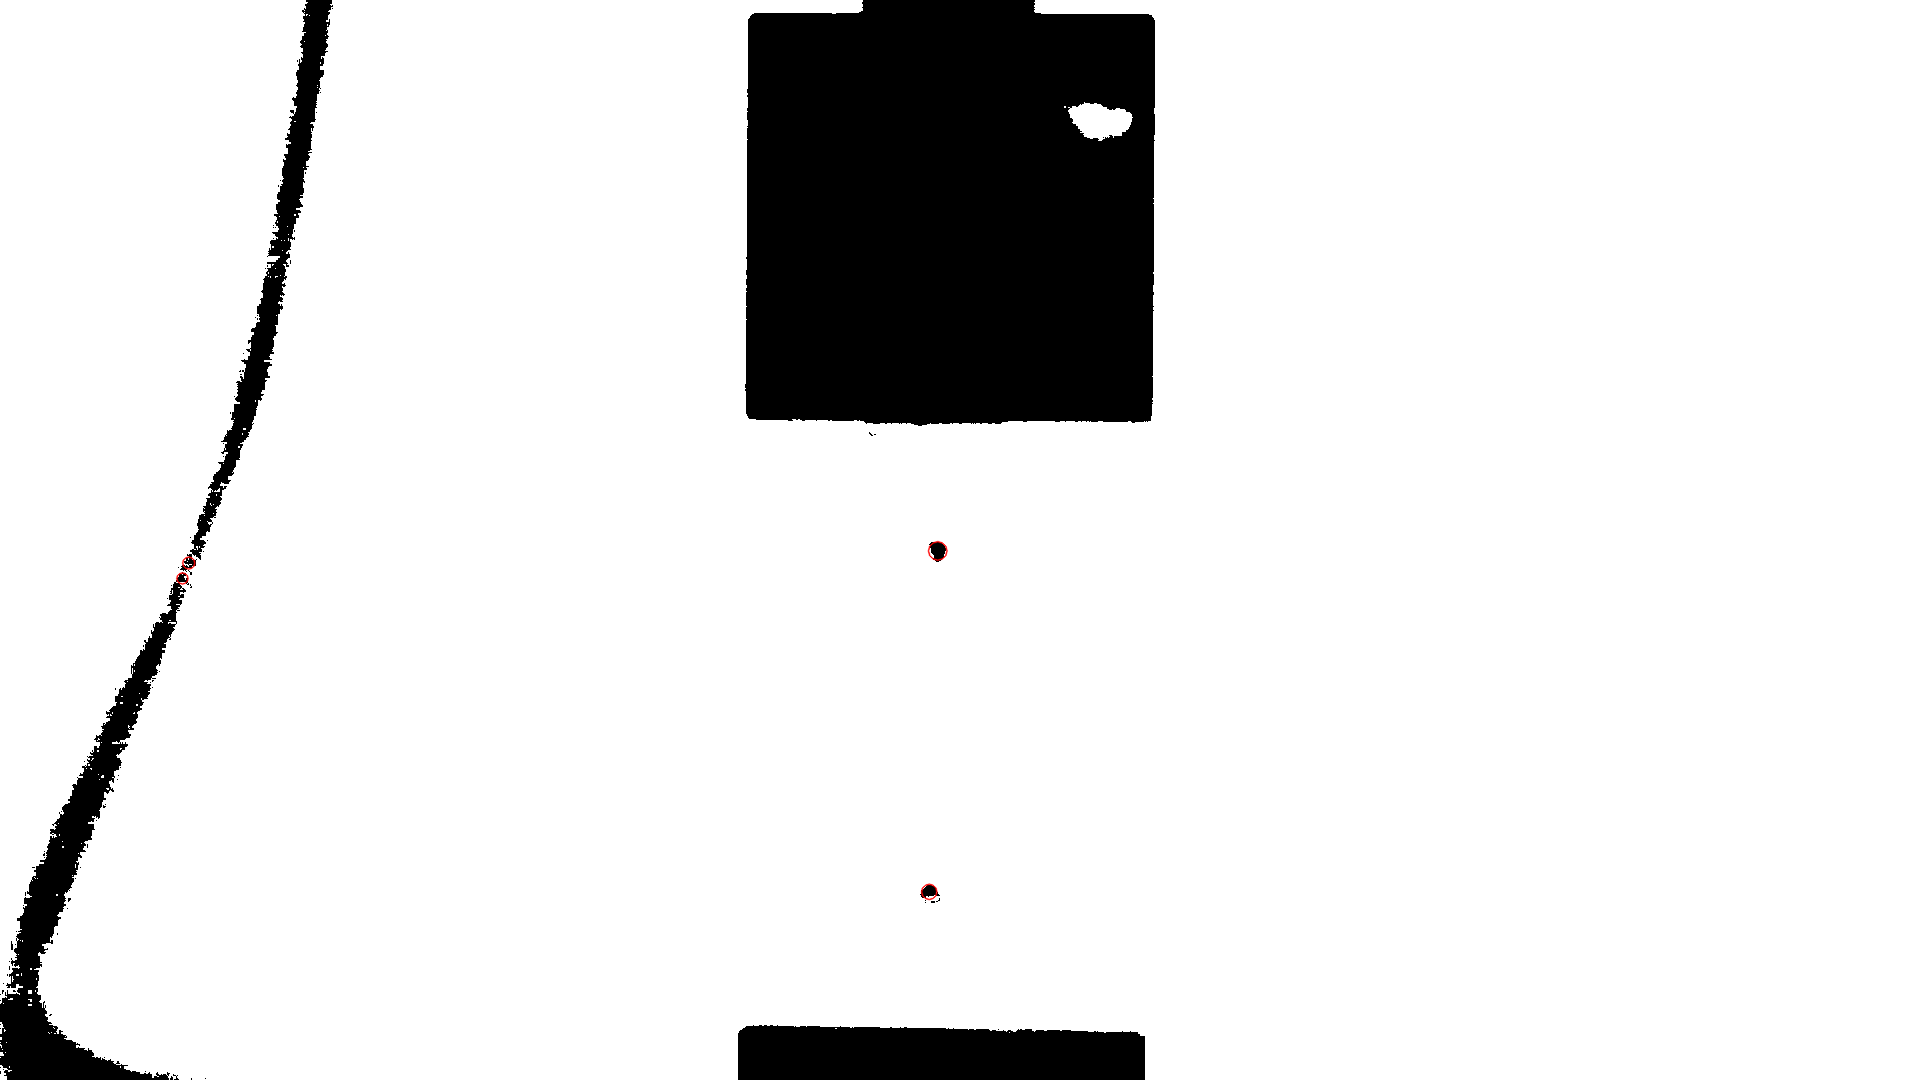

Read a new frame:  True
2


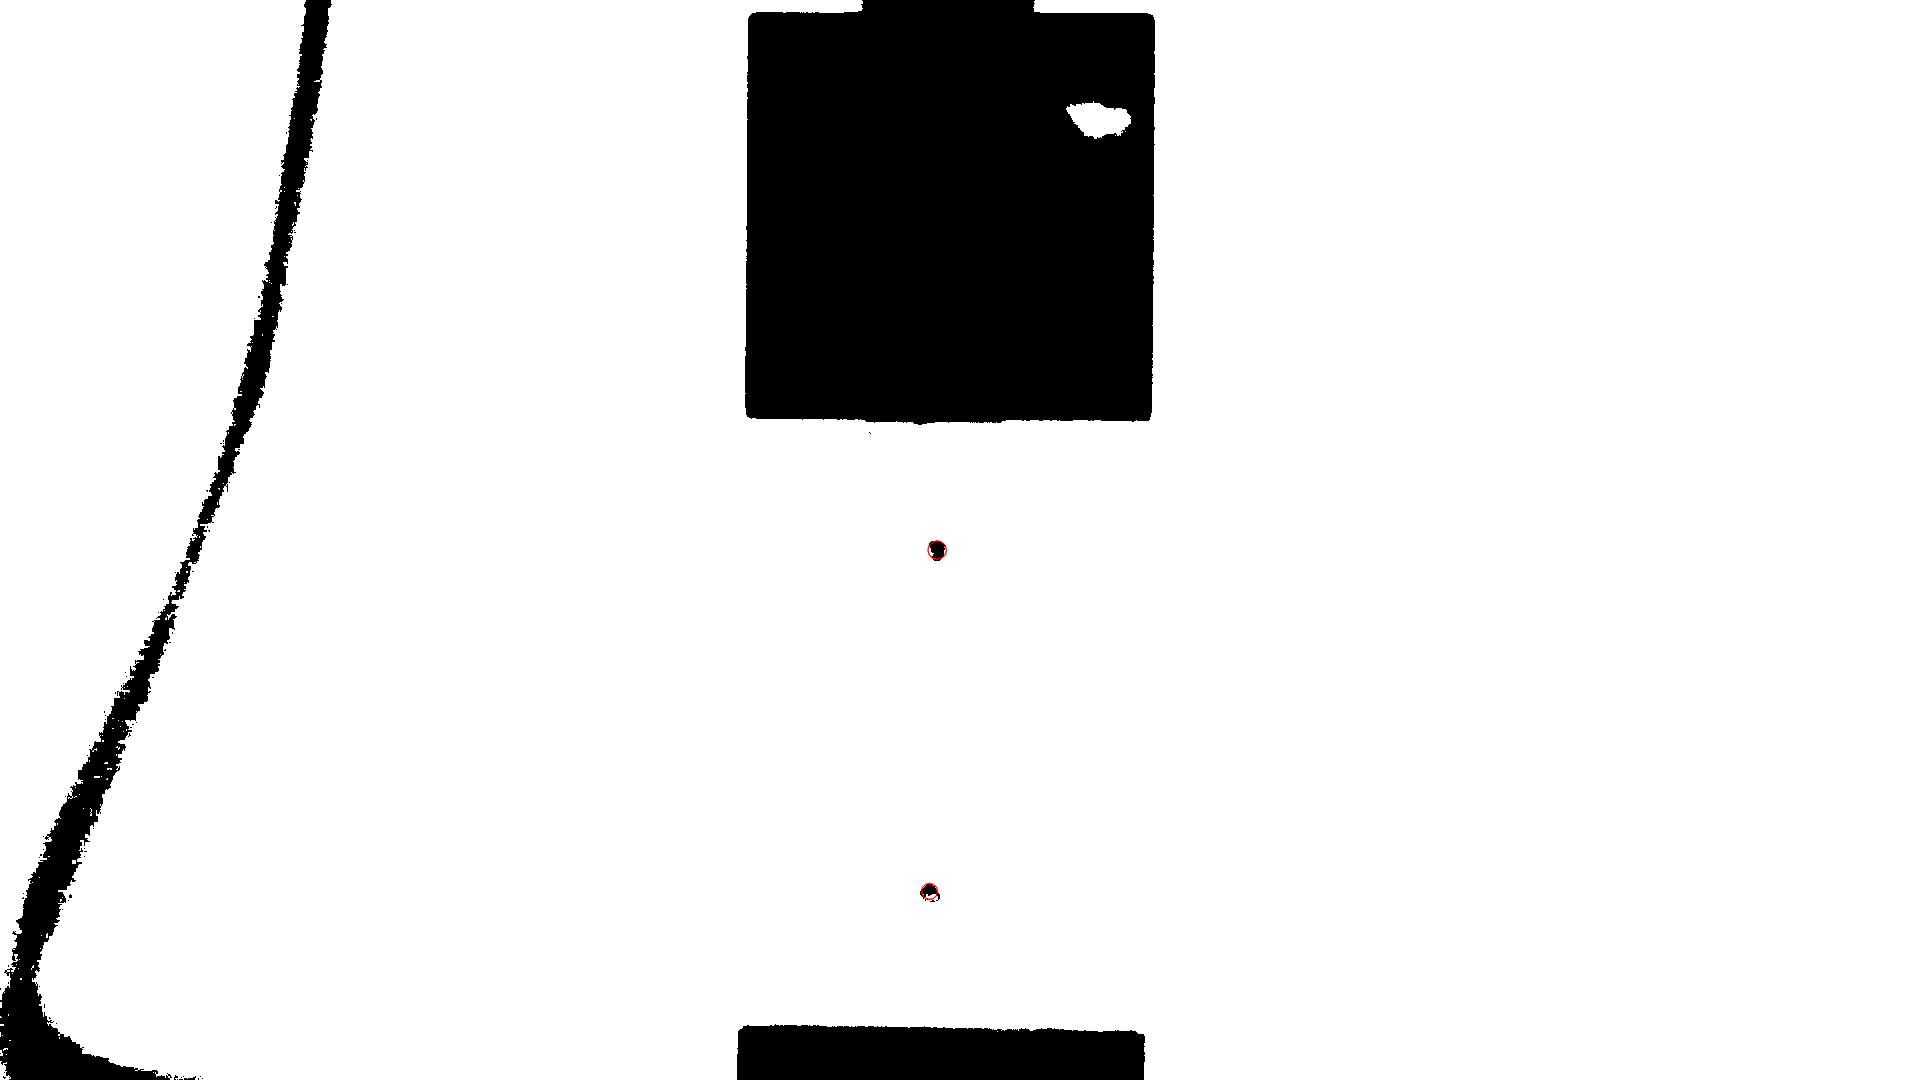

Read a new frame:  True
3


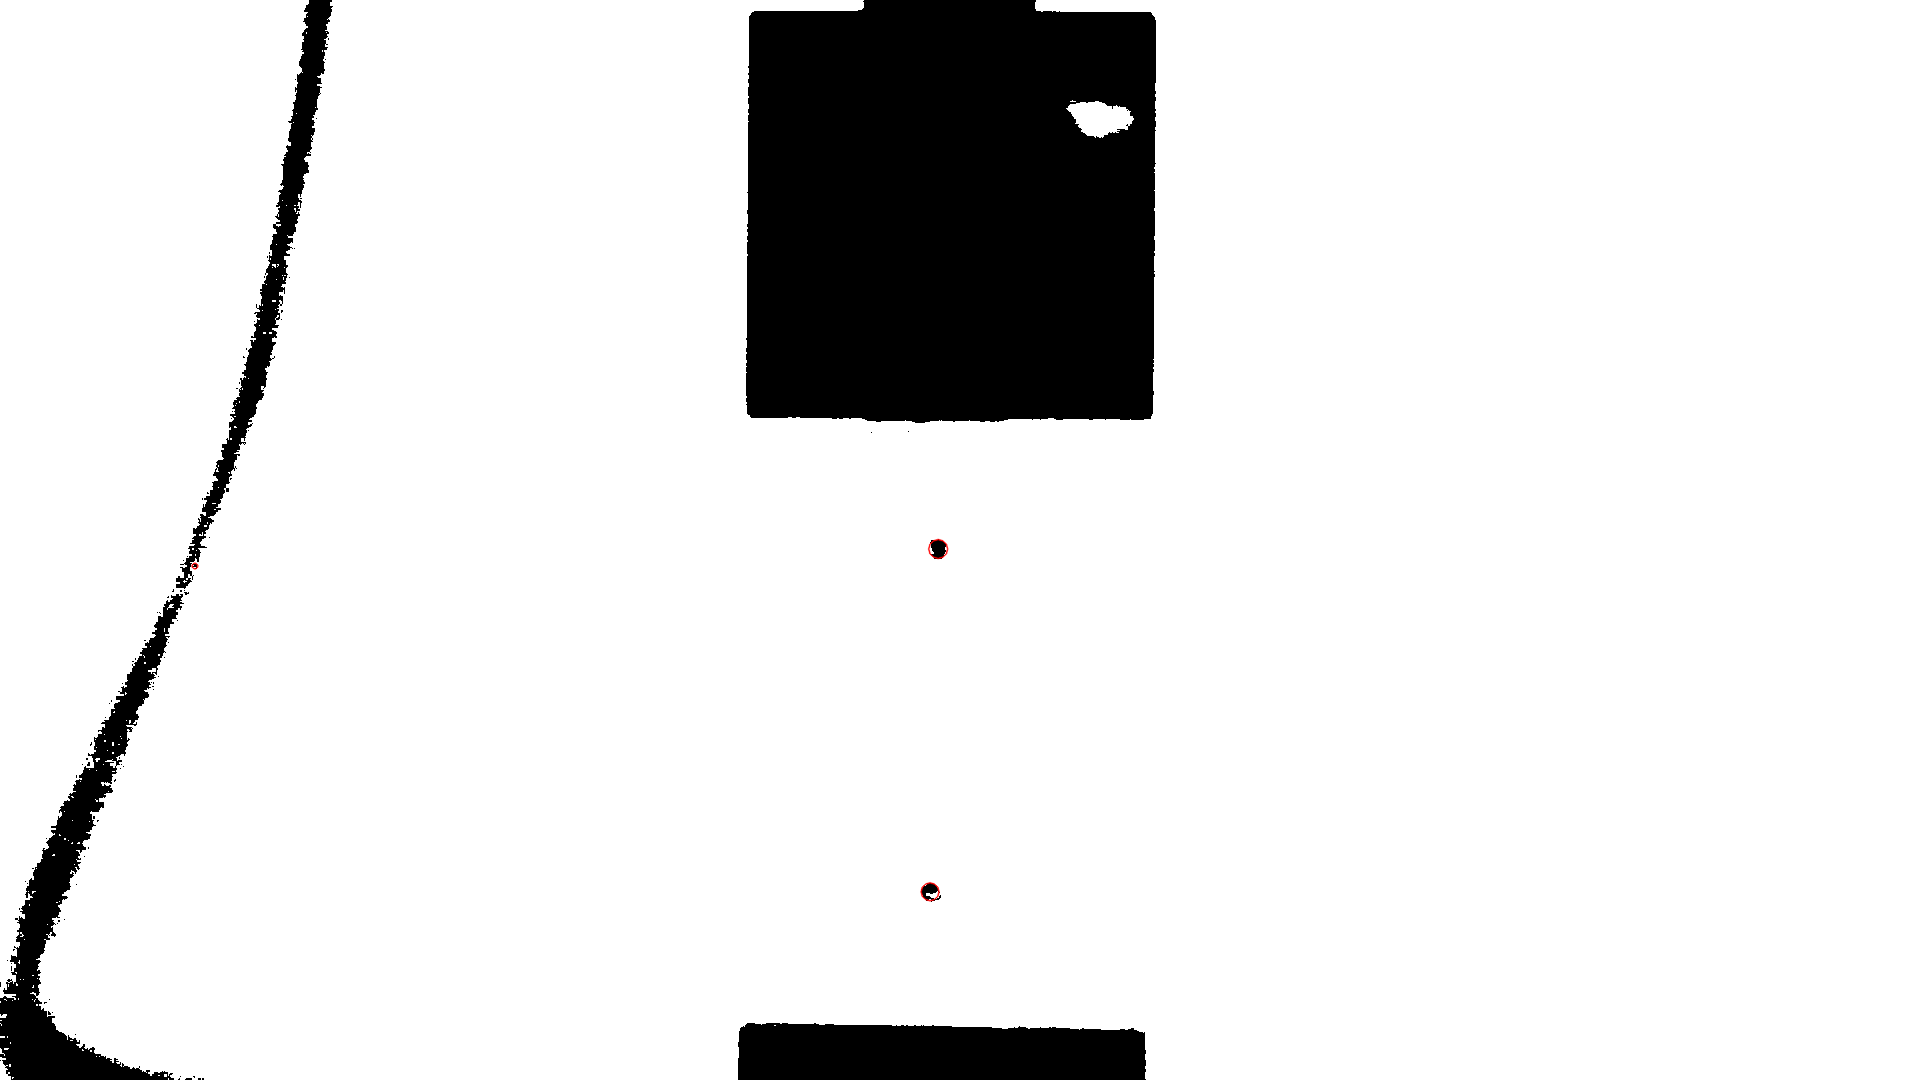

Read a new frame:  True
2


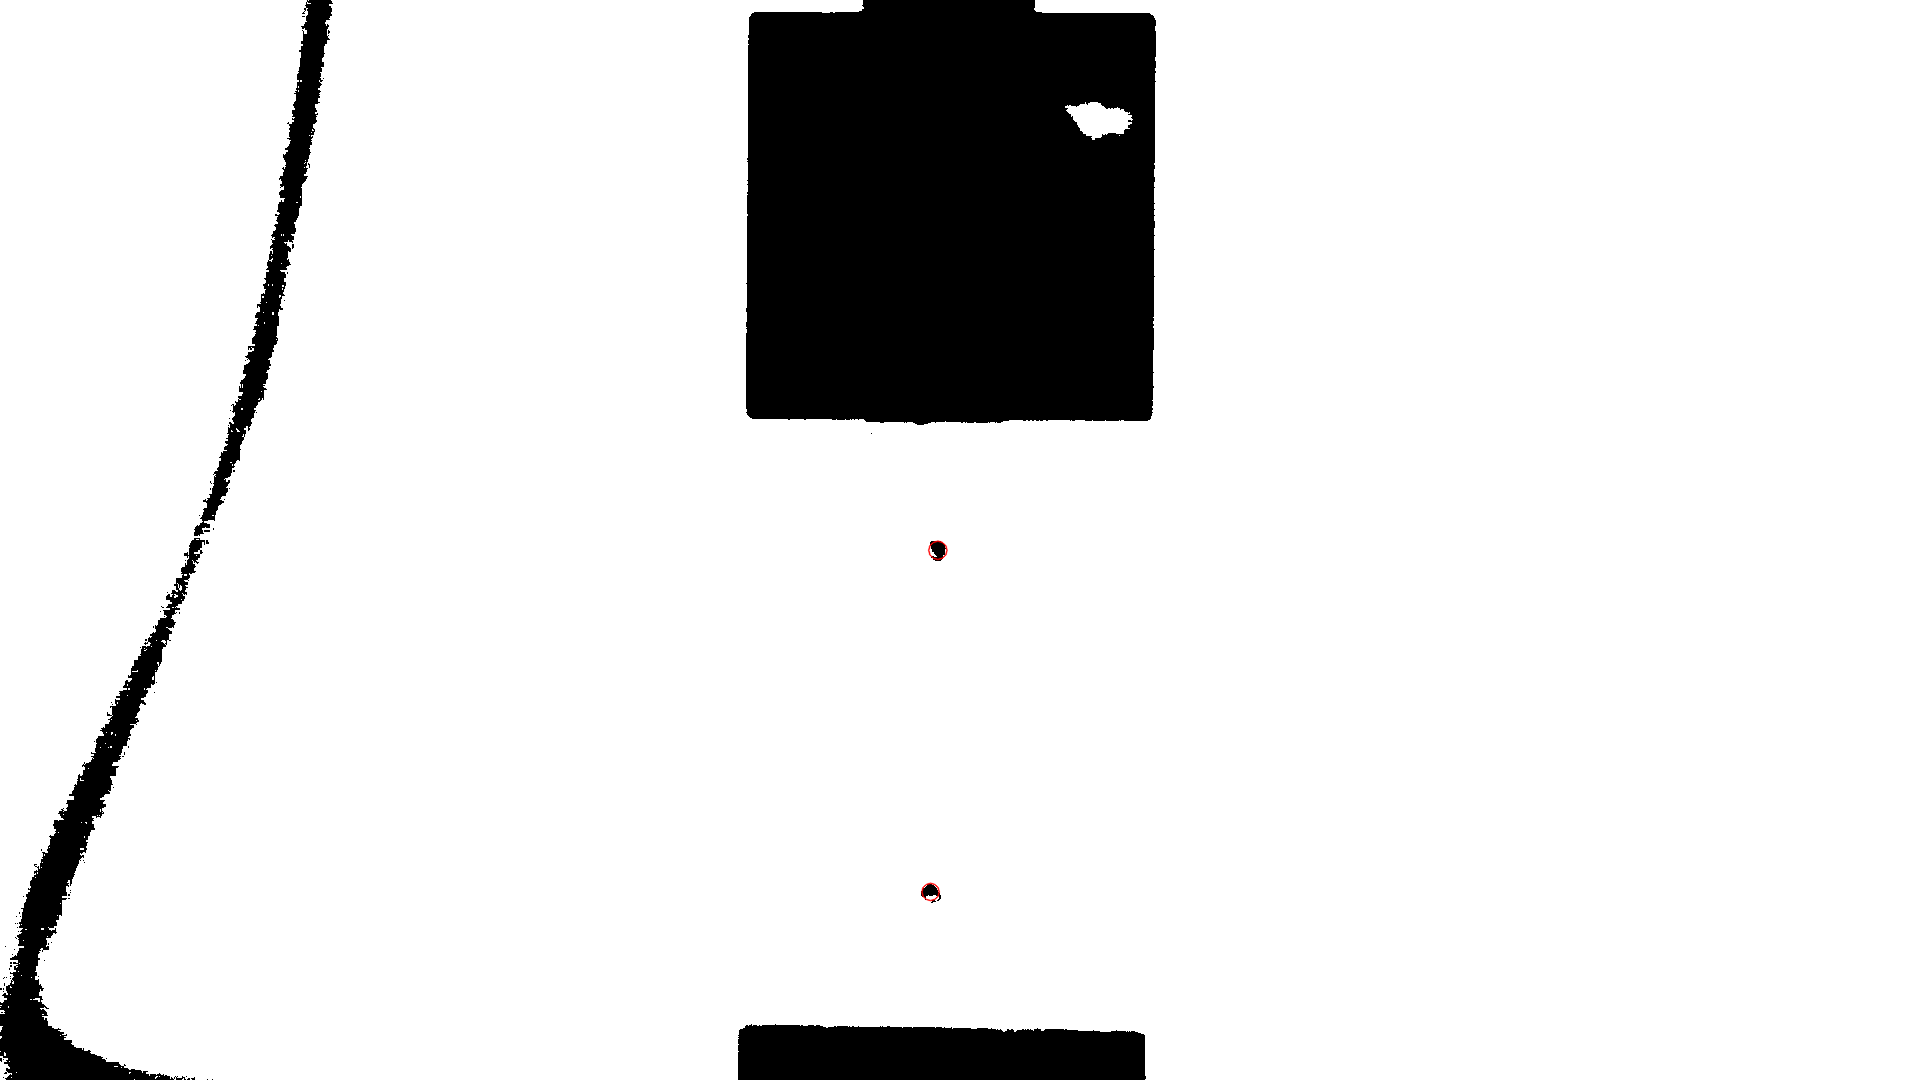

Read a new frame:  True
3


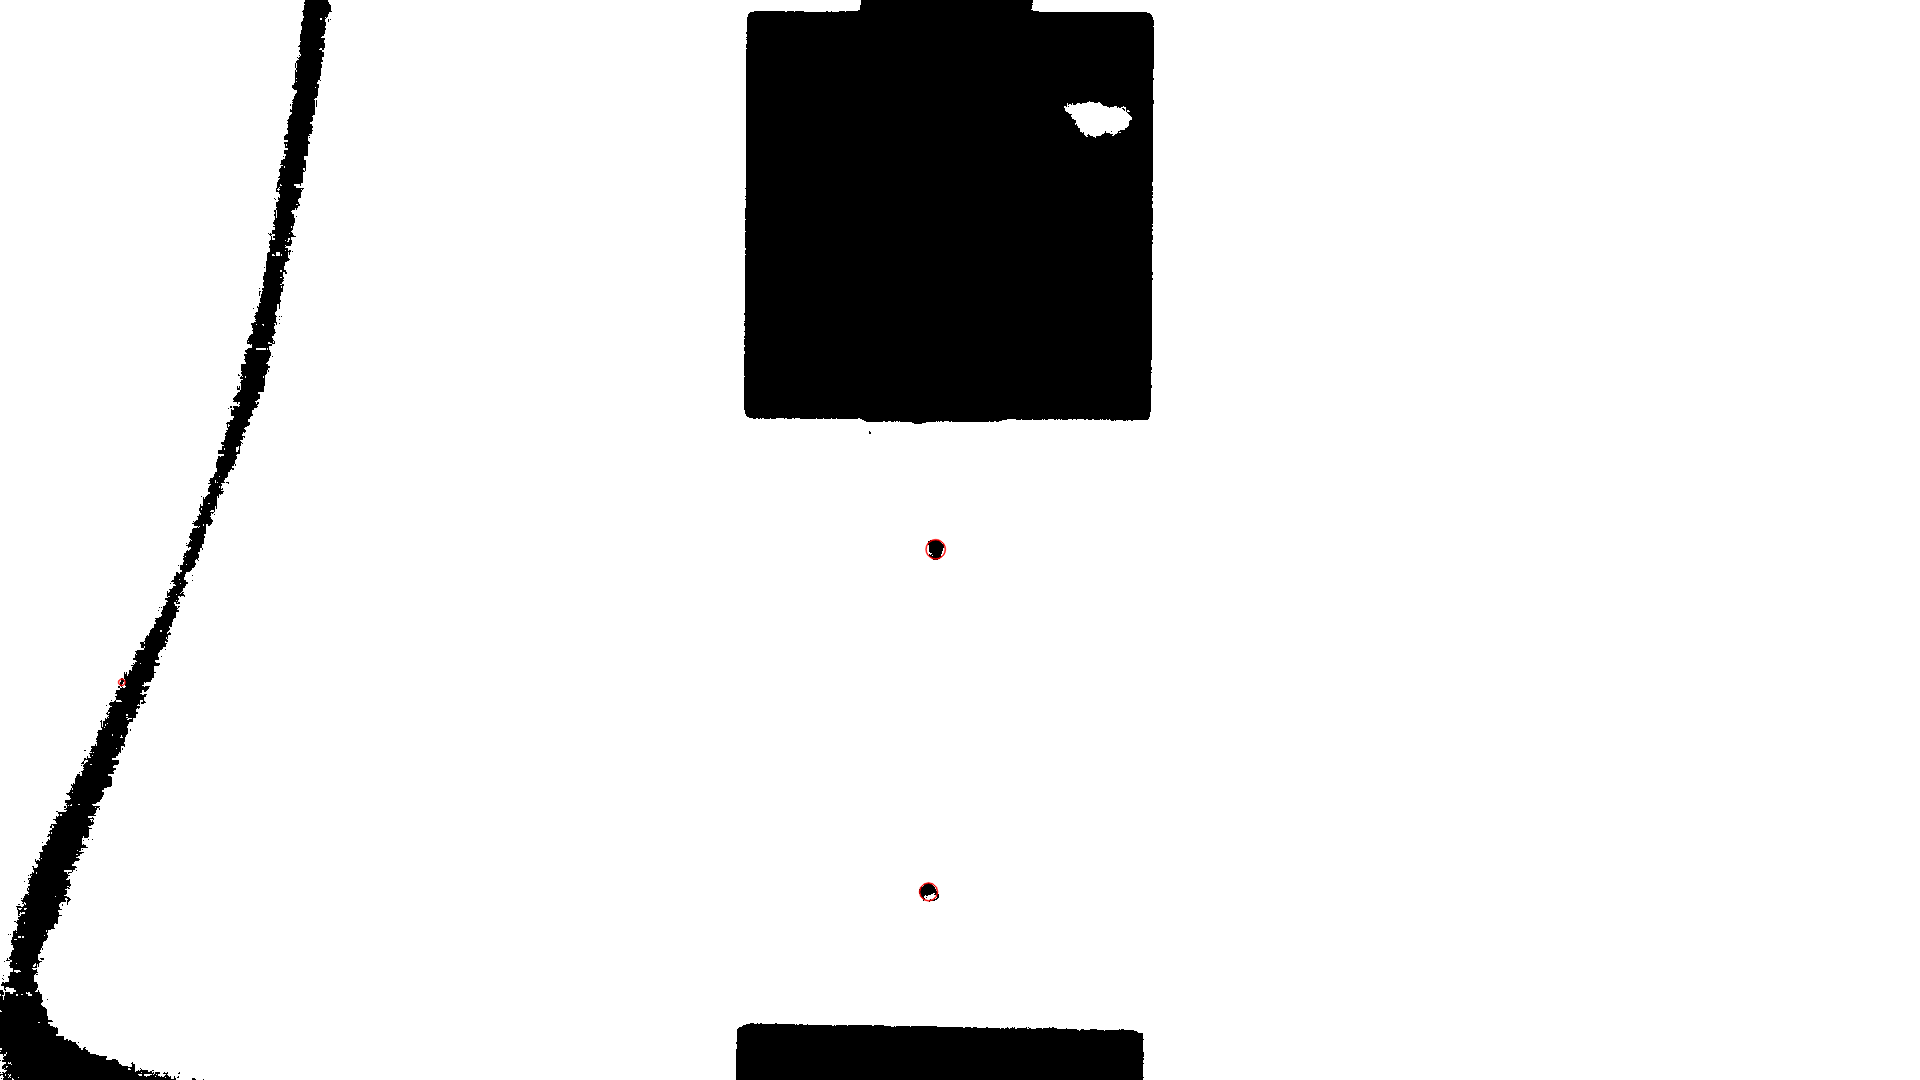

Read a new frame:  True
29


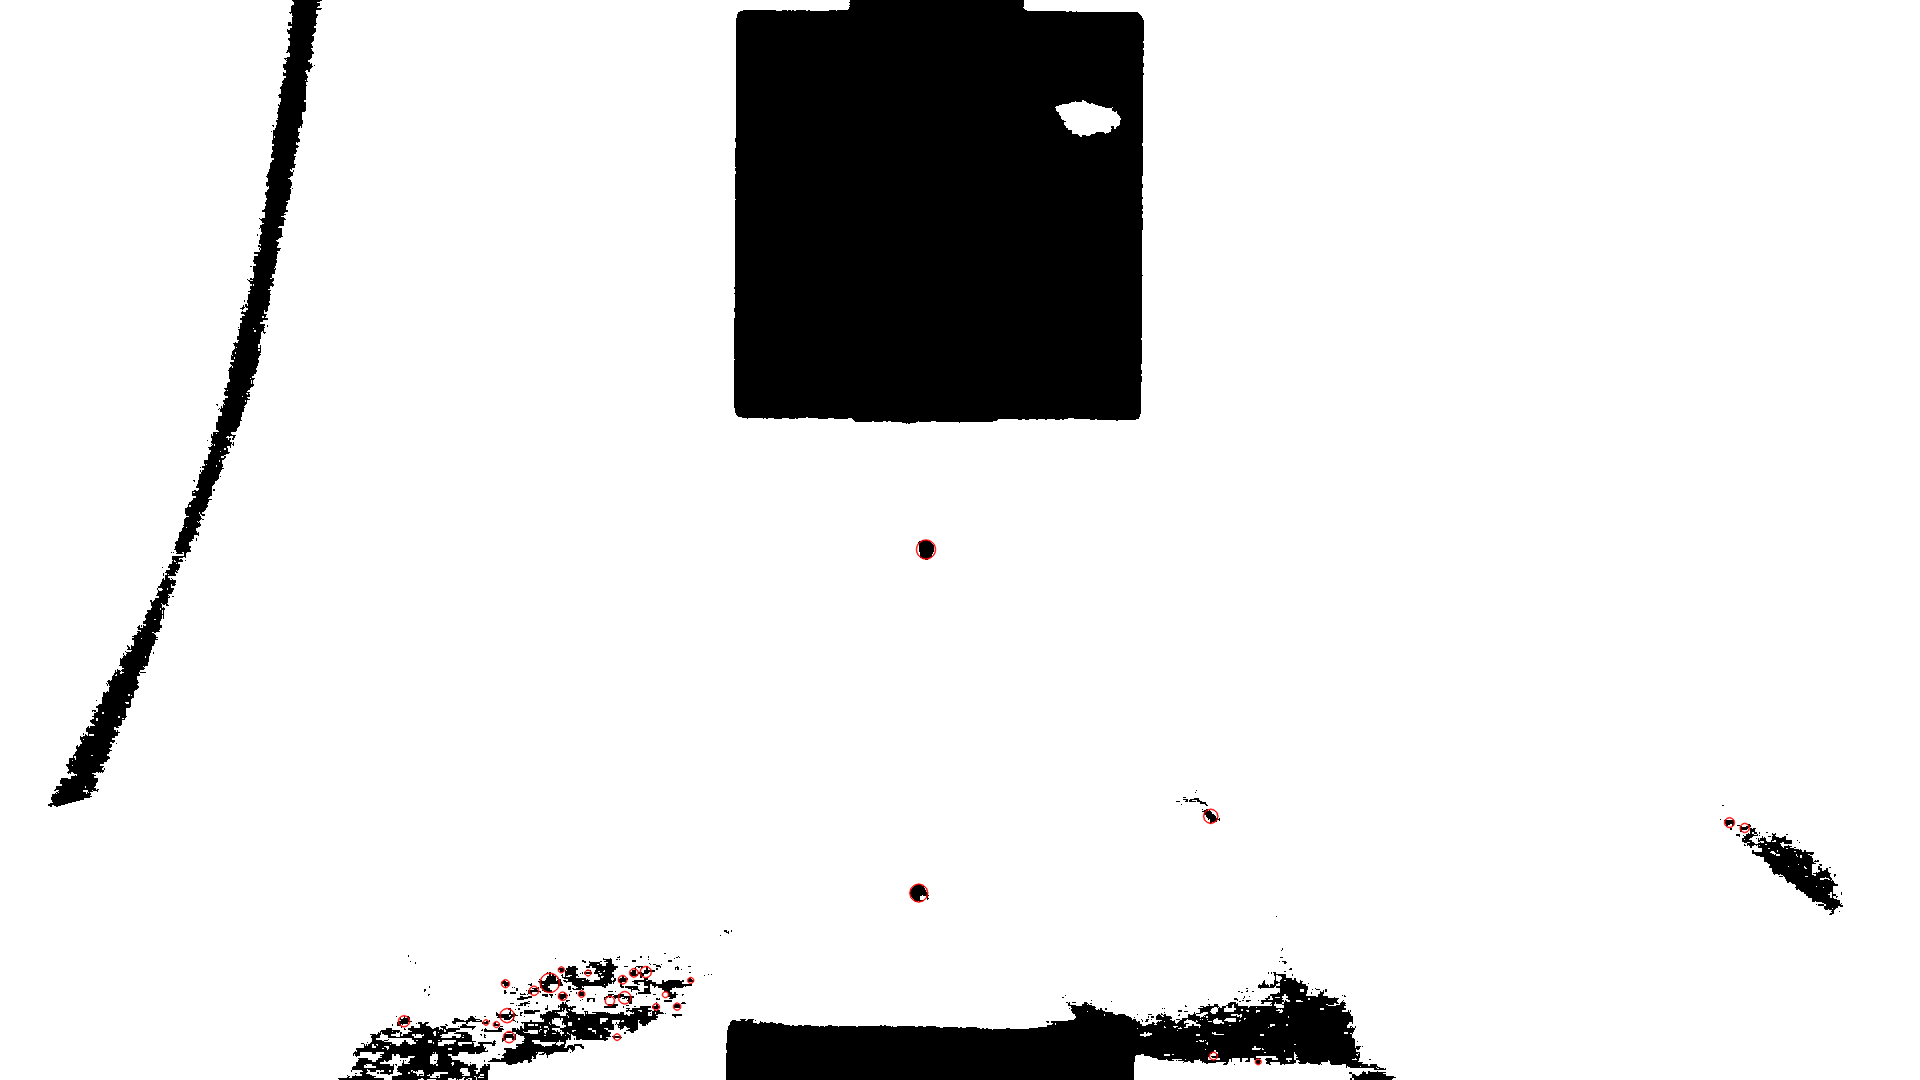

Read a new frame:  True
19


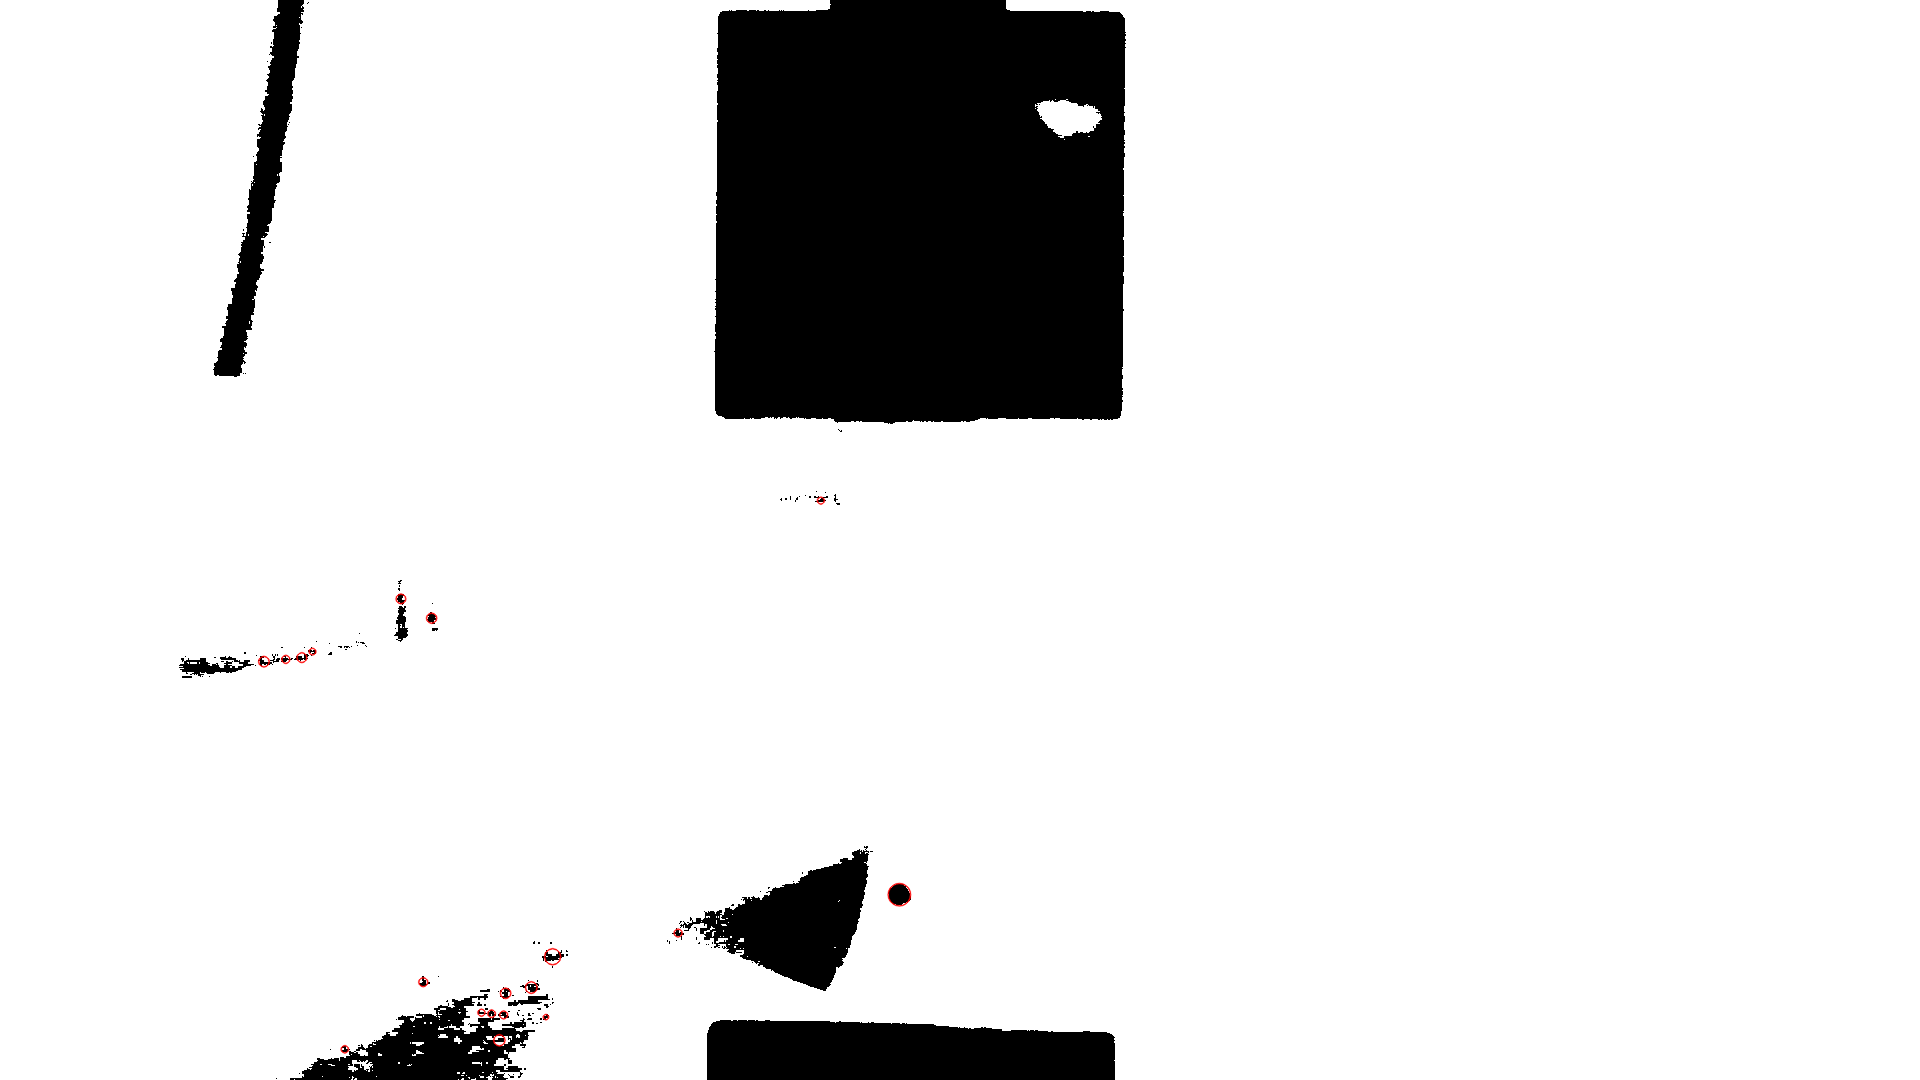

Read a new frame:  True
29


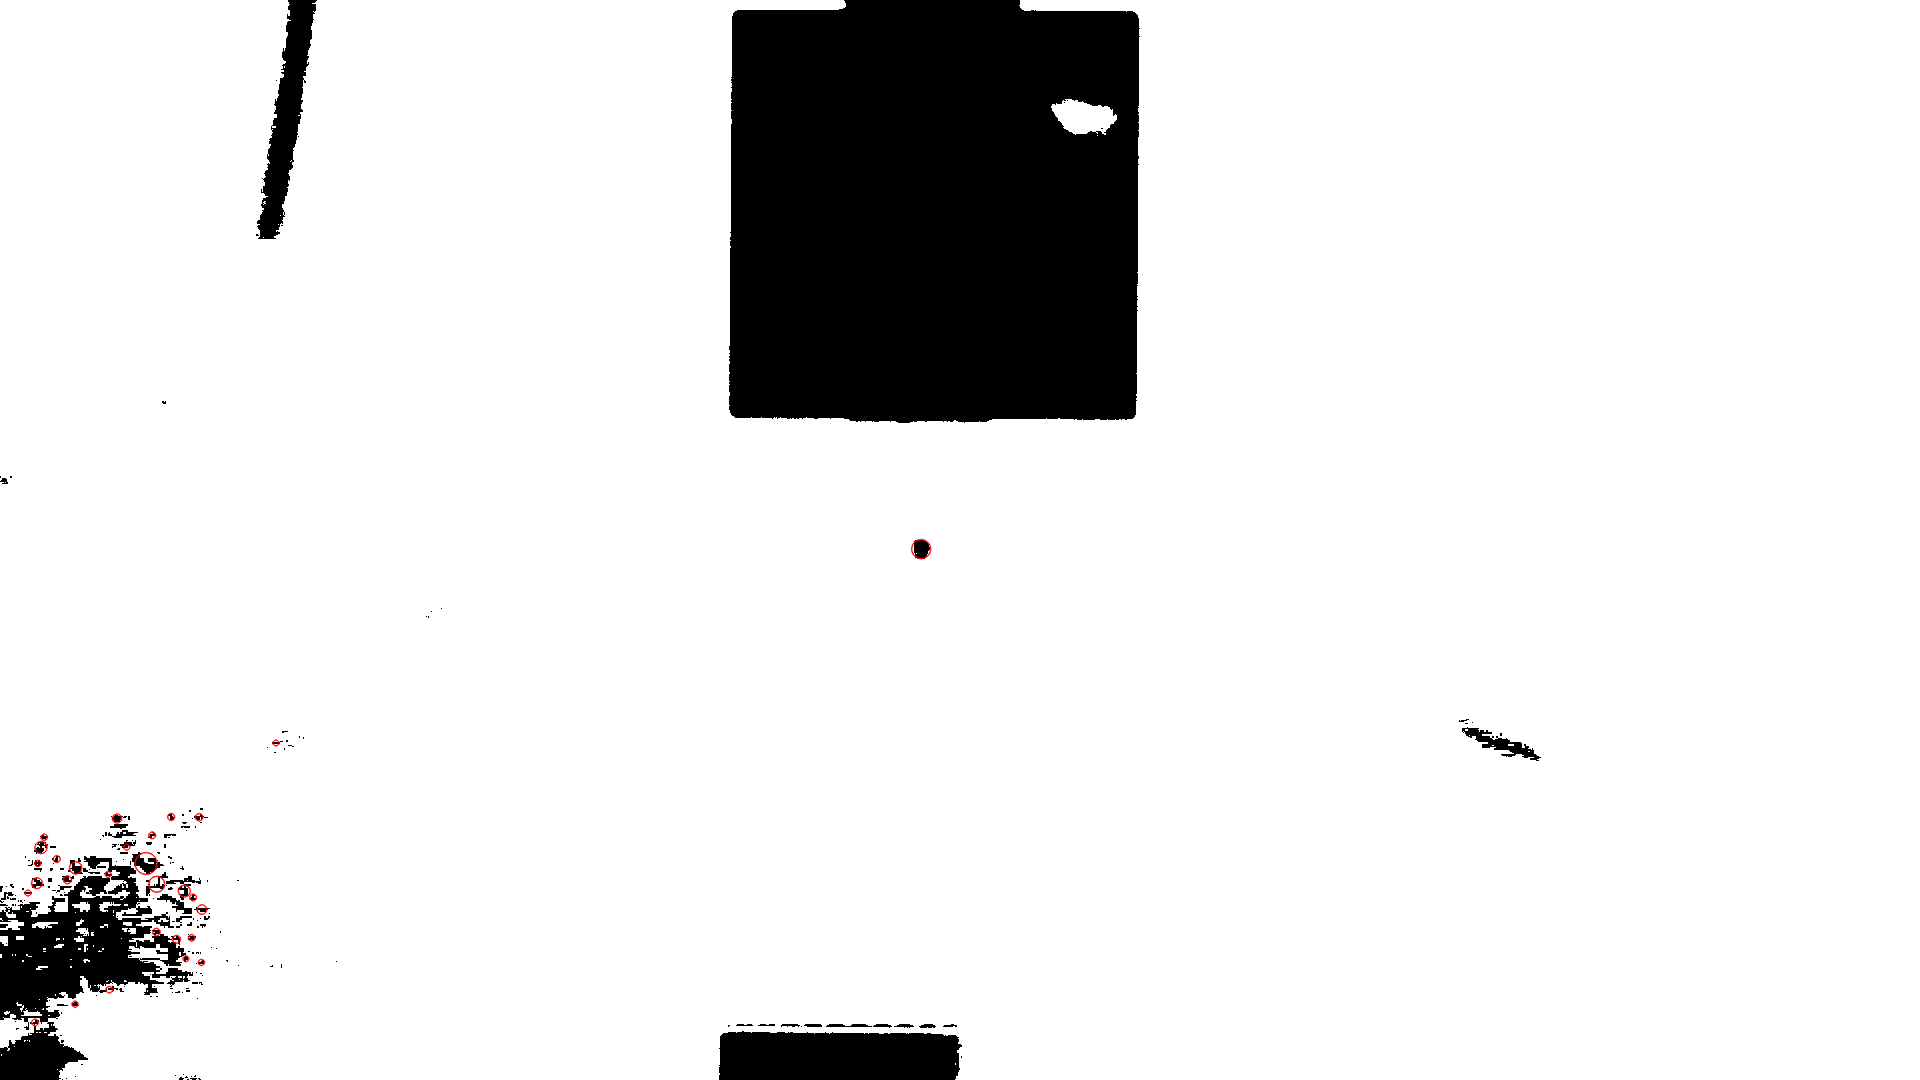

Read a new frame:  True
2


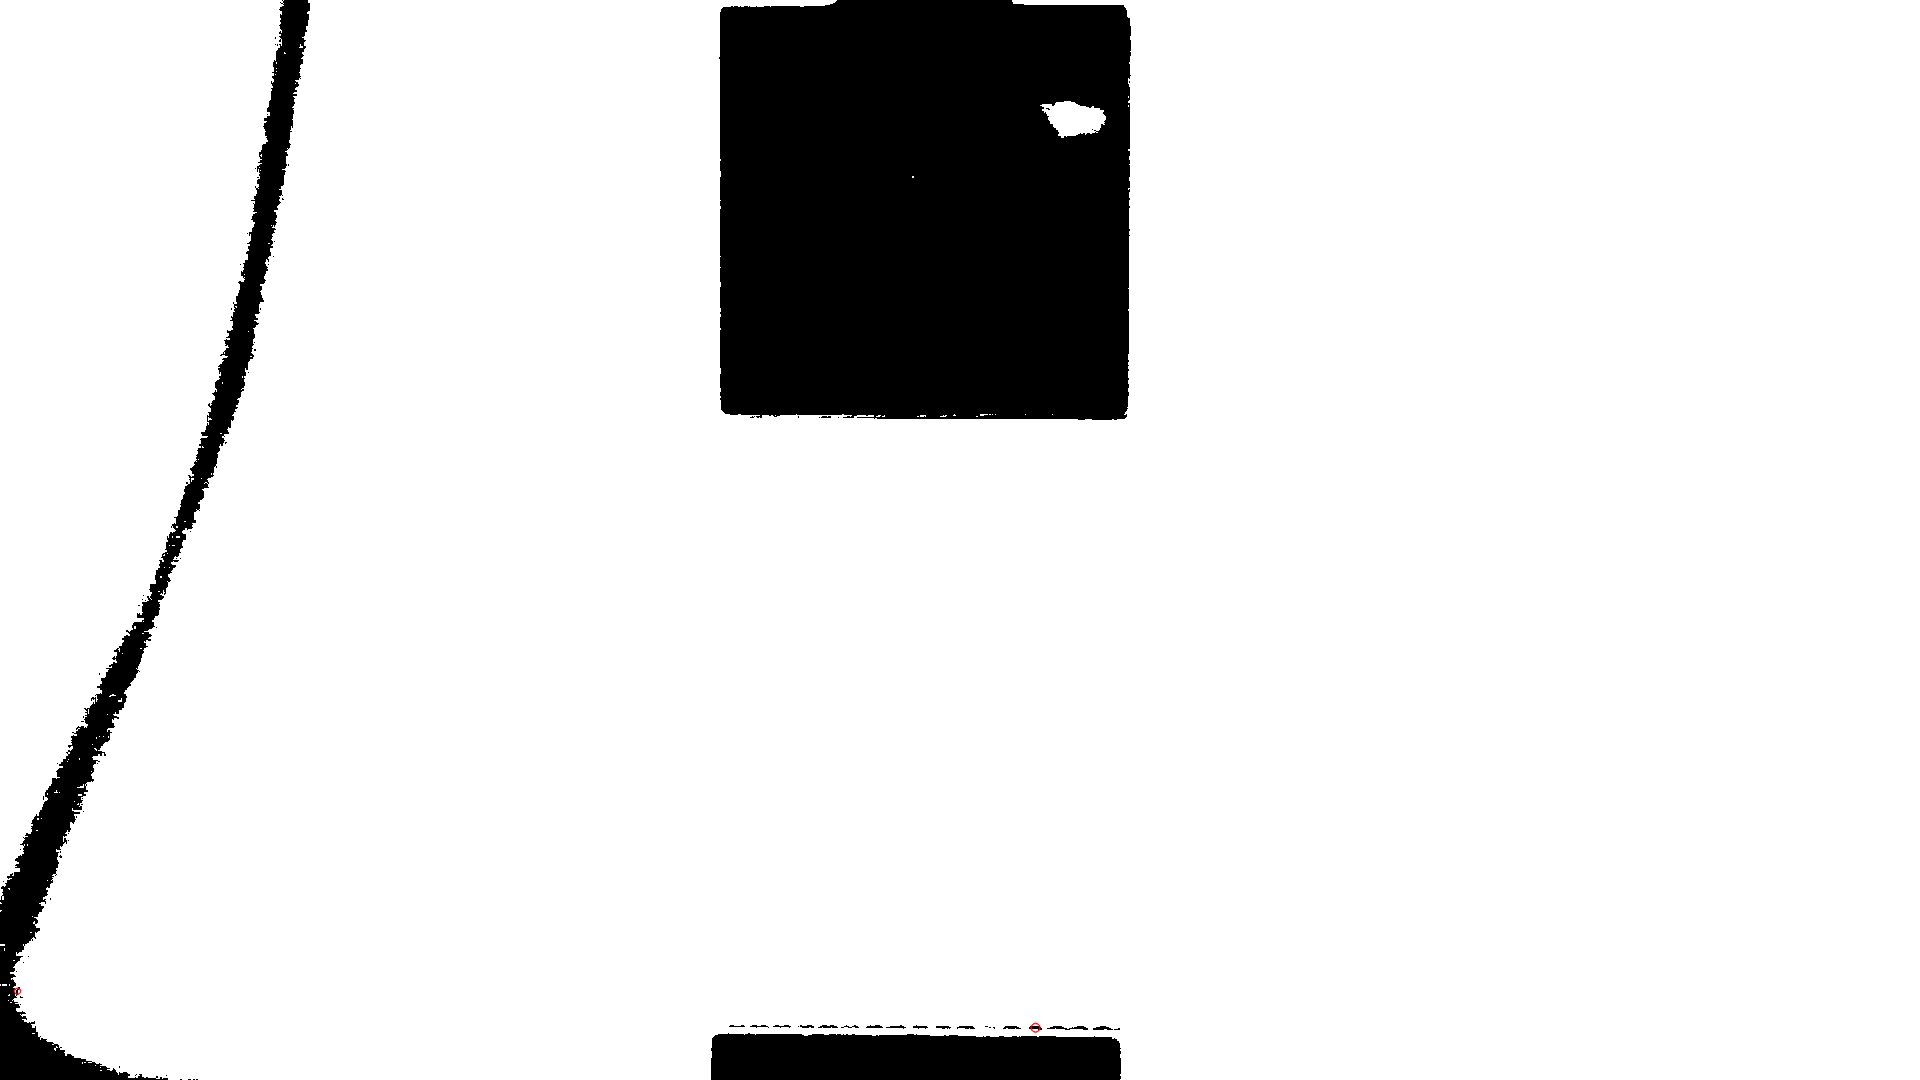

Read a new frame:  True
0


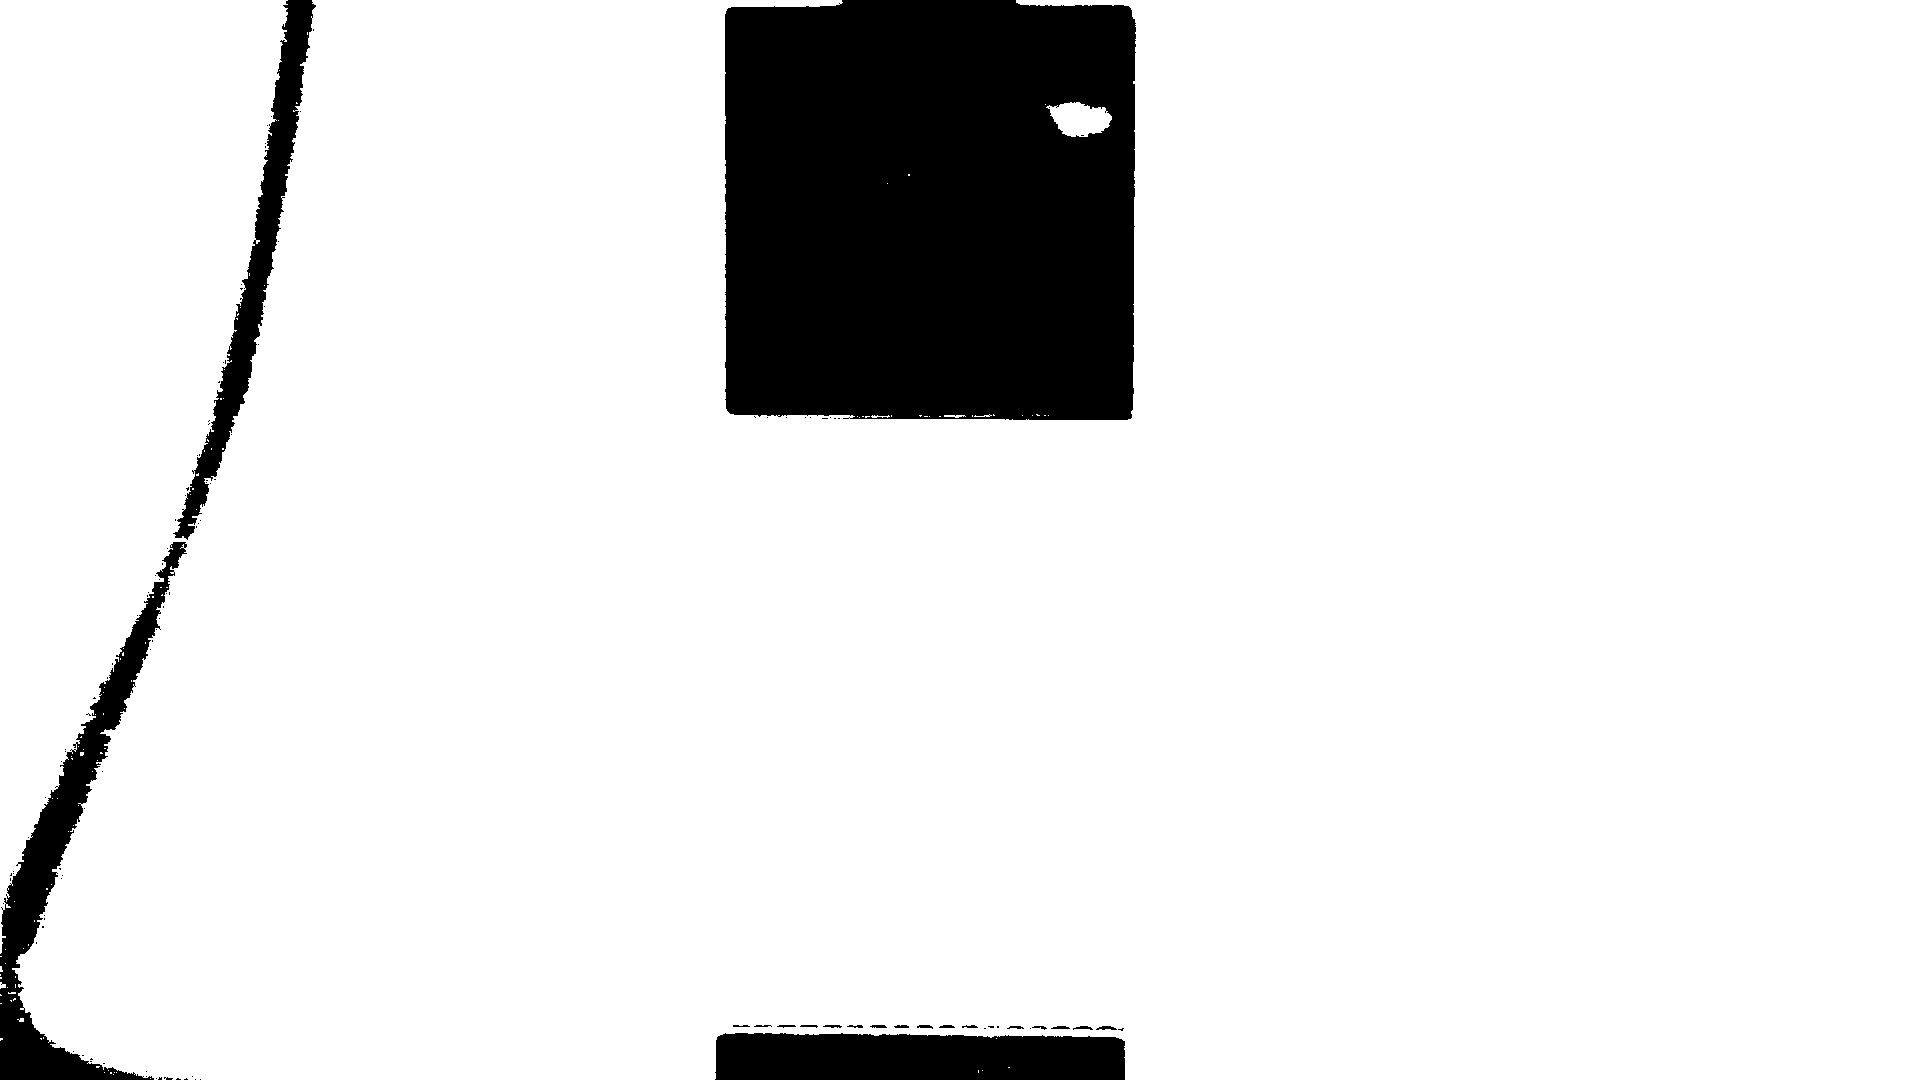

Read a new frame:  True
1


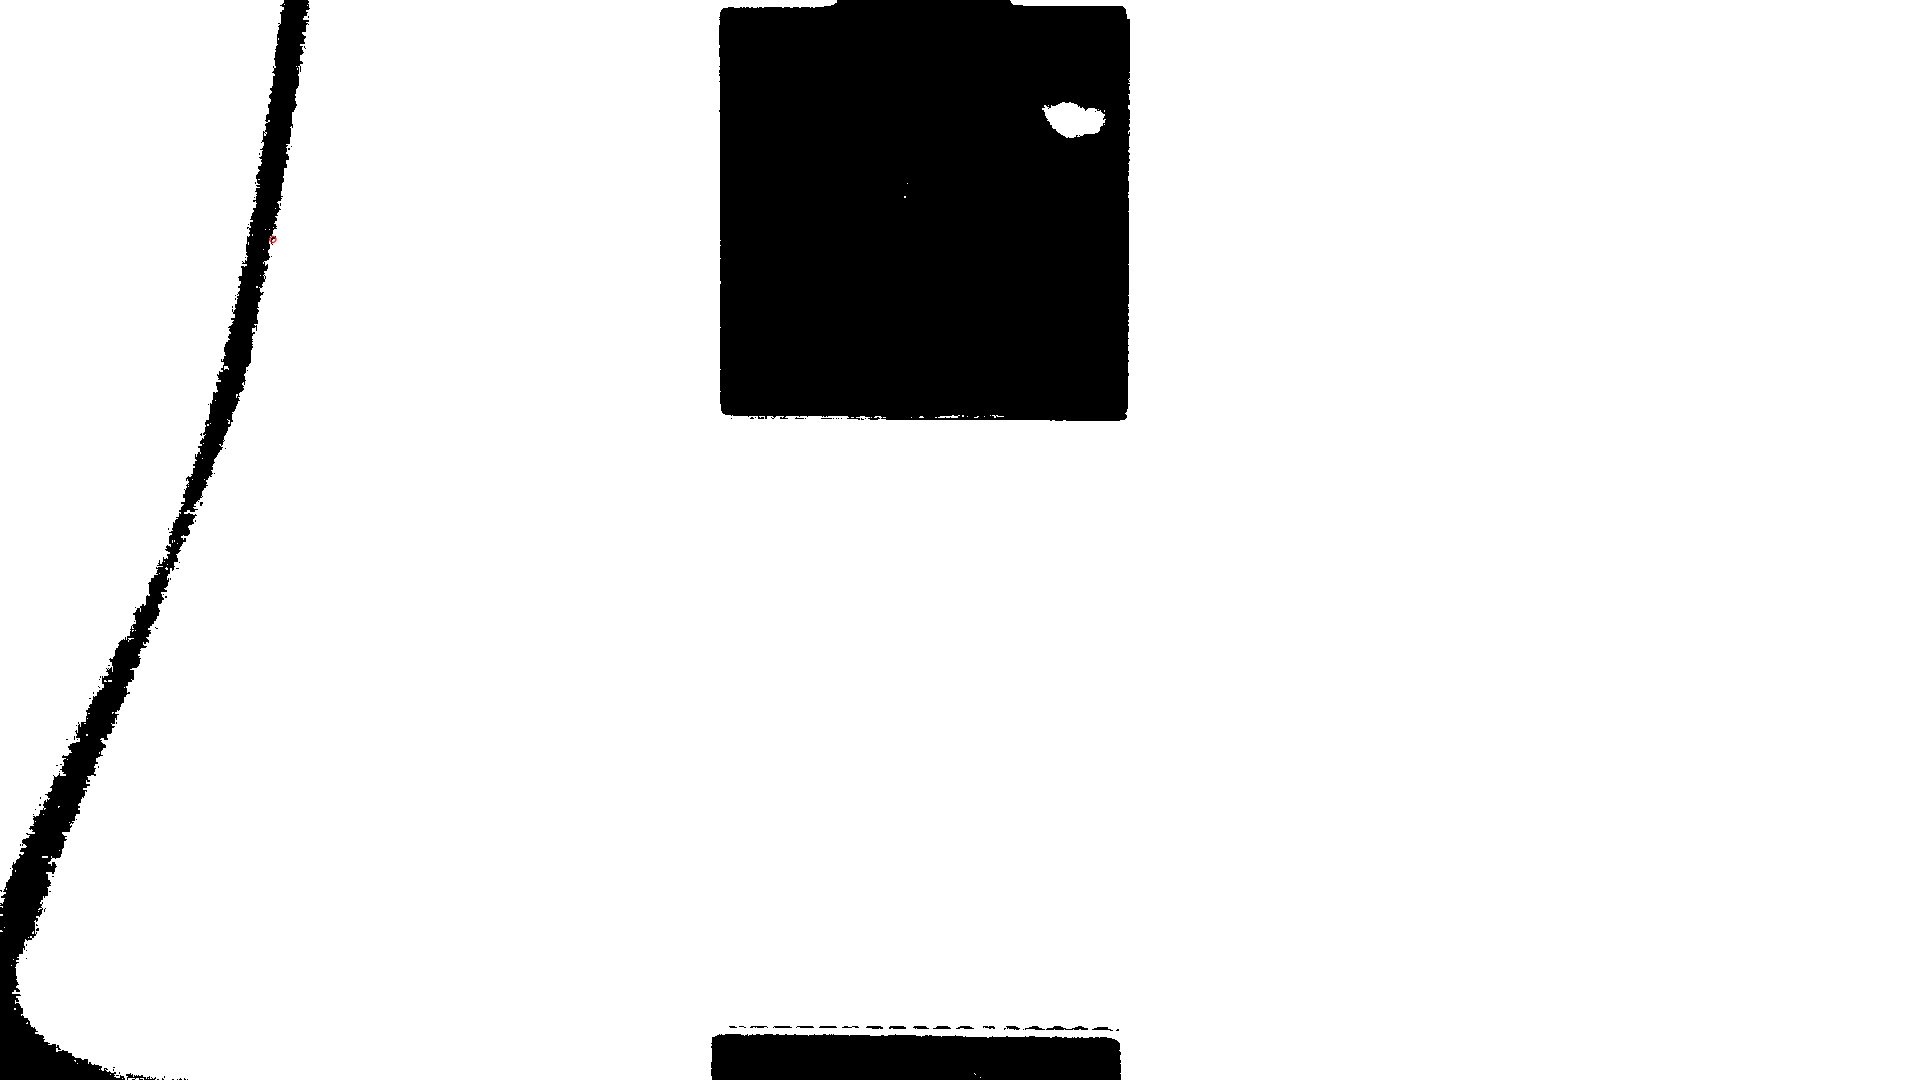

Read a new frame:  True
1


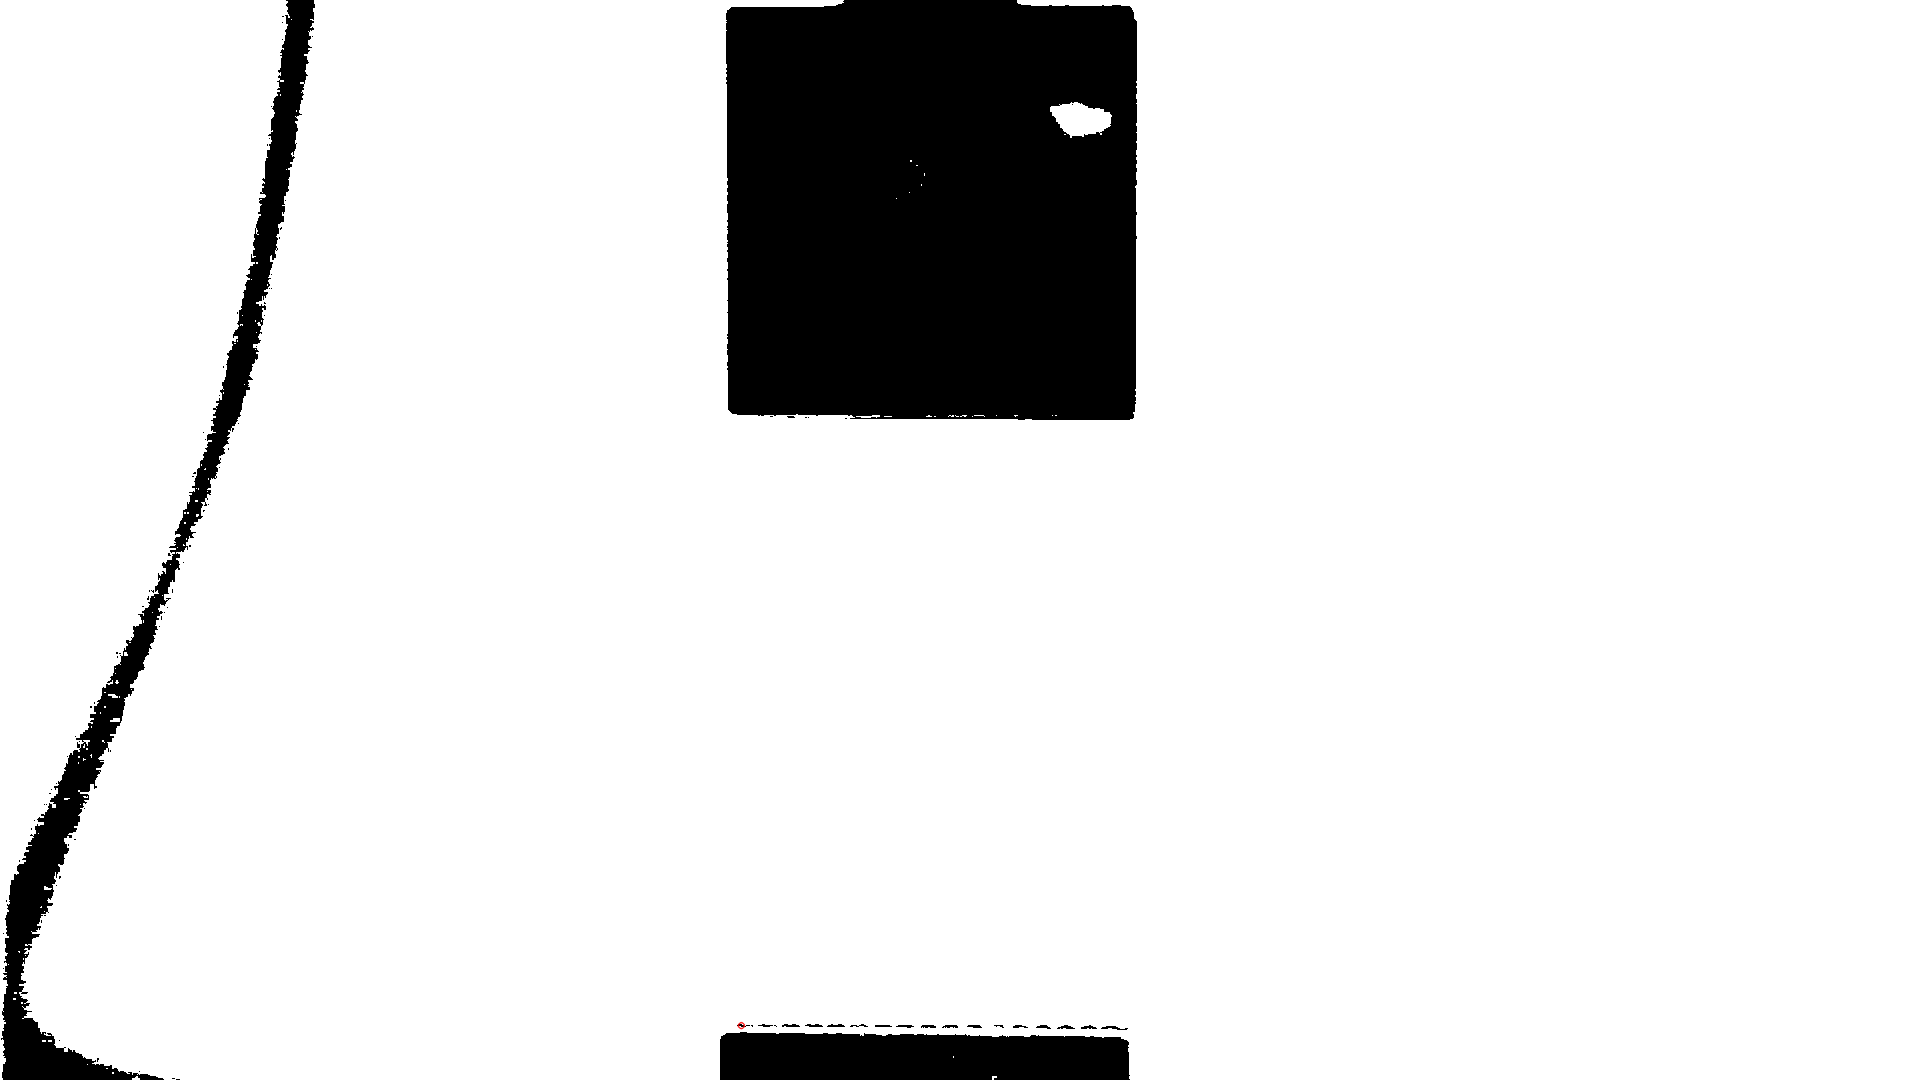

Read a new frame:  True
hit and error


In [5]:
frames_list = []
distance_list = []

params = cv2.SimpleBlobDetector_Params()
# Change thresholds
params.minThreshold = 10
params.maxThreshold = 200


# Filter by Area.
params.filterByArea = True
params.maxArea = 700

# Filter by Circularity
# params.filterByCircularity = True
# params.minCircularity = 0.1

# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.5

video = cv2.VideoCapture(file_name)
num_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
skip_frames = round(num_frames/num_data_points)

success,image = video.read()
count = 0
frame_number = 1
while success:
  # first we convert the MOV file into individual jpg frames
  video.set(cv2.CAP_PROP_POS_FRAMES, frame_number-1)
  success, frame = video.read()

  #then we convert into HSV to get a binary image
  try:
    hsvImage = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    lower_black = np.array([0,0,0])
    upper_black = np.array([180,255,30])
    
    binaryImage = cv2.inRange(hsvImage, lower_black, upper_black)

    # invert image
    finalImage = cv2.bitwise_not(binaryImage)

    # then we do some blog detection
    detector = cv2.SimpleBlobDetector_create(params)
    keypoints = detector.detect(finalImage)
    print(len(keypoints))
    if len(keypoints) == 2:
      x1 = keypoints[0].pt[0] #i is the index of the blob you want to get the position
      y1 = keypoints[0].pt[1]

      x2 = keypoints[1].pt[0] #i is the index of the blob you want to get the position
      y2 = keypoints[1].pt[1]
      dist = np.sqrt( (x2 - x1)**2 + (y2 - y1)**2 )
      frames_list.append(frame_number)
      distance_list.append(dist)

    im_with_keypoints = cv2.drawKeypoints(finalImage, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)



    cv2_imshow(im_with_keypoints)
    cv2.waitKey(0)
    print('Read a new frame: ', success)
  except:
    print('hit and error')
  count += 1
  frame_number += skip_frames

import pandas as pd

df = pd.DataFrame(list(zip(frames_list, distance_list)),
               columns =['Frame Number', 'Distance in pixels'])

df.to_csv(csv_name)

# A quick and dirty plot of your data.

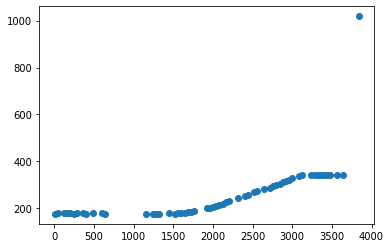

In [6]:
import matplotlib.pyplot as plt
plt.scatter(frames_list, distance_list)